In [1]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import math
import time
from math import sqrt
from sklearn.impute import KNNImputer
import seaborn as sns

# Importing Data

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_cv = pd.read_csv('X_cv.csv')
y_cv = pd.read_csv('y_cv.csv')
X_train_cv = pd.read_csv('X_train_cv.csv')
y_train_cv = pd.read_csv('y_train_cv.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

predict_feature = pd.read_csv('predict_feature.csv')

# Defining Functions

## LSTM Function

In [3]:
def run(batchSize, numEpochs, X, Y, pred_set, actual_set):
    #Reshaping
    trainX =np.array(X)
    X = trainX.reshape(X.shape[0], 1, X.shape[1])
    
    testX =np.array(pred_set)
    pred_set = testX.reshape(pred_set.shape[0], 1, pred_set.shape[1])
    
    #Building the LSTM Model
    lstm = Sequential()
    lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss="mean_squared_error", optimizer="adam")
    plot_model(lstm, show_shapes=True, show_layer_names=True)

    ##################################################
    
    # Fitting the RNN to the Training set
    history = lstm.fit(X, Y, epochs=numEpochs, batch_size=batchSize, verbose=1, shuffle=False)
    predicted_Price = lstm.predict(pred_set)

    orig = actual_set

    rmse = sqrt(mean_squared_error(orig, predicted_Price))
    mape = get_mape(orig, predicted_Price)
    # Calculate RMSE
    print("RMSE on train set = %0.3f" % rmse)
    # Calculate MAPE
    print("MAPE on train set = %0.3f%%" % mape)

    return rmse, mape

## MAPE Function

In [4]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Model Tuning

## Tuning Epochs Parameter

In [5]:
# vary training batches
param_label = 'epochs'
param_list = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32

for param in param_list:
    rmse, mape = run(default_batch_size, param, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/500
14/14 [==============================] - 1s 2ms/step - loss: 887539008.0000
Epoch 2/500
14/14 [==============================] - 0s 2ms/step - loss: 887515648.0000
Epoch 3/500
14/14 [==============================] - 0s 2ms/step - loss: 887480064.0000
Epoch 4/500
14/14 [==============================] - 0s 3ms/step - loss: 887427200.0000
Epoch 5/500
14/14 [==============================] - 0s 2ms/step - loss: 887355008.0000
Epoch 6/500
14/14 [==============================] - 0s 3ms/step - loss: 887264192.0000
Epoch 7/500
14/14 [==============================] - 0s 3ms/step - loss: 887157504.0000
Epoch 8/500
14/14 [==============================] - 0s 3ms/step - loss: 887037824.0000
Epoch 9/500
14/14 [==============================] - 0s 3ms/step - loss: 886907968.0000
Epoch 10/500
14/14 [==========================

14/14 [==============================] - 0s 3ms/step - loss: 852404160.0000
Epoch 92/500
14/14 [==============================] - 0s 3ms/step - loss: 851722560.0000
Epoch 93/500
14/14 [==============================] - 0s 3ms/step - loss: 851035776.0000
Epoch 94/500
14/14 [==============================] - 0s 2ms/step - loss: 850343616.0000
Epoch 95/500
14/14 [==============================] - 0s 5ms/step - loss: 849646400.0000
Epoch 96/500
14/14 [==============================] - 0s 3ms/step - loss: 848943936.0000
Epoch 97/500
14/14 [==============================] - 0s 2ms/step - loss: 848236352.0000
Epoch 98/500
14/14 [==============================] - 0s 3ms/step - loss: 847523584.0000
Epoch 99/500
14/14 [==============================] - 0s 2ms/step - loss: 846805888.0000
Epoch 100/500
14/14 [==============================] - 0s 2ms/step - loss: 846083008.0000
Epoch 101/500
14/14 [==============================] - 0s 2ms/step - loss: 845355200.0000
Epoch 102/500
14/14 [===========

14/14 [==============================] - 0s 2ms/step - loss: 772860992.0000
Epoch 183/500
14/14 [==============================] - 0s 2ms/step - loss: 771832832.0000
Epoch 184/500
14/14 [==============================] - 0s 11ms/step - loss: 770802176.0000
Epoch 185/500
14/14 [==============================] - 0s 2ms/step - loss: 769768960.0000
Epoch 186/500
14/14 [==============================] - 0s 2ms/step - loss: 768733440.0000
Epoch 187/500
14/14 [==============================] - 0s 2ms/step - loss: 767695424.0000
Epoch 188/500
14/14 [==============================] - 0s 2ms/step - loss: 766655040.0000
Epoch 189/500
14/14 [==============================] - 0s 2ms/step - loss: 765612288.0000
Epoch 190/500
14/14 [==============================] - 0s 2ms/step - loss: 764567168.0000
Epoch 191/500
14/14 [==============================] - 0s 2ms/step - loss: 763519680.0000
Epoch 192/500
14/14 [==============================] - 0s 2ms/step - loss: 762469824.0000
Epoch 193/500
14/14 [==

14/14 [==============================] - 0s 2ms/step - loss: 671775872.0000
Epoch 274/500
14/14 [==============================] - 0s 2ms/step - loss: 670608896.0000
Epoch 275/500
14/14 [==============================] - 0s 2ms/step - loss: 669441216.0000
Epoch 276/500
14/14 [==============================] - 0s 2ms/step - loss: 668273024.0000
Epoch 277/500
14/14 [==============================] - 0s 2ms/step - loss: 667104128.0000
Epoch 278/500
14/14 [==============================] - 0s 2ms/step - loss: 665934720.0000
Epoch 279/500
14/14 [==============================] - 0s 2ms/step - loss: 664764736.0000
Epoch 280/500
14/14 [==============================] - 0s 2ms/step - loss: 663594112.0000
Epoch 281/500
14/14 [==============================] - 0s 2ms/step - loss: 662422976.0000
Epoch 282/500
14/14 [==============================] - 0s 2ms/step - loss: 661251392.0000
Epoch 283/500
14/14 [==============================] - 0s 2ms/step - loss: 660079168.0000
Epoch 284/500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 564877184.0000
Epoch 365/500
14/14 [==============================] - 0s 2ms/step - loss: 563715200.0000
Epoch 366/500
14/14 [==============================] - 0s 2ms/step - loss: 562554048.0000
Epoch 367/500
14/14 [==============================] - 0s 2ms/step - loss: 561393472.0000
Epoch 368/500
14/14 [==============================] - 0s 2ms/step - loss: 560233728.0000
Epoch 369/500
14/14 [==============================] - 0s 2ms/step - loss: 559074752.0000
Epoch 370/500
14/14 [==============================] - 0s 2ms/step - loss: 557916480.0000
Epoch 371/500
14/14 [==============================] - 0s 2ms/step - loss: 556758976.0000
Epoch 372/500
14/14 [==============================] - 0s 2ms/step - loss: 555602240.0000
Epoch 373/500
14/14 [==============================] - 0s 2ms/step - loss: 554446336.0000
Epoch 374/500
14/14 [==============================] - 0s 2ms/step - loss: 553291264.0000
Epoch 375/500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 463470976.0000
Epoch 456/500
14/14 [==============================] - 0s 2ms/step - loss: 462420384.0000
Epoch 457/500
14/14 [==============================] - 0s 2ms/step - loss: 461371552.0000
Epoch 458/500
14/14 [==============================] - 0s 2ms/step - loss: 460324416.0000
Epoch 459/500
14/14 [==============================] - 0s 3ms/step - loss: 459278976.0000
Epoch 460/500
14/14 [==============================] - 0s 2ms/step - loss: 458235232.0000
Epoch 461/500
14/14 [==============================] - 0s 2ms/step - loss: 457193216.0000
Epoch 462/500
14/14 [==============================] - 0s 2ms/step - loss: 456152992.0000
Epoch 463/500
14/14 [==============================] - 0s 2ms/step - loss: 455114496.0000
Epoch 464/500
14/14 [==============================] - 0s 2ms/step - loss: 454077792.0000
Epoch 465/500
14/14 [==============================] - 0s 3ms/step - loss: 453042752.0000
Epoch 466/500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 880368896.0000
Epoch 44/1000
14/14 [==============================] - 0s 2ms/step - loss: 880069632.0000
Epoch 45/1000
14/14 [==============================] - 0s 5ms/step - loss: 879764736.0000
Epoch 46/1000
14/14 [==============================] - 0s 3ms/step - loss: 879454272.0000
Epoch 47/1000
14/14 [==============================] - 0s 2ms/step - loss: 879138240.0000
Epoch 48/1000
14/14 [==============================] - 0s 2ms/step - loss: 878816576.0000
Epoch 49/1000
14/14 [==============================] - 0s 2ms/step - loss: 878489408.0000
Epoch 50/1000
14/14 [==============================] - 0s 2ms/step - loss: 878156800.0000
Epoch 51/1000
14/14 [==============================] - 0s 5ms/step - loss: 877818624.0000
Epoch 52/1000
14/14 [==============================] - 0s 2ms/step - loss: 877475008.0000
Epoch 53/1000
14/14 [==============================] - 0s 2ms/step - loss: 877126016.0000
Epoch 54/1000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 834058112.0000
Epoch 134/1000
14/14 [==============================] - 0s 2ms/step - loss: 833360064.0000
Epoch 135/1000
14/14 [==============================] - 0s 2ms/step - loss: 832658688.0000
Epoch 136/1000
14/14 [==============================] - 0s 2ms/step - loss: 831954048.0000
Epoch 137/1000
14/14 [==============================] - 0s 2ms/step - loss: 831246272.0000
Epoch 138/1000
14/14 [==============================] - 0s 2ms/step - loss: 830535232.0000
Epoch 139/1000
14/14 [==============================] - 0s 2ms/step - loss: 829820992.0000
Epoch 140/1000
14/14 [==============================] - 0s 3ms/step - loss: 829103616.0000
Epoch 141/1000
14/14 [==============================] - 0s 2ms/step - loss: 828383104.0000
Epoch 142/1000
14/14 [==============================] - 0s 2ms/step - loss: 827659392.0000
Epoch 143/1000
14/14 [==============================] - 0s 2ms/step - loss: 826932736.0000
Epoch 144/1000

14/14 [==============================] - 0s 2ms/step - loss: 760468800.0000
Epoch 224/1000
14/14 [==============================] - 0s 2ms/step - loss: 759553152.0000
Epoch 225/1000
14/14 [==============================] - 0s 2ms/step - loss: 758635968.0000
Epoch 226/1000
14/14 [==============================] - 0s 2ms/step - loss: 757717120.0000
Epoch 227/1000
14/14 [==============================] - 0s 2ms/step - loss: 756796608.0000
Epoch 228/1000
14/14 [==============================] - 0s 2ms/step - loss: 755874496.0000
Epoch 229/1000
14/14 [==============================] - 0s 2ms/step - loss: 754950848.0000
Epoch 230/1000
14/14 [==============================] - 0s 2ms/step - loss: 754025600.0000
Epoch 231/1000
14/14 [==============================] - 0s 2ms/step - loss: 753098752.0000
Epoch 232/1000
14/14 [==============================] - 0s 2ms/step - loss: 752170304.0000
Epoch 233/1000
14/14 [==============================] - 0s 2ms/step - loss: 751240384.0000
Epoch 234/1000

14/14 [==============================] - 0s 2ms/step - loss: 672993536.0000
Epoch 314/1000
14/14 [==============================] - 0s 2ms/step - loss: 671980928.0000
Epoch 315/1000
14/14 [==============================] - 0s 2ms/step - loss: 670967744.0000
Epoch 316/1000
14/14 [==============================] - 0s 2ms/step - loss: 669953984.0000
Epoch 317/1000
14/14 [==============================] - 0s 2ms/step - loss: 668939712.0000
Epoch 318/1000
14/14 [==============================] - 0s 2ms/step - loss: 667924992.0000
Epoch 319/1000
14/14 [==============================] - 0s 2ms/step - loss: 666909760.0000
Epoch 320/1000
14/14 [==============================] - 0s 2ms/step - loss: 665894016.0000
Epoch 321/1000
14/14 [==============================] - 0s 2ms/step - loss: 664877888.0000
Epoch 322/1000
14/14 [==============================] - 0s 2ms/step - loss: 663861248.0000
Epoch 323/1000
14/14 [==============================] - 0s 2ms/step - loss: 662844160.0000
Epoch 324/1000

14/14 [==============================] - 0s 11ms/step - loss: 580913856.0000
Epoch 404/1000
14/14 [==============================] - 0s 2ms/step - loss: 579893440.0000
Epoch 405/1000
14/14 [==============================] - 0s 2ms/step - loss: 578873472.0000
Epoch 406/1000
14/14 [==============================] - 0s 2ms/step - loss: 577853824.0000
Epoch 407/1000
14/14 [==============================] - 0s 2ms/step - loss: 576834560.0000
Epoch 408/1000
14/14 [==============================] - 0s 2ms/step - loss: 575815616.0000
Epoch 409/1000
14/14 [==============================] - 0s 2ms/step - loss: 574797056.0000
Epoch 410/1000
14/14 [==============================] - 0s 2ms/step - loss: 573778880.0000
Epoch 411/1000
14/14 [==============================] - 0s 2ms/step - loss: 572761152.0000
Epoch 412/1000
14/14 [==============================] - 0s 2ms/step - loss: 571743808.0000
Epoch 413/1000
14/14 [==============================] - 0s 2ms/step - loss: 570726976.0000
Epoch 414/100

14/14 [==============================] - 0s 2ms/step - loss: 491464448.0000
Epoch 494/1000
14/14 [==============================] - 0s 2ms/step - loss: 490508576.0000
Epoch 495/1000
14/14 [==============================] - 0s 2ms/step - loss: 489553696.0000
Epoch 496/1000
14/14 [==============================] - 0s 2ms/step - loss: 488599840.0000
Epoch 497/1000
14/14 [==============================] - 0s 2ms/step - loss: 487647136.0000
Epoch 498/1000
14/14 [==============================] - 0s 2ms/step - loss: 486695488.0000
Epoch 499/1000
14/14 [==============================] - 0s 2ms/step - loss: 485744960.0000
Epoch 500/1000
14/14 [==============================] - 0s 2ms/step - loss: 484795520.0000
Epoch 501/1000
14/14 [==============================] - 0s 2ms/step - loss: 483847168.0000
Epoch 502/1000
14/14 [==============================] - 0s 2ms/step - loss: 482899968.0000
Epoch 503/1000
14/14 [==============================] - 0s 2ms/step - loss: 481953824.0000
Epoch 504/1000

14/14 [==============================] - 0s 2ms/step - loss: 410438592.0000
Epoch 584/1000
14/14 [==============================] - 0s 2ms/step - loss: 409603168.0000
Epoch 585/1000
14/14 [==============================] - 0s 2ms/step - loss: 408769248.0000
Epoch 586/1000
14/14 [==============================] - 0s 2ms/step - loss: 407936896.0000
Epoch 587/1000
14/14 [==============================] - 0s 2ms/step - loss: 407106176.0000
Epoch 588/1000
14/14 [==============================] - 0s 2ms/step - loss: 406277024.0000
Epoch 589/1000
14/14 [==============================] - 0s 2ms/step - loss: 405449472.0000
Epoch 590/1000
14/14 [==============================] - 0s 2ms/step - loss: 404623520.0000
Epoch 591/1000
14/14 [==============================] - 0s 2ms/step - loss: 403799200.0000
Epoch 592/1000
14/14 [==============================] - 0s 2ms/step - loss: 402976480.0000
Epoch 593/1000
14/14 [==============================] - 0s 2ms/step - loss: 402155328.0000
Epoch 594/1000

14/14 [==============================] - 0s 2ms/step - loss: 342020416.0000
Epoch 674/1000
14/14 [==============================] - 0s 2ms/step - loss: 341341248.0000
Epoch 675/1000
14/14 [==============================] - 0s 3ms/step - loss: 340663872.0000
Epoch 676/1000
14/14 [==============================] - 0s 2ms/step - loss: 339988416.0000
Epoch 677/1000
14/14 [==============================] - 0s 2ms/step - loss: 339314720.0000
Epoch 678/1000
14/14 [==============================] - 0s 2ms/step - loss: 338642848.0000
Epoch 679/1000
14/14 [==============================] - 0s 2ms/step - loss: 337972800.0000
Epoch 680/1000
14/14 [==============================] - 0s 2ms/step - loss: 337304480.0000
Epoch 681/1000
14/14 [==============================] - 0s 2ms/step - loss: 336638016.0000
Epoch 682/1000
14/14 [==============================] - 0s 2ms/step - loss: 335973248.0000
Epoch 683/1000
14/14 [==============================] - 0s 2ms/step - loss: 335310208.0000
Epoch 684/1000

14/14 [==============================] - 0s 2ms/step - loss: 279461056.0000
Epoch 764/1000
14/14 [==============================] - 0s 2ms/step - loss: 278777216.0000
Epoch 765/1000
14/14 [==============================] - 0s 2ms/step - loss: 278094112.0000
Epoch 766/1000
14/14 [==============================] - 0s 2ms/step - loss: 277411648.0000
Epoch 767/1000
14/14 [==============================] - 0s 2ms/step - loss: 276729856.0000
Epoch 768/1000
14/14 [==============================] - 0s 2ms/step - loss: 276048768.0000
Epoch 769/1000
14/14 [==============================] - 0s 2ms/step - loss: 275368384.0000
Epoch 770/1000
14/14 [==============================] - 0s 2ms/step - loss: 274688608.0000
Epoch 771/1000
14/14 [==============================] - 0s 2ms/step - loss: 274009568.0000
Epoch 772/1000
14/14 [==============================] - 0s 2ms/step - loss: 273331200.0000
Epoch 773/1000
14/14 [==============================] - 0s 2ms/step - loss: 272653536.0000
Epoch 774/1000

14/14 [==============================] - 0s 2ms/step - loss: 220656208.0000
Epoch 854/1000
14/14 [==============================] - 0s 2ms/step - loss: 220035616.0000
Epoch 855/1000
14/14 [==============================] - 0s 2ms/step - loss: 219415760.0000
Epoch 856/1000
14/14 [==============================] - 0s 2ms/step - loss: 218796704.0000
Epoch 857/1000
14/14 [==============================] - 0s 2ms/step - loss: 218178432.0000
Epoch 858/1000
14/14 [==============================] - 0s 2ms/step - loss: 217561008.0000
Epoch 859/1000
14/14 [==============================] - 0s 6ms/step - loss: 216944336.0000
Epoch 860/1000
14/14 [==============================] - 0s 2ms/step - loss: 216328416.0000
Epoch 861/1000
14/14 [==============================] - 0s 2ms/step - loss: 215713408.0000
Epoch 862/1000
14/14 [==============================] - 0s 2ms/step - loss: 215099136.0000
Epoch 863/1000
14/14 [==============================] - 0s 10ms/step - loss: 214485648.0000
Epoch 864/100

14/14 [==============================] - 0s 2ms/step - loss: 168262960.0000
Epoch 944/1000
14/14 [==============================] - 0s 2ms/step - loss: 167723616.0000
Epoch 945/1000
14/14 [==============================] - 0s 2ms/step - loss: 167185296.0000
Epoch 946/1000
14/14 [==============================] - 0s 2ms/step - loss: 166647968.0000
Epoch 947/1000
14/14 [==============================] - 0s 2ms/step - loss: 166111648.0000
Epoch 948/1000
14/14 [==============================] - 0s 3ms/step - loss: 165576368.0000
Epoch 949/1000
14/14 [==============================] - 0s 2ms/step - loss: 165042096.0000
Epoch 950/1000
14/14 [==============================] - 0s 2ms/step - loss: 164508848.0000
Epoch 951/1000
14/14 [==============================] - 0s 2ms/step - loss: 163976592.0000
Epoch 952/1000
14/14 [==============================] - 0s 2ms/step - loss: 163445376.0000
Epoch 953/1000
14/14 [==============================] - 0s 2ms/step - loss: 162915184.0000
Epoch 954/1000

14/14 [==============================] - 0s 2ms/step - loss: 885084800.0000
Epoch 32/1500
14/14 [==============================] - 0s 4ms/step - loss: 884940160.0000
Epoch 33/1500
14/14 [==============================] - 0s 2ms/step - loss: 884791872.0000
Epoch 34/1500
14/14 [==============================] - 0s 2ms/step - loss: 884639744.0000
Epoch 35/1500
14/14 [==============================] - 0s 5ms/step - loss: 884483968.0000
Epoch 36/1500
14/14 [==============================] - 0s 3ms/step - loss: 884324352.0000
Epoch 37/1500
14/14 [==============================] - 0s 2ms/step - loss: 884160960.0000
Epoch 38/1500
14/14 [==============================] - 0s 2ms/step - loss: 883993856.0000
Epoch 39/1500
14/14 [==============================] - 0s 2ms/step - loss: 883822912.0000
Epoch 40/1500
14/14 [==============================] - 0s 3ms/step - loss: 883648320.0000
Epoch 41/1500
14/14 [==============================] - 0s 2ms/step - loss: 883470144.0000
Epoch 42/1500
14/14 [===

Epoch 122/1500
14/14 [==============================] - 0s 2ms/step - loss: 858179456.0000
Epoch 123/1500
14/14 [==============================] - 0s 2ms/step - loss: 857750976.0000
Epoch 124/1500
14/14 [==============================] - 0s 3ms/step - loss: 857320192.0000
Epoch 125/1500
14/14 [==============================] - 0s 2ms/step - loss: 856886976.0000
Epoch 126/1500
14/14 [==============================] - 0s 2ms/step - loss: 856451264.0000
Epoch 127/1500
14/14 [==============================] - 0s 2ms/step - loss: 856013184.0000
Epoch 128/1500
14/14 [==============================] - 0s 2ms/step - loss: 855572608.0000
Epoch 129/1500
14/14 [==============================] - 0s 2ms/step - loss: 855129856.0000
Epoch 130/1500
14/14 [==============================] - 0s 2ms/step - loss: 854684672.0000
Epoch 131/1500
14/14 [==============================] - 0s 2ms/step - loss: 854237120.0000
Epoch 132/1500
14/14 [==============================] - 0s 2ms/step - loss: 853787328.0000

14/14 [==============================] - 0s 2ms/step - loss: 811229696.0000
Epoch 213/1500
14/14 [==============================] - 0s 2ms/step - loss: 810626368.0000
Epoch 214/1500
14/14 [==============================] - 0s 2ms/step - loss: 810021696.0000
Epoch 215/1500
14/14 [==============================] - 0s 2ms/step - loss: 809415488.0000
Epoch 216/1500
14/14 [==============================] - 0s 2ms/step - loss: 808807616.0000
Epoch 217/1500
14/14 [==============================] - 0s 2ms/step - loss: 808198528.0000
Epoch 218/1500
14/14 [==============================] - 0s 2ms/step - loss: 807587712.0000
Epoch 219/1500
14/14 [==============================] - 0s 2ms/step - loss: 806975488.0000
Epoch 220/1500
14/14 [==============================] - 0s 2ms/step - loss: 806361792.0000
Epoch 221/1500
14/14 [==============================] - 0s 4ms/step - loss: 805746560.0000
Epoch 222/1500
14/14 [==============================] - 0s 2ms/step - loss: 805130048.0000
Epoch 223/1500

14/14 [==============================] - 0s 2ms/step - loss: 751694848.0000
Epoch 303/1500
14/14 [==============================] - 0s 2ms/step - loss: 750982720.0000
Epoch 304/1500
14/14 [==============================] - 0s 2ms/step - loss: 750269824.0000
Epoch 305/1500
14/14 [==============================] - 0s 2ms/step - loss: 749555776.0000
Epoch 306/1500
14/14 [==============================] - 0s 2ms/step - loss: 748840896.0000
Epoch 307/1500
14/14 [==============================] - 0s 2ms/step - loss: 748125248.0000
Epoch 308/1500
14/14 [==============================] - 0s 2ms/step - loss: 747408448.0000
Epoch 309/1500
14/14 [==============================] - 0s 2ms/step - loss: 746690944.0000
Epoch 310/1500
14/14 [==============================] - 0s 4ms/step - loss: 745972480.0000
Epoch 311/1500
14/14 [==============================] - 0s 2ms/step - loss: 745253184.0000
Epoch 312/1500
14/14 [==============================] - 0s 2ms/step - loss: 744532864.0000
Epoch 313/1500

14/14 [==============================] - 0s 2ms/step - loss: 684540928.0000
Epoch 393/1500
14/14 [==============================] - 0s 2ms/step - loss: 683766976.0000
Epoch 394/1500
14/14 [==============================] - 0s 2ms/step - loss: 682992768.0000
Epoch 395/1500
14/14 [==============================] - 0s 2ms/step - loss: 682217984.0000
Epoch 396/1500
14/14 [==============================] - 0s 2ms/step - loss: 681442880.0000
Epoch 397/1500
14/14 [==============================] - 0s 2ms/step - loss: 680667264.0000
Epoch 398/1500
14/14 [==============================] - 0s 2ms/step - loss: 679891200.0000
Epoch 399/1500
14/14 [==============================] - 0s 2ms/step - loss: 679114688.0000
Epoch 400/1500
14/14 [==============================] - 0s 2ms/step - loss: 678337856.0000
Epoch 401/1500
14/14 [==============================] - 0s 2ms/step - loss: 677560448.0000
Epoch 402/1500
14/14 [==============================] - 0s 2ms/step - loss: 676782720.0000
Epoch 403/1500

14/14 [==============================] - 0s 2ms/step - loss: 613642560.0000
Epoch 483/1500
14/14 [==============================] - 0s 2ms/step - loss: 612846848.0000
Epoch 484/1500
14/14 [==============================] - 0s 2ms/step - loss: 612051264.0000
Epoch 485/1500
14/14 [==============================] - 0s 2ms/step - loss: 611255488.0000
Epoch 486/1500
14/14 [==============================] - 0s 2ms/step - loss: 610459840.0000
Epoch 487/1500
14/14 [==============================] - 0s 3ms/step - loss: 609664064.0000
Epoch 488/1500
14/14 [==============================] - 0s 3ms/step - loss: 608868416.0000
Epoch 489/1500
14/14 [==============================] - 0s 2ms/step - loss: 608072640.0000
Epoch 490/1500
14/14 [==============================] - 0s 2ms/step - loss: 607276928.0000
Epoch 491/1500
14/14 [==============================] - 0s 2ms/step - loss: 606481216.0000
Epoch 492/1500
14/14 [==============================] - 0s 2ms/step - loss: 605685440.0000
Epoch 493/1500

14/14 [==============================] - 0s 2ms/step - loss: 542423552.0000
Epoch 573/1500
14/14 [==============================] - 0s 2ms/step - loss: 541642496.0000
Epoch 574/1500
14/14 [==============================] - 0s 2ms/step - loss: 540861760.0000
Epoch 575/1500
14/14 [==============================] - 0s 2ms/step - loss: 540081344.0000
Epoch 576/1500
14/14 [==============================] - 0s 2ms/step - loss: 539301312.0000
Epoch 577/1500
14/14 [==============================] - 0s 2ms/step - loss: 538521600.0000
Epoch 578/1500
14/14 [==============================] - 0s 6ms/step - loss: 537742336.0000
Epoch 579/1500
14/14 [==============================] - 0s 2ms/step - loss: 536963392.0000
Epoch 580/1500
14/14 [==============================] - 0s 2ms/step - loss: 536184832.0000
Epoch 581/1500
14/14 [==============================] - 0s 2ms/step - loss: 535406624.0000
Epoch 582/1500
14/14 [==============================] - 0s 2ms/step - loss: 534628864.0000
Epoch 583/1500

14/14 [==============================] - 0s 2ms/step - loss: 473987008.0000
Epoch 663/1500
14/14 [==============================] - 0s 2ms/step - loss: 473252864.0000
Epoch 664/1500
14/14 [==============================] - 0s 2ms/step - loss: 472519392.0000
Epoch 665/1500
14/14 [==============================] - 0s 2ms/step - loss: 471786624.0000
Epoch 666/1500
14/14 [==============================] - 0s 2ms/step - loss: 471054496.0000
Epoch 667/1500
14/14 [==============================] - 0s 2ms/step - loss: 470323136.0000
Epoch 668/1500
14/14 [==============================] - 0s 2ms/step - loss: 469592416.0000
Epoch 669/1500
14/14 [==============================] - 0s 2ms/step - loss: 468862432.0000
Epoch 670/1500
14/14 [==============================] - 0s 2ms/step - loss: 468133152.0000
Epoch 671/1500
14/14 [==============================] - 0s 2ms/step - loss: 467404544.0000
Epoch 672/1500
14/14 [==============================] - 0s 3ms/step - loss: 466676672.0000
Epoch 673/1500

14/14 [==============================] - 0s 2ms/step - loss: 411026848.0000
Epoch 753/1500
14/14 [==============================] - 0s 2ms/step - loss: 410366656.0000
Epoch 754/1500
14/14 [==============================] - 0s 2ms/step - loss: 409707424.0000
Epoch 755/1500
14/14 [==============================] - 0s 2ms/step - loss: 409049120.0000
Epoch 756/1500
14/14 [==============================] - 0s 2ms/step - loss: 408391808.0000
Epoch 757/1500
14/14 [==============================] - 0s 2ms/step - loss: 407735424.0000
Epoch 758/1500
14/14 [==============================] - 0s 2ms/step - loss: 407080000.0000
Epoch 759/1500
14/14 [==============================] - 0s 2ms/step - loss: 406425504.0000
Epoch 760/1500
14/14 [==============================] - 0s 2ms/step - loss: 405772032.0000
Epoch 761/1500
14/14 [==============================] - 0s 2ms/step - loss: 405119488.0000
Epoch 762/1500
14/14 [==============================] - 0s 2ms/step - loss: 404467904.0000
Epoch 763/1500

14/14 [==============================] - 0s 3ms/step - loss: 355659232.0000
Epoch 843/1500
14/14 [==============================] - 0s 2ms/step - loss: 355092576.0000
Epoch 844/1500
14/14 [==============================] - 0s 2ms/step - loss: 354527072.0000
Epoch 845/1500
14/14 [==============================] - 0s 2ms/step - loss: 353962624.0000
Epoch 846/1500
14/14 [==============================] - 0s 2ms/step - loss: 353399296.0000
Epoch 847/1500
14/14 [==============================] - 0s 2ms/step - loss: 352837088.0000
Epoch 848/1500
14/14 [==============================] - 0s 2ms/step - loss: 352275968.0000
Epoch 849/1500
14/14 [==============================] - 0s 2ms/step - loss: 351715968.0000
Epoch 850/1500
14/14 [==============================] - 0s 3ms/step - loss: 351157056.0000
Epoch 851/1500
14/14 [==============================] - 0s 2ms/step - loss: 350599232.0000
Epoch 852/1500
14/14 [==============================] - 0s 2ms/step - loss: 350042496.0000
Epoch 853/1500

14/14 [==============================] - 0s 2ms/step - loss: 304515008.0000
Epoch 933/1500
14/14 [==============================] - 0s 2ms/step - loss: 303947840.0000
Epoch 934/1500
14/14 [==============================] - 0s 2ms/step - loss: 303381088.0000
Epoch 935/1500
14/14 [==============================] - 0s 2ms/step - loss: 302814752.0000
Epoch 936/1500
14/14 [==============================] - 0s 2ms/step - loss: 302248832.0000
Epoch 937/1500
14/14 [==============================] - 0s 2ms/step - loss: 301683328.0000
Epoch 938/1500
14/14 [==============================] - 0s 2ms/step - loss: 301118176.0000
Epoch 939/1500
14/14 [==============================] - 0s 2ms/step - loss: 300553472.0000
Epoch 940/1500
14/14 [==============================] - 0s 2ms/step - loss: 299989120.0000
Epoch 941/1500
14/14 [==============================] - 0s 2ms/step - loss: 299425152.0000
Epoch 942/1500
14/14 [==============================] - 0s 2ms/step - loss: 298861632.0000
Epoch 943/1500

Epoch 1022/1500
14/14 [==============================] - 0s 2ms/step - loss: 255034480.0000
Epoch 1023/1500
14/14 [==============================] - 0s 2ms/step - loss: 254502928.0000
Epoch 1024/1500
14/14 [==============================] - 0s 2ms/step - loss: 253971872.0000
Epoch 1025/1500
14/14 [==============================] - 0s 2ms/step - loss: 253441248.0000
Epoch 1026/1500
14/14 [==============================] - 0s 4ms/step - loss: 252911072.0000
Epoch 1027/1500
14/14 [==============================] - 0s 2ms/step - loss: 252381248.0000
Epoch 1028/1500
14/14 [==============================] - 0s 2ms/step - loss: 251851952.0000
Epoch 1029/1500
14/14 [==============================] - 0s 2ms/step - loss: 251323008.0000
Epoch 1030/1500
14/14 [==============================] - 0s 2ms/step - loss: 250794560.0000
Epoch 1031/1500
14/14 [==============================] - 0s 2ms/step - loss: 250266496.0000
Epoch 1032/1500
14/14 [==============================] - 0s 2ms/step - loss: 249

14/14 [==============================] - 0s 2ms/step - loss: 209544880.0000
Epoch 1112/1500
14/14 [==============================] - 0s 2ms/step - loss: 209056352.0000
Epoch 1113/1500
14/14 [==============================] - 0s 2ms/step - loss: 208568352.0000
Epoch 1114/1500
14/14 [==============================] - 0s 2ms/step - loss: 208080960.0000
Epoch 1115/1500
14/14 [==============================] - 0s 2ms/step - loss: 207594096.0000
Epoch 1116/1500
14/14 [==============================] - 0s 2ms/step - loss: 207107776.0000
Epoch 1117/1500
14/14 [==============================] - 0s 2ms/step - loss: 206621984.0000
Epoch 1118/1500
14/14 [==============================] - 0s 2ms/step - loss: 206136784.0000
Epoch 1119/1500
14/14 [==============================] - 0s 3ms/step - loss: 205652144.0000
Epoch 1120/1500
14/14 [==============================] - 0s 3ms/step - loss: 205168016.0000
Epoch 1121/1500
14/14 [==============================] - 0s 2ms/step - loss: 204684464.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 168359408.0000
Epoch 1201/1500
14/14 [==============================] - 0s 2ms/step - loss: 167924656.0000
Epoch 1202/1500
14/14 [==============================] - 0s 2ms/step - loss: 167490560.0000
Epoch 1203/1500
14/14 [==============================] - 0s 2ms/step - loss: 167057104.0000
Epoch 1204/1500
14/14 [==============================] - 0s 2ms/step - loss: 166624256.0000
Epoch 1205/1500
14/14 [==============================] - 0s 3ms/step - loss: 166192144.0000
Epoch 1206/1500
14/14 [==============================] - 0s 2ms/step - loss: 165760656.0000
Epoch 1207/1500
14/14 [==============================] - 0s 2ms/step - loss: 165329808.0000
Epoch 1208/1500
14/14 [==============================] - 0s 2ms/step - loss: 164899648.0000
Epoch 1209/1500
14/14 [==============================] - 0s 2ms/step - loss: 164470176.0000
Epoch 1210/1500
14/14 [==============================] - 0s 2ms/step - loss: 164041296.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 132315112.0000
Epoch 1290/1500
14/14 [==============================] - 0s 2ms/step - loss: 131941416.0000
Epoch 1291/1500
14/14 [==============================] - 0s 2ms/step - loss: 131568416.0000
Epoch 1292/1500
14/14 [==============================] - 0s 2ms/step - loss: 131196136.0000
Epoch 1293/1500
14/14 [==============================] - 0s 2ms/step - loss: 130824560.0000
Epoch 1294/1500
14/14 [==============================] - 0s 2ms/step - loss: 130453712.0000
Epoch 1295/1500
14/14 [==============================] - 0s 2ms/step - loss: 130083568.0000
Epoch 1296/1500
14/14 [==============================] - 0s 2ms/step - loss: 129714152.0000
Epoch 1297/1500
14/14 [==============================] - 0s 2ms/step - loss: 129345416.0000
Epoch 1298/1500
14/14 [==============================] - 0s 2ms/step - loss: 128977392.0000
Epoch 1299/1500
14/14 [==============================] - 0s 2ms/step - loss: 128610104.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 101852672.0000
Epoch 1379/1500
14/14 [==============================] - 0s 3ms/step - loss: 101542176.0000
Epoch 1380/1500
14/14 [==============================] - 0s 2ms/step - loss: 101232384.0000
Epoch 1381/1500
14/14 [==============================] - 0s 2ms/step - loss: 100923264.0000
Epoch 1382/1500
14/14 [==============================] - 0s 2ms/step - loss: 100614856.0000
Epoch 1383/1500
14/14 [==============================] - 0s 3ms/step - loss: 100307088.0000
Epoch 1384/1500
14/14 [==============================] - 0s 2ms/step - loss: 100000032.0000
Epoch 1385/1500
14/14 [==============================] - 0s 2ms/step - loss: 99693696.0000
Epoch 1386/1500
14/14 [==============================] - 0s 2ms/step - loss: 99388000.0000
Epoch 1387/1500
14/14 [==============================] - 0s 2ms/step - loss: 99083016.0000
Epoch 1388/1500
14/14 [==============================] - 0s 2ms/step - loss: 98778720.0000
Epoch 13

14/14 [==============================] - 0s 2ms/step - loss: 76756272.0000
Epoch 1469/1500
14/14 [==============================] - 0s 2ms/step - loss: 76510632.0000
Epoch 1470/1500
14/14 [==============================] - 0s 2ms/step - loss: 76265728.0000
Epoch 1471/1500
14/14 [==============================] - 0s 2ms/step - loss: 76021520.0000
Epoch 1472/1500
14/14 [==============================] - 0s 2ms/step - loss: 75778024.0000
Epoch 1473/1500
14/14 [==============================] - 0s 2ms/step - loss: 75535288.0000
Epoch 1474/1500
14/14 [==============================] - 0s 2ms/step - loss: 75293240.0000
Epoch 1475/1500
14/14 [==============================] - 0s 2ms/step - loss: 75051920.0000
Epoch 1476/1500
14/14 [==============================] - 0s 2ms/step - loss: 74811312.0000
Epoch 1477/1500
14/14 [==============================] - 0s 2ms/step - loss: 74571408.0000
Epoch 1478/1500
14/14 [==============================] - 0s 3ms/step - loss: 74332224.0000
Epoch 1479/1500

14/14 [==============================] - 0s 2ms/step - loss: 869479744.0000
Epoch 57/2000
14/14 [==============================] - 0s 3ms/step - loss: 868907776.0000
Epoch 58/2000
14/14 [==============================] - 0s 2ms/step - loss: 868327808.0000
Epoch 59/2000
14/14 [==============================] - 0s 3ms/step - loss: 867740032.0000
Epoch 60/2000
14/14 [==============================] - 0s 3ms/step - loss: 867144320.0000
Epoch 61/2000
14/14 [==============================] - 0s 2ms/step - loss: 866540928.0000
Epoch 62/2000
14/14 [==============================] - 0s 2ms/step - loss: 865929856.0000
Epoch 63/2000
14/14 [==============================] - 0s 2ms/step - loss: 865311104.0000
Epoch 64/2000
14/14 [==============================] - 0s 2ms/step - loss: 864684864.0000
Epoch 65/2000
14/14 [==============================] - 0s 2ms/step - loss: 864050880.0000
Epoch 66/2000
14/14 [==============================] - 0s 2ms/step - loss: 863409408.0000
Epoch 67/2000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 792012416.0000
Epoch 147/2000
14/14 [==============================] - 0s 2ms/step - loss: 790919488.0000
Epoch 148/2000
14/14 [==============================] - 0s 2ms/step - loss: 789822720.0000
Epoch 149/2000
14/14 [==============================] - 0s 2ms/step - loss: 788722240.0000
Epoch 150/2000
14/14 [==============================] - 0s 2ms/step - loss: 787617984.0000
Epoch 151/2000
14/14 [==============================] - 0s 2ms/step - loss: 786510144.0000
Epoch 152/2000
14/14 [==============================] - 0s 2ms/step - loss: 785398464.0000
Epoch 153/2000
14/14 [==============================] - 0s 2ms/step - loss: 784283392.0000
Epoch 154/2000
14/14 [==============================] - 0s 2ms/step - loss: 783164672.0000
Epoch 155/2000
14/14 [==============================] - 0s 2ms/step - loss: 782042432.0000
Epoch 156/2000
14/14 [==============================] - 0s 2ms/step - loss: 780916608.0000
Epoch 157/2000

14/14 [==============================] - 0s 2ms/step - loss: 682499200.0000
Epoch 237/2000
14/14 [==============================] - 0s 2ms/step - loss: 681198528.0000
Epoch 238/2000
14/14 [==============================] - 0s 2ms/step - loss: 679896768.0000
Epoch 239/2000
14/14 [==============================] - 0s 2ms/step - loss: 678594112.0000
Epoch 240/2000
14/14 [==============================] - 0s 3ms/step - loss: 677290432.0000
Epoch 241/2000
14/14 [==============================] - 0s 2ms/step - loss: 675985984.0000
Epoch 242/2000
14/14 [==============================] - 0s 3ms/step - loss: 674680512.0000
Epoch 243/2000
14/14 [==============================] - 0s 3ms/step - loss: 673374272.0000
Epoch 244/2000
14/14 [==============================] - 0s 2ms/step - loss: 672067136.0000
Epoch 245/2000
14/14 [==============================] - 0s 2ms/step - loss: 670759296.0000
Epoch 246/2000
14/14 [==============================] - 0s 2ms/step - loss: 669450624.0000
Epoch 247/2000

14/14 [==============================] - 0s 2ms/step - loss: 564258496.0000
Epoch 327/2000
14/14 [==============================] - 0s 2ms/step - loss: 562960704.0000
Epoch 328/2000
14/14 [==============================] - 0s 2ms/step - loss: 561663744.0000
Epoch 329/2000
14/14 [==============================] - 0s 2ms/step - loss: 560367808.0000
Epoch 330/2000
14/14 [==============================] - 0s 2ms/step - loss: 559072896.0000
Epoch 331/2000
14/14 [==============================] - 0s 2ms/step - loss: 557779008.0000
Epoch 332/2000
14/14 [==============================] - 0s 2ms/step - loss: 556486080.0000
Epoch 333/2000
14/14 [==============================] - 0s 2ms/step - loss: 555194240.0000
Epoch 334/2000
14/14 [==============================] - 0s 2ms/step - loss: 553903360.0000
Epoch 335/2000
14/14 [==============================] - 0s 2ms/step - loss: 552613632.0000
Epoch 336/2000
14/14 [==============================] - 0s 2ms/step - loss: 551324992.0000
Epoch 337/2000

14/14 [==============================] - 0s 2ms/step - loss: 453160576.0000
Epoch 417/2000
14/14 [==============================] - 0s 2ms/step - loss: 452010816.0000
Epoch 418/2000
14/14 [==============================] - 0s 2ms/step - loss: 450863360.0000
Epoch 419/2000
14/14 [==============================] - 0s 2ms/step - loss: 449718176.0000
Epoch 420/2000
14/14 [==============================] - 0s 2ms/step - loss: 448575200.0000
Epoch 421/2000
14/14 [==============================] - 0s 2ms/step - loss: 447434528.0000
Epoch 422/2000
14/14 [==============================] - 0s 2ms/step - loss: 446296256.0000
Epoch 423/2000
14/14 [==============================] - 0s 2ms/step - loss: 445160128.0000
Epoch 424/2000
14/14 [==============================] - 0s 2ms/step - loss: 444026432.0000
Epoch 425/2000
14/14 [==============================] - 0s 2ms/step - loss: 442895008.0000
Epoch 426/2000
14/14 [==============================] - 0s 2ms/step - loss: 441765984.0000
Epoch 427/2000

14/14 [==============================] - 0s 2ms/step - loss: 359810944.0000
Epoch 507/2000
14/14 [==============================] - 0s 2ms/step - loss: 358899008.0000
Epoch 508/2000
14/14 [==============================] - 0s 2ms/step - loss: 357990048.0000
Epoch 509/2000
14/14 [==============================] - 0s 2ms/step - loss: 357084000.0000
Epoch 510/2000
14/14 [==============================] - 0s 6ms/step - loss: 356180928.0000
Epoch 511/2000
14/14 [==============================] - 0s 5ms/step - loss: 355280736.0000
Epoch 512/2000
14/14 [==============================] - 0s 2ms/step - loss: 354383520.0000
Epoch 513/2000
14/14 [==============================] - 0s 3ms/step - loss: 353489248.0000
Epoch 514/2000
14/14 [==============================] - 0s 2ms/step - loss: 352597888.0000
Epoch 515/2000
14/14 [==============================] - 0s 2ms/step - loss: 351709440.0000
Epoch 516/2000
14/14 [==============================] - 0s 2ms/step - loss: 350824064.0000
Epoch 517/2000

14/14 [==============================] - 0s 2ms/step - loss: 283394144.0000
Epoch 597/2000
14/14 [==============================] - 0s 2ms/step - loss: 282531488.0000
Epoch 598/2000
14/14 [==============================] - 0s 2ms/step - loss: 281670880.0000
Epoch 599/2000
14/14 [==============================] - 0s 3ms/step - loss: 280812160.0000
Epoch 600/2000
14/14 [==============================] - 0s 2ms/step - loss: 279955296.0000
Epoch 601/2000
14/14 [==============================] - 0s 2ms/step - loss: 279100224.0000
Epoch 602/2000
14/14 [==============================] - 0s 2ms/step - loss: 278246848.0000
Epoch 603/2000
14/14 [==============================] - 0s 2ms/step - loss: 277395136.0000
Epoch 604/2000
14/14 [==============================] - 0s 3ms/step - loss: 276545024.0000
Epoch 605/2000
14/14 [==============================] - 0s 2ms/step - loss: 275696480.0000
Epoch 606/2000
14/14 [==============================] - 0s 2ms/step - loss: 274849440.0000
Epoch 607/2000

14/14 [==============================] - 0s 2ms/step - loss: 211129984.0000
Epoch 687/2000
14/14 [==============================] - 0s 2ms/step - loss: 210382704.0000
Epoch 688/2000
14/14 [==============================] - 0s 4ms/step - loss: 209636704.0000
Epoch 689/2000
14/14 [==============================] - 0s 2ms/step - loss: 208891984.0000
Epoch 690/2000
14/14 [==============================] - 0s 2ms/step - loss: 208148576.0000
Epoch 691/2000
14/14 [==============================] - 0s 2ms/step - loss: 207406432.0000
Epoch 692/2000
14/14 [==============================] - 0s 2ms/step - loss: 206665584.0000
Epoch 693/2000
14/14 [==============================] - 0s 2ms/step - loss: 205926048.0000
Epoch 694/2000
14/14 [==============================] - 0s 2ms/step - loss: 205187824.0000
Epoch 695/2000
14/14 [==============================] - 0s 3ms/step - loss: 204450912.0000
Epoch 696/2000
14/14 [==============================] - 0s 10ms/step - loss: 203715280.0000
Epoch 697/200

14/14 [==============================] - 0s 3ms/step - loss: 149515344.0000
Epoch 777/2000
14/14 [==============================] - 0s 2ms/step - loss: 148900432.0000
Epoch 778/2000
14/14 [==============================] - 0s 2ms/step - loss: 148287184.0000
Epoch 779/2000
14/14 [==============================] - 0s 2ms/step - loss: 147675568.0000
Epoch 780/2000
14/14 [==============================] - 0s 2ms/step - loss: 147065568.0000
Epoch 781/2000
14/14 [==============================] - 0s 5ms/step - loss: 146457232.0000
Epoch 782/2000
14/14 [==============================] - 0s 3ms/step - loss: 145850592.0000
Epoch 783/2000
14/14 [==============================] - 0s 3ms/step - loss: 145245568.0000
Epoch 784/2000
14/14 [==============================] - 0s 2ms/step - loss: 144642224.0000
Epoch 785/2000
14/14 [==============================] - 0s 2ms/step - loss: 144040512.0000
Epoch 786/2000
14/14 [==============================] - 0s 3ms/step - loss: 143440480.0000
Epoch 787/2000

14/14 [==============================] - 0s 2ms/step - loss: 100972528.0000
Epoch 867/2000
14/14 [==============================] - 0s 2ms/step - loss: 100511968.0000
Epoch 868/2000
14/14 [==============================] - 0s 2ms/step - loss: 100053152.0000
Epoch 869/2000
14/14 [==============================] - 0s 2ms/step - loss: 99596056.0000
Epoch 870/2000
14/14 [==============================] - 0s 2ms/step - loss: 99140736.0000
Epoch 871/2000
14/14 [==============================] - 0s 2ms/step - loss: 98687128.0000
Epoch 872/2000
14/14 [==============================] - 0s 3ms/step - loss: 98235264.0000
Epoch 873/2000
14/14 [==============================] - 0s 2ms/step - loss: 97785160.0000
Epoch 874/2000
14/14 [==============================] - 0s 2ms/step - loss: 97336800.0000
Epoch 875/2000
14/14 [==============================] - 0s 2ms/step - loss: 96890144.0000
Epoch 876/2000
14/14 [==============================] - 0s 2ms/step - loss: 96445256.0000
Epoch 877/2000
14/14 [

14/14 [==============================] - 0s 3ms/step - loss: 66071804.0000
Epoch 958/2000
14/14 [==============================] - 0s 2ms/step - loss: 65764632.0000
Epoch 959/2000
14/14 [==============================] - 0s 2ms/step - loss: 65459000.0000
Epoch 960/2000
14/14 [==============================] - 0s 2ms/step - loss: 65154996.0000
Epoch 961/2000
14/14 [==============================] - 0s 2ms/step - loss: 64852560.0000
Epoch 962/2000
14/14 [==============================] - 0s 2ms/step - loss: 64551652.0000
Epoch 963/2000
14/14 [==============================] - 0s 2ms/step - loss: 64252352.0000
Epoch 964/2000
14/14 [==============================] - 0s 2ms/step - loss: 63954620.0000
Epoch 965/2000
14/14 [==============================] - 0s 2ms/step - loss: 63658416.0000
Epoch 966/2000
14/14 [==============================] - 0s 2ms/step - loss: 63363808.0000
Epoch 967/2000
14/14 [==============================] - 0s 2ms/step - loss: 63070740.0000
Epoch 968/2000
14/14 [===

14/14 [==============================] - 0s 3ms/step - loss: 44267968.0000
Epoch 1048/2000
14/14 [==============================] - 0s 3ms/step - loss: 44086200.0000
Epoch 1049/2000
14/14 [==============================] - 0s 2ms/step - loss: 43905632.0000
Epoch 1050/2000
14/14 [==============================] - 0s 2ms/step - loss: 43726260.0000
Epoch 1051/2000
14/14 [==============================] - 0s 2ms/step - loss: 43548080.0000
Epoch 1052/2000
14/14 [==============================] - 0s 3ms/step - loss: 43371080.0000
Epoch 1053/2000
14/14 [==============================] - 0s 2ms/step - loss: 43195264.0000
Epoch 1054/2000
14/14 [==============================] - 0s 3ms/step - loss: 43020632.0000
Epoch 1055/2000
14/14 [==============================] - 0s 2ms/step - loss: 42847184.0000
Epoch 1056/2000
14/14 [==============================] - 0s 2ms/step - loss: 42674920.0000
Epoch 1057/2000
14/14 [==============================] - 0s 2ms/step - loss: 42503828.0000
Epoch 1058/2000

14/14 [==============================] - 0s 2ms/step - loss: 32226024.0000
Epoch 1138/2000
14/14 [==============================] - 0s 2ms/step - loss: 32133200.0000
Epoch 1139/2000
14/14 [==============================] - 0s 4ms/step - loss: 32041080.0000
Epoch 1140/2000
14/14 [==============================] - 0s 2ms/step - loss: 31949650.0000
Epoch 1141/2000
14/14 [==============================] - 0s 3ms/step - loss: 31858904.0000
Epoch 1142/2000
14/14 [==============================] - 0s 5ms/step - loss: 31768838.0000
Epoch 1143/2000
14/14 [==============================] - 0s 4ms/step - loss: 31679434.0000
Epoch 1144/2000
14/14 [==============================] - 0s 3ms/step - loss: 31590702.0000
Epoch 1145/2000
14/14 [==============================] - 0s 2ms/step - loss: 31502620.0000
Epoch 1146/2000
14/14 [==============================] - 0s 2ms/step - loss: 31415184.0000
Epoch 1147/2000
14/14 [==============================] - 0s 2ms/step - loss: 31328394.0000
Epoch 1148/2000

14/14 [==============================] - 0s 2ms/step - loss: 25886006.0000
Epoch 1228/2000
14/14 [==============================] - 0s 2ms/step - loss: 25834458.0000
Epoch 1229/2000
14/14 [==============================] - 0s 2ms/step - loss: 25783312.0000
Epoch 1230/2000
14/14 [==============================] - 0s 2ms/step - loss: 25732560.0000
Epoch 1231/2000
14/14 [==============================] - 0s 2ms/step - loss: 25682190.0000
Epoch 1232/2000
14/14 [==============================] - 0s 2ms/step - loss: 25632214.0000
Epoch 1233/2000
14/14 [==============================] - 0s 2ms/step - loss: 25582616.0000
Epoch 1234/2000
14/14 [==============================] - 0s 2ms/step - loss: 25533386.0000
Epoch 1235/2000
14/14 [==============================] - 0s 2ms/step - loss: 25484530.0000
Epoch 1236/2000
14/14 [==============================] - 0s 3ms/step - loss: 25436048.0000
Epoch 1237/2000
14/14 [==============================] - 0s 2ms/step - loss: 25387916.0000
Epoch 1238/2000

14/14 [==============================] - 0s 2ms/step - loss: 22426476.0000
Epoch 1318/2000
14/14 [==============================] - 0s 2ms/step - loss: 22399720.0000
Epoch 1319/2000
14/14 [==============================] - 0s 3ms/step - loss: 22373164.0000
Epoch 1320/2000
14/14 [==============================] - 0s 2ms/step - loss: 22346816.0000
Epoch 1321/2000
14/14 [==============================] - 0s 3ms/step - loss: 22320662.0000
Epoch 1322/2000
14/14 [==============================] - 0s 3ms/step - loss: 22294714.0000
Epoch 1323/2000
14/14 [==============================] - 0s 3ms/step - loss: 22268958.0000
Epoch 1324/2000
14/14 [==============================] - 0s 3ms/step - loss: 22243390.0000
Epoch 1325/2000
14/14 [==============================] - 0s 3ms/step - loss: 22218012.0000
Epoch 1326/2000
14/14 [==============================] - 0s 3ms/step - loss: 22192820.0000
Epoch 1327/2000
14/14 [==============================] - 0s 2ms/step - loss: 22167808.0000
Epoch 1328/2000

14/14 [==============================] - 0s 3ms/step - loss: 20526886.0000
Epoch 1408/2000
14/14 [==============================] - 0s 3ms/step - loss: 20510508.0000
Epoch 1409/2000
14/14 [==============================] - 0s 3ms/step - loss: 20494256.0000
Epoch 1410/2000
14/14 [==============================] - 0s 2ms/step - loss: 20478126.0000
Epoch 1411/2000
14/14 [==============================] - 0s 2ms/step - loss: 20462124.0000
Epoch 1412/2000
14/14 [==============================] - 0s 2ms/step - loss: 20446236.0000
Epoch 1413/2000
14/14 [==============================] - 0s 2ms/step - loss: 20430464.0000
Epoch 1414/2000
14/14 [==============================] - 0s 8ms/step - loss: 20414810.0000
Epoch 1415/2000
14/14 [==============================] - 0s 2ms/step - loss: 20399264.0000
Epoch 1416/2000
14/14 [==============================] - 0s 3ms/step - loss: 20383828.0000
Epoch 1417/2000
14/14 [==============================] - 0s 3ms/step - loss: 20368500.0000
Epoch 1418/2000

14/14 [==============================] - 0s 2ms/step - loss: 19377102.0000
Epoch 1498/2000
14/14 [==============================] - 0s 3ms/step - loss: 19366754.0000
Epoch 1499/2000
14/14 [==============================] - 0s 5ms/step - loss: 19356440.0000
Epoch 1500/2000
14/14 [==============================] - 0s 2ms/step - loss: 19346158.0000
Epoch 1501/2000
14/14 [==============================] - 0s 2ms/step - loss: 19335918.0000
Epoch 1502/2000
14/14 [==============================] - 0s 2ms/step - loss: 19325708.0000
Epoch 1503/2000
14/14 [==============================] - 0s 2ms/step - loss: 19315534.0000
Epoch 1504/2000
14/14 [==============================] - 0s 2ms/step - loss: 19305396.0000
Epoch 1505/2000
14/14 [==============================] - 0s 2ms/step - loss: 19295294.0000
Epoch 1506/2000
14/14 [==============================] - 0s 2ms/step - loss: 19285216.0000
Epoch 1507/2000
14/14 [==============================] - 0s 2ms/step - loss: 19275178.0000
Epoch 1508/2000

14/14 [==============================] - 0s 2ms/step - loss: 18557334.0000
Epoch 1588/2000
14/14 [==============================] - 0s 3ms/step - loss: 18549212.0000
Epoch 1589/2000
14/14 [==============================] - 0s 3ms/step - loss: 18541106.0000
Epoch 1590/2000
14/14 [==============================] - 0s 2ms/step - loss: 18533014.0000
Epoch 1591/2000
14/14 [==============================] - 0s 21ms/step - loss: 18524942.0000
Epoch 1592/2000
14/14 [==============================] - 0s 4ms/step - loss: 18516886.0000
Epoch 1593/2000
14/14 [==============================] - 0s 3ms/step - loss: 18508844.0000
Epoch 1594/2000
14/14 [==============================] - 0s 3ms/step - loss: 18500822.0000
Epoch 1595/2000
14/14 [==============================] - 0s 2ms/step - loss: 18492814.0000
Epoch 1596/2000
14/14 [==============================] - 0s 2ms/step - loss: 18484824.0000
Epoch 1597/2000
14/14 [==============================] - 0s 4ms/step - loss: 18476844.0000
Epoch 1598/200

14/14 [==============================] - 0s 4ms/step - loss: 17882620.0000
Epoch 1678/2000
14/14 [==============================] - 0s 3ms/step - loss: 17875652.0000
Epoch 1679/2000
14/14 [==============================] - 0s 2ms/step - loss: 17868688.0000
Epoch 1680/2000
14/14 [==============================] - 0s 2ms/step - loss: 17861740.0000
Epoch 1681/2000
14/14 [==============================] - 0s 2ms/step - loss: 17854796.0000
Epoch 1682/2000
14/14 [==============================] - 0s 2ms/step - loss: 17847864.0000
Epoch 1683/2000
14/14 [==============================] - 0s 2ms/step - loss: 17840938.0000
Epoch 1684/2000
14/14 [==============================] - 0s 2ms/step - loss: 17834022.0000
Epoch 1685/2000
14/14 [==============================] - 0s 2ms/step - loss: 17827112.0000
Epoch 1686/2000
14/14 [==============================] - 0s 2ms/step - loss: 17820216.0000
Epoch 1687/2000
14/14 [==============================] - 0s 2ms/step - loss: 17813326.0000
Epoch 1688/2000

14/14 [==============================] - 0s 3ms/step - loss: 17275952.0000
Epoch 1768/2000
14/14 [==============================] - 0s 2ms/step - loss: 17269162.0000
Epoch 1769/2000
14/14 [==============================] - 0s 2ms/step - loss: 17262370.0000
Epoch 1770/2000
14/14 [==============================] - 0s 2ms/step - loss: 17255568.0000
Epoch 1771/2000
14/14 [==============================] - 0s 2ms/step - loss: 17248756.0000
Epoch 1772/2000
14/14 [==============================] - 0s 2ms/step - loss: 17241940.0000
Epoch 1773/2000
14/14 [==============================] - 0s 3ms/step - loss: 17235114.0000
Epoch 1774/2000
14/14 [==============================] - 0s 2ms/step - loss: 17228284.0000
Epoch 1775/2000
14/14 [==============================] - 0s 2ms/step - loss: 17221448.0000
Epoch 1776/2000
14/14 [==============================] - 0s 3ms/step - loss: 17214600.0000
Epoch 1777/2000
14/14 [==============================] - 0s 2ms/step - loss: 17207746.0000
Epoch 1778/2000

14/14 [==============================] - 0s 2ms/step - loss: 16691899.0000
Epoch 1858/2000
14/14 [==============================] - 0s 3ms/step - loss: 16686092.0000
Epoch 1859/2000
14/14 [==============================] - 0s 2ms/step - loss: 16680302.0000
Epoch 1860/2000
14/14 [==============================] - 0s 2ms/step - loss: 16674519.0000
Epoch 1861/2000
14/14 [==============================] - 0s 2ms/step - loss: 16668753.0000
Epoch 1862/2000
14/14 [==============================] - 0s 2ms/step - loss: 16663001.0000
Epoch 1863/2000
14/14 [==============================] - 0s 2ms/step - loss: 16657257.0000
Epoch 1864/2000
14/14 [==============================] - 0s 2ms/step - loss: 16651528.0000
Epoch 1865/2000
14/14 [==============================] - 0s 3ms/step - loss: 16645812.0000
Epoch 1866/2000
14/14 [==============================] - 0s 2ms/step - loss: 16640108.0000
Epoch 1867/2000
14/14 [==============================] - 0s 2ms/step - loss: 16634421.0000
Epoch 1868/2000

14/14 [==============================] - 0s 2ms/step - loss: 16214540.0000
Epoch 1948/2000
14/14 [==============================] - 0s 2ms/step - loss: 16209692.0000
Epoch 1949/2000
14/14 [==============================] - 0s 2ms/step - loss: 16204847.0000
Epoch 1950/2000
14/14 [==============================] - 0s 2ms/step - loss: 16200014.0000
Epoch 1951/2000
14/14 [==============================] - 0s 2ms/step - loss: 16195191.0000
Epoch 1952/2000
14/14 [==============================] - 0s 2ms/step - loss: 16190377.0000
Epoch 1953/2000
14/14 [==============================] - 0s 2ms/step - loss: 16185570.0000
Epoch 1954/2000
14/14 [==============================] - 0s 2ms/step - loss: 16180770.0000
Epoch 1955/2000
14/14 [==============================] - 0s 2ms/step - loss: 16175984.0000
Epoch 1956/2000
14/14 [==============================] - 0s 2ms/step - loss: 16171206.0000
Epoch 1957/2000
14/14 [==============================] - 0s 2ms/step - loss: 16166436.0000
Epoch 1958/2000

14/14 [==============================] - 0s 2ms/step - loss: 881514880.0000
Epoch 36/2500
14/14 [==============================] - 0s 2ms/step - loss: 881195904.0000
Epoch 37/2500
14/14 [==============================] - 0s 2ms/step - loss: 880869440.0000
Epoch 38/2500
14/14 [==============================] - 0s 2ms/step - loss: 880535616.0000
Epoch 39/2500
14/14 [==============================] - 0s 2ms/step - loss: 880194176.0000
Epoch 40/2500
14/14 [==============================] - 0s 2ms/step - loss: 879845632.0000
Epoch 41/2500
14/14 [==============================] - 0s 4ms/step - loss: 879489728.0000
Epoch 42/2500
14/14 [==============================] - 0s 2ms/step - loss: 879126464.0000
Epoch 43/2500
14/14 [==============================] - 0s 2ms/step - loss: 878756096.0000
Epoch 44/2500
14/14 [==============================] - 0s 2ms/step - loss: 878378240.0000
Epoch 45/2500
14/14 [==============================] - 0s 3ms/step - loss: 877993408.0000
Epoch 46/2500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 827366720.0000
Epoch 126/2500
14/14 [==============================] - 0s 2ms/step - loss: 826528000.0000
Epoch 127/2500
14/14 [==============================] - 0s 2ms/step - loss: 825685120.0000
Epoch 128/2500
14/14 [==============================] - 0s 3ms/step - loss: 824838208.0000
Epoch 129/2500
14/14 [==============================] - 0s 2ms/step - loss: 823987200.0000
Epoch 130/2500
14/14 [==============================] - 0s 2ms/step - loss: 823132288.0000
Epoch 131/2500
14/14 [==============================] - 0s 2ms/step - loss: 822273344.0000
Epoch 132/2500
14/14 [==============================] - 0s 2ms/step - loss: 821410368.0000
Epoch 133/2500
14/14 [==============================] - 0s 2ms/step - loss: 820543552.0000
Epoch 134/2500
14/14 [==============================] - 0s 2ms/step - loss: 819672832.0000
Epoch 135/2500
14/14 [==============================] - 0s 3ms/step - loss: 818798208.0000
Epoch 136/2500

14/14 [==============================] - 0s 2ms/step - loss: 738816832.0000
Epoch 216/2500
14/14 [==============================] - 0s 2ms/step - loss: 737720192.0000
Epoch 217/2500
14/14 [==============================] - 0s 2ms/step - loss: 736621760.0000
Epoch 218/2500
14/14 [==============================] - 0s 2ms/step - loss: 735521664.0000
Epoch 219/2500
14/14 [==============================] - 0s 2ms/step - loss: 734419776.0000
Epoch 220/2500
14/14 [==============================] - 0s 2ms/step - loss: 733316224.0000
Epoch 221/2500
14/14 [==============================] - 0s 2ms/step - loss: 732211008.0000
Epoch 222/2500
14/14 [==============================] - 0s 2ms/step - loss: 731104128.0000
Epoch 223/2500
14/14 [==============================] - 0s 7ms/step - loss: 729995584.0000
Epoch 224/2500
14/14 [==============================] - 0s 3ms/step - loss: 728885504.0000
Epoch 225/2500
14/14 [==============================] - 0s 3ms/step - loss: 727773760.0000
Epoch 226/2500

14/14 [==============================] - 0s 3ms/step - loss: 635363456.0000
Epoch 306/2500
14/14 [==============================] - 0s 2ms/step - loss: 634184512.0000
Epoch 307/2500
14/14 [==============================] - 0s 2ms/step - loss: 633005376.0000
Epoch 308/2500
14/14 [==============================] - 0s 2ms/step - loss: 631826176.0000
Epoch 309/2500
14/14 [==============================] - 0s 2ms/step - loss: 630646848.0000
Epoch 310/2500
14/14 [==============================] - 0s 2ms/step - loss: 629467392.0000
Epoch 311/2500
14/14 [==============================] - 0s 2ms/step - loss: 628287872.0000
Epoch 312/2500
14/14 [==============================] - 0s 2ms/step - loss: 627108288.0000
Epoch 313/2500
14/14 [==============================] - 0s 2ms/step - loss: 625928704.0000
Epoch 314/2500
14/14 [==============================] - 0s 2ms/step - loss: 624749056.0000
Epoch 315/2500
14/14 [==============================] - 0s 2ms/step - loss: 623569408.0000
Epoch 316/2500

14/14 [==============================] - 0s 2ms/step - loss: 530393312.0000
Epoch 396/2500
14/14 [==============================] - 0s 2ms/step - loss: 529258272.0000
Epoch 397/2500
14/14 [==============================] - 0s 2ms/step - loss: 528124256.0000
Epoch 398/2500
14/14 [==============================] - 0s 2ms/step - loss: 526991328.0000
Epoch 399/2500
14/14 [==============================] - 0s 2ms/step - loss: 525859520.0000
Epoch 400/2500
14/14 [==============================] - 0s 2ms/step - loss: 524728800.0000
Epoch 401/2500
14/14 [==============================] - 0s 2ms/step - loss: 523599200.0000
Epoch 402/2500
14/14 [==============================] - 0s 2ms/step - loss: 522470720.0000
Epoch 403/2500
14/14 [==============================] - 0s 2ms/step - loss: 521343360.0000
Epoch 404/2500
14/14 [==============================] - 0s 2ms/step - loss: 520217184.0000
Epoch 405/2500
14/14 [==============================] - 0s 3ms/step - loss: 519092160.0000
Epoch 406/2500

14/14 [==============================] - 0s 2ms/step - loss: 433762848.0000
Epoch 486/2500
14/14 [==============================] - 0s 2ms/step - loss: 432765024.0000
Epoch 487/2500
14/14 [==============================] - 0s 2ms/step - loss: 431769088.0000
Epoch 488/2500
14/14 [==============================] - 0s 3ms/step - loss: 430775136.0000
Epoch 489/2500
14/14 [==============================] - 0s 2ms/step - loss: 429783104.0000
Epoch 490/2500
14/14 [==============================] - 0s 2ms/step - loss: 428793056.0000
Epoch 491/2500
14/14 [==============================] - 0s 2ms/step - loss: 427804928.0000
Epoch 492/2500
14/14 [==============================] - 0s 2ms/step - loss: 426818720.0000
Epoch 493/2500
14/14 [==============================] - 0s 2ms/step - loss: 425834464.0000
Epoch 494/2500
14/14 [==============================] - 0s 2ms/step - loss: 424852288.0000
Epoch 495/2500
14/14 [==============================] - 0s 2ms/step - loss: 423872032.0000
Epoch 496/2500

14/14 [==============================] - 0s 2ms/step - loss: 352410304.0000
Epoch 576/2500
14/14 [==============================] - 0s 2ms/step - loss: 351609344.0000
Epoch 577/2500
14/14 [==============================] - 0s 2ms/step - loss: 350810720.0000
Epoch 578/2500
14/14 [==============================] - 0s 2ms/step - loss: 350014496.0000
Epoch 579/2500
14/14 [==============================] - 0s 16ms/step - loss: 349220704.0000
Epoch 580/2500
14/14 [==============================] - 0s 2ms/step - loss: 348429184.0000
Epoch 581/2500
14/14 [==============================] - 0s 2ms/step - loss: 347640192.0000
Epoch 582/2500
14/14 [==============================] - 0s 2ms/step - loss: 346853504.0000
Epoch 583/2500
14/14 [==============================] - 0s 2ms/step - loss: 346069216.0000
Epoch 584/2500
14/14 [==============================] - 0s 2ms/step - loss: 345287328.0000
Epoch 585/2500
14/14 [==============================] - 0s 2ms/step - loss: 344507840.0000
Epoch 586/250

14/14 [==============================] - 0s 2ms/step - loss: 282487936.0000
Epoch 666/2500
14/14 [==============================] - 0s 2ms/step - loss: 281712928.0000
Epoch 667/2500
14/14 [==============================] - 0s 2ms/step - loss: 280938976.0000
Epoch 668/2500
14/14 [==============================] - 0s 2ms/step - loss: 280166048.0000
Epoch 669/2500
14/14 [==============================] - 0s 2ms/step - loss: 279394208.0000
Epoch 670/2500
14/14 [==============================] - 0s 2ms/step - loss: 278623360.0000
Epoch 671/2500
14/14 [==============================] - 0s 2ms/step - loss: 277853536.0000
Epoch 672/2500
14/14 [==============================] - 0s 2ms/step - loss: 277084704.0000
Epoch 673/2500
14/14 [==============================] - 0s 2ms/step - loss: 276316800.0000
Epoch 674/2500
14/14 [==============================] - 0s 2ms/step - loss: 275549952.0000
Epoch 675/2500
14/14 [==============================] - 0s 2ms/step - loss: 274784064.0000
Epoch 676/2500

14/14 [==============================] - 0s 2ms/step - loss: 216496048.0000
Epoch 756/2500
14/14 [==============================] - 0s 2ms/step - loss: 215805648.0000
Epoch 757/2500
14/14 [==============================] - 0s 2ms/step - loss: 215116240.0000
Epoch 758/2500
14/14 [==============================] - 0s 2ms/step - loss: 214427824.0000
Epoch 759/2500
14/14 [==============================] - 0s 2ms/step - loss: 213740416.0000
Epoch 760/2500
14/14 [==============================] - 0s 2ms/step - loss: 213054032.0000
Epoch 761/2500
14/14 [==============================] - 0s 2ms/step - loss: 212368672.0000
Epoch 762/2500
14/14 [==============================] - 0s 2ms/step - loss: 211684336.0000
Epoch 763/2500
14/14 [==============================] - 0s 2ms/step - loss: 211001040.0000
Epoch 764/2500
14/14 [==============================] - 0s 2ms/step - loss: 210318736.0000
Epoch 765/2500
14/14 [==============================] - 0s 2ms/step - loss: 209637456.0000
Epoch 766/2500

14/14 [==============================] - 0s 2ms/step - loss: 158817472.0000
Epoch 846/2500
14/14 [==============================] - 0s 3ms/step - loss: 158232336.0000
Epoch 847/2500
14/14 [==============================] - 0s 2ms/step - loss: 157648496.0000
Epoch 848/2500
14/14 [==============================] - 0s 3ms/step - loss: 157066032.0000
Epoch 849/2500
14/14 [==============================] - 0s 3ms/step - loss: 156484880.0000
Epoch 850/2500
14/14 [==============================] - 0s 3ms/step - loss: 155905072.0000
Epoch 851/2500
14/14 [==============================] - 0s 2ms/step - loss: 155326608.0000
Epoch 852/2500
14/14 [==============================] - 0s 2ms/step - loss: 154749472.0000
Epoch 853/2500
14/14 [==============================] - 0s 2ms/step - loss: 154173696.0000
Epoch 854/2500
14/14 [==============================] - 0s 2ms/step - loss: 153599264.0000
Epoch 855/2500
14/14 [==============================] - 0s 2ms/step - loss: 153026144.0000
Epoch 856/2500

14/14 [==============================] - 0s 2ms/step - loss: 111695888.0000
Epoch 936/2500
14/14 [==============================] - 0s 2ms/step - loss: 111237024.0000
Epoch 937/2500
14/14 [==============================] - 0s 2ms/step - loss: 110779584.0000
Epoch 938/2500
14/14 [==============================] - 0s 2ms/step - loss: 110323616.0000
Epoch 939/2500
14/14 [==============================] - 0s 2ms/step - loss: 109869072.0000
Epoch 940/2500
14/14 [==============================] - 0s 2ms/step - loss: 109415984.0000
Epoch 941/2500
14/14 [==============================] - 0s 2ms/step - loss: 108964352.0000
Epoch 942/2500
14/14 [==============================] - 0s 2ms/step - loss: 108514168.0000
Epoch 943/2500
14/14 [==============================] - 0s 2ms/step - loss: 108065424.0000
Epoch 944/2500
14/14 [==============================] - 0s 2ms/step - loss: 107618112.0000
Epoch 945/2500
14/14 [==============================] - 0s 2ms/step - loss: 107172280.0000
Epoch 946/2500

14/14 [==============================] - 0s 2ms/step - loss: 76177168.0000
Epoch 1026/2500
14/14 [==============================] - 0s 2ms/step - loss: 75847496.0000
Epoch 1027/2500
14/14 [==============================] - 0s 2ms/step - loss: 75519216.0000
Epoch 1028/2500
14/14 [==============================] - 0s 3ms/step - loss: 75192352.0000
Epoch 1029/2500
14/14 [==============================] - 0s 2ms/step - loss: 74866864.0000
Epoch 1030/2500
14/14 [==============================] - 0s 2ms/step - loss: 74542760.0000
Epoch 1031/2500
14/14 [==============================] - 0s 2ms/step - loss: 74220080.0000
Epoch 1032/2500
14/14 [==============================] - 0s 2ms/step - loss: 73898760.0000
Epoch 1033/2500
14/14 [==============================] - 0s 2ms/step - loss: 73578856.0000
Epoch 1034/2500
14/14 [==============================] - 0s 2ms/step - loss: 73260336.0000
Epoch 1035/2500
14/14 [==============================] - 0s 2ms/step - loss: 72943200.0000
Epoch 1036/2500

14/14 [==============================] - 0s 2ms/step - loss: 51861668.0000
Epoch 1116/2500
14/14 [==============================] - 0s 2ms/step - loss: 51649464.0000
Epoch 1117/2500
14/14 [==============================] - 0s 2ms/step - loss: 51438444.0000
Epoch 1118/2500
14/14 [==============================] - 0s 2ms/step - loss: 51228620.0000
Epoch 1119/2500
14/14 [==============================] - 0s 3ms/step - loss: 51020000.0000
Epoch 1120/2500
14/14 [==============================] - 0s 3ms/step - loss: 50812572.0000
Epoch 1121/2500
14/14 [==============================] - 0s 2ms/step - loss: 50606320.0000
Epoch 1122/2500
14/14 [==============================] - 0s 2ms/step - loss: 50401244.0000
Epoch 1123/2500
14/14 [==============================] - 0s 2ms/step - loss: 50197364.0000
Epoch 1124/2500
14/14 [==============================] - 0s 3ms/step - loss: 49994668.0000
Epoch 1125/2500
14/14 [==============================] - 0s 2ms/step - loss: 49793148.0000
Epoch 1126/2500

14/14 [==============================] - 0s 2ms/step - loss: 37120524.0000
Epoch 1206/2500
14/14 [==============================] - 0s 3ms/step - loss: 37000160.0000
Epoch 1207/2500
14/14 [==============================] - 0s 2ms/step - loss: 36880576.0000
Epoch 1208/2500
14/14 [==============================] - 0s 3ms/step - loss: 36761752.0000
Epoch 1209/2500
14/14 [==============================] - 0s 2ms/step - loss: 36643692.0000
Epoch 1210/2500
14/14 [==============================] - 0s 2ms/step - loss: 36526368.0000
Epoch 1211/2500
14/14 [==============================] - 0s 2ms/step - loss: 36409800.0000
Epoch 1212/2500
14/14 [==============================] - 0s 2ms/step - loss: 36293944.0000
Epoch 1213/2500
14/14 [==============================] - 0s 2ms/step - loss: 36178824.0000
Epoch 1214/2500
14/14 [==============================] - 0s 2ms/step - loss: 36064416.0000
Epoch 1215/2500
14/14 [==============================] - 0s 2ms/step - loss: 35950720.0000
Epoch 1216/2500

14/14 [==============================] - 0s 3ms/step - loss: 28765402.0000
Epoch 1296/2500
14/14 [==============================] - 0s 2ms/step - loss: 28695608.0000
Epoch 1297/2500
14/14 [==============================] - 0s 2ms/step - loss: 28626276.0000
Epoch 1298/2500
14/14 [==============================] - 0s 2ms/step - loss: 28557408.0000
Epoch 1299/2500
14/14 [==============================] - 0s 2ms/step - loss: 28488996.0000
Epoch 1300/2500
14/14 [==============================] - 0s 2ms/step - loss: 28421050.0000
Epoch 1301/2500
14/14 [==============================] - 0s 4ms/step - loss: 28353562.0000
Epoch 1302/2500
14/14 [==============================] - 0s 2ms/step - loss: 28286534.0000
Epoch 1303/2500
14/14 [==============================] - 0s 5ms/step - loss: 28219964.0000
Epoch 1304/2500
14/14 [==============================] - 0s 2ms/step - loss: 28153856.0000
Epoch 1305/2500
14/14 [==============================] - 0s 2ms/step - loss: 28088204.0000
Epoch 1306/2500

14/14 [==============================] - 0s 2ms/step - loss: 24039166.0000
Epoch 1386/2500
14/14 [==============================] - 0s 2ms/step - loss: 24000304.0000
Epoch 1387/2500
14/14 [==============================] - 0s 2ms/step - loss: 23961704.0000
Epoch 1388/2500
14/14 [==============================] - 0s 2ms/step - loss: 23923356.0000
Epoch 1389/2500
14/14 [==============================] - 0s 2ms/step - loss: 23885282.0000
Epoch 1390/2500
14/14 [==============================] - 0s 2ms/step - loss: 23847448.0000
Epoch 1391/2500
14/14 [==============================] - 0s 2ms/step - loss: 23809890.0000
Epoch 1392/2500
14/14 [==============================] - 0s 2ms/step - loss: 23772586.0000
Epoch 1393/2500
14/14 [==============================] - 0s 2ms/step - loss: 23735546.0000
Epoch 1394/2500
14/14 [==============================] - 0s 2ms/step - loss: 23698762.0000
Epoch 1395/2500
14/14 [==============================] - 0s 2ms/step - loss: 23662234.0000
Epoch 1396/2500

14/14 [==============================] - 0s 2ms/step - loss: 21338266.0000
Epoch 1476/2500
14/14 [==============================] - 0s 2ms/step - loss: 21314200.0000
Epoch 1477/2500
14/14 [==============================] - 0s 2ms/step - loss: 21290300.0000
Epoch 1478/2500
14/14 [==============================] - 0s 2ms/step - loss: 21266554.0000
Epoch 1479/2500
14/14 [==============================] - 0s 2ms/step - loss: 21242968.0000
Epoch 1480/2500
14/14 [==============================] - 0s 2ms/step - loss: 21219544.0000
Epoch 1481/2500
14/14 [==============================] - 0s 2ms/step - loss: 21196284.0000
Epoch 1482/2500
14/14 [==============================] - 0s 2ms/step - loss: 21173194.0000
Epoch 1483/2500
14/14 [==============================] - 0s 2ms/step - loss: 21150260.0000
Epoch 1484/2500
14/14 [==============================] - 0s 2ms/step - loss: 21127492.0000
Epoch 1485/2500
14/14 [==============================] - 0s 2ms/step - loss: 21104882.0000
Epoch 1486/2500

14/14 [==============================] - 0s 2ms/step - loss: 19446946.0000
Epoch 1566/2500
14/14 [==============================] - 0s 2ms/step - loss: 19427426.0000
Epoch 1567/2500
14/14 [==============================] - 0s 2ms/step - loss: 19408232.0000
Epoch 1568/2500
14/14 [==============================] - 0s 2ms/step - loss: 19389346.0000
Epoch 1569/2500
14/14 [==============================] - 0s 2ms/step - loss: 19370760.0000
Epoch 1570/2500
14/14 [==============================] - 0s 2ms/step - loss: 19352464.0000
Epoch 1571/2500
14/14 [==============================] - 0s 2ms/step - loss: 19334436.0000
Epoch 1572/2500
14/14 [==============================] - 0s 2ms/step - loss: 19316674.0000
Epoch 1573/2500
14/14 [==============================] - 0s 2ms/step - loss: 19299152.0000
Epoch 1574/2500
14/14 [==============================] - 0s 2ms/step - loss: 19281868.0000
Epoch 1575/2500
14/14 [==============================] - 0s 2ms/step - loss: 19264806.0000
Epoch 1576/2500

14/14 [==============================] - 0s 2ms/step - loss: 18245662.0000
Epoch 1656/2500
14/14 [==============================] - 0s 2ms/step - loss: 18235486.0000
Epoch 1657/2500
14/14 [==============================] - 0s 2ms/step - loss: 18225348.0000
Epoch 1658/2500
14/14 [==============================] - 0s 2ms/step - loss: 18215262.0000
Epoch 1659/2500
14/14 [==============================] - 0s 2ms/step - loss: 18205216.0000
Epoch 1660/2500
14/14 [==============================] - 0s 3ms/step - loss: 18195204.0000
Epoch 1661/2500
14/14 [==============================] - 0s 2ms/step - loss: 18185246.0000
Epoch 1662/2500
14/14 [==============================] - 0s 2ms/step - loss: 18175324.0000
Epoch 1663/2500
14/14 [==============================] - 0s 2ms/step - loss: 18165438.0000
Epoch 1664/2500
14/14 [==============================] - 0s 2ms/step - loss: 18155600.0000
Epoch 1665/2500
14/14 [==============================] - 0s 2ms/step - loss: 18145794.0000
Epoch 1666/2500

14/14 [==============================] - 0s 2ms/step - loss: 17465048.0000
Epoch 1746/2500
14/14 [==============================] - 0s 2ms/step - loss: 17457566.0000
Epoch 1747/2500
14/14 [==============================] - 0s 2ms/step - loss: 17450104.0000
Epoch 1748/2500
14/14 [==============================] - 0s 7ms/step - loss: 17442658.0000
Epoch 1749/2500
14/14 [==============================] - 0s 7ms/step - loss: 17435232.0000
Epoch 1750/2500
14/14 [==============================] - 0s 3ms/step - loss: 17427830.0000
Epoch 1751/2500
14/14 [==============================] - 0s 2ms/step - loss: 17420442.0000
Epoch 1752/2500
14/14 [==============================] - 0s 2ms/step - loss: 17413076.0000
Epoch 1753/2500
14/14 [==============================] - 0s 3ms/step - loss: 17405728.0000
Epoch 1754/2500
14/14 [==============================] - 0s 3ms/step - loss: 17398396.0000
Epoch 1755/2500
14/14 [==============================] - 0s 3ms/step - loss: 17391086.0000
Epoch 1756/2500

14/14 [==============================] - 0s 3ms/step - loss: 16861360.0000
Epoch 1836/2500
14/14 [==============================] - 0s 2ms/step - loss: 16855344.0000
Epoch 1837/2500
14/14 [==============================] - 0s 2ms/step - loss: 16849344.0000
Epoch 1838/2500
14/14 [==============================] - 0s 2ms/step - loss: 16843350.0000
Epoch 1839/2500
14/14 [==============================] - 0s 2ms/step - loss: 16837376.0000
Epoch 1840/2500
14/14 [==============================] - 0s 2ms/step - loss: 16831412.0000
Epoch 1841/2500
14/14 [==============================] - 0s 2ms/step - loss: 16825462.0000
Epoch 1842/2500
14/14 [==============================] - 0s 2ms/step - loss: 16819518.0000
Epoch 1843/2500
14/14 [==============================] - 0s 2ms/step - loss: 16813596.0000
Epoch 1844/2500
14/14 [==============================] - 0s 2ms/step - loss: 16807682.0000
Epoch 1845/2500
14/14 [==============================] - 0s 2ms/step - loss: 16801780.0000
Epoch 1846/2500

14/14 [==============================] - 0s 2ms/step - loss: 16365720.0000
Epoch 1926/2500
14/14 [==============================] - 0s 2ms/step - loss: 16360675.0000
Epoch 1927/2500
14/14 [==============================] - 0s 2ms/step - loss: 16355638.0000
Epoch 1928/2500
14/14 [==============================] - 0s 2ms/step - loss: 16350607.0000
Epoch 1929/2500
14/14 [==============================] - 0s 2ms/step - loss: 16345588.0000
Epoch 1930/2500
14/14 [==============================] - 0s 2ms/step - loss: 16340580.0000
Epoch 1931/2500
14/14 [==============================] - 0s 5ms/step - loss: 16335580.0000
Epoch 1932/2500
14/14 [==============================] - 0s 3ms/step - loss: 16330585.0000
Epoch 1933/2500
14/14 [==============================] - 0s 2ms/step - loss: 16325600.0000
Epoch 1934/2500
14/14 [==============================] - 0s 2ms/step - loss: 16320626.0000
Epoch 1935/2500
14/14 [==============================] - 0s 2ms/step - loss: 16315659.0000
Epoch 1936/2500

14/14 [==============================] - 0s 2ms/step - loss: 15944546.0000
Epoch 2016/2500
14/14 [==============================] - 0s 2ms/step - loss: 15940208.0000
Epoch 2017/2500
14/14 [==============================] - 0s 2ms/step - loss: 15935879.0000
Epoch 2018/2500
14/14 [==============================] - 0s 2ms/step - loss: 15931557.0000
Epoch 2019/2500
14/14 [==============================] - 0s 2ms/step - loss: 15927235.0000
Epoch 2020/2500
14/14 [==============================] - 0s 2ms/step - loss: 15922926.0000
Epoch 2021/2500
14/14 [==============================] - 0s 2ms/step - loss: 15918618.0000
Epoch 2022/2500
14/14 [==============================] - 0s 2ms/step - loss: 15914319.0000
Epoch 2023/2500
14/14 [==============================] - 0s 3ms/step - loss: 15910028.0000
Epoch 2024/2500
14/14 [==============================] - 0s 3ms/step - loss: 15905745.0000
Epoch 2025/2500
14/14 [==============================] - 0s 2ms/step - loss: 15901464.0000
Epoch 2026/2500

14/14 [==============================] - 0s 2ms/step - loss: 15579225.0000
Epoch 2106/2500
14/14 [==============================] - 0s 2ms/step - loss: 15575428.0000
Epoch 2107/2500
14/14 [==============================] - 0s 2ms/step - loss: 15571637.0000
Epoch 2108/2500
14/14 [==============================] - 0s 2ms/step - loss: 15567850.0000
Epoch 2109/2500
14/14 [==============================] - 0s 2ms/step - loss: 15564070.0000
Epoch 2110/2500
14/14 [==============================] - 0s 3ms/step - loss: 15560293.0000
Epoch 2111/2500
14/14 [==============================] - 0s 2ms/step - loss: 15556526.0000
Epoch 2112/2500
14/14 [==============================] - 0s 2ms/step - loss: 15552756.0000
Epoch 2113/2500
14/14 [==============================] - 0s 2ms/step - loss: 15549000.0000
Epoch 2114/2500
14/14 [==============================] - 0s 2ms/step - loss: 15545240.0000
Epoch 2115/2500
14/14 [==============================] - 0s 2ms/step - loss: 15541495.0000
Epoch 2116/2500

14/14 [==============================] - 0s 2ms/step - loss: 15256954.0000
Epoch 2196/2500
14/14 [==============================] - 0s 2ms/step - loss: 15253577.0000
Epoch 2197/2500
14/14 [==============================] - 0s 2ms/step - loss: 15250201.0000
Epoch 2198/2500
14/14 [==============================] - 0s 2ms/step - loss: 15246830.0000
Epoch 2199/2500
14/14 [==============================] - 0s 2ms/step - loss: 15243464.0000
Epoch 2200/2500
14/14 [==============================] - 0s 2ms/step - loss: 15240103.0000
Epoch 2201/2500
14/14 [==============================] - 0s 3ms/step - loss: 15236742.0000
Epoch 2202/2500
14/14 [==============================] - 0s 2ms/step - loss: 15233389.0000
Epoch 2203/2500
14/14 [==============================] - 0s 2ms/step - loss: 15230037.0000
Epoch 2204/2500
14/14 [==============================] - 0s 2ms/step - loss: 15226694.0000
Epoch 2205/2500
14/14 [==============================] - 0s 2ms/step - loss: 15223349.0000
Epoch 2206/2500

14/14 [==============================] - 0s 3ms/step - loss: 14967662.0000
Epoch 2286/2500
14/14 [==============================] - 0s 2ms/step - loss: 14964602.0000
Epoch 2287/2500
14/14 [==============================] - 0s 2ms/step - loss: 14961543.0000
Epoch 2288/2500
14/14 [==============================] - 0s 2ms/step - loss: 14958487.0000
Epoch 2289/2500
14/14 [==============================] - 0s 2ms/step - loss: 14955435.0000
Epoch 2290/2500
14/14 [==============================] - 0s 2ms/step - loss: 14952382.0000
Epoch 2291/2500
14/14 [==============================] - 0s 2ms/step - loss: 14949336.0000
Epoch 2292/2500
14/14 [==============================] - 0s 2ms/step - loss: 14946295.0000
Epoch 2293/2500
14/14 [==============================] - 0s 2ms/step - loss: 14943252.0000
Epoch 2294/2500
14/14 [==============================] - 0s 2ms/step - loss: 14940218.0000
Epoch 2295/2500
14/14 [==============================] - 0s 2ms/step - loss: 14937181.0000
Epoch 2296/2500

14/14 [==============================] - 0s 2ms/step - loss: 14702133.0000
Epoch 2376/2500
14/14 [==============================] - 0s 2ms/step - loss: 14699219.0000
Epoch 2377/2500
14/14 [==============================] - 0s 2ms/step - loss: 14696293.0000
Epoch 2378/2500
14/14 [==============================] - 0s 3ms/step - loss: 14693355.0000
Epoch 2379/2500
14/14 [==============================] - 0s 5ms/step - loss: 14690406.0000
Epoch 2380/2500
14/14 [==============================] - 0s 2ms/step - loss: 14687443.0000
Epoch 2381/2500
14/14 [==============================] - 0s 2ms/step - loss: 14684457.0000
Epoch 2382/2500
14/14 [==============================] - 0s 2ms/step - loss: 14681449.0000
Epoch 2383/2500
14/14 [==============================] - 0s 2ms/step - loss: 14678413.0000
Epoch 2384/2500
14/14 [==============================] - 0s 2ms/step - loss: 14675337.0000
Epoch 2385/2500
14/14 [==============================] - 0s 2ms/step - loss: 14672211.0000
Epoch 2386/2500

14/14 [==============================] - 0s 2ms/step - loss: 14058635.0000
Epoch 2466/2500
14/14 [==============================] - 0s 2ms/step - loss: 14052989.0000
Epoch 2467/2500
14/14 [==============================] - 0s 2ms/step - loss: 14047359.0000
Epoch 2468/2500
14/14 [==============================] - 0s 2ms/step - loss: 14041752.0000
Epoch 2469/2500
14/14 [==============================] - 0s 2ms/step - loss: 14036162.0000
Epoch 2470/2500
14/14 [==============================] - 0s 2ms/step - loss: 14030590.0000
Epoch 2471/2500
14/14 [==============================] - 0s 2ms/step - loss: 14025035.0000
Epoch 2472/2500
14/14 [==============================] - 0s 2ms/step - loss: 14019504.0000
Epoch 2473/2500
14/14 [==============================] - 0s 2ms/step - loss: 14013990.0000
Epoch 2474/2500
14/14 [==============================] - 0s 2ms/step - loss: 14008492.0000
Epoch 2475/2500
14/14 [==============================] - 0s 2ms/step - loss: 14003016.0000
Epoch 2476/2500

14/14 [==============================] - 0s 2ms/step - loss: 878250112.0000
Epoch 54/3000
14/14 [==============================] - 0s 2ms/step - loss: 877928640.0000
Epoch 55/3000
14/14 [==============================] - 0s 2ms/step - loss: 877602112.0000
Epoch 56/3000
14/14 [==============================] - 0s 2ms/step - loss: 877270784.0000
Epoch 57/3000
14/14 [==============================] - 0s 2ms/step - loss: 876934528.0000
Epoch 58/3000
14/14 [==============================] - 0s 2ms/step - loss: 876593472.0000
Epoch 59/3000
14/14 [==============================] - 0s 2ms/step - loss: 876247552.0000
Epoch 60/3000
14/14 [==============================] - 0s 2ms/step - loss: 875896704.0000
Epoch 61/3000
14/14 [==============================] - 0s 3ms/step - loss: 875541312.0000
Epoch 62/3000
14/14 [==============================] - 0s 2ms/step - loss: 875180992.0000
Epoch 63/3000
14/14 [==============================] - 0s 2ms/step - loss: 874816064.0000
Epoch 64/3000
14/14 [===

14/14 [==============================] - 0s 3ms/step - loss: 832500416.0000
Epoch 144/3000
14/14 [==============================] - 0s 2ms/step - loss: 831832832.0000
Epoch 145/3000
14/14 [==============================] - 0s 2ms/step - loss: 831162432.0000
Epoch 146/3000
14/14 [==============================] - 0s 2ms/step - loss: 830489216.0000
Epoch 147/3000
14/14 [==============================] - 0s 2ms/step - loss: 829813056.0000
Epoch 148/3000
14/14 [==============================] - 0s 2ms/step - loss: 829134272.0000
Epoch 149/3000
14/14 [==============================] - 0s 2ms/step - loss: 828452480.0000
Epoch 150/3000
14/14 [==============================] - 0s 2ms/step - loss: 827768064.0000
Epoch 151/3000
14/14 [==============================] - 0s 2ms/step - loss: 827080832.0000
Epoch 152/3000
14/14 [==============================] - 0s 2ms/step - loss: 826390976.0000
Epoch 153/3000
14/14 [==============================] - 0s 3ms/step - loss: 825698304.0000
Epoch 154/3000

14/14 [==============================] - 0s 2ms/step - loss: 762916160.0000
Epoch 234/3000
14/14 [==============================] - 0s 2ms/step - loss: 762055232.0000
Epoch 235/3000
14/14 [==============================] - 0s 2ms/step - loss: 761192896.0000
Epoch 236/3000
14/14 [==============================] - 0s 3ms/step - loss: 760328960.0000
Epoch 237/3000
14/14 [==============================] - 0s 2ms/step - loss: 759463616.0000
Epoch 238/3000
14/14 [==============================] - 0s 2ms/step - loss: 758596736.0000
Epoch 239/3000
14/14 [==============================] - 0s 2ms/step - loss: 757728448.0000
Epoch 240/3000
14/14 [==============================] - 0s 2ms/step - loss: 756858624.0000
Epoch 241/3000
14/14 [==============================] - 0s 2ms/step - loss: 755987392.0000
Epoch 242/3000
14/14 [==============================] - 0s 2ms/step - loss: 755114752.0000
Epoch 243/3000
14/14 [==============================] - 0s 2ms/step - loss: 754240640.0000
Epoch 244/3000

14/14 [==============================] - 0s 2ms/step - loss: 680676928.0000
Epoch 324/3000
14/14 [==============================] - 0s 3ms/step - loss: 679723328.0000
Epoch 325/3000
14/14 [==============================] - 0s 3ms/step - loss: 678769216.0000
Epoch 326/3000
14/14 [==============================] - 0s 3ms/step - loss: 677814528.0000
Epoch 327/3000
14/14 [==============================] - 0s 2ms/step - loss: 676859264.0000
Epoch 328/3000
14/14 [==============================] - 0s 2ms/step - loss: 675903424.0000
Epoch 329/3000
14/14 [==============================] - 0s 2ms/step - loss: 674947136.0000
Epoch 330/3000
14/14 [==============================] - 0s 2ms/step - loss: 673990272.0000
Epoch 331/3000
14/14 [==============================] - 0s 2ms/step - loss: 673032896.0000
Epoch 332/3000
14/14 [==============================] - 0s 2ms/step - loss: 672075008.0000
Epoch 333/3000
14/14 [==============================] - 0s 2ms/step - loss: 671116672.0000
Epoch 334/3000

14/14 [==============================] - 0s 2ms/step - loss: 593604672.0000
Epoch 414/3000
14/14 [==============================] - 0s 6ms/step - loss: 592634560.0000
Epoch 415/3000
14/14 [==============================] - 0s 3ms/step - loss: 591664704.0000
Epoch 416/3000
14/14 [==============================] - 0s 2ms/step - loss: 590694976.0000
Epoch 417/3000
14/14 [==============================] - 0s 3ms/step - loss: 589725568.0000
Epoch 418/3000
14/14 [==============================] - 0s 2ms/step - loss: 588756224.0000
Epoch 419/3000
14/14 [==============================] - 0s 3ms/step - loss: 587787200.0000
Epoch 420/3000
14/14 [==============================] - 0s 3ms/step - loss: 586818368.0000
Epoch 421/3000
14/14 [==============================] - 0s 2ms/step - loss: 585849792.0000
Epoch 422/3000
14/14 [==============================] - 0s 2ms/step - loss: 584881472.0000
Epoch 423/3000
14/14 [==============================] - 0s 2ms/step - loss: 583913344.0000
Epoch 424/3000

14/14 [==============================] - 0s 2ms/step - loss: 507942304.0000
Epoch 504/3000
14/14 [==============================] - 0s 2ms/step - loss: 507018880.0000
Epoch 505/3000
14/14 [==============================] - 0s 2ms/step - loss: 506096288.0000
Epoch 506/3000
14/14 [==============================] - 0s 2ms/step - loss: 505174624.0000
Epoch 507/3000
14/14 [==============================] - 0s 2ms/step - loss: 504253632.0000
Epoch 508/3000
14/14 [==============================] - 0s 2ms/step - loss: 503333664.0000
Epoch 509/3000
14/14 [==============================] - 0s 2ms/step - loss: 502414496.0000
Epoch 510/3000
14/14 [==============================] - 0s 2ms/step - loss: 501496160.0000
Epoch 511/3000
14/14 [==============================] - 0s 2ms/step - loss: 500578656.0000
Epoch 512/3000
14/14 [==============================] - 0s 2ms/step - loss: 499662144.0000
Epoch 513/3000
14/14 [==============================] - 0s 2ms/step - loss: 498746368.0000
Epoch 514/3000

14/14 [==============================] - 0s 5ms/step - loss: 428860320.0000
Epoch 594/3000
14/14 [==============================] - 0s 2ms/step - loss: 428034848.0000
Epoch 595/3000
14/14 [==============================] - 0s 2ms/step - loss: 427210720.0000
Epoch 596/3000
14/14 [==============================] - 0s 2ms/step - loss: 426387904.0000
Epoch 597/3000
14/14 [==============================] - 0s 2ms/step - loss: 425566368.0000
Epoch 598/3000
14/14 [==============================] - 0s 2ms/step - loss: 424746240.0000
Epoch 599/3000
14/14 [==============================] - 0s 2ms/step - loss: 423927360.0000
Epoch 600/3000
14/14 [==============================] - 0s 2ms/step - loss: 423109920.0000
Epoch 601/3000
14/14 [==============================] - 0s 2ms/step - loss: 422293792.0000
Epoch 602/3000
14/14 [==============================] - 0s 2ms/step - loss: 421479008.0000
Epoch 603/3000
14/14 [==============================] - 0s 2ms/step - loss: 420665600.0000
Epoch 604/3000

14/14 [==============================] - 0s 2ms/step - loss: 360327072.0000
Epoch 684/3000
14/14 [==============================] - 0s 2ms/step - loss: 359635616.0000
Epoch 685/3000
14/14 [==============================] - 0s 2ms/step - loss: 358945760.0000
Epoch 686/3000
14/14 [==============================] - 0s 2ms/step - loss: 358257600.0000
Epoch 687/3000
14/14 [==============================] - 0s 2ms/step - loss: 357570976.0000
Epoch 688/3000
14/14 [==============================] - 0s 7ms/step - loss: 356886048.0000
Epoch 689/3000
14/14 [==============================] - 0s 3ms/step - loss: 356202688.0000
Epoch 690/3000
14/14 [==============================] - 0s 3ms/step - loss: 355521056.0000
Epoch 691/3000
14/14 [==============================] - 0s 4ms/step - loss: 354840992.0000
Epoch 692/3000
14/14 [==============================] - 0s 4ms/step - loss: 354162560.0000
Epoch 693/3000
14/14 [==============================] - 0s 3ms/step - loss: 353485824.0000
Epoch 694/3000

14/14 [==============================] - 0s 2ms/step - loss: 300168448.0000
Epoch 774/3000
14/14 [==============================] - 0s 2ms/step - loss: 299494016.0000
Epoch 775/3000
14/14 [==============================] - 0s 2ms/step - loss: 298820512.0000
Epoch 776/3000
14/14 [==============================] - 0s 2ms/step - loss: 298147808.0000
Epoch 777/3000
14/14 [==============================] - 0s 2ms/step - loss: 297475968.0000
Epoch 778/3000
14/14 [==============================] - 0s 2ms/step - loss: 296804928.0000
Epoch 779/3000
14/14 [==============================] - 0s 2ms/step - loss: 296134688.0000
Epoch 780/3000
14/14 [==============================] - 0s 2ms/step - loss: 295465184.0000
Epoch 781/3000
14/14 [==============================] - 0s 3ms/step - loss: 294796480.0000
Epoch 782/3000
14/14 [==============================] - 0s 2ms/step - loss: 294128544.0000
Epoch 783/3000
14/14 [==============================] - 0s 3ms/step - loss: 293461312.0000
Epoch 784/3000

14/14 [==============================] - 0s 3ms/step - loss: 242108160.0000
Epoch 864/3000
14/14 [==============================] - 0s 2ms/step - loss: 241490448.0000
Epoch 865/3000
14/14 [==============================] - 0s 2ms/step - loss: 240873344.0000
Epoch 866/3000
14/14 [==============================] - 0s 2ms/step - loss: 240256864.0000
Epoch 867/3000
14/14 [==============================] - 0s 2ms/step - loss: 239640960.0000
Epoch 868/3000
14/14 [==============================] - 0s 2ms/step - loss: 239025648.0000
Epoch 869/3000
14/14 [==============================] - 0s 2ms/step - loss: 238411008.0000
Epoch 870/3000
14/14 [==============================] - 0s 2ms/step - loss: 237796976.0000
Epoch 871/3000
14/14 [==============================] - 0s 2ms/step - loss: 237183536.0000
Epoch 872/3000
14/14 [==============================] - 0s 2ms/step - loss: 236570720.0000
Epoch 873/3000
14/14 [==============================] - 0s 2ms/step - loss: 235958560.0000
Epoch 874/3000

14/14 [==============================] - 0s 2ms/step - loss: 189285072.0000
Epoch 954/3000
14/14 [==============================] - 0s 2ms/step - loss: 188733744.0000
Epoch 955/3000
14/14 [==============================] - 0s 2ms/step - loss: 188183312.0000
Epoch 956/3000
14/14 [==============================] - 0s 2ms/step - loss: 187633760.0000
Epoch 957/3000
14/14 [==============================] - 0s 2ms/step - loss: 187085072.0000
Epoch 958/3000
14/14 [==============================] - 0s 2ms/step - loss: 186537232.0000
Epoch 959/3000
14/14 [==============================] - 0s 3ms/step - loss: 185990272.0000
Epoch 960/3000
14/14 [==============================] - 0s 2ms/step - loss: 185444192.0000
Epoch 961/3000
14/14 [==============================] - 0s 2ms/step - loss: 184898992.0000
Epoch 962/3000
14/14 [==============================] - 0s 2ms/step - loss: 184354688.0000
Epoch 963/3000
14/14 [==============================] - 0s 2ms/step - loss: 183811264.0000
Epoch 964/3000

14/14 [==============================] - 0s 3ms/step - loss: 143824800.0000
Epoch 1043/3000
14/14 [==============================] - 0s 3ms/step - loss: 143357488.0000
Epoch 1044/3000
14/14 [==============================] - 0s 2ms/step - loss: 142891152.0000
Epoch 1045/3000
14/14 [==============================] - 0s 2ms/step - loss: 142425808.0000
Epoch 1046/3000
14/14 [==============================] - 0s 2ms/step - loss: 141961504.0000
Epoch 1047/3000
14/14 [==============================] - 0s 2ms/step - loss: 141498176.0000
Epoch 1048/3000
14/14 [==============================] - 0s 2ms/step - loss: 141035872.0000
Epoch 1049/3000
14/14 [==============================] - 0s 2ms/step - loss: 140574544.0000
Epoch 1050/3000
14/14 [==============================] - 0s 2ms/step - loss: 140114240.0000
Epoch 1051/3000
14/14 [==============================] - 0s 3ms/step - loss: 139654944.0000
Epoch 1052/3000
14/14 [==============================] - 0s 2ms/step - loss: 139196672.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 106218544.0000
Epoch 1132/3000
14/14 [==============================] - 0s 2ms/step - loss: 105842192.0000
Epoch 1133/3000
14/14 [==============================] - 0s 2ms/step - loss: 105466896.0000
Epoch 1134/3000
14/14 [==============================] - 0s 2ms/step - loss: 105092600.0000
Epoch 1135/3000
14/14 [==============================] - 0s 2ms/step - loss: 104719336.0000
Epoch 1136/3000
14/14 [==============================] - 0s 2ms/step - loss: 104347104.0000
Epoch 1137/3000
14/14 [==============================] - 0s 2ms/step - loss: 103975896.0000
Epoch 1138/3000
14/14 [==============================] - 0s 2ms/step - loss: 103605720.0000
Epoch 1139/3000
14/14 [==============================] - 0s 2ms/step - loss: 103236560.0000
Epoch 1140/3000
14/14 [==============================] - 0s 2ms/step - loss: 102868424.0000
Epoch 1141/3000
14/14 [==============================] - 0s 2ms/step - loss: 102501336.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 76423496.0000
Epoch 1222/3000
14/14 [==============================] - 0s 2ms/step - loss: 76138072.0000
Epoch 1223/3000
14/14 [==============================] - 0s 6ms/step - loss: 75853648.0000
Epoch 1224/3000
14/14 [==============================] - 0s 2ms/step - loss: 75570176.0000
Epoch 1225/3000
14/14 [==============================] - 0s 2ms/step - loss: 75287704.0000
Epoch 1226/3000
14/14 [==============================] - 0s 2ms/step - loss: 75006192.0000
Epoch 1227/3000
14/14 [==============================] - 0s 2ms/step - loss: 74725656.0000
Epoch 1228/3000
14/14 [==============================] - 0s 2ms/step - loss: 74446096.0000
Epoch 1229/3000
14/14 [==============================] - 0s 5ms/step - loss: 74167504.0000
Epoch 1230/3000
14/14 [==============================] - 0s 2ms/step - loss: 73889864.0000
Epoch 1231/3000
14/14 [==============================] - 0s 2ms/step - loss: 73613200.0000
Epoch 1232/3000

14/14 [==============================] - 0s 3ms/step - loss: 54619540.0000
Epoch 1312/3000
14/14 [==============================] - 0s 3ms/step - loss: 54421152.0000
Epoch 1313/3000
14/14 [==============================] - 0s 3ms/step - loss: 54223676.0000
Epoch 1314/3000
14/14 [==============================] - 0s 2ms/step - loss: 54027116.0000
Epoch 1315/3000
14/14 [==============================] - 0s 2ms/step - loss: 53831520.0000
Epoch 1316/3000
14/14 [==============================] - 0s 2ms/step - loss: 53636836.0000
Epoch 1317/3000
14/14 [==============================] - 0s 2ms/step - loss: 53443072.0000
Epoch 1318/3000
14/14 [==============================] - 0s 2ms/step - loss: 53250244.0000
Epoch 1319/3000
14/14 [==============================] - 0s 2ms/step - loss: 53058336.0000
Epoch 1320/3000
14/14 [==============================] - 0s 2ms/step - loss: 52867328.0000
Epoch 1321/3000
14/14 [==============================] - 0s 2ms/step - loss: 52677264.0000
Epoch 1322/3000

14/14 [==============================] - 0s 2ms/step - loss: 40265416.0000
Epoch 1402/3000
14/14 [==============================] - 0s 2ms/step - loss: 40142388.0000
Epoch 1403/3000
14/14 [==============================] - 0s 2ms/step - loss: 40020076.0000
Epoch 1404/3000
14/14 [==============================] - 0s 2ms/step - loss: 39898460.0000
Epoch 1405/3000
14/14 [==============================] - 0s 3ms/step - loss: 39777540.0000
Epoch 1406/3000
14/14 [==============================] - 0s 3ms/step - loss: 39657304.0000
Epoch 1407/3000
14/14 [==============================] - 0s 3ms/step - loss: 39537748.0000
Epoch 1408/3000
14/14 [==============================] - 0s 2ms/step - loss: 39418880.0000
Epoch 1409/3000
14/14 [==============================] - 0s 2ms/step - loss: 39300692.0000
Epoch 1410/3000
14/14 [==============================] - 0s 2ms/step - loss: 39183176.0000
Epoch 1411/3000
14/14 [==============================] - 0s 2ms/step - loss: 39066324.0000
Epoch 1412/3000

14/14 [==============================] - 0s 2ms/step - loss: 31383746.0000
Epoch 1492/3000
14/14 [==============================] - 0s 3ms/step - loss: 31305268.0000
Epoch 1493/3000
14/14 [==============================] - 0s 3ms/step - loss: 31227186.0000
Epoch 1494/3000
14/14 [==============================] - 0s 3ms/step - loss: 31149506.0000
Epoch 1495/3000
14/14 [==============================] - 0s 2ms/step - loss: 31072204.0000
Epoch 1496/3000
14/14 [==============================] - 0s 2ms/step - loss: 30995288.0000
Epoch 1497/3000
14/14 [==============================] - 0s 2ms/step - loss: 30918764.0000
Epoch 1498/3000
14/14 [==============================] - 0s 2ms/step - loss: 30842628.0000
Epoch 1499/3000
14/14 [==============================] - 0s 2ms/step - loss: 30766864.0000
Epoch 1500/3000
14/14 [==============================] - 0s 2ms/step - loss: 30691474.0000
Epoch 1501/3000
14/14 [==============================] - 0s 2ms/step - loss: 30616468.0000
Epoch 1502/3000

14/14 [==============================] - 0s 2ms/step - loss: 25633936.0000
Epoch 1582/3000
14/14 [==============================] - 0s 3ms/step - loss: 25584256.0000
Epoch 1583/3000
14/14 [==============================] - 0s 2ms/step - loss: 25534902.0000
Epoch 1584/3000
14/14 [==============================] - 0s 2ms/step - loss: 25485870.0000
Epoch 1585/3000
14/14 [==============================] - 0s 2ms/step - loss: 25437140.0000
Epoch 1586/3000
14/14 [==============================] - 0s 3ms/step - loss: 25388728.0000
Epoch 1587/3000
14/14 [==============================] - 0s 2ms/step - loss: 25340630.0000
Epoch 1588/3000
14/14 [==============================] - 0s 3ms/step - loss: 25292832.0000
Epoch 1589/3000
14/14 [==============================] - 0s 2ms/step - loss: 25245354.0000
Epoch 1590/3000
14/14 [==============================] - 0s 2ms/step - loss: 25198184.0000
Epoch 1591/3000
14/14 [==============================] - 0s 2ms/step - loss: 25151318.0000
Epoch 1592/3000

14/14 [==============================] - 0s 2ms/step - loss: 22238350.0000
Epoch 1672/3000
14/14 [==============================] - 0s 2ms/step - loss: 22210782.0000
Epoch 1673/3000
14/14 [==============================] - 0s 3ms/step - loss: 22183396.0000
Epoch 1674/3000
14/14 [==============================] - 0s 3ms/step - loss: 22156194.0000
Epoch 1675/3000
14/14 [==============================] - 0s 3ms/step - loss: 22129162.0000
Epoch 1676/3000
14/14 [==============================] - 0s 2ms/step - loss: 22102318.0000
Epoch 1677/3000
14/14 [==============================] - 0s 2ms/step - loss: 22075646.0000
Epoch 1678/3000
14/14 [==============================] - 0s 2ms/step - loss: 22049140.0000
Epoch 1679/3000
14/14 [==============================] - 0s 2ms/step - loss: 22022822.0000
Epoch 1680/3000
14/14 [==============================] - 0s 4ms/step - loss: 21996664.0000
Epoch 1681/3000
14/14 [==============================] - 0s 3ms/step - loss: 21970680.0000
Epoch 1682/3000

14/14 [==============================] - 0s 2ms/step - loss: 20325124.0000
Epoch 1762/3000
14/14 [==============================] - 0s 3ms/step - loss: 20308392.0000
Epoch 1763/3000
14/14 [==============================] - 0s 3ms/step - loss: 20291716.0000
Epoch 1764/3000
14/14 [==============================] - 0s 3ms/step - loss: 20275080.0000
Epoch 1765/3000
14/14 [==============================] - 0s 2ms/step - loss: 20258494.0000
Epoch 1766/3000
14/14 [==============================] - 0s 3ms/step - loss: 20241958.0000
Epoch 1767/3000
14/14 [==============================] - 0s 3ms/step - loss: 20225464.0000
Epoch 1768/3000
14/14 [==============================] - 0s 2ms/step - loss: 20209010.0000
Epoch 1769/3000
14/14 [==============================] - 0s 2ms/step - loss: 20192598.0000
Epoch 1770/3000
14/14 [==============================] - 0s 6ms/step - loss: 20176228.0000
Epoch 1771/3000
14/14 [==============================] - 0s 2ms/step - loss: 20159888.0000
Epoch 1772/3000

14/14 [==============================] - 0s 2ms/step - loss: 18982580.0000
Epoch 1852/3000
14/14 [==============================] - 0s 2ms/step - loss: 18970382.0000
Epoch 1853/3000
14/14 [==============================] - 0s 2ms/step - loss: 18958246.0000
Epoch 1854/3000
14/14 [==============================] - 0s 3ms/step - loss: 18946172.0000
Epoch 1855/3000
14/14 [==============================] - 0s 2ms/step - loss: 18934160.0000
Epoch 1856/3000
14/14 [==============================] - 0s 3ms/step - loss: 18922208.0000
Epoch 1857/3000
14/14 [==============================] - 0s 3ms/step - loss: 18910308.0000
Epoch 1858/3000
14/14 [==============================] - 0s 3ms/step - loss: 18898470.0000
Epoch 1859/3000
14/14 [==============================] - 0s 3ms/step - loss: 18886686.0000
Epoch 1860/3000
14/14 [==============================] - 0s 16ms/step - loss: 18874966.0000
Epoch 1861/3000
14/14 [==============================] - 0s 3ms/step - loss: 18863294.0000
Epoch 1862/300

14/14 [==============================] - 0s 3ms/step - loss: 18064558.0000
Epoch 1942/3000
14/14 [==============================] - 0s 3ms/step - loss: 18055868.0000
Epoch 1943/3000
14/14 [==============================] - 0s 3ms/step - loss: 18047194.0000
Epoch 1944/3000
14/14 [==============================] - 0s 3ms/step - loss: 18038550.0000
Epoch 1945/3000
14/14 [==============================] - 0s 3ms/step - loss: 18029926.0000
Epoch 1946/3000
14/14 [==============================] - 0s 3ms/step - loss: 18021332.0000
Epoch 1947/3000
14/14 [==============================] - 0s 3ms/step - loss: 18012758.0000
Epoch 1948/3000
14/14 [==============================] - 0s 3ms/step - loss: 18004214.0000
Epoch 1949/3000
14/14 [==============================] - 0s 3ms/step - loss: 17995688.0000
Epoch 1950/3000
14/14 [==============================] - 0s 2ms/step - loss: 17987188.0000
Epoch 1951/3000
14/14 [==============================] - 0s 2ms/step - loss: 17978712.0000
Epoch 1952/3000

14/14 [==============================] - 0s 2ms/step - loss: 17364390.0000
Epoch 2032/3000
14/14 [==============================] - 0s 3ms/step - loss: 17357390.0000
Epoch 2033/3000
14/14 [==============================] - 0s 2ms/step - loss: 17350406.0000
Epoch 2034/3000
14/14 [==============================] - 0s 2ms/step - loss: 17343438.0000
Epoch 2035/3000
14/14 [==============================] - 0s 2ms/step - loss: 17336488.0000
Epoch 2036/3000
14/14 [==============================] - 0s 2ms/step - loss: 17329548.0000
Epoch 2037/3000
14/14 [==============================] - 0s 2ms/step - loss: 17322624.0000
Epoch 2038/3000
14/14 [==============================] - 0s 4ms/step - loss: 17315712.0000
Epoch 2039/3000
14/14 [==============================] - 0s 3ms/step - loss: 17308818.0000
Epoch 2040/3000
14/14 [==============================] - 0s 3ms/step - loss: 17301932.0000
Epoch 2041/3000
14/14 [==============================] - 0s 3ms/step - loss: 17295066.0000
Epoch 2042/3000

14/14 [==============================] - 0s 4ms/step - loss: 16786934.0000
Epoch 2122/3000
14/14 [==============================] - 0s 3ms/step - loss: 16781056.0000
Epoch 2123/3000
14/14 [==============================] - 0s 3ms/step - loss: 16775190.0000
Epoch 2124/3000
14/14 [==============================] - 0s 3ms/step - loss: 16769332.0000
Epoch 2125/3000
14/14 [==============================] - 0s 3ms/step - loss: 16763487.0000
Epoch 2126/3000
14/14 [==============================] - 0s 2ms/step - loss: 16757654.0000
Epoch 2127/3000
14/14 [==============================] - 0s 2ms/step - loss: 16751829.0000
Epoch 2128/3000
14/14 [==============================] - 0s 2ms/step - loss: 16746013.0000
Epoch 2129/3000
14/14 [==============================] - 0s 2ms/step - loss: 16740208.0000
Epoch 2130/3000
14/14 [==============================] - 0s 2ms/step - loss: 16734418.0000
Epoch 2131/3000
14/14 [==============================] - 0s 2ms/step - loss: 16728634.0000
Epoch 2132/3000

14/14 [==============================] - 0s 2ms/step - loss: 16298497.0000
Epoch 2212/3000
14/14 [==============================] - 0s 2ms/step - loss: 16293507.0000
Epoch 2213/3000
14/14 [==============================] - 0s 2ms/step - loss: 16288518.0000
Epoch 2214/3000
14/14 [==============================] - 0s 2ms/step - loss: 16283542.0000
Epoch 2215/3000
14/14 [==============================] - 0s 2ms/step - loss: 16278575.0000
Epoch 2216/3000
14/14 [==============================] - 0s 2ms/step - loss: 16273620.0000
Epoch 2217/3000
14/14 [==============================] - 0s 2ms/step - loss: 16268668.0000
Epoch 2218/3000
14/14 [==============================] - 0s 2ms/step - loss: 16263731.0000
Epoch 2219/3000
14/14 [==============================] - 0s 2ms/step - loss: 16258799.0000
Epoch 2220/3000
14/14 [==============================] - 0s 2ms/step - loss: 16253879.0000
Epoch 2221/3000
14/14 [==============================] - 0s 2ms/step - loss: 16248964.0000
Epoch 2222/3000

14/14 [==============================] - 0s 3ms/step - loss: 15882892.0000
Epoch 2302/3000
14/14 [==============================] - 0s 3ms/step - loss: 15878631.0000
Epoch 2303/3000
14/14 [==============================] - 0s 3ms/step - loss: 15874380.0000
Epoch 2304/3000
14/14 [==============================] - 0s 3ms/step - loss: 15870140.0000
Epoch 2305/3000
14/14 [==============================] - 0s 2ms/step - loss: 15865903.0000
Epoch 2306/3000
14/14 [==============================] - 0s 4ms/step - loss: 15861676.0000
Epoch 2307/3000
14/14 [==============================] - 0s 3ms/step - loss: 15857453.0000
Epoch 2308/3000
14/14 [==============================] - 0s 3ms/step - loss: 15853241.0000
Epoch 2309/3000
14/14 [==============================] - 0s 3ms/step - loss: 15849032.0000
Epoch 2310/3000
14/14 [==============================] - 0s 3ms/step - loss: 15844835.0000
Epoch 2311/3000
14/14 [==============================] - 0s 2ms/step - loss: 15840641.0000
Epoch 2312/3000

14/14 [==============================] - 0s 2ms/step - loss: 15527085.0000
Epoch 2392/3000
14/14 [==============================] - 0s 2ms/step - loss: 15523419.0000
Epoch 2393/3000
14/14 [==============================] - 0s 2ms/step - loss: 15519757.0000
Epoch 2394/3000
14/14 [==============================] - 0s 2ms/step - loss: 15516100.0000
Epoch 2395/3000
14/14 [==============================] - 0s 2ms/step - loss: 15512449.0000
Epoch 2396/3000
14/14 [==============================] - 0s 2ms/step - loss: 15508804.0000
Epoch 2397/3000
14/14 [==============================] - 0s 2ms/step - loss: 15505169.0000
Epoch 2398/3000
14/14 [==============================] - 0s 2ms/step - loss: 15501533.0000
Epoch 2399/3000
14/14 [==============================] - 0s 2ms/step - loss: 15497903.0000
Epoch 2400/3000
14/14 [==============================] - 0s 2ms/step - loss: 15494283.0000
Epoch 2401/3000
14/14 [==============================] - 0s 2ms/step - loss: 15490666.0000
Epoch 2402/3000

14/14 [==============================] - 0s 2ms/step - loss: 15217278.0000
Epoch 2482/3000
14/14 [==============================] - 0s 2ms/step - loss: 15214033.0000
Epoch 2483/3000
14/14 [==============================] - 0s 2ms/step - loss: 15210791.0000
Epoch 2484/3000
14/14 [==============================] - 0s 2ms/step - loss: 15207551.0000
Epoch 2485/3000
14/14 [==============================] - 0s 2ms/step - loss: 15204314.0000
Epoch 2486/3000
14/14 [==============================] - 0s 2ms/step - loss: 15201082.0000
Epoch 2487/3000
14/14 [==============================] - 0s 2ms/step - loss: 15197850.0000
Epoch 2488/3000
14/14 [==============================] - 0s 2ms/step - loss: 15194625.0000
Epoch 2489/3000
14/14 [==============================] - 0s 2ms/step - loss: 15191403.0000
Epoch 2490/3000
14/14 [==============================] - 0s 2ms/step - loss: 15188183.0000
Epoch 2491/3000
14/14 [==============================] - 0s 2ms/step - loss: 15184963.0000
Epoch 2492/3000

14/14 [==============================] - 0s 2ms/step - loss: 14932926.0000
Epoch 2572/3000
14/14 [==============================] - 0s 2ms/step - loss: 14929765.0000
Epoch 2573/3000
14/14 [==============================] - 0s 2ms/step - loss: 14926596.0000
Epoch 2574/3000
14/14 [==============================] - 0s 2ms/step - loss: 14923426.0000
Epoch 2575/3000
14/14 [==============================] - 0s 2ms/step - loss: 14920257.0000
Epoch 2576/3000
14/14 [==============================] - 0s 2ms/step - loss: 14917079.0000
Epoch 2577/3000
14/14 [==============================] - 0s 2ms/step - loss: 14913901.0000
Epoch 2578/3000
14/14 [==============================] - 0s 2ms/step - loss: 14910718.0000
Epoch 2579/3000
14/14 [==============================] - 0s 2ms/step - loss: 14907530.0000
Epoch 2580/3000
14/14 [==============================] - 0s 2ms/step - loss: 14904341.0000
Epoch 2581/3000
14/14 [==============================] - 0s 2ms/step - loss: 14901147.0000
Epoch 2582/3000

14/14 [==============================] - 0s 2ms/step - loss: 14635637.0000
Epoch 2662/3000
14/14 [==============================] - 0s 2ms/step - loss: 14632353.0000
Epoch 2663/3000
14/14 [==============================] - 0s 1ms/step - loss: 14629071.0000
Epoch 2664/3000
14/14 [==============================] - 0s 2ms/step - loss: 14625796.0000
Epoch 2665/3000
14/14 [==============================] - 0s 2ms/step - loss: 14622526.0000
Epoch 2666/3000
14/14 [==============================] - 0s 2ms/step - loss: 14619261.0000
Epoch 2667/3000
14/14 [==============================] - 0s 4ms/step - loss: 14616002.0000
Epoch 2668/3000
14/14 [==============================] - 0s 2ms/step - loss: 14612748.0000
Epoch 2669/3000
14/14 [==============================] - 0s 2ms/step - loss: 14609502.0000
Epoch 2670/3000
14/14 [==============================] - 0s 2ms/step - loss: 14606258.0000
Epoch 2671/3000
14/14 [==============================] - 0s 2ms/step - loss: 14603020.0000
Epoch 2672/3000

14/14 [==============================] - 0s 2ms/step - loss: 14361838.0000
Epoch 2752/3000
14/14 [==============================] - 0s 2ms/step - loss: 14359018.0000
Epoch 2753/3000
14/14 [==============================] - 0s 2ms/step - loss: 14356190.0000
Epoch 2754/3000
14/14 [==============================] - 0s 2ms/step - loss: 14353372.0000
Epoch 2755/3000
14/14 [==============================] - 0s 2ms/step - loss: 14350556.0000
Epoch 2756/3000
14/14 [==============================] - 0s 2ms/step - loss: 14347745.0000
Epoch 2757/3000
14/14 [==============================] - 0s 2ms/step - loss: 14344937.0000
Epoch 2758/3000
14/14 [==============================] - 0s 3ms/step - loss: 14342132.0000
Epoch 2759/3000
14/14 [==============================] - 0s 5ms/step - loss: 14339329.0000
Epoch 2760/3000
14/14 [==============================] - 0s 2ms/step - loss: 14336534.0000
Epoch 2761/3000
14/14 [==============================] - 0s 2ms/step - loss: 14333737.0000
Epoch 2762/3000

14/14 [==============================] - 0s 2ms/step - loss: 14055097.0000
Epoch 2842/3000
14/14 [==============================] - 0s 2ms/step - loss: 14048663.0000
Epoch 2843/3000
14/14 [==============================] - 0s 2ms/step - loss: 14042245.0000
Epoch 2844/3000
14/14 [==============================] - 0s 2ms/step - loss: 14035863.0000
Epoch 2845/3000
14/14 [==============================] - 0s 2ms/step - loss: 14029550.0000
Epoch 2846/3000
14/14 [==============================] - 0s 2ms/step - loss: 14023319.0000
Epoch 2847/3000
14/14 [==============================] - 0s 2ms/step - loss: 14017188.0000
Epoch 2848/3000
14/14 [==============================] - 0s 2ms/step - loss: 14011178.0000
Epoch 2849/3000
14/14 [==============================] - 0s 2ms/step - loss: 14005289.0000
Epoch 2850/3000
14/14 [==============================] - 0s 2ms/step - loss: 13999534.0000
Epoch 2851/3000
14/14 [==============================] - 0s 2ms/step - loss: 13993916.0000
Epoch 2852/3000

14/14 [==============================] - 0s 2ms/step - loss: 13606408.0000
Epoch 2932/3000
14/14 [==============================] - 0s 2ms/step - loss: 13600966.0000
Epoch 2933/3000
14/14 [==============================] - 0s 2ms/step - loss: 13595634.0000
Epoch 2934/3000
14/14 [==============================] - 0s 2ms/step - loss: 13590408.0000
Epoch 2935/3000
14/14 [==============================] - 0s 2ms/step - loss: 13585287.0000
Epoch 2936/3000
14/14 [==============================] - 0s 2ms/step - loss: 13580260.0000
Epoch 2937/3000
14/14 [==============================] - 0s 2ms/step - loss: 13575321.0000
Epoch 2938/3000
14/14 [==============================] - 0s 2ms/step - loss: 13570466.0000
Epoch 2939/3000
14/14 [==============================] - 0s 2ms/step - loss: 13565693.0000
Epoch 2940/3000
14/14 [==============================] - 0s 2ms/step - loss: 13560986.0000
Epoch 2941/3000
14/14 [==============================] - 0s 2ms/step - loss: 13556348.0000
Epoch 2942/3000

14/14 [==============================] - 0s 2ms/step - loss: 885502976.0000
Epoch 20/3500
14/14 [==============================] - 0s 2ms/step - loss: 885322048.0000
Epoch 21/3500
14/14 [==============================] - 0s 2ms/step - loss: 885134912.0000
Epoch 22/3500
14/14 [==============================] - 0s 2ms/step - loss: 884941632.0000
Epoch 23/3500
14/14 [==============================] - 0s 2ms/step - loss: 884742080.0000
Epoch 24/3500
14/14 [==============================] - 0s 2ms/step - loss: 884536384.0000
Epoch 25/3500
14/14 [==============================] - 0s 2ms/step - loss: 884324352.0000
Epoch 26/3500
14/14 [==============================] - 0s 2ms/step - loss: 884106048.0000
Epoch 27/3500
14/14 [==============================] - 0s 2ms/step - loss: 883881472.0000
Epoch 28/3500
14/14 [==============================] - 0s 2ms/step - loss: 883650688.0000
Epoch 29/3500
14/14 [==============================] - 0s 2ms/step - loss: 883413504.0000
Epoch 30/3500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 845305152.0000
Epoch 111/3500
14/14 [==============================] - 0s 2ms/step - loss: 844633856.0000
Epoch 112/3500
14/14 [==============================] - 0s 2ms/step - loss: 843958464.0000
Epoch 113/3500
14/14 [==============================] - 0s 2ms/step - loss: 843278912.0000
Epoch 114/3500
14/14 [==============================] - 0s 2ms/step - loss: 842595456.0000
Epoch 115/3500
14/14 [==============================] - 0s 2ms/step - loss: 841907968.0000
Epoch 116/3500
14/14 [==============================] - 0s 2ms/step - loss: 841216512.0000
Epoch 117/3500
14/14 [==============================] - 0s 2ms/step - loss: 840521024.0000
Epoch 118/3500
14/14 [==============================] - 0s 2ms/step - loss: 839821760.0000
Epoch 119/3500
14/14 [==============================] - 0s 4ms/step - loss: 839118592.0000
Epoch 120/3500
14/14 [==============================] - 0s 2ms/step - loss: 838411456.0000
Epoch 121/3500

14/14 [==============================] - 0s 1ms/step - loss: 771491200.0000
Epoch 201/3500
14/14 [==============================] - 0s 2ms/step - loss: 770549760.0000
Epoch 202/3500
14/14 [==============================] - 0s 2ms/step - loss: 769606272.0000
Epoch 203/3500
14/14 [==============================] - 0s 2ms/step - loss: 768660672.0000
Epoch 204/3500
14/14 [==============================] - 0s 2ms/step - loss: 767713088.0000
Epoch 205/3500
14/14 [==============================] - 0s 2ms/step - loss: 766763520.0000
Epoch 206/3500
14/14 [==============================] - 0s 2ms/step - loss: 765811968.0000
Epoch 207/3500
14/14 [==============================] - 0s 2ms/step - loss: 764858560.0000
Epoch 208/3500
14/14 [==============================] - 0s 2ms/step - loss: 763903104.0000
Epoch 209/3500
14/14 [==============================] - 0s 2ms/step - loss: 762945792.0000
Epoch 210/3500
14/14 [==============================] - 0s 2ms/step - loss: 761986560.0000
Epoch 211/3500

14/14 [==============================] - 0s 2ms/step - loss: 680506112.0000
Epoch 291/3500
14/14 [==============================] - 0s 2ms/step - loss: 679444992.0000
Epoch 292/3500
14/14 [==============================] - 0s 2ms/step - loss: 678383168.0000
Epoch 293/3500
14/14 [==============================] - 0s 2ms/step - loss: 677320640.0000
Epoch 294/3500
14/14 [==============================] - 0s 2ms/step - loss: 676257536.0000
Epoch 295/3500
14/14 [==============================] - 0s 2ms/step - loss: 675193728.0000
Epoch 296/3500
14/14 [==============================] - 0s 2ms/step - loss: 674129344.0000
Epoch 297/3500
14/14 [==============================] - 0s 2ms/step - loss: 673064448.0000
Epoch 298/3500
14/14 [==============================] - 0s 2ms/step - loss: 671998848.0000
Epoch 299/3500
14/14 [==============================] - 0s 2ms/step - loss: 670932736.0000
Epoch 300/3500
14/14 [==============================] - 0s 2ms/step - loss: 669865920.0000
Epoch 301/3500

14/14 [==============================] - 0s 2ms/step - loss: 583764288.0000
Epoch 381/3500
14/14 [==============================] - 0s 2ms/step - loss: 582691264.0000
Epoch 382/3500
14/14 [==============================] - 0s 2ms/step - loss: 581618496.0000
Epoch 383/3500
14/14 [==============================] - 0s 2ms/step - loss: 580546240.0000
Epoch 384/3500
14/14 [==============================] - 0s 2ms/step - loss: 579474368.0000
Epoch 385/3500
14/14 [==============================] - 0s 2ms/step - loss: 578402816.0000
Epoch 386/3500
14/14 [==============================] - 0s 2ms/step - loss: 577331776.0000
Epoch 387/3500
14/14 [==============================] - 0s 2ms/step - loss: 576261056.0000
Epoch 388/3500
14/14 [==============================] - 0s 2ms/step - loss: 575190912.0000
Epoch 389/3500
14/14 [==============================] - 0s 2ms/step - loss: 574121152.0000
Epoch 390/3500
14/14 [==============================] - 0s 2ms/step - loss: 573051840.0000
Epoch 391/3500

14/14 [==============================] - 0s 2ms/step - loss: 489847936.0000
Epoch 471/3500
14/14 [==============================] - 0s 2ms/step - loss: 488847104.0000
Epoch 472/3500
14/14 [==============================] - 0s 2ms/step - loss: 487847520.0000
Epoch 473/3500
14/14 [==============================] - 0s 2ms/step - loss: 486849120.0000
Epoch 474/3500
14/14 [==============================] - 0s 2ms/step - loss: 485852000.0000
Epoch 475/3500
14/14 [==============================] - 0s 2ms/step - loss: 484856096.0000
Epoch 476/3500
14/14 [==============================] - 0s 2ms/step - loss: 483861376.0000
Epoch 477/3500
14/14 [==============================] - 0s 2ms/step - loss: 482867936.0000
Epoch 478/3500
14/14 [==============================] - 0s 2ms/step - loss: 481875712.0000
Epoch 479/3500
14/14 [==============================] - 0s 2ms/step - loss: 480884704.0000
Epoch 480/3500
14/14 [==============================] - 0s 2ms/step - loss: 479895040.0000
Epoch 481/3500

14/14 [==============================] - 0s 2ms/step - loss: 405429600.0000
Epoch 561/3500
14/14 [==============================] - 0s 2ms/step - loss: 404564640.0000
Epoch 562/3500
14/14 [==============================] - 0s 2ms/step - loss: 403701472.0000
Epoch 563/3500
14/14 [==============================] - 0s 2ms/step - loss: 402839968.0000
Epoch 564/3500
14/14 [==============================] - 0s 2ms/step - loss: 401980352.0000
Epoch 565/3500
14/14 [==============================] - 0s 2ms/step - loss: 401122496.0000
Epoch 566/3500
14/14 [==============================] - 0s 2ms/step - loss: 400266432.0000
Epoch 567/3500
14/14 [==============================] - 0s 2ms/step - loss: 399412128.0000
Epoch 568/3500
14/14 [==============================] - 0s 3ms/step - loss: 398559744.0000
Epoch 569/3500
14/14 [==============================] - 0s 2ms/step - loss: 397709056.0000
Epoch 570/3500
14/14 [==============================] - 0s 2ms/step - loss: 396860224.0000
Epoch 571/3500

14/14 [==============================] - 0s 2ms/step - loss: 335158816.0000
Epoch 651/3500
14/14 [==============================] - 0s 2ms/step - loss: 334468096.0000
Epoch 652/3500
14/14 [==============================] - 0s 2ms/step - loss: 333779232.0000
Epoch 653/3500
14/14 [==============================] - 0s 2ms/step - loss: 333092320.0000
Epoch 654/3500
14/14 [==============================] - 0s 2ms/step - loss: 332407328.0000
Epoch 655/3500
14/14 [==============================] - 0s 2ms/step - loss: 331724224.0000
Epoch 656/3500
14/14 [==============================] - 0s 2ms/step - loss: 331042976.0000
Epoch 657/3500
14/14 [==============================] - 0s 2ms/step - loss: 330363488.0000
Epoch 658/3500
14/14 [==============================] - 0s 2ms/step - loss: 329685696.0000
Epoch 659/3500
14/14 [==============================] - 0s 2ms/step - loss: 329009504.0000
Epoch 660/3500
14/14 [==============================] - 0s 2ms/step - loss: 328334880.0000
Epoch 661/3500

14/14 [==============================] - 0s 2ms/step - loss: 270142720.0000
Epoch 741/3500
14/14 [==============================] - 0s 2ms/step - loss: 269438112.0000
Epoch 742/3500
14/14 [==============================] - 0s 2ms/step - loss: 268734208.0000
Epoch 743/3500
14/14 [==============================] - 0s 2ms/step - loss: 268031072.0000
Epoch 744/3500
14/14 [==============================] - 0s 2ms/step - loss: 267328608.0000
Epoch 745/3500
14/14 [==============================] - 0s 2ms/step - loss: 266626944.0000
Epoch 746/3500
14/14 [==============================] - 0s 2ms/step - loss: 265925968.0000
Epoch 747/3500
14/14 [==============================] - 0s 2ms/step - loss: 265225744.0000
Epoch 748/3500
14/14 [==============================] - 0s 2ms/step - loss: 264526208.0000
Epoch 749/3500
14/14 [==============================] - 0s 2ms/step - loss: 263827376.0000
Epoch 750/3500
14/14 [==============================] - 0s 2ms/step - loss: 263129312.0000
Epoch 751/3500

14/14 [==============================] - 0s 2ms/step - loss: 209744000.0000
Epoch 831/3500
14/14 [==============================] - 0s 2ms/step - loss: 209110368.0000
Epoch 832/3500
14/14 [==============================] - 0s 2ms/step - loss: 208477680.0000
Epoch 833/3500
14/14 [==============================] - 0s 2ms/step - loss: 207845920.0000
Epoch 834/3500
14/14 [==============================] - 0s 2ms/step - loss: 207215072.0000
Epoch 835/3500
14/14 [==============================] - 0s 2ms/step - loss: 206585200.0000
Epoch 836/3500
14/14 [==============================] - 0s 2ms/step - loss: 205956224.0000
Epoch 837/3500
14/14 [==============================] - 0s 2ms/step - loss: 205328208.0000
Epoch 838/3500
14/14 [==============================] - 0s 2ms/step - loss: 204701152.0000
Epoch 839/3500
14/14 [==============================] - 0s 2ms/step - loss: 204075024.0000
Epoch 840/3500
14/14 [==============================] - 0s 2ms/step - loss: 203449824.0000
Epoch 841/3500

14/14 [==============================] - 0s 2ms/step - loss: 156777440.0000
Epoch 921/3500
14/14 [==============================] - 0s 2ms/step - loss: 156238576.0000
Epoch 922/3500
14/14 [==============================] - 0s 2ms/step - loss: 155700912.0000
Epoch 923/3500
14/14 [==============================] - 0s 2ms/step - loss: 155164384.0000
Epoch 924/3500
14/14 [==============================] - 0s 2ms/step - loss: 154629024.0000
Epoch 925/3500
14/14 [==============================] - 0s 2ms/step - loss: 154094832.0000
Epoch 926/3500
14/14 [==============================] - 0s 2ms/step - loss: 153561776.0000
Epoch 927/3500
14/14 [==============================] - 0s 2ms/step - loss: 153029920.0000
Epoch 928/3500
14/14 [==============================] - 0s 2ms/step - loss: 152499216.0000
Epoch 929/3500
14/14 [==============================] - 0s 2ms/step - loss: 151969648.0000
Epoch 930/3500
14/14 [==============================] - 0s 2ms/step - loss: 151441280.0000
Epoch 931/3500

14/14 [==============================] - 0s 2ms/step - loss: 113065088.0000
Epoch 1011/3500
14/14 [==============================] - 0s 2ms/step - loss: 112635040.0000
Epoch 1012/3500
14/14 [==============================] - 0s 2ms/step - loss: 112206208.0000
Epoch 1013/3500
14/14 [==============================] - 0s 2ms/step - loss: 111778616.0000
Epoch 1014/3500
14/14 [==============================] - 0s 2ms/step - loss: 111352248.0000
Epoch 1015/3500
14/14 [==============================] - 0s 2ms/step - loss: 110927168.0000
Epoch 1016/3500
14/14 [==============================] - 0s 3ms/step - loss: 110503272.0000
Epoch 1017/3500
14/14 [==============================] - 0s 2ms/step - loss: 110080680.0000
Epoch 1018/3500
14/14 [==============================] - 0s 2ms/step - loss: 109659264.0000
Epoch 1019/3500
14/14 [==============================] - 0s 2ms/step - loss: 109239152.0000
Epoch 1020/3500
14/14 [==============================] - 0s 2ms/step - loss: 108820232.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 79640368.0000
Epoch 1100/3500
14/14 [==============================] - 0s 2ms/step - loss: 79320032.0000
Epoch 1101/3500
14/14 [==============================] - 0s 2ms/step - loss: 79000920.0000
Epoch 1102/3500
14/14 [==============================] - 0s 2ms/step - loss: 78683000.0000
Epoch 1103/3500
14/14 [==============================] - 0s 3ms/step - loss: 78366312.0000
Epoch 1104/3500
14/14 [==============================] - 0s 2ms/step - loss: 78050784.0000
Epoch 1105/3500
14/14 [==============================] - 0s 2ms/step - loss: 77736472.0000
Epoch 1106/3500
14/14 [==============================] - 0s 2ms/step - loss: 77423368.0000
Epoch 1107/3500
14/14 [==============================] - 0s 2ms/step - loss: 77111464.0000
Epoch 1108/3500
14/14 [==============================] - 0s 2ms/step - loss: 76800752.0000
Epoch 1109/3500
14/14 [==============================] - 0s 2ms/step - loss: 76491216.0000
Epoch 1110/3500

14/14 [==============================] - 0s 2ms/step - loss: 55448320.0000
Epoch 1190/3500
14/14 [==============================] - 0s 2ms/step - loss: 55229928.0000
Epoch 1191/3500
14/14 [==============================] - 0s 2ms/step - loss: 55012612.0000
Epoch 1192/3500
14/14 [==============================] - 0s 2ms/step - loss: 54796364.0000
Epoch 1193/3500
14/14 [==============================] - 0s 2ms/step - loss: 54581152.0000
Epoch 1194/3500
14/14 [==============================] - 0s 2ms/step - loss: 54367008.0000
Epoch 1195/3500
14/14 [==============================] - 0s 1ms/step - loss: 54153956.0000
Epoch 1196/3500
14/14 [==============================] - 0s 2ms/step - loss: 53941944.0000
Epoch 1197/3500
14/14 [==============================] - 0s 3ms/step - loss: 53730972.0000
Epoch 1198/3500
14/14 [==============================] - 0s 2ms/step - loss: 53521076.0000
Epoch 1199/3500
14/14 [==============================] - 0s 2ms/step - loss: 53312224.0000
Epoch 1200/3500

14/14 [==============================] - 0s 2ms/step - loss: 39823444.0000
Epoch 1280/3500
14/14 [==============================] - 0s 2ms/step - loss: 39691852.0000
Epoch 1281/3500
14/14 [==============================] - 0s 2ms/step - loss: 39561056.0000
Epoch 1282/3500
14/14 [==============================] - 0s 2ms/step - loss: 39431056.0000
Epoch 1283/3500
14/14 [==============================] - 0s 2ms/step - loss: 39301856.0000
Epoch 1284/3500
14/14 [==============================] - 0s 2ms/step - loss: 39173452.0000
Epoch 1285/3500
14/14 [==============================] - 0s 2ms/step - loss: 39045832.0000
Epoch 1286/3500
14/14 [==============================] - 0s 2ms/step - loss: 38918984.0000
Epoch 1287/3500
14/14 [==============================] - 0s 2ms/step - loss: 38792900.0000
Epoch 1288/3500
14/14 [==============================] - 0s 2ms/step - loss: 38667580.0000
Epoch 1289/3500
14/14 [==============================] - 0s 2ms/step - loss: 38543024.0000
Epoch 1290/3500

14/14 [==============================] - 0s 2ms/step - loss: 30558316.0000
Epoch 1370/3500
14/14 [==============================] - 0s 2ms/step - loss: 30479982.0000
Epoch 1371/3500
14/14 [==============================] - 0s 2ms/step - loss: 30402140.0000
Epoch 1372/3500
14/14 [==============================] - 0s 2ms/step - loss: 30324794.0000
Epoch 1373/3500
14/14 [==============================] - 0s 2ms/step - loss: 30247940.0000
Epoch 1374/3500
14/14 [==============================] - 0s 2ms/step - loss: 30171576.0000
Epoch 1375/3500
14/14 [==============================] - 0s 2ms/step - loss: 30095682.0000
Epoch 1376/3500
14/14 [==============================] - 0s 2ms/step - loss: 30020280.0000
Epoch 1377/3500
14/14 [==============================] - 0s 2ms/step - loss: 29945356.0000
Epoch 1378/3500
14/14 [==============================] - 0s 2ms/step - loss: 29870914.0000
Epoch 1379/3500
14/14 [==============================] - 0s 2ms/step - loss: 29796936.0000
Epoch 1380/3500

14/14 [==============================] - 0s 2ms/step - loss: 25103702.0000
Epoch 1460/3500
14/14 [==============================] - 0s 2ms/step - loss: 25056560.0000
Epoch 1461/3500
14/14 [==============================] - 0s 2ms/step - loss: 25009700.0000
Epoch 1462/3500
14/14 [==============================] - 0s 2ms/step - loss: 24963152.0000
Epoch 1463/3500
14/14 [==============================] - 0s 2ms/step - loss: 24916886.0000
Epoch 1464/3500
14/14 [==============================] - 0s 2ms/step - loss: 24870916.0000
Epoch 1465/3500
14/14 [==============================] - 0s 2ms/step - loss: 24825246.0000
Epoch 1466/3500
14/14 [==============================] - 0s 2ms/step - loss: 24779878.0000
Epoch 1467/3500
14/14 [==============================] - 0s 2ms/step - loss: 24734800.0000
Epoch 1468/3500
14/14 [==============================] - 0s 2ms/step - loss: 24690014.0000
Epoch 1469/3500
14/14 [==============================] - 0s 2ms/step - loss: 24645524.0000
Epoch 1470/3500

14/14 [==============================] - 0s 2ms/step - loss: 21789194.0000
Epoch 1550/3500
14/14 [==============================] - 0s 2ms/step - loss: 21762576.0000
Epoch 1551/3500
14/14 [==============================] - 0s 2ms/step - loss: 21736154.0000
Epoch 1552/3500
14/14 [==============================] - 0s 2ms/step - loss: 21709942.0000
Epoch 1553/3500
14/14 [==============================] - 0s 2ms/step - loss: 21683928.0000
Epoch 1554/3500
14/14 [==============================] - 0s 2ms/step - loss: 21658108.0000
Epoch 1555/3500
14/14 [==============================] - 0s 3ms/step - loss: 21632490.0000
Epoch 1556/3500
14/14 [==============================] - 0s 2ms/step - loss: 21607060.0000
Epoch 1557/3500
14/14 [==============================] - 0s 2ms/step - loss: 21581824.0000
Epoch 1558/3500
14/14 [==============================] - 0s 2ms/step - loss: 21556772.0000
Epoch 1559/3500
14/14 [==============================] - 0s 2ms/step - loss: 21531906.0000
Epoch 1560/3500

14/14 [==============================] - 0s 2ms/step - loss: 20007820.0000
Epoch 1640/3500
14/14 [==============================] - 0s 2ms/step - loss: 19993236.0000
Epoch 1641/3500
14/14 [==============================] - 0s 2ms/step - loss: 19978736.0000
Epoch 1642/3500
14/14 [==============================] - 0s 2ms/step - loss: 19964316.0000
Epoch 1643/3500
14/14 [==============================] - 0s 2ms/step - loss: 19949980.0000
Epoch 1644/3500
14/14 [==============================] - 0s 2ms/step - loss: 19935722.0000
Epoch 1645/3500
14/14 [==============================] - 0s 2ms/step - loss: 19921548.0000
Epoch 1646/3500
14/14 [==============================] - 0s 2ms/step - loss: 19907450.0000
Epoch 1647/3500
14/14 [==============================] - 0s 2ms/step - loss: 19893436.0000
Epoch 1648/3500
14/14 [==============================] - 0s 2ms/step - loss: 19879496.0000
Epoch 1649/3500
14/14 [==============================] - 0s 2ms/step - loss: 19865632.0000
Epoch 1650/3500

14/14 [==============================] - 0s 2ms/step - loss: 18951342.0000
Epoch 1730/3500
14/14 [==============================] - 0s 2ms/step - loss: 18941782.0000
Epoch 1731/3500
14/14 [==============================] - 0s 2ms/step - loss: 18932266.0000
Epoch 1732/3500
14/14 [==============================] - 0s 2ms/step - loss: 18922774.0000
Epoch 1733/3500
14/14 [==============================] - 0s 2ms/step - loss: 18913326.0000
Epoch 1734/3500
14/14 [==============================] - 0s 2ms/step - loss: 18903908.0000
Epoch 1735/3500
14/14 [==============================] - 0s 2ms/step - loss: 18894520.0000
Epoch 1736/3500
14/14 [==============================] - 0s 2ms/step - loss: 18885170.0000
Epoch 1737/3500
14/14 [==============================] - 0s 2ms/step - loss: 18875854.0000
Epoch 1738/3500
14/14 [==============================] - 0s 1ms/step - loss: 18866570.0000
Epoch 1739/3500
14/14 [==============================] - 0s 1ms/step - loss: 18857320.0000
Epoch 1740/3500

14/14 [==============================] - 0s 2ms/step - loss: 18201918.0000
Epoch 1820/3500
14/14 [==============================] - 0s 2ms/step - loss: 18194576.0000
Epoch 1821/3500
14/14 [==============================] - 0s 2ms/step - loss: 18187252.0000
Epoch 1822/3500
14/14 [==============================] - 0s 2ms/step - loss: 18179934.0000
Epoch 1823/3500
14/14 [==============================] - 0s 2ms/step - loss: 18172640.0000
Epoch 1824/3500
14/14 [==============================] - 0s 2ms/step - loss: 18165360.0000
Epoch 1825/3500
14/14 [==============================] - 0s 2ms/step - loss: 18158096.0000
Epoch 1826/3500
14/14 [==============================] - 0s 2ms/step - loss: 18150848.0000
Epoch 1827/3500
14/14 [==============================] - 0s 2ms/step - loss: 18143622.0000
Epoch 1828/3500
14/14 [==============================] - 0s 2ms/step - loss: 18136406.0000
Epoch 1829/3500
14/14 [==============================] - 0s 2ms/step - loss: 18129206.0000
Epoch 1830/3500

14/14 [==============================] - 0s 2ms/step - loss: 17592258.0000
Epoch 1910/3500
14/14 [==============================] - 0s 2ms/step - loss: 17585722.0000
Epoch 1911/3500
14/14 [==============================] - 0s 2ms/step - loss: 17579170.0000
Epoch 1912/3500
14/14 [==============================] - 0s 2ms/step - loss: 17572592.0000
Epoch 1913/3500
14/14 [==============================] - 0s 2ms/step - loss: 17565980.0000
Epoch 1914/3500
14/14 [==============================] - 0s 2ms/step - loss: 17559338.0000
Epoch 1915/3500
14/14 [==============================] - 0s 2ms/step - loss: 17552654.0000
Epoch 1916/3500
14/14 [==============================] - 0s 2ms/step - loss: 17545918.0000
Epoch 1917/3500
14/14 [==============================] - 0s 2ms/step - loss: 17539130.0000
Epoch 1918/3500
14/14 [==============================] - 0s 2ms/step - loss: 17532270.0000
Epoch 1919/3500
14/14 [==============================] - 0s 2ms/step - loss: 17525336.0000
Epoch 1920/3500

14/14 [==============================] - 0s 2ms/step - loss: 16508049.0000
Epoch 2000/3500
14/14 [==============================] - 0s 2ms/step - loss: 16501514.0000
Epoch 2001/3500
14/14 [==============================] - 0s 2ms/step - loss: 16495018.0000
Epoch 2002/3500
14/14 [==============================] - 0s 2ms/step - loss: 16488552.0000
Epoch 2003/3500
14/14 [==============================] - 0s 2ms/step - loss: 16482125.0000
Epoch 2004/3500
14/14 [==============================] - 0s 2ms/step - loss: 16475726.0000
Epoch 2005/3500
14/14 [==============================] - 0s 2ms/step - loss: 16469362.0000
Epoch 2006/3500
14/14 [==============================] - 0s 2ms/step - loss: 16463027.0000
Epoch 2007/3500
14/14 [==============================] - 0s 2ms/step - loss: 16456720.0000
Epoch 2008/3500
14/14 [==============================] - 0s 2ms/step - loss: 16450445.0000
Epoch 2009/3500
14/14 [==============================] - 0s 2ms/step - loss: 16444198.0000
Epoch 2010/3500

14/14 [==============================] - 0s 2ms/step - loss: 16000097.0000
Epoch 2090/3500
14/14 [==============================] - 0s 2ms/step - loss: 15994904.0000
Epoch 2091/3500
14/14 [==============================] - 0s 2ms/step - loss: 15989715.0000
Epoch 2092/3500
14/14 [==============================] - 0s 2ms/step - loss: 15984528.0000
Epoch 2093/3500
14/14 [==============================] - 0s 2ms/step - loss: 15979346.0000
Epoch 2094/3500
14/14 [==============================] - 0s 2ms/step - loss: 15974158.0000
Epoch 2095/3500
14/14 [==============================] - 0s 2ms/step - loss: 15968975.0000
Epoch 2096/3500
14/14 [==============================] - 0s 2ms/step - loss: 15963792.0000
Epoch 2097/3500
14/14 [==============================] - 0s 2ms/step - loss: 15958609.0000
Epoch 2098/3500
14/14 [==============================] - 0s 2ms/step - loss: 15953432.0000
Epoch 2099/3500
14/14 [==============================] - 0s 2ms/step - loss: 15948253.0000
Epoch 2100/3500

14/14 [==============================] - 0s 2ms/step - loss: 15528180.0000
Epoch 2180/3500
14/14 [==============================] - 0s 2ms/step - loss: 15522811.0000
Epoch 2181/3500
14/14 [==============================] - 0s 2ms/step - loss: 15517443.0000
Epoch 2182/3500
14/14 [==============================] - 0s 2ms/step - loss: 15512072.0000
Epoch 2183/3500
14/14 [==============================] - 0s 2ms/step - loss: 15506699.0000
Epoch 2184/3500
14/14 [==============================] - 0s 2ms/step - loss: 15501324.0000
Epoch 2185/3500
14/14 [==============================] - 0s 2ms/step - loss: 15495948.0000
Epoch 2186/3500
14/14 [==============================] - 0s 2ms/step - loss: 15490573.0000
Epoch 2187/3500
14/14 [==============================] - 0s 2ms/step - loss: 15485193.0000
Epoch 2188/3500
14/14 [==============================] - 0s 2ms/step - loss: 15479810.0000
Epoch 2189/3500
14/14 [==============================] - 0s 2ms/step - loss: 15474429.0000
Epoch 2190/3500

14/14 [==============================] - 0s 3ms/step - loss: 15045978.0000
Epoch 2270/3500
14/14 [==============================] - 0s 3ms/step - loss: 15040696.0000
Epoch 2271/3500
14/14 [==============================] - 0s 3ms/step - loss: 15035414.0000
Epoch 2272/3500
14/14 [==============================] - 0s 2ms/step - loss: 15030139.0000
Epoch 2273/3500
14/14 [==============================] - 0s 6ms/step - loss: 15024862.0000
Epoch 2274/3500
14/14 [==============================] - 0s 2ms/step - loss: 15019589.0000
Epoch 2275/3500
14/14 [==============================] - 0s 6ms/step - loss: 15014316.0000
Epoch 2276/3500
14/14 [==============================] - 0s 3ms/step - loss: 15009048.0000
Epoch 2277/3500
14/14 [==============================] - 0s 4ms/step - loss: 15003776.0000
Epoch 2278/3500
14/14 [==============================] - 0s 3ms/step - loss: 14998507.0000
Epoch 2279/3500
14/14 [==============================] - 0s 3ms/step - loss: 14993246.0000
Epoch 2280/3500

14/14 [==============================] - 0s 6ms/step - loss: 14574238.0000
Epoch 2360/3500
14/14 [==============================] - 0s 2ms/step - loss: 14569020.0000
Epoch 2361/3500
14/14 [==============================] - 0s 2ms/step - loss: 14563801.0000
Epoch 2362/3500
14/14 [==============================] - 0s 2ms/step - loss: 14558587.0000
Epoch 2363/3500
14/14 [==============================] - 0s 2ms/step - loss: 14553370.0000
Epoch 2364/3500
14/14 [==============================] - 0s 2ms/step - loss: 14548159.0000
Epoch 2365/3500
14/14 [==============================] - 0s 2ms/step - loss: 14542950.0000
Epoch 2366/3500
14/14 [==============================] - 0s 2ms/step - loss: 14537740.0000
Epoch 2367/3500
14/14 [==============================] - 0s 2ms/step - loss: 14532530.0000
Epoch 2368/3500
14/14 [==============================] - 0s 2ms/step - loss: 14527323.0000
Epoch 2369/3500
14/14 [==============================] - 0s 2ms/step - loss: 14522121.0000
Epoch 2370/3500

14/14 [==============================] - 0s 8ms/step - loss: 14113817.0000
Epoch 2450/3500
14/14 [==============================] - 0s 2ms/step - loss: 14108779.0000
Epoch 2451/3500
14/14 [==============================] - 0s 2ms/step - loss: 14103737.0000
Epoch 2452/3500
14/14 [==============================] - 0s 2ms/step - loss: 14098696.0000
Epoch 2453/3500
14/14 [==============================] - 0s 2ms/step - loss: 14093656.0000
Epoch 2454/3500
14/14 [==============================] - 0s 2ms/step - loss: 14088613.0000
Epoch 2455/3500
14/14 [==============================] - 0s 2ms/step - loss: 14083571.0000
Epoch 2456/3500
14/14 [==============================] - 0s 2ms/step - loss: 14078529.0000
Epoch 2457/3500
14/14 [==============================] - 0s 1ms/step - loss: 14073484.0000
Epoch 2458/3500
14/14 [==============================] - 0s 2ms/step - loss: 14068439.0000
Epoch 2459/3500
14/14 [==============================] - 0s 2ms/step - loss: 14063392.0000
Epoch 2460/3500

14/14 [==============================] - 0s 2ms/step - loss: 13646261.0000
Epoch 2540/3500
14/14 [==============================] - 0s 2ms/step - loss: 13640788.0000
Epoch 2541/3500
14/14 [==============================] - 0s 2ms/step - loss: 13635310.0000
Epoch 2542/3500
14/14 [==============================] - 0s 2ms/step - loss: 13629824.0000
Epoch 2543/3500
14/14 [==============================] - 0s 2ms/step - loss: 13624325.0000
Epoch 2544/3500
14/14 [==============================] - 0s 2ms/step - loss: 13618822.0000
Epoch 2545/3500
14/14 [==============================] - 0s 2ms/step - loss: 13613314.0000
Epoch 2546/3500
14/14 [==============================] - 0s 2ms/step - loss: 13607794.0000
Epoch 2547/3500
14/14 [==============================] - 0s 2ms/step - loss: 13602270.0000
Epoch 2548/3500
14/14 [==============================] - 0s 2ms/step - loss: 13596737.0000
Epoch 2549/3500
14/14 [==============================] - 0s 2ms/step - loss: 13591197.0000
Epoch 2550/3500

14/14 [==============================] - 0s 2ms/step - loss: 13133445.0000
Epoch 2630/3500
14/14 [==============================] - 0s 2ms/step - loss: 13127689.0000
Epoch 2631/3500
14/14 [==============================] - 0s 2ms/step - loss: 13121940.0000
Epoch 2632/3500
14/14 [==============================] - 0s 2ms/step - loss: 13116196.0000
Epoch 2633/3500
14/14 [==============================] - 0s 2ms/step - loss: 13110450.0000
Epoch 2634/3500
14/14 [==============================] - 0s 2ms/step - loss: 13104707.0000
Epoch 2635/3500
14/14 [==============================] - 0s 2ms/step - loss: 13098970.0000
Epoch 2636/3500
14/14 [==============================] - 0s 2ms/step - loss: 13093236.0000
Epoch 2637/3500
14/14 [==============================] - 0s 2ms/step - loss: 13087509.0000
Epoch 2638/3500
14/14 [==============================] - 0s 2ms/step - loss: 13081786.0000
Epoch 2639/3500
14/14 [==============================] - 0s 2ms/step - loss: 13076063.0000
Epoch 2640/3500

14/14 [==============================] - 0s 2ms/step - loss: 12638388.0000
Epoch 2720/3500
14/14 [==============================] - 0s 2ms/step - loss: 12633214.0000
Epoch 2721/3500
14/14 [==============================] - 0s 2ms/step - loss: 12628050.0000
Epoch 2722/3500
14/14 [==============================] - 0s 2ms/step - loss: 12622895.0000
Epoch 2723/3500
14/14 [==============================] - 0s 2ms/step - loss: 12617749.0000
Epoch 2724/3500
14/14 [==============================] - 0s 2ms/step - loss: 12612609.0000
Epoch 2725/3500
14/14 [==============================] - 0s 2ms/step - loss: 12607476.0000
Epoch 2726/3500
14/14 [==============================] - 0s 2ms/step - loss: 12602354.0000
Epoch 2727/3500
14/14 [==============================] - 0s 2ms/step - loss: 12597239.0000
Epoch 2728/3500
14/14 [==============================] - 0s 2ms/step - loss: 12592133.0000
Epoch 2729/3500
14/14 [==============================] - 0s 2ms/step - loss: 12587032.0000
Epoch 2730/3500

14/14 [==============================] - 0s 2ms/step - loss: 12203241.0000
Epoch 2810/3500
14/14 [==============================] - 0s 3ms/step - loss: 12198726.0000
Epoch 2811/3500
14/14 [==============================] - 0s 2ms/step - loss: 12194213.0000
Epoch 2812/3500
14/14 [==============================] - 0s 2ms/step - loss: 12189711.0000
Epoch 2813/3500
14/14 [==============================] - 0s 2ms/step - loss: 12185210.0000
Epoch 2814/3500
14/14 [==============================] - 0s 2ms/step - loss: 12180715.0000
Epoch 2815/3500
14/14 [==============================] - 0s 2ms/step - loss: 12176232.0000
Epoch 2816/3500
14/14 [==============================] - 0s 2ms/step - loss: 12171751.0000
Epoch 2817/3500
14/14 [==============================] - 0s 2ms/step - loss: 12167279.0000
Epoch 2818/3500
14/14 [==============================] - 0s 3ms/step - loss: 12162814.0000
Epoch 2819/3500
14/14 [==============================] - 0s 2ms/step - loss: 12158350.0000
Epoch 2820/3500

14/14 [==============================] - 0s 2ms/step - loss: 11818728.0000
Epoch 2900/3500
14/14 [==============================] - 0s 2ms/step - loss: 11814672.0000
Epoch 2901/3500
14/14 [==============================] - 0s 2ms/step - loss: 11810618.0000
Epoch 2902/3500
14/14 [==============================] - 0s 2ms/step - loss: 11806567.0000
Epoch 2903/3500
14/14 [==============================] - 0s 2ms/step - loss: 11802524.0000
Epoch 2904/3500
14/14 [==============================] - 0s 2ms/step - loss: 11798483.0000
Epoch 2905/3500
14/14 [==============================] - 0s 2ms/step - loss: 11794448.0000
Epoch 2906/3500
14/14 [==============================] - 0s 2ms/step - loss: 11790414.0000
Epoch 2907/3500
14/14 [==============================] - 0s 2ms/step - loss: 11786386.0000
Epoch 2908/3500
14/14 [==============================] - 0s 2ms/step - loss: 11782359.0000
Epoch 2909/3500
14/14 [==============================] - 0s 2ms/step - loss: 11778340.0000
Epoch 2910/3500

14/14 [==============================] - 0s 2ms/step - loss: 11467223.0000
Epoch 2990/3500
14/14 [==============================] - 0s 2ms/step - loss: 11463449.0000
Epoch 2991/3500
14/14 [==============================] - 0s 2ms/step - loss: 11459670.0000
Epoch 2992/3500
14/14 [==============================] - 0s 2ms/step - loss: 11455900.0000
Epoch 2993/3500
14/14 [==============================] - 0s 2ms/step - loss: 11452131.0000
Epoch 2994/3500
14/14 [==============================] - 0s 2ms/step - loss: 11448362.0000
Epoch 2995/3500
14/14 [==============================] - 0s 2ms/step - loss: 11444598.0000
Epoch 2996/3500
14/14 [==============================] - 0s 2ms/step - loss: 11440834.0000
Epoch 2997/3500
14/14 [==============================] - 0s 2ms/step - loss: 11437074.0000
Epoch 2998/3500
14/14 [==============================] - 0s 2ms/step - loss: 11433318.0000
Epoch 2999/3500
14/14 [==============================] - 0s 2ms/step - loss: 11429560.0000
Epoch 3000/3500

14/14 [==============================] - 0s 2ms/step - loss: 11135160.0000
Epoch 3080/3500
14/14 [==============================] - 0s 2ms/step - loss: 11131546.0000
Epoch 3081/3500
14/14 [==============================] - 0s 2ms/step - loss: 11127933.0000
Epoch 3082/3500
14/14 [==============================] - 0s 2ms/step - loss: 11124322.0000
Epoch 3083/3500
14/14 [==============================] - 0s 2ms/step - loss: 11120714.0000
Epoch 3084/3500
14/14 [==============================] - 0s 2ms/step - loss: 11117105.0000
Epoch 3085/3500
14/14 [==============================] - 0s 2ms/step - loss: 11113499.0000
Epoch 3086/3500
14/14 [==============================] - 0s 2ms/step - loss: 11109894.0000
Epoch 3087/3500
14/14 [==============================] - 0s 2ms/step - loss: 11106290.0000
Epoch 3088/3500
14/14 [==============================] - 0s 2ms/step - loss: 11102686.0000
Epoch 3089/3500
14/14 [==============================] - 0s 2ms/step - loss: 11099085.0000
Epoch 3090/3500

14/14 [==============================] - 0s 2ms/step - loss: 10815388.0000
Epoch 3170/3500
14/14 [==============================] - 0s 2ms/step - loss: 10811896.0000
Epoch 3171/3500
14/14 [==============================] - 0s 2ms/step - loss: 10808404.0000
Epoch 3172/3500
14/14 [==============================] - 0s 2ms/step - loss: 10804914.0000
Epoch 3173/3500
14/14 [==============================] - 0s 2ms/step - loss: 10801424.0000
Epoch 3174/3500
14/14 [==============================] - 0s 2ms/step - loss: 10797939.0000
Epoch 3175/3500
14/14 [==============================] - 0s 2ms/step - loss: 10794451.0000
Epoch 3176/3500
14/14 [==============================] - 0s 2ms/step - loss: 10790966.0000
Epoch 3177/3500
14/14 [==============================] - 0s 2ms/step - loss: 10787481.0000
Epoch 3178/3500
14/14 [==============================] - 0s 2ms/step - loss: 10783998.0000
Epoch 3179/3500
14/14 [==============================] - 0s 2ms/step - loss: 10780517.0000
Epoch 3180/3500

14/14 [==============================] - 0s 2ms/step - loss: 10505548.0000
Epoch 3260/3500
14/14 [==============================] - 0s 2ms/step - loss: 10502130.0000
Epoch 3261/3500
14/14 [==============================] - 0s 2ms/step - loss: 10498709.0000
Epoch 3262/3500
14/14 [==============================] - 0s 2ms/step - loss: 10495288.0000
Epoch 3263/3500
14/14 [==============================] - 0s 2ms/step - loss: 10491864.0000
Epoch 3264/3500
14/14 [==============================] - 0s 2ms/step - loss: 10488441.0000
Epoch 3265/3500
14/14 [==============================] - 0s 2ms/step - loss: 10485015.0000
Epoch 3266/3500
14/14 [==============================] - 0s 3ms/step - loss: 10481586.0000
Epoch 3267/3500
14/14 [==============================] - 0s 2ms/step - loss: 10478153.0000
Epoch 3268/3500
14/14 [==============================] - 0s 2ms/step - loss: 10474722.0000
Epoch 3269/3500
14/14 [==============================] - 0s 2ms/step - loss: 10471279.0000
Epoch 3270/3500

14/14 [==============================] - 0s 2ms/step - loss: 10129003.0000
Epoch 3350/3500
14/14 [==============================] - 0s 2ms/step - loss: 10124456.0000
Epoch 3351/3500
14/14 [==============================] - 0s 2ms/step - loss: 10119922.0000
Epoch 3352/3500
14/14 [==============================] - 0s 2ms/step - loss: 10115399.0000
Epoch 3353/3500
14/14 [==============================] - 0s 2ms/step - loss: 10110884.0000
Epoch 3354/3500
14/14 [==============================] - 0s 2ms/step - loss: 10106374.0000
Epoch 3355/3500
14/14 [==============================] - 0s 2ms/step - loss: 10101877.0000
Epoch 3356/3500
14/14 [==============================] - 0s 2ms/step - loss: 10097389.0000
Epoch 3357/3500
14/14 [==============================] - 0s 2ms/step - loss: 10092905.0000
Epoch 3358/3500
14/14 [==============================] - 0s 2ms/step - loss: 10088433.0000
Epoch 3359/3500
14/14 [==============================] - 0s 2ms/step - loss: 10083969.0000
Epoch 3360/3500

14/14 [==============================] - 0s 2ms/step - loss: 9743524.0000
Epoch 3440/3500
14/14 [==============================] - 0s 2ms/step - loss: 9739432.0000
Epoch 3441/3500
14/14 [==============================] - 0s 2ms/step - loss: 9735339.0000
Epoch 3442/3500
14/14 [==============================] - 0s 2ms/step - loss: 9731252.0000
Epoch 3443/3500
14/14 [==============================] - 0s 2ms/step - loss: 9727166.0000
Epoch 3444/3500
14/14 [==============================] - 0s 2ms/step - loss: 9723085.0000
Epoch 3445/3500
14/14 [==============================] - 0s 3ms/step - loss: 9719009.0000
Epoch 3446/3500
14/14 [==============================] - 0s 10ms/step - loss: 9714933.0000
Epoch 3447/3500
14/14 [==============================] - 0s 7ms/step - loss: 9710863.0000
Epoch 3448/3500
14/14 [==============================] - 0s 4ms/step - loss: 9706796.0000
Epoch 3449/3500
14/14 [==============================] - 0s 3ms/step - loss: 9702732.0000
Epoch 3450/3500
14/14 [==

14/14 [==============================] - 0s 2ms/step - loss: 884233408.0000
Epoch 28/4000
14/14 [==============================] - 0s 2ms/step - loss: 884011264.0000
Epoch 29/4000
14/14 [==============================] - 0s 2ms/step - loss: 883782592.0000
Epoch 30/4000
14/14 [==============================] - 0s 2ms/step - loss: 883547456.0000
Epoch 31/4000
14/14 [==============================] - 0s 2ms/step - loss: 883305984.0000
Epoch 32/4000
14/14 [==============================] - 0s 2ms/step - loss: 883057920.0000
Epoch 33/4000
14/14 [==============================] - 0s 2ms/step - loss: 882803392.0000
Epoch 34/4000
14/14 [==============================] - 0s 2ms/step - loss: 882542400.0000
Epoch 35/4000
14/14 [==============================] - 0s 2ms/step - loss: 882275072.0000
Epoch 36/4000
14/14 [==============================] - 0s 2ms/step - loss: 882001408.0000
Epoch 37/4000
14/14 [==============================] - 0s 2ms/step - loss: 881721280.0000
Epoch 38/4000
14/14 [===

Epoch 118/4000
14/14 [==============================] - 0s 2ms/step - loss: 840600832.0000
Epoch 119/4000
14/14 [==============================] - 0s 2ms/step - loss: 839900736.0000
Epoch 120/4000
14/14 [==============================] - 0s 2ms/step - loss: 839196736.0000
Epoch 121/4000
14/14 [==============================] - 0s 2ms/step - loss: 838488960.0000
Epoch 122/4000
14/14 [==============================] - 0s 2ms/step - loss: 837777344.0000
Epoch 123/4000
14/14 [==============================] - 0s 2ms/step - loss: 837061888.0000
Epoch 124/4000
14/14 [==============================] - 0s 2ms/step - loss: 836342784.0000
Epoch 125/4000
14/14 [==============================] - 0s 2ms/step - loss: 835619840.0000
Epoch 126/4000
14/14 [==============================] - 0s 2ms/step - loss: 834893184.0000
Epoch 127/4000
14/14 [==============================] - 0s 2ms/step - loss: 834162880.0000
Epoch 128/4000
14/14 [==============================] - 0s 2ms/step - loss: 833428864.0000

14/14 [==============================] - 0s 2ms/step - loss: 764922304.0000
Epoch 209/4000
14/14 [==============================] - 0s 2ms/step - loss: 763967168.0000
Epoch 210/4000
14/14 [==============================] - 0s 2ms/step - loss: 763009984.0000
Epoch 211/4000
14/14 [==============================] - 0s 2ms/step - loss: 762050944.0000
Epoch 212/4000
14/14 [==============================] - 0s 2ms/step - loss: 761090112.0000
Epoch 213/4000
14/14 [==============================] - 0s 2ms/step - loss: 760127360.0000
Epoch 214/4000
14/14 [==============================] - 0s 2ms/step - loss: 759162688.0000
Epoch 215/4000
14/14 [==============================] - 0s 2ms/step - loss: 758196352.0000
Epoch 216/4000
14/14 [==============================] - 0s 2ms/step - loss: 757228096.0000
Epoch 217/4000
14/14 [==============================] - 0s 2ms/step - loss: 756258112.0000
Epoch 218/4000
14/14 [==============================] - 0s 2ms/step - loss: 755286272.0000
Epoch 219/4000

14/14 [==============================] - 0s 2ms/step - loss: 673165312.0000
Epoch 299/4000
14/14 [==============================] - 0s 2ms/step - loss: 672100224.0000
Epoch 300/4000
14/14 [==============================] - 0s 2ms/step - loss: 671034560.0000
Epoch 301/4000
14/14 [==============================] - 0s 2ms/step - loss: 669968320.0000
Epoch 302/4000
14/14 [==============================] - 0s 2ms/step - loss: 668901568.0000
Epoch 303/4000
14/14 [==============================] - 0s 2ms/step - loss: 667834240.0000
Epoch 304/4000
14/14 [==============================] - 0s 2ms/step - loss: 666766336.0000
Epoch 305/4000
14/14 [==============================] - 0s 2ms/step - loss: 665697984.0000
Epoch 306/4000
14/14 [==============================] - 0s 2ms/step - loss: 664629056.0000
Epoch 307/4000
14/14 [==============================] - 0s 2ms/step - loss: 663559680.0000
Epoch 308/4000
14/14 [==============================] - 0s 2ms/step - loss: 662489856.0000
Epoch 309/4000

14/14 [==============================] - 0s 2ms/step - loss: 576400640.0000
Epoch 389/4000
14/14 [==============================] - 0s 2ms/step - loss: 575330752.0000
Epoch 390/4000
14/14 [==============================] - 0s 2ms/step - loss: 574261376.0000
Epoch 391/4000
14/14 [==============================] - 0s 2ms/step - loss: 573192384.0000
Epoch 392/4000
14/14 [==============================] - 0s 2ms/step - loss: 572123840.0000
Epoch 393/4000
14/14 [==============================] - 0s 2ms/step - loss: 571055808.0000
Epoch 394/4000
14/14 [==============================] - 0s 2ms/step - loss: 569988288.0000
Epoch 395/4000
14/14 [==============================] - 0s 2ms/step - loss: 568921280.0000
Epoch 396/4000
14/14 [==============================] - 0s 2ms/step - loss: 567854720.0000
Epoch 397/4000
14/14 [==============================] - 0s 2ms/step - loss: 566788736.0000
Epoch 398/4000
14/14 [==============================] - 0s 2ms/step - loss: 565723264.0000
Epoch 399/4000

14/14 [==============================] - 0s 2ms/step - loss: 483027520.0000
Epoch 479/4000
14/14 [==============================] - 0s 2ms/step - loss: 482035392.0000
Epoch 480/4000
14/14 [==============================] - 0s 2ms/step - loss: 481044576.0000
Epoch 481/4000
14/14 [==============================] - 0s 2ms/step - loss: 480054976.0000
Epoch 482/4000
14/14 [==============================] - 0s 2ms/step - loss: 479066624.0000
Epoch 483/4000
14/14 [==============================] - 0s 2ms/step - loss: 478079584.0000
Epoch 484/4000
14/14 [==============================] - 0s 2ms/step - loss: 477093792.0000
Epoch 485/4000
14/14 [==============================] - 0s 2ms/step - loss: 476109312.0000
Epoch 486/4000
14/14 [==============================] - 0s 2ms/step - loss: 475126176.0000
Epoch 487/4000
14/14 [==============================] - 0s 2ms/step - loss: 474144288.0000
Epoch 488/4000
14/14 [==============================] - 0s 2ms/step - loss: 473163712.0000
Epoch 489/4000

14/14 [==============================] - 0s 2ms/step - loss: 399570208.0000
Epoch 569/4000
14/14 [==============================] - 0s 2ms/step - loss: 398717664.0000
Epoch 570/4000
14/14 [==============================] - 0s 2ms/step - loss: 397866944.0000
Epoch 571/4000
14/14 [==============================] - 0s 2ms/step - loss: 397017952.0000
Epoch 572/4000
14/14 [==============================] - 0s 2ms/step - loss: 396170784.0000
Epoch 573/4000
14/14 [==============================] - 0s 2ms/step - loss: 395325472.0000
Epoch 574/4000
14/14 [==============================] - 0s 2ms/step - loss: 394481984.0000
Epoch 575/4000
14/14 [==============================] - 0s 2ms/step - loss: 393640288.0000
Epoch 576/4000
14/14 [==============================] - 0s 2ms/step - loss: 392800480.0000
Epoch 577/4000
14/14 [==============================] - 0s 2ms/step - loss: 391962464.0000
Epoch 578/4000
14/14 [==============================] - 0s 2ms/step - loss: 391126336.0000
Epoch 579/4000

14/14 [==============================] - 0s 2ms/step - loss: 330501824.0000
Epoch 659/4000
14/14 [==============================] - 0s 2ms/step - loss: 329823392.0000
Epoch 660/4000
14/14 [==============================] - 0s 2ms/step - loss: 329146560.0000
Epoch 661/4000
14/14 [==============================] - 0s 2ms/step - loss: 328471168.0000
Epoch 662/4000
14/14 [==============================] - 0s 2ms/step - loss: 327797024.0000
Epoch 663/4000
14/14 [==============================] - 0s 2ms/step - loss: 327123936.0000
Epoch 664/4000
14/14 [==============================] - 0s 2ms/step - loss: 326451648.0000
Epoch 665/4000
14/14 [==============================] - 0s 2ms/step - loss: 325779840.0000
Epoch 666/4000
14/14 [==============================] - 0s 2ms/step - loss: 325108096.0000
Epoch 667/4000
14/14 [==============================] - 0s 2ms/step - loss: 324435840.0000
Epoch 668/4000
14/14 [==============================] - 0s 2ms/step - loss: 323762528.0000
Epoch 669/4000

14/14 [==============================] - 0s 3ms/step - loss: 265247360.0000
Epoch 749/4000
14/14 [==============================] - 0s 2ms/step - loss: 264548048.0000
Epoch 750/4000
14/14 [==============================] - 0s 2ms/step - loss: 263849440.0000
Epoch 751/4000
14/14 [==============================] - 0s 2ms/step - loss: 263151632.0000
Epoch 752/4000
14/14 [==============================] - 0s 2ms/step - loss: 262454592.0000
Epoch 753/4000
14/14 [==============================] - 0s 2ms/step - loss: 261758336.0000
Epoch 754/4000
14/14 [==============================] - 0s 2ms/step - loss: 261062832.0000
Epoch 755/4000
14/14 [==============================] - 0s 2ms/step - loss: 260368064.0000
Epoch 756/4000
14/14 [==============================] - 0s 2ms/step - loss: 259674096.0000
Epoch 757/4000
14/14 [==============================] - 0s 2ms/step - loss: 258980848.0000
Epoch 758/4000
14/14 [==============================] - 0s 2ms/step - loss: 258288400.0000
Epoch 759/4000

14/14 [==============================] - 0s 2ms/step - loss: 205450672.0000
Epoch 839/4000
14/14 [==============================] - 0s 2ms/step - loss: 204824560.0000
Epoch 840/4000
14/14 [==============================] - 0s 2ms/step - loss: 204199360.0000
Epoch 841/4000
14/14 [==============================] - 0s 2ms/step - loss: 203575072.0000
Epoch 842/4000
14/14 [==============================] - 0s 2ms/step - loss: 202951760.0000
Epoch 843/4000
14/14 [==============================] - 0s 2ms/step - loss: 202329376.0000
Epoch 844/4000
14/14 [==============================] - 0s 2ms/step - loss: 201707904.0000
Epoch 845/4000
14/14 [==============================] - 0s 2ms/step - loss: 201087424.0000
Epoch 846/4000
14/14 [==============================] - 0s 2ms/step - loss: 200467840.0000
Epoch 847/4000
14/14 [==============================] - 0s 2ms/step - loss: 199849248.0000
Epoch 848/4000
14/14 [==============================] - 0s 2ms/step - loss: 199231584.0000
Epoch 849/4000

14/14 [==============================] - 0s 2ms/step - loss: 153170496.0000
Epoch 929/4000
14/14 [==============================] - 0s 2ms/step - loss: 152639472.0000
Epoch 930/4000
14/14 [==============================] - 0s 2ms/step - loss: 152109600.0000
Epoch 931/4000
14/14 [==============================] - 0s 3ms/step - loss: 151580912.0000
Epoch 932/4000
14/14 [==============================] - 0s 2ms/step - loss: 151053344.0000
Epoch 933/4000
14/14 [==============================] - 0s 2ms/step - loss: 150526960.0000
Epoch 934/4000
14/14 [==============================] - 0s 2ms/step - loss: 150001776.0000
Epoch 935/4000
14/14 [==============================] - 0s 2ms/step - loss: 149477712.0000
Epoch 936/4000
14/14 [==============================] - 0s 2ms/step - loss: 148954880.0000
Epoch 937/4000
14/14 [==============================] - 0s 2ms/step - loss: 148433168.0000
Epoch 938/4000
14/14 [==============================] - 0s 2ms/step - loss: 147912640.0000
Epoch 939/4000

Epoch 1018/4000
14/14 [==============================] - 0s 2ms/step - loss: 110176880.0000
Epoch 1019/4000
14/14 [==============================] - 0s 2ms/step - loss: 109754912.0000
Epoch 1020/4000
14/14 [==============================] - 0s 2ms/step - loss: 109334136.0000
Epoch 1021/4000
14/14 [==============================] - 0s 2ms/step - loss: 108914672.0000
Epoch 1022/4000
14/14 [==============================] - 0s 2ms/step - loss: 108496432.0000
Epoch 1023/4000
14/14 [==============================] - 0s 2ms/step - loss: 108079400.0000
Epoch 1024/4000
14/14 [==============================] - 0s 2ms/step - loss: 107663632.0000
Epoch 1025/4000
14/14 [==============================] - 0s 2ms/step - loss: 107249096.0000
Epoch 1026/4000
14/14 [==============================] - 0s 2ms/step - loss: 106835848.0000
Epoch 1027/4000
14/14 [==============================] - 0s 2ms/step - loss: 106423760.0000
Epoch 1028/4000
14/14 [==============================] - 0s 2ms/step - loss: 106

14/14 [==============================] - 0s 3ms/step - loss: 77464880.0000
Epoch 1108/4000
14/14 [==============================] - 0s 2ms/step - loss: 77152240.0000
Epoch 1109/4000
14/14 [==============================] - 0s 2ms/step - loss: 76840752.0000
Epoch 1110/4000
14/14 [==============================] - 0s 2ms/step - loss: 76530480.0000
Epoch 1111/4000
14/14 [==============================] - 0s 2ms/step - loss: 76221376.0000
Epoch 1112/4000
14/14 [==============================] - 0s 2ms/step - loss: 75913432.0000
Epoch 1113/4000
14/14 [==============================] - 0s 2ms/step - loss: 75606672.0000
Epoch 1114/4000
14/14 [==============================] - 0s 2ms/step - loss: 75301064.0000
Epoch 1115/4000
14/14 [==============================] - 0s 2ms/step - loss: 74996632.0000
Epoch 1116/4000
14/14 [==============================] - 0s 2ms/step - loss: 74693376.0000
Epoch 1117/4000
14/14 [==============================] - 0s 2ms/step - loss: 74391264.0000
Epoch 1118/4000

14/14 [==============================] - 0s 2ms/step - loss: 53936204.0000
Epoch 1198/4000
14/14 [==============================] - 0s 2ms/step - loss: 53725928.0000
Epoch 1199/4000
14/14 [==============================] - 0s 2ms/step - loss: 53516776.0000
Epoch 1200/4000
14/14 [==============================] - 0s 2ms/step - loss: 53308696.0000
Epoch 1201/4000
14/14 [==============================] - 0s 2ms/step - loss: 53101692.0000
Epoch 1202/4000
14/14 [==============================] - 0s 2ms/step - loss: 52895772.0000
Epoch 1203/4000
14/14 [==============================] - 0s 2ms/step - loss: 52690928.0000
Epoch 1204/4000
14/14 [==============================] - 0s 2ms/step - loss: 52487172.0000
Epoch 1205/4000
14/14 [==============================] - 0s 2ms/step - loss: 52284460.0000
Epoch 1206/4000
14/14 [==============================] - 0s 2ms/step - loss: 52082832.0000
Epoch 1207/4000
14/14 [==============================] - 0s 2ms/step - loss: 51882276.0000
Epoch 1208/4000

14/14 [==============================] - 0s 2ms/step - loss: 39039608.0000
Epoch 1288/4000
14/14 [==============================] - 0s 2ms/step - loss: 38915384.0000
Epoch 1289/4000
14/14 [==============================] - 0s 2ms/step - loss: 38791936.0000
Epoch 1290/4000
14/14 [==============================] - 0s 2ms/step - loss: 38669248.0000
Epoch 1291/4000
14/14 [==============================] - 0s 2ms/step - loss: 38547348.0000
Epoch 1292/4000
14/14 [==============================] - 0s 2ms/step - loss: 38426212.0000
Epoch 1293/4000
14/14 [==============================] - 0s 2ms/step - loss: 38305836.0000
Epoch 1294/4000
14/14 [==============================] - 0s 2ms/step - loss: 38186204.0000
Epoch 1295/4000
14/14 [==============================] - 0s 2ms/step - loss: 38067312.0000
Epoch 1296/4000
14/14 [==============================] - 0s 2ms/step - loss: 37949176.0000
Epoch 1297/4000
14/14 [==============================] - 0s 2ms/step - loss: 37831752.0000
Epoch 1298/4000

14/14 [==============================] - 0s 2ms/step - loss: 30243616.0000
Epoch 1378/4000
14/14 [==============================] - 0s 2ms/step - loss: 30168002.0000
Epoch 1379/4000
14/14 [==============================] - 0s 2ms/step - loss: 30092850.0000
Epoch 1380/4000
14/14 [==============================] - 0s 2ms/step - loss: 30018174.0000
Epoch 1381/4000
14/14 [==============================] - 0s 2ms/step - loss: 29943964.0000
Epoch 1382/4000
14/14 [==============================] - 0s 2ms/step - loss: 29870208.0000
Epoch 1383/4000
14/14 [==============================] - 0s 2ms/step - loss: 29796916.0000
Epoch 1384/4000
14/14 [==============================] - 0s 2ms/step - loss: 29724084.0000
Epoch 1385/4000
14/14 [==============================] - 0s 2ms/step - loss: 29651706.0000
Epoch 1386/4000
14/14 [==============================] - 0s 2ms/step - loss: 29579782.0000
Epoch 1387/4000
14/14 [==============================] - 0s 2ms/step - loss: 29508294.0000
Epoch 1388/4000

14/14 [==============================] - 0s 2ms/step - loss: 24914494.0000
Epoch 1468/4000
14/14 [==============================] - 0s 2ms/step - loss: 24869370.0000
Epoch 1469/4000
14/14 [==============================] - 0s 2ms/step - loss: 24824540.0000
Epoch 1470/4000
14/14 [==============================] - 0s 2ms/step - loss: 24780014.0000
Epoch 1471/4000
14/14 [==============================] - 0s 2ms/step - loss: 24735780.0000
Epoch 1472/4000
14/14 [==============================] - 0s 2ms/step - loss: 24691846.0000
Epoch 1473/4000
14/14 [==============================] - 0s 2ms/step - loss: 24648200.0000
Epoch 1474/4000
14/14 [==============================] - 0s 2ms/step - loss: 24604844.0000
Epoch 1475/4000
14/14 [==============================] - 0s 2ms/step - loss: 24561772.0000
Epoch 1476/4000
14/14 [==============================] - 0s 1ms/step - loss: 24518988.0000
Epoch 1477/4000
14/14 [==============================] - 0s 2ms/step - loss: 24476490.0000
Epoch 1478/4000

14/14 [==============================] - 0s 2ms/step - loss: 21834948.0000
Epoch 1558/4000
14/14 [==============================] - 0s 2ms/step - loss: 21810150.0000
Epoch 1559/4000
14/14 [==============================] - 0s 2ms/step - loss: 21785522.0000
Epoch 1560/4000
14/14 [==============================] - 0s 2ms/step - loss: 21761060.0000
Epoch 1561/4000
14/14 [==============================] - 0s 2ms/step - loss: 21736762.0000
Epoch 1562/4000
14/14 [==============================] - 0s 2ms/step - loss: 21712632.0000
Epoch 1563/4000
14/14 [==============================] - 0s 2ms/step - loss: 21688666.0000
Epoch 1564/4000
14/14 [==============================] - 0s 2ms/step - loss: 21664870.0000
Epoch 1565/4000
14/14 [==============================] - 0s 2ms/step - loss: 21641226.0000
Epoch 1566/4000
14/14 [==============================] - 0s 2ms/step - loss: 21617754.0000
Epoch 1567/4000
14/14 [==============================] - 0s 2ms/step - loss: 21594426.0000
Epoch 1568/4000

14/14 [==============================] - 0s 2ms/step - loss: 20136566.0000
Epoch 1648/4000
14/14 [==============================] - 0s 2ms/step - loss: 20122260.0000
Epoch 1649/4000
14/14 [==============================] - 0s 2ms/step - loss: 20108026.0000
Epoch 1650/4000
14/14 [==============================] - 0s 2ms/step - loss: 20093858.0000
Epoch 1651/4000
14/14 [==============================] - 0s 2ms/step - loss: 20079770.0000
Epoch 1652/4000
14/14 [==============================] - 0s 2ms/step - loss: 20065740.0000
Epoch 1653/4000
14/14 [==============================] - 0s 2ms/step - loss: 20051782.0000
Epoch 1654/4000
14/14 [==============================] - 0s 2ms/step - loss: 20037896.0000
Epoch 1655/4000
14/14 [==============================] - 0s 2ms/step - loss: 20024070.0000
Epoch 1656/4000
14/14 [==============================] - 0s 2ms/step - loss: 20010314.0000
Epoch 1657/4000
14/14 [==============================] - 0s 2ms/step - loss: 19996616.0000
Epoch 1658/4000

14/14 [==============================] - 0s 2ms/step - loss: 19039446.0000
Epoch 1738/4000
14/14 [==============================] - 0s 2ms/step - loss: 19028312.0000
Epoch 1739/4000
14/14 [==============================] - 0s 2ms/step - loss: 19017186.0000
Epoch 1740/4000
14/14 [==============================] - 0s 3ms/step - loss: 19006060.0000
Epoch 1741/4000
14/14 [==============================] - 0s 2ms/step - loss: 18994930.0000
Epoch 1742/4000
14/14 [==============================] - 0s 2ms/step - loss: 18983802.0000
Epoch 1743/4000
14/14 [==============================] - 0s 2ms/step - loss: 18972680.0000
Epoch 1744/4000
14/14 [==============================] - 0s 2ms/step - loss: 18961552.0000
Epoch 1745/4000
14/14 [==============================] - 0s 2ms/step - loss: 18950434.0000
Epoch 1746/4000
14/14 [==============================] - 0s 2ms/step - loss: 18939310.0000
Epoch 1747/4000
14/14 [==============================] - 0s 2ms/step - loss: 18928192.0000
Epoch 1748/4000

14/14 [==============================] - 0s 2ms/step - loss: 18111354.0000
Epoch 1828/4000
14/14 [==============================] - 0s 2ms/step - loss: 18102374.0000
Epoch 1829/4000
14/14 [==============================] - 0s 2ms/step - loss: 18093420.0000
Epoch 1830/4000
14/14 [==============================] - 0s 2ms/step - loss: 18084494.0000
Epoch 1831/4000
14/14 [==============================] - 0s 2ms/step - loss: 18075586.0000
Epoch 1832/4000
14/14 [==============================] - 0s 2ms/step - loss: 18066712.0000
Epoch 1833/4000
14/14 [==============================] - 0s 2ms/step - loss: 18057858.0000
Epoch 1834/4000
14/14 [==============================] - 0s 2ms/step - loss: 18049024.0000
Epoch 1835/4000
14/14 [==============================] - 0s 2ms/step - loss: 18040224.0000
Epoch 1836/4000
14/14 [==============================] - 0s 2ms/step - loss: 18031442.0000
Epoch 1837/4000
14/14 [==============================] - 0s 2ms/step - loss: 18022684.0000
Epoch 1838/4000

14/14 [==============================] - 0s 2ms/step - loss: 17383892.0000
Epoch 1918/4000
14/14 [==============================] - 0s 2ms/step - loss: 17376558.0000
Epoch 1919/4000
14/14 [==============================] - 0s 2ms/step - loss: 17369240.0000
Epoch 1920/4000
14/14 [==============================] - 0s 2ms/step - loss: 17361932.0000
Epoch 1921/4000
14/14 [==============================] - 0s 2ms/step - loss: 17354640.0000
Epoch 1922/4000
14/14 [==============================] - 0s 2ms/step - loss: 17347360.0000
Epoch 1923/4000
14/14 [==============================] - 0s 2ms/step - loss: 17340096.0000
Epoch 1924/4000
14/14 [==============================] - 0s 2ms/step - loss: 17332844.0000
Epoch 1925/4000
14/14 [==============================] - 0s 2ms/step - loss: 17325608.0000
Epoch 1926/4000
14/14 [==============================] - 0s 2ms/step - loss: 17318384.0000
Epoch 1927/4000
14/14 [==============================] - 0s 2ms/step - loss: 17311174.0000
Epoch 1928/4000

14/14 [==============================] - 0s 2ms/step - loss: 16774989.0000
Epoch 2008/4000
14/14 [==============================] - 0s 2ms/step - loss: 16768754.0000
Epoch 2009/4000
14/14 [==============================] - 0s 2ms/step - loss: 16762537.0000
Epoch 2010/4000
14/14 [==============================] - 0s 2ms/step - loss: 16756323.0000
Epoch 2011/4000
14/14 [==============================] - 0s 2ms/step - loss: 16750121.0000
Epoch 2012/4000
14/14 [==============================] - 0s 2ms/step - loss: 16743930.0000
Epoch 2013/4000
14/14 [==============================] - 0s 2ms/step - loss: 16737752.0000
Epoch 2014/4000
14/14 [==============================] - 0s 2ms/step - loss: 16731583.0000
Epoch 2015/4000
14/14 [==============================] - 0s 2ms/step - loss: 16725423.0000
Epoch 2016/4000
14/14 [==============================] - 0s 2ms/step - loss: 16719274.0000
Epoch 2017/4000
14/14 [==============================] - 0s 2ms/step - loss: 16713135.0000
Epoch 2018/4000

14/14 [==============================] - 0s 2ms/step - loss: 15968077.0000
Epoch 2098/4000
14/14 [==============================] - 0s 2ms/step - loss: 15951733.0000
Epoch 2099/4000
14/14 [==============================] - 0s 2ms/step - loss: 15936611.0000
Epoch 2100/4000
14/14 [==============================] - 0s 2ms/step - loss: 15922555.0000
Epoch 2101/4000
14/14 [==============================] - 0s 2ms/step - loss: 15909410.0000
Epoch 2102/4000
14/14 [==============================] - 0s 2ms/step - loss: 15897057.0000
Epoch 2103/4000
14/14 [==============================] - 0s 2ms/step - loss: 15885392.0000
Epoch 2104/4000
14/14 [==============================] - 0s 2ms/step - loss: 15874319.0000
Epoch 2105/4000
14/14 [==============================] - 0s 2ms/step - loss: 15863760.0000
Epoch 2106/4000
14/14 [==============================] - 0s 2ms/step - loss: 15853647.0000
Epoch 2107/4000
14/14 [==============================] - 0s 2ms/step - loss: 15843925.0000
Epoch 2108/4000

14/14 [==============================] - 0s 2ms/step - loss: 15315076.0000
Epoch 2188/4000
14/14 [==============================] - 0s 2ms/step - loss: 15309039.0000
Epoch 2189/4000
14/14 [==============================] - 0s 2ms/step - loss: 15303002.0000
Epoch 2190/4000
14/14 [==============================] - 0s 2ms/step - loss: 15296964.0000
Epoch 2191/4000
14/14 [==============================] - 0s 3ms/step - loss: 15290928.0000
Epoch 2192/4000
14/14 [==============================] - 0s 2ms/step - loss: 15284895.0000
Epoch 2193/4000
14/14 [==============================] - 0s 2ms/step - loss: 15278860.0000
Epoch 2194/4000
14/14 [==============================] - 0s 2ms/step - loss: 15272820.0000
Epoch 2195/4000
14/14 [==============================] - 0s 2ms/step - loss: 15266789.0000
Epoch 2196/4000
14/14 [==============================] - 0s 2ms/step - loss: 15260752.0000
Epoch 2197/4000
14/14 [==============================] - 0s 2ms/step - loss: 15254716.0000
Epoch 2198/4000

14/14 [==============================] - 0s 2ms/step - loss: 14783024.0000
Epoch 2278/4000
14/14 [==============================] - 0s 2ms/step - loss: 14777423.0000
Epoch 2279/4000
14/14 [==============================] - 0s 2ms/step - loss: 14771829.0000
Epoch 2280/4000
14/14 [==============================] - 0s 2ms/step - loss: 14766249.0000
Epoch 2281/4000
14/14 [==============================] - 0s 2ms/step - loss: 14760678.0000
Epoch 2282/4000
14/14 [==============================] - 0s 2ms/step - loss: 14755113.0000
Epoch 2283/4000
14/14 [==============================] - 0s 2ms/step - loss: 14749562.0000
Epoch 2284/4000
14/14 [==============================] - 0s 2ms/step - loss: 14744025.0000
Epoch 2285/4000
14/14 [==============================] - 0s 2ms/step - loss: 14738496.0000
Epoch 2286/4000
14/14 [==============================] - 0s 2ms/step - loss: 14732975.0000
Epoch 2287/4000
14/14 [==============================] - 0s 2ms/step - loss: 14727466.0000
Epoch 2288/4000

14/14 [==============================] - 0s 2ms/step - loss: 14319644.0000
Epoch 2368/4000
14/14 [==============================] - 0s 3ms/step - loss: 14314916.0000
Epoch 2369/4000
14/14 [==============================] - 0s 5ms/step - loss: 14310198.0000
Epoch 2370/4000
14/14 [==============================] - 0s 3ms/step - loss: 14305480.0000
Epoch 2371/4000
14/14 [==============================] - 0s 3ms/step - loss: 14300774.0000
Epoch 2372/4000
14/14 [==============================] - 0s 2ms/step - loss: 14296078.0000
Epoch 2373/4000
14/14 [==============================] - 0s 2ms/step - loss: 14291384.0000
Epoch 2374/4000
14/14 [==============================] - 0s 2ms/step - loss: 14286704.0000
Epoch 2375/4000
14/14 [==============================] - 0s 2ms/step - loss: 14282027.0000
Epoch 2376/4000
14/14 [==============================] - 0s 2ms/step - loss: 14277359.0000
Epoch 2377/4000
14/14 [==============================] - 0s 2ms/step - loss: 14272696.0000
Epoch 2378/4000

14/14 [==============================] - 0s 2ms/step - loss: 13917619.0000
Epoch 2458/4000
14/14 [==============================] - 0s 2ms/step - loss: 13913332.0000
Epoch 2459/4000
14/14 [==============================] - 0s 2ms/step - loss: 13909051.0000
Epoch 2460/4000
14/14 [==============================] - 0s 2ms/step - loss: 13904770.0000
Epoch 2461/4000
14/14 [==============================] - 0s 2ms/step - loss: 13900492.0000
Epoch 2462/4000
14/14 [==============================] - 0s 2ms/step - loss: 13896214.0000
Epoch 2463/4000
14/14 [==============================] - 0s 2ms/step - loss: 13891939.0000
Epoch 2464/4000
14/14 [==============================] - 0s 2ms/step - loss: 13887669.0000
Epoch 2465/4000
14/14 [==============================] - 0s 2ms/step - loss: 13883397.0000
Epoch 2466/4000
14/14 [==============================] - 0s 2ms/step - loss: 13879127.0000
Epoch 2467/4000
14/14 [==============================] - 0s 2ms/step - loss: 13874859.0000
Epoch 2468/4000

14/14 [==============================] - 0s 2ms/step - loss: 13531870.0000
Epoch 2548/4000
14/14 [==============================] - 0s 2ms/step - loss: 13527475.0000
Epoch 2549/4000
14/14 [==============================] - 0s 2ms/step - loss: 13523076.0000
Epoch 2550/4000
14/14 [==============================] - 0s 2ms/step - loss: 13518671.0000
Epoch 2551/4000
14/14 [==============================] - 0s 2ms/step - loss: 13514259.0000
Epoch 2552/4000
14/14 [==============================] - 0s 2ms/step - loss: 13509846.0000
Epoch 2553/4000
14/14 [==============================] - 0s 2ms/step - loss: 13505425.0000
Epoch 2554/4000
14/14 [==============================] - 0s 2ms/step - loss: 13500995.0000
Epoch 2555/4000
14/14 [==============================] - 0s 2ms/step - loss: 13496567.0000
Epoch 2556/4000
14/14 [==============================] - 0s 2ms/step - loss: 13492127.0000
Epoch 2557/4000
14/14 [==============================] - 0s 2ms/step - loss: 13487683.0000
Epoch 2558/4000

14/14 [==============================] - 0s 2ms/step - loss: 13107058.0000
Epoch 2638/4000
14/14 [==============================] - 0s 2ms/step - loss: 13101951.0000
Epoch 2639/4000
14/14 [==============================] - 0s 2ms/step - loss: 13096831.0000
Epoch 2640/4000
14/14 [==============================] - 0s 2ms/step - loss: 13091711.0000
Epoch 2641/4000
14/14 [==============================] - 0s 2ms/step - loss: 13086582.0000
Epoch 2642/4000
14/14 [==============================] - 0s 2ms/step - loss: 13081442.0000
Epoch 2643/4000
14/14 [==============================] - 0s 1ms/step - loss: 13076296.0000
Epoch 2644/4000
14/14 [==============================] - 0s 2ms/step - loss: 13071143.0000
Epoch 2645/4000
14/14 [==============================] - 0s 2ms/step - loss: 13065982.0000
Epoch 2646/4000
14/14 [==============================] - 0s 2ms/step - loss: 13060815.0000
Epoch 2647/4000
14/14 [==============================] - 0s 2ms/step - loss: 13055640.0000
Epoch 2648/4000

14/14 [==============================] - 0s 2ms/step - loss: 12632931.0000
Epoch 2728/4000
14/14 [==============================] - 0s 2ms/step - loss: 12627713.0000
Epoch 2729/4000
14/14 [==============================] - 0s 2ms/step - loss: 12622487.0000
Epoch 2730/4000
14/14 [==============================] - 0s 2ms/step - loss: 12617272.0000
Epoch 2731/4000
14/14 [==============================] - 0s 2ms/step - loss: 12612061.0000
Epoch 2732/4000
14/14 [==============================] - 0s 2ms/step - loss: 12606856.0000
Epoch 2733/4000
14/14 [==============================] - 0s 2ms/step - loss: 12601657.0000
Epoch 2734/4000
14/14 [==============================] - 0s 2ms/step - loss: 12596459.0000
Epoch 2735/4000
14/14 [==============================] - 0s 2ms/step - loss: 12591273.0000
Epoch 2736/4000
14/14 [==============================] - 0s 2ms/step - loss: 12586090.0000
Epoch 2737/4000
14/14 [==============================] - 0s 2ms/step - loss: 12580911.0000
Epoch 2738/4000

14/14 [==============================] - 0s 2ms/step - loss: 12187748.0000
Epoch 2818/4000
14/14 [==============================] - 0s 2ms/step - loss: 12183112.0000
Epoch 2819/4000
14/14 [==============================] - 0s 2ms/step - loss: 12178486.0000
Epoch 2820/4000
14/14 [==============================] - 0s 2ms/step - loss: 12173866.0000
Epoch 2821/4000
14/14 [==============================] - 0s 2ms/step - loss: 12169249.0000
Epoch 2822/4000
14/14 [==============================] - 0s 1ms/step - loss: 12164643.0000
Epoch 2823/4000
14/14 [==============================] - 0s 2ms/step - loss: 12160044.0000
Epoch 2824/4000
14/14 [==============================] - 0s 2ms/step - loss: 12155445.0000
Epoch 2825/4000
14/14 [==============================] - 0s 2ms/step - loss: 12150859.0000
Epoch 2826/4000
14/14 [==============================] - 0s 2ms/step - loss: 12146277.0000
Epoch 2827/4000
14/14 [==============================] - 0s 2ms/step - loss: 12141702.0000
Epoch 2828/4000

14/14 [==============================] - 0s 2ms/step - loss: 11795455.0000
Epoch 2908/4000
14/14 [==============================] - 0s 2ms/step - loss: 11791346.0000
Epoch 2909/4000
14/14 [==============================] - 0s 2ms/step - loss: 11787246.0000
Epoch 2910/4000
14/14 [==============================] - 0s 2ms/step - loss: 11783148.0000
Epoch 2911/4000
14/14 [==============================] - 0s 2ms/step - loss: 11779054.0000
Epoch 2912/4000
14/14 [==============================] - 0s 2ms/step - loss: 11774969.0000
Epoch 2913/4000
14/14 [==============================] - 0s 2ms/step - loss: 11770884.0000
Epoch 2914/4000
14/14 [==============================] - 0s 2ms/step - loss: 11766802.0000
Epoch 2915/4000
14/14 [==============================] - 0s 2ms/step - loss: 11762730.0000
Epoch 2916/4000
14/14 [==============================] - 0s 2ms/step - loss: 11758661.0000
Epoch 2917/4000
14/14 [==============================] - 0s 2ms/step - loss: 11754596.0000
Epoch 2918/4000

14/14 [==============================] - 0s 2ms/step - loss: 11442704.0000
Epoch 2998/4000
14/14 [==============================] - 0s 2ms/step - loss: 11438951.0000
Epoch 2999/4000
14/14 [==============================] - 0s 2ms/step - loss: 11435203.0000
Epoch 3000/4000
14/14 [==============================] - 0s 2ms/step - loss: 11431458.0000
Epoch 3001/4000
14/14 [==============================] - 0s 2ms/step - loss: 11427713.0000
Epoch 3002/4000
14/14 [==============================] - 0s 2ms/step - loss: 11423975.0000
Epoch 3003/4000
14/14 [==============================] - 0s 2ms/step - loss: 11420234.0000
Epoch 3004/4000
14/14 [==============================] - 0s 2ms/step - loss: 11416502.0000
Epoch 3005/4000
14/14 [==============================] - 0s 2ms/step - loss: 11412770.0000
Epoch 3006/4000
14/14 [==============================] - 0s 2ms/step - loss: 11409041.0000
Epoch 3007/4000
14/14 [==============================] - 0s 2ms/step - loss: 11405318.0000
Epoch 3008/4000

14/14 [==============================] - 0s 2ms/step - loss: 11115990.0000
Epoch 3088/4000
14/14 [==============================] - 0s 2ms/step - loss: 11112467.0000
Epoch 3089/4000
14/14 [==============================] - 0s 2ms/step - loss: 11108945.0000
Epoch 3090/4000
14/14 [==============================] - 0s 2ms/step - loss: 11105426.0000
Epoch 3091/4000
14/14 [==============================] - 0s 2ms/step - loss: 11101911.0000
Epoch 3092/4000
14/14 [==============================] - 0s 2ms/step - loss: 11098396.0000
Epoch 3093/4000
14/14 [==============================] - 0s 2ms/step - loss: 11094885.0000
Epoch 3094/4000
14/14 [==============================] - 0s 2ms/step - loss: 11091370.0000
Epoch 3095/4000
14/14 [==============================] - 0s 2ms/step - loss: 11087863.0000
Epoch 3096/4000
14/14 [==============================] - 0s 2ms/step - loss: 11084354.0000
Epoch 3097/4000
14/14 [==============================] - 0s 2ms/step - loss: 11080849.0000
Epoch 3098/4000

14/14 [==============================] - 0s 2ms/step - loss: 10724733.0000
Epoch 3178/4000
14/14 [==============================] - 0s 2ms/step - loss: 10720983.0000
Epoch 3179/4000
14/14 [==============================] - 0s 2ms/step - loss: 10717238.0000
Epoch 3180/4000
14/14 [==============================] - 0s 10ms/step - loss: 10713498.0000
Epoch 3181/4000
14/14 [==============================] - 0s 2ms/step - loss: 10709764.0000
Epoch 3182/4000
14/14 [==============================] - 0s 2ms/step - loss: 10706033.0000
Epoch 3183/4000
14/14 [==============================] - 0s 2ms/step - loss: 10702307.0000
Epoch 3184/4000
14/14 [==============================] - 0s 2ms/step - loss: 10698584.0000
Epoch 3185/4000
14/14 [==============================] - 0s 2ms/step - loss: 10694867.0000
Epoch 3186/4000
14/14 [==============================] - 0s 2ms/step - loss: 10691153.0000
Epoch 3187/4000
14/14 [==============================] - 0s 2ms/step - loss: 10687443.0000
Epoch 3188/400

14/14 [==============================] - 0s 2ms/step - loss: 10399636.0000
Epoch 3268/4000
14/14 [==============================] - 0s 2ms/step - loss: 10396118.0000
Epoch 3269/4000
14/14 [==============================] - 0s 2ms/step - loss: 10392605.0000
Epoch 3270/4000
14/14 [==============================] - 0s 2ms/step - loss: 10389094.0000
Epoch 3271/4000
14/14 [==============================] - 0s 2ms/step - loss: 10385581.0000
Epoch 3272/4000
14/14 [==============================] - 0s 2ms/step - loss: 10382077.0000
Epoch 3273/4000
14/14 [==============================] - 0s 2ms/step - loss: 10378567.0000
Epoch 3274/4000
14/14 [==============================] - 0s 2ms/step - loss: 10375061.0000
Epoch 3275/4000
14/14 [==============================] - 0s 2ms/step - loss: 10371558.0000
Epoch 3276/4000
14/14 [==============================] - 0s 2ms/step - loss: 10368055.0000
Epoch 3277/4000
14/14 [==============================] - 0s 2ms/step - loss: 10364551.0000
Epoch 3278/4000

14/14 [==============================] - 0s 2ms/step - loss: 10088964.0000
Epoch 3358/4000
14/14 [==============================] - 0s 2ms/step - loss: 10085570.0000
Epoch 3359/4000
14/14 [==============================] - 0s 2ms/step - loss: 10082178.0000
Epoch 3360/4000
14/14 [==============================] - 0s 2ms/step - loss: 10078782.0000
Epoch 3361/4000
14/14 [==============================] - 0s 2ms/step - loss: 10075390.0000
Epoch 3362/4000
14/14 [==============================] - 0s 2ms/step - loss: 10072000.0000
Epoch 3363/4000
14/14 [==============================] - 0s 2ms/step - loss: 10068612.0000
Epoch 3364/4000
14/14 [==============================] - 0s 2ms/step - loss: 10065224.0000
Epoch 3365/4000
14/14 [==============================] - 0s 2ms/step - loss: 10061836.0000
Epoch 3366/4000
14/14 [==============================] - 0s 2ms/step - loss: 10058450.0000
Epoch 3367/4000
14/14 [==============================] - 0s 2ms/step - loss: 10055063.0000
Epoch 3368/4000

14/14 [==============================] - 0s 2ms/step - loss: 9738966.0000
Epoch 3448/4000
14/14 [==============================] - 0s 2ms/step - loss: 9733287.0000
Epoch 3449/4000
14/14 [==============================] - 0s 2ms/step - loss: 9727666.0000
Epoch 3450/4000
14/14 [==============================] - 0s 2ms/step - loss: 9722111.0000
Epoch 3451/4000
14/14 [==============================] - 0s 2ms/step - loss: 9716624.0000
Epoch 3452/4000
14/14 [==============================] - 0s 2ms/step - loss: 9711208.0000
Epoch 3453/4000
14/14 [==============================] - 0s 2ms/step - loss: 9705862.0000
Epoch 3454/4000
14/14 [==============================] - 0s 2ms/step - loss: 9700585.0000
Epoch 3455/4000
14/14 [==============================] - 0s 2ms/step - loss: 9695378.0000
Epoch 3456/4000
14/14 [==============================] - 0s 2ms/step - loss: 9690234.0000
Epoch 3457/4000
14/14 [==============================] - 0s 2ms/step - loss: 9685156.0000
Epoch 3458/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9345299.0000
Epoch 3539/4000
14/14 [==============================] - 0s 2ms/step - loss: 9341468.0000
Epoch 3540/4000
14/14 [==============================] - 0s 2ms/step - loss: 9337641.0000
Epoch 3541/4000
14/14 [==============================] - 0s 2ms/step - loss: 9333818.0000
Epoch 3542/4000
14/14 [==============================] - 0s 2ms/step - loss: 9330001.0000
Epoch 3543/4000
14/14 [==============================] - 0s 2ms/step - loss: 9326187.0000
Epoch 3544/4000
14/14 [==============================] - 0s 2ms/step - loss: 9322381.0000
Epoch 3545/4000
14/14 [==============================] - 0s 2ms/step - loss: 9318579.0000
Epoch 3546/4000
14/14 [==============================] - 0s 2ms/step - loss: 9314781.0000
Epoch 3547/4000
14/14 [==============================] - 0s 2ms/step - loss: 9310991.0000
Epoch 3548/4000
14/14 [==============================] - 0s 2ms/step - loss: 9307202.0000
Epoch 3549/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9013330.0000
Epoch 3630/4000
14/14 [==============================] - 0s 1ms/step - loss: 9009835.0000
Epoch 3631/4000
14/14 [==============================] - 0s 1ms/step - loss: 9006341.0000
Epoch 3632/4000
14/14 [==============================] - 0s 1ms/step - loss: 9002852.0000
Epoch 3633/4000
14/14 [==============================] - 0s 2ms/step - loss: 8999365.0000
Epoch 3634/4000
14/14 [==============================] - 0s 2ms/step - loss: 8995880.0000
Epoch 3635/4000
14/14 [==============================] - 0s 2ms/step - loss: 8992398.0000
Epoch 3636/4000
14/14 [==============================] - 0s 2ms/step - loss: 8988920.0000
Epoch 3637/4000
14/14 [==============================] - 0s 2ms/step - loss: 8985441.0000
Epoch 3638/4000
14/14 [==============================] - 0s 2ms/step - loss: 8981968.0000
Epoch 3639/4000
14/14 [==============================] - 0s 2ms/step - loss: 8978499.0000
Epoch 3640/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8705225.0000
Epoch 3721/4000
14/14 [==============================] - 0s 2ms/step - loss: 8701941.0000
Epoch 3722/4000
14/14 [==============================] - 0s 2ms/step - loss: 8698659.0000
Epoch 3723/4000
14/14 [==============================] - 0s 2ms/step - loss: 8695378.0000
Epoch 3724/4000
14/14 [==============================] - 0s 2ms/step - loss: 8692100.0000
Epoch 3725/4000
14/14 [==============================] - 0s 2ms/step - loss: 8688823.0000
Epoch 3726/4000
14/14 [==============================] - 0s 2ms/step - loss: 8685549.0000
Epoch 3727/4000
14/14 [==============================] - 0s 2ms/step - loss: 8682275.0000
Epoch 3728/4000
14/14 [==============================] - 0s 2ms/step - loss: 8679004.0000
Epoch 3729/4000
14/14 [==============================] - 0s 2ms/step - loss: 8675735.0000
Epoch 3730/4000
14/14 [==============================] - 0s 2ms/step - loss: 8672468.0000
Epoch 3731/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8414036.0000
Epoch 3812/4000
14/14 [==============================] - 0s 2ms/step - loss: 8410919.0000
Epoch 3813/4000
14/14 [==============================] - 0s 2ms/step - loss: 8407801.0000
Epoch 3814/4000
14/14 [==============================] - 0s 2ms/step - loss: 8404688.0000
Epoch 3815/4000
14/14 [==============================] - 0s 2ms/step - loss: 8401574.0000
Epoch 3816/4000
14/14 [==============================] - 0s 2ms/step - loss: 8398463.0000
Epoch 3817/4000
14/14 [==============================] - 0s 2ms/step - loss: 8395353.0000
Epoch 3818/4000
14/14 [==============================] - 0s 3ms/step - loss: 8392244.0000
Epoch 3819/4000
14/14 [==============================] - 0s 2ms/step - loss: 8389138.0000
Epoch 3820/4000
14/14 [==============================] - 0s 4ms/step - loss: 8386034.0000
Epoch 3821/4000
14/14 [==============================] - 0s 2ms/step - loss: 8382929.0000
Epoch 3822/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8136891.0000
Epoch 3903/4000
14/14 [==============================] - 0s 2ms/step - loss: 8133915.5000
Epoch 3904/4000
14/14 [==============================] - 0s 2ms/step - loss: 8130943.5000
Epoch 3905/4000
14/14 [==============================] - 0s 2ms/step - loss: 8127970.5000
Epoch 3906/4000
14/14 [==============================] - 0s 2ms/step - loss: 8125000.5000
Epoch 3907/4000
14/14 [==============================] - 0s 2ms/step - loss: 8122032.0000
Epoch 3908/4000
14/14 [==============================] - 0s 2ms/step - loss: 8119064.0000
Epoch 3909/4000
14/14 [==============================] - 0s 2ms/step - loss: 8116097.5000
Epoch 3910/4000
14/14 [==============================] - 0s 2ms/step - loss: 8113134.0000
Epoch 3911/4000
14/14 [==============================] - 0s 1ms/step - loss: 8110168.5000
Epoch 3912/4000
14/14 [==============================] - 0s 2ms/step - loss: 8107208.5000
Epoch 3913/4000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7872052.5000
Epoch 3994/4000
14/14 [==============================] - 0s 2ms/step - loss: 7869206.0000
Epoch 3995/4000
14/14 [==============================] - 0s 2ms/step - loss: 7866360.5000
Epoch 3996/4000
14/14 [==============================] - 0s 4ms/step - loss: 7863516.0000
Epoch 3997/4000
14/14 [==============================] - 0s 2ms/step - loss: 7860675.5000
Epoch 3998/4000
14/14 [==============================] - 0s 2ms/step - loss: 7857833.5000
Epoch 3999/4000
14/14 [==============================] - 0s 2ms/step - loss: 7854994.5000
Epoch 4000/4000
14/14 [==============================] - 0s 2ms/step - loss: 7852155.5000
RMSE on train set = 5245.954
MAPE on train set = 10.802%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4500
14/14 [==============================] - 1s 2ms/step - loss: 887

14/14 [==============================] - 0s 2ms/step - loss: 877264064.0000
Epoch 82/4500
14/14 [==============================] - 0s 2ms/step - loss: 877035136.0000
Epoch 83/4500
14/14 [==============================] - 0s 2ms/step - loss: 876804032.0000
Epoch 84/4500
14/14 [==============================] - 0s 2ms/step - loss: 876570816.0000
Epoch 85/4500
14/14 [==============================] - 0s 2ms/step - loss: 876335360.0000
Epoch 86/4500
14/14 [==============================] - 0s 2ms/step - loss: 876097728.0000
Epoch 87/4500
14/14 [==============================] - 0s 2ms/step - loss: 875857920.0000
Epoch 88/4500
14/14 [==============================] - 0s 2ms/step - loss: 875616128.0000
Epoch 89/4500
14/14 [==============================] - 0s 2ms/step - loss: 875371968.0000
Epoch 90/4500
14/14 [==============================] - 0s 2ms/step - loss: 875125696.0000
Epoch 91/4500
14/14 [==============================] - 0s 2ms/step - loss: 874877504.0000
Epoch 92/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 848981504.0000
Epoch 172/4500
14/14 [==============================] - 0s 2ms/step - loss: 848591360.0000
Epoch 173/4500
14/14 [==============================] - 0s 2ms/step - loss: 848199808.0000
Epoch 174/4500
14/14 [==============================] - 0s 2ms/step - loss: 847806848.0000
Epoch 175/4500
14/14 [==============================] - 0s 2ms/step - loss: 847412416.0000
Epoch 176/4500
14/14 [==============================] - 0s 2ms/step - loss: 847016640.0000
Epoch 177/4500
14/14 [==============================] - 0s 2ms/step - loss: 846619328.0000
Epoch 178/4500
14/14 [==============================] - 0s 2ms/step - loss: 846220736.0000
Epoch 179/4500
14/14 [==============================] - 0s 2ms/step - loss: 845820736.0000
Epoch 180/4500
14/14 [==============================] - 0s 2ms/step - loss: 845419200.0000
Epoch 181/4500
14/14 [==============================] - 0s 2ms/step - loss: 845016256.0000
Epoch 182/4500

14/14 [==============================] - 0s 2ms/step - loss: 808733824.0000
Epoch 262/4500
14/14 [==============================] - 0s 2ms/step - loss: 808234816.0000
Epoch 263/4500
14/14 [==============================] - 0s 2ms/step - loss: 807734976.0000
Epoch 264/4500
14/14 [==============================] - 0s 2ms/step - loss: 807234112.0000
Epoch 265/4500
14/14 [==============================] - 0s 2ms/step - loss: 806732096.0000
Epoch 266/4500
14/14 [==============================] - 0s 2ms/step - loss: 806229056.0000
Epoch 267/4500
14/14 [==============================] - 0s 2ms/step - loss: 805725184.0000
Epoch 268/4500
14/14 [==============================] - 0s 2ms/step - loss: 805220288.0000
Epoch 269/4500
14/14 [==============================] - 0s 2ms/step - loss: 804714304.0000
Epoch 270/4500
14/14 [==============================] - 0s 2ms/step - loss: 804207488.0000
Epoch 271/4500
14/14 [==============================] - 0s 2ms/step - loss: 803699584.0000
Epoch 272/4500

14/14 [==============================] - 0s 6ms/step - loss: 760229632.0000
Epoch 352/4500
14/14 [==============================] - 0s 2ms/step - loss: 759654528.0000
Epoch 353/4500
14/14 [==============================] - 0s 2ms/step - loss: 759078656.0000
Epoch 354/4500
14/14 [==============================] - 0s 2ms/step - loss: 758502080.0000
Epoch 355/4500
14/14 [==============================] - 0s 2ms/step - loss: 757924736.0000
Epoch 356/4500
14/14 [==============================] - 0s 2ms/step - loss: 757346816.0000
Epoch 357/4500
14/14 [==============================] - 0s 2ms/step - loss: 756768064.0000
Epoch 358/4500
14/14 [==============================] - 0s 2ms/step - loss: 756188800.0000
Epoch 359/4500
14/14 [==============================] - 0s 2ms/step - loss: 755608704.0000
Epoch 360/4500
14/14 [==============================] - 0s 2ms/step - loss: 755028032.0000
Epoch 361/4500
14/14 [==============================] - 0s 2ms/step - loss: 754446656.0000
Epoch 362/4500

14/14 [==============================] - 0s 3ms/step - loss: 706011520.0000
Epoch 442/4500
14/14 [==============================] - 0s 2ms/step - loss: 705385152.0000
Epoch 443/4500
14/14 [==============================] - 0s 2ms/step - loss: 704758400.0000
Epoch 444/4500
14/14 [==============================] - 0s 2ms/step - loss: 704131200.0000
Epoch 445/4500
14/14 [==============================] - 0s 2ms/step - loss: 703503552.0000
Epoch 446/4500
14/14 [==============================] - 0s 2ms/step - loss: 702875584.0000
Epoch 447/4500
14/14 [==============================] - 0s 2ms/step - loss: 702247040.0000
Epoch 448/4500
14/14 [==============================] - 0s 2ms/step - loss: 701618112.0000
Epoch 449/4500
14/14 [==============================] - 0s 2ms/step - loss: 700988800.0000
Epoch 450/4500
14/14 [==============================] - 0s 2ms/step - loss: 700359104.0000
Epoch 451/4500
14/14 [==============================] - 0s 2ms/step - loss: 699728896.0000
Epoch 452/4500

14/14 [==============================] - 0s 2ms/step - loss: 648212160.0000
Epoch 532/4500
14/14 [==============================] - 0s 2ms/step - loss: 647557376.0000
Epoch 533/4500
14/14 [==============================] - 0s 2ms/step - loss: 646902464.0000
Epoch 534/4500
14/14 [==============================] - 0s 2ms/step - loss: 646247360.0000
Epoch 535/4500
14/14 [==============================] - 0s 2ms/step - loss: 645592064.0000
Epoch 536/4500
14/14 [==============================] - 0s 2ms/step - loss: 644936512.0000
Epoch 537/4500
14/14 [==============================] - 0s 2ms/step - loss: 644280896.0000
Epoch 538/4500
14/14 [==============================] - 0s 2ms/step - loss: 643624960.0000
Epoch 539/4500
14/14 [==============================] - 0s 2ms/step - loss: 642968960.0000
Epoch 540/4500
14/14 [==============================] - 0s 2ms/step - loss: 642312768.0000
Epoch 541/4500
14/14 [==============================] - 0s 2ms/step - loss: 641656320.0000
Epoch 542/4500

14/14 [==============================] - 0s 2ms/step - loss: 588827520.0000
Epoch 622/4500
14/14 [==============================] - 0s 2ms/step - loss: 588166080.0000
Epoch 623/4500
14/14 [==============================] - 0s 2ms/step - loss: 587504704.0000
Epoch 624/4500
14/14 [==============================] - 0s 3ms/step - loss: 586843392.0000
Epoch 625/4500
14/14 [==============================] - 0s 2ms/step - loss: 586182080.0000
Epoch 626/4500
14/14 [==============================] - 0s 2ms/step - loss: 585520832.0000
Epoch 627/4500
14/14 [==============================] - 0s 2ms/step - loss: 584859584.0000
Epoch 628/4500
14/14 [==============================] - 0s 2ms/step - loss: 584198528.0000
Epoch 629/4500
14/14 [==============================] - 0s 2ms/step - loss: 583537472.0000
Epoch 630/4500
14/14 [==============================] - 0s 2ms/step - loss: 582876416.0000
Epoch 631/4500
14/14 [==============================] - 0s 2ms/step - loss: 582215488.0000
Epoch 632/4500

14/14 [==============================] - 0s 2ms/step - loss: 529771616.0000
Epoch 712/4500
14/14 [==============================] - 0s 2ms/step - loss: 529124192.0000
Epoch 713/4500
14/14 [==============================] - 0s 2ms/step - loss: 528477056.0000
Epoch 714/4500
14/14 [==============================] - 0s 2ms/step - loss: 527830144.0000
Epoch 715/4500
14/14 [==============================] - 0s 2ms/step - loss: 527183552.0000
Epoch 716/4500
14/14 [==============================] - 0s 3ms/step - loss: 526537248.0000
Epoch 717/4500
14/14 [==============================] - 0s 2ms/step - loss: 525891136.0000
Epoch 718/4500
14/14 [==============================] - 0s 2ms/step - loss: 525245312.0000
Epoch 719/4500
14/14 [==============================] - 0s 2ms/step - loss: 524599872.0000
Epoch 720/4500
14/14 [==============================] - 0s 2ms/step - loss: 523954624.0000
Epoch 721/4500
14/14 [==============================] - 0s 2ms/step - loss: 523309664.0000
Epoch 722/4500

14/14 [==============================] - 0s 2ms/step - loss: 472840800.0000
Epoch 802/4500
14/14 [==============================] - 0s 2ms/step - loss: 472226432.0000
Epoch 803/4500
14/14 [==============================] - 0s 2ms/step - loss: 471612576.0000
Epoch 804/4500
14/14 [==============================] - 0s 2ms/step - loss: 470999136.0000
Epoch 805/4500
14/14 [==============================] - 0s 2ms/step - loss: 470386208.0000
Epoch 806/4500
14/14 [==============================] - 0s 2ms/step - loss: 469773728.0000
Epoch 807/4500
14/14 [==============================] - 0s 2ms/step - loss: 469161728.0000
Epoch 808/4500
14/14 [==============================] - 0s 2ms/step - loss: 468550240.0000
Epoch 809/4500
14/14 [==============================] - 0s 2ms/step - loss: 467939168.0000
Epoch 810/4500
14/14 [==============================] - 0s 2ms/step - loss: 467328576.0000
Epoch 811/4500
14/14 [==============================] - 0s 2ms/step - loss: 466718496.0000
Epoch 812/4500

14/14 [==============================] - 0s 2ms/step - loss: 419644032.0000
Epoch 892/4500
14/14 [==============================] - 0s 2ms/step - loss: 419079264.0000
Epoch 893/4500
14/14 [==============================] - 0s 2ms/step - loss: 418515168.0000
Epoch 894/4500
14/14 [==============================] - 0s 2ms/step - loss: 417951712.0000
Epoch 895/4500
14/14 [==============================] - 0s 2ms/step - loss: 417388736.0000
Epoch 896/4500
14/14 [==============================] - 0s 3ms/step - loss: 416826496.0000
Epoch 897/4500
14/14 [==============================] - 0s 2ms/step - loss: 416264864.0000
Epoch 898/4500
14/14 [==============================] - 0s 2ms/step - loss: 415704000.0000
Epoch 899/4500
14/14 [==============================] - 0s 2ms/step - loss: 415143680.0000
Epoch 900/4500
14/14 [==============================] - 0s 2ms/step - loss: 414583968.0000
Epoch 901/4500
14/14 [==============================] - 0s 2ms/step - loss: 414024960.0000
Epoch 902/4500

14/14 [==============================] - 0s 2ms/step - loss: 371516192.0000
Epoch 982/4500
14/14 [==============================] - 0s 2ms/step - loss: 371013952.0000
Epoch 983/4500
14/14 [==============================] - 0s 2ms/step - loss: 370512512.0000
Epoch 984/4500
14/14 [==============================] - 0s 2ms/step - loss: 370011744.0000
Epoch 985/4500
14/14 [==============================] - 0s 2ms/step - loss: 369511776.0000
Epoch 986/4500
14/14 [==============================] - 0s 2ms/step - loss: 369012544.0000
Epoch 987/4500
14/14 [==============================] - 0s 2ms/step - loss: 368514112.0000
Epoch 988/4500
14/14 [==============================] - 0s 2ms/step - loss: 368016384.0000
Epoch 989/4500
14/14 [==============================] - 0s 2ms/step - loss: 367519456.0000
Epoch 990/4500
14/14 [==============================] - 0s 2ms/step - loss: 367023264.0000
Epoch 991/4500
14/14 [==============================] - 0s 2ms/step - loss: 366527808.0000
Epoch 992/4500

14/14 [==============================] - 0s 2ms/step - loss: 327978528.0000
Epoch 1071/4500
14/14 [==============================] - 0s 2ms/step - loss: 327483520.0000
Epoch 1072/4500
14/14 [==============================] - 0s 2ms/step - loss: 326989024.0000
Epoch 1073/4500
14/14 [==============================] - 0s 2ms/step - loss: 326495072.0000
Epoch 1074/4500
14/14 [==============================] - 0s 2ms/step - loss: 326001536.0000
Epoch 1075/4500
14/14 [==============================] - 0s 2ms/step - loss: 325508416.0000
Epoch 1076/4500
14/14 [==============================] - 0s 2ms/step - loss: 325015776.0000
Epoch 1077/4500
14/14 [==============================] - 0s 3ms/step - loss: 324523552.0000
Epoch 1078/4500
14/14 [==============================] - 0s 2ms/step - loss: 324031680.0000
Epoch 1079/4500
14/14 [==============================] - 0s 2ms/step - loss: 323540256.0000
Epoch 1080/4500
14/14 [==============================] - 0s 2ms/step - loss: 323049216.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 285172704.0000
Epoch 1160/4500
14/14 [==============================] - 0s 2ms/step - loss: 284703904.0000
Epoch 1161/4500
14/14 [==============================] - 0s 2ms/step - loss: 284235328.0000
Epoch 1162/4500
14/14 [==============================] - 0s 2ms/step - loss: 283766976.0000
Epoch 1163/4500
14/14 [==============================] - 0s 2ms/step - loss: 283298912.0000
Epoch 1164/4500
14/14 [==============================] - 0s 2ms/step - loss: 282831072.0000
Epoch 1165/4500
14/14 [==============================] - 0s 2ms/step - loss: 282363552.0000
Epoch 1166/4500
14/14 [==============================] - 0s 2ms/step - loss: 281896224.0000
Epoch 1167/4500
14/14 [==============================] - 0s 2ms/step - loss: 281429120.0000
Epoch 1168/4500
14/14 [==============================] - 0s 2ms/step - loss: 280962272.0000
Epoch 1169/4500
14/14 [==============================] - 0s 2ms/step - loss: 280495744.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 244436640.0000
Epoch 1249/4500
14/14 [==============================] - 0s 2ms/step - loss: 243991024.0000
Epoch 1250/4500
14/14 [==============================] - 0s 2ms/step - loss: 243545728.0000
Epoch 1251/4500
14/14 [==============================] - 0s 2ms/step - loss: 243100704.0000
Epoch 1252/4500
14/14 [==============================] - 0s 2ms/step - loss: 242656048.0000
Epoch 1253/4500
14/14 [==============================] - 0s 2ms/step - loss: 242211632.0000
Epoch 1254/4500
14/14 [==============================] - 0s 2ms/step - loss: 241767552.0000
Epoch 1255/4500
14/14 [==============================] - 0s 2ms/step - loss: 241323792.0000
Epoch 1256/4500
14/14 [==============================] - 0s 2ms/step - loss: 240880352.0000
Epoch 1257/4500
14/14 [==============================] - 0s 2ms/step - loss: 240437200.0000
Epoch 1258/4500
14/14 [==============================] - 0s 2ms/step - loss: 239994352.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 206130224.0000
Epoch 1338/4500
14/14 [==============================] - 0s 2ms/step - loss: 205716944.0000
Epoch 1339/4500
14/14 [==============================] - 0s 2ms/step - loss: 205304048.0000
Epoch 1340/4500
14/14 [==============================] - 0s 2ms/step - loss: 204891568.0000
Epoch 1341/4500
14/14 [==============================] - 0s 2ms/step - loss: 204479488.0000
Epoch 1342/4500
14/14 [==============================] - 0s 2ms/step - loss: 204067856.0000
Epoch 1343/4500
14/14 [==============================] - 0s 2ms/step - loss: 203656608.0000
Epoch 1344/4500
14/14 [==============================] - 0s 2ms/step - loss: 203245776.0000
Epoch 1345/4500
14/14 [==============================] - 0s 2ms/step - loss: 202835376.0000
Epoch 1346/4500
14/14 [==============================] - 0s 2ms/step - loss: 202425408.0000
Epoch 1347/4500
14/14 [==============================] - 0s 2ms/step - loss: 202015872.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 171030960.0000
Epoch 1427/4500
14/14 [==============================] - 0s 2ms/step - loss: 170656784.0000
Epoch 1428/4500
14/14 [==============================] - 0s 2ms/step - loss: 170283088.0000
Epoch 1429/4500
14/14 [==============================] - 0s 2ms/step - loss: 169909840.0000
Epoch 1430/4500
14/14 [==============================] - 0s 2ms/step - loss: 169537040.0000
Epoch 1431/4500
14/14 [==============================] - 0s 2ms/step - loss: 169164720.0000
Epoch 1432/4500
14/14 [==============================] - 0s 2ms/step - loss: 168792864.0000
Epoch 1433/4500
14/14 [==============================] - 0s 2ms/step - loss: 168421472.0000
Epoch 1434/4500
14/14 [==============================] - 0s 2ms/step - loss: 168050576.0000
Epoch 1435/4500
14/14 [==============================] - 0s 2ms/step - loss: 167680128.0000
Epoch 1436/4500
14/14 [==============================] - 0s 3ms/step - loss: 167310128.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 139604272.0000
Epoch 1516/4500
14/14 [==============================] - 0s 2ms/step - loss: 139273232.0000
Epoch 1517/4500
14/14 [==============================] - 0s 2ms/step - loss: 138942672.0000
Epoch 1518/4500
14/14 [==============================] - 0s 2ms/step - loss: 138612656.0000
Epoch 1519/4500
14/14 [==============================] - 0s 1ms/step - loss: 138283152.0000
Epoch 1520/4500
14/14 [==============================] - 0s 2ms/step - loss: 137954112.0000
Epoch 1521/4500
14/14 [==============================] - 0s 9ms/step - loss: 137625584.0000
Epoch 1522/4500
14/14 [==============================] - 0s 2ms/step - loss: 137297536.0000
Epoch 1523/4500
14/14 [==============================] - 0s 2ms/step - loss: 136970016.0000
Epoch 1524/4500
14/14 [==============================] - 0s 2ms/step - loss: 136642992.0000
Epoch 1525/4500
14/14 [==============================] - 0s 2ms/step - loss: 136316480.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 112120192.0000
Epoch 1605/4500
14/14 [==============================] - 0s 2ms/step - loss: 111833824.0000
Epoch 1606/4500
14/14 [==============================] - 0s 3ms/step - loss: 111547904.0000
Epoch 1607/4500
14/14 [==============================] - 0s 2ms/step - loss: 111262432.0000
Epoch 1608/4500
14/14 [==============================] - 0s 2ms/step - loss: 110977432.0000
Epoch 1609/4500
14/14 [==============================] - 0s 2ms/step - loss: 110692912.0000
Epoch 1610/4500
14/14 [==============================] - 0s 2ms/step - loss: 110408840.0000
Epoch 1611/4500
14/14 [==============================] - 0s 2ms/step - loss: 110125200.0000
Epoch 1612/4500
14/14 [==============================] - 0s 2ms/step - loss: 109842040.0000
Epoch 1613/4500
14/14 [==============================] - 0s 2ms/step - loss: 109559336.0000
Epoch 1614/4500
14/14 [==============================] - 0s 2ms/step - loss: 109277088.0000
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 88604176.0000
Epoch 1694/4500
14/14 [==============================] - 0s 2ms/step - loss: 88363896.0000
Epoch 1695/4500
14/14 [==============================] - 0s 2ms/step - loss: 88124200.0000
Epoch 1696/4500
14/14 [==============================] - 0s 2ms/step - loss: 87885072.0000
Epoch 1697/4500
14/14 [==============================] - 0s 2ms/step - loss: 87646496.0000
Epoch 1698/4500
14/14 [==============================] - 0s 2ms/step - loss: 87408488.0000
Epoch 1699/4500
14/14 [==============================] - 0s 2ms/step - loss: 87171072.0000
Epoch 1700/4500
14/14 [==============================] - 0s 2ms/step - loss: 86934184.0000
Epoch 1701/4500
14/14 [==============================] - 0s 2ms/step - loss: 86697888.0000
Epoch 1702/4500
14/14 [==============================] - 0s 2ms/step - loss: 86462152.0000
Epoch 1703/4500
14/14 [==============================] - 0s 2ms/step - loss: 86226960.0000
Epoch 1704/4500

14/14 [==============================] - 0s 2ms/step - loss: 69204320.0000
Epoch 1784/4500
14/14 [==============================] - 0s 2ms/step - loss: 69013600.0000
Epoch 1785/4500
14/14 [==============================] - 0s 2ms/step - loss: 68823376.0000
Epoch 1786/4500
14/14 [==============================] - 0s 2ms/step - loss: 68633728.0000
Epoch 1787/4500
14/14 [==============================] - 0s 2ms/step - loss: 68444576.0000
Epoch 1788/4500
14/14 [==============================] - 0s 2ms/step - loss: 68256008.0000
Epoch 1789/4500
14/14 [==============================] - 0s 1ms/step - loss: 68067976.0000
Epoch 1790/4500
14/14 [==============================] - 0s 2ms/step - loss: 67880472.0000
Epoch 1791/4500
14/14 [==============================] - 0s 2ms/step - loss: 67693464.0000
Epoch 1792/4500
14/14 [==============================] - 0s 2ms/step - loss: 67507024.0000
Epoch 1793/4500
14/14 [==============================] - 0s 2ms/step - loss: 67321120.0000
Epoch 1794/4500

14/14 [==============================] - 0s 2ms/step - loss: 54145492.0000
Epoch 1874/4500
14/14 [==============================] - 0s 2ms/step - loss: 54001440.0000
Epoch 1875/4500
14/14 [==============================] - 0s 2ms/step - loss: 53857936.0000
Epoch 1876/4500
14/14 [==============================] - 0s 2ms/step - loss: 53714872.0000
Epoch 1877/4500
14/14 [==============================] - 0s 2ms/step - loss: 53572348.0000
Epoch 1878/4500
14/14 [==============================] - 0s 2ms/step - loss: 53430304.0000
Epoch 1879/4500
14/14 [==============================] - 0s 2ms/step - loss: 53288752.0000
Epoch 1880/4500
14/14 [==============================] - 0s 2ms/step - loss: 53147708.0000
Epoch 1881/4500
14/14 [==============================] - 0s 2ms/step - loss: 53007100.0000
Epoch 1882/4500
14/14 [==============================] - 0s 2ms/step - loss: 52867016.0000
Epoch 1883/4500
14/14 [==============================] - 0s 2ms/step - loss: 52727432.0000
Epoch 1884/4500

14/14 [==============================] - 0s 2ms/step - loss: 43030720.0000
Epoch 1964/4500
14/14 [==============================] - 0s 2ms/step - loss: 42925172.0000
Epoch 1965/4500
14/14 [==============================] - 0s 2ms/step - loss: 42819880.0000
Epoch 1966/4500
14/14 [==============================] - 0s 2ms/step - loss: 42714876.0000
Epoch 1967/4500
14/14 [==============================] - 0s 2ms/step - loss: 42610128.0000
Epoch 1968/4500
14/14 [==============================] - 0s 2ms/step - loss: 42505652.0000
Epoch 1969/4500
14/14 [==============================] - 0s 2ms/step - loss: 42401452.0000
Epoch 1970/4500
14/14 [==============================] - 0s 2ms/step - loss: 42297496.0000
Epoch 1971/4500
14/14 [==============================] - 0s 2ms/step - loss: 42193800.0000
Epoch 1972/4500
14/14 [==============================] - 0s 2ms/step - loss: 42090388.0000
Epoch 1973/4500
14/14 [==============================] - 0s 1ms/step - loss: 41987228.0000
Epoch 1974/4500

14/14 [==============================] - 0s 2ms/step - loss: 34772612.0000
Epoch 2054/4500
14/14 [==============================] - 0s 2ms/step - loss: 34694976.0000
Epoch 2055/4500
14/14 [==============================] - 0s 2ms/step - loss: 34617608.0000
Epoch 2056/4500
14/14 [==============================] - 0s 2ms/step - loss: 34540524.0000
Epoch 2057/4500
14/14 [==============================] - 0s 2ms/step - loss: 34463740.0000
Epoch 2058/4500
14/14 [==============================] - 0s 2ms/step - loss: 34387252.0000
Epoch 2059/4500
14/14 [==============================] - 0s 2ms/step - loss: 34311020.0000
Epoch 2060/4500
14/14 [==============================] - 0s 2ms/step - loss: 34235056.0000
Epoch 2061/4500
14/14 [==============================] - 0s 2ms/step - loss: 34159396.0000
Epoch 2062/4500
14/14 [==============================] - 0s 2ms/step - loss: 34084012.0000
Epoch 2063/4500
14/14 [==============================] - 0s 2ms/step - loss: 34008892.0000
Epoch 2064/4500

14/14 [==============================] - 0s 2ms/step - loss: 28798426.0000
Epoch 2144/4500
14/14 [==============================] - 0s 2ms/step - loss: 28741770.0000
Epoch 2145/4500
14/14 [==============================] - 0s 2ms/step - loss: 28685286.0000
Epoch 2146/4500
14/14 [==============================] - 0s 2ms/step - loss: 28628966.0000
Epoch 2147/4500
14/14 [==============================] - 0s 2ms/step - loss: 28572828.0000
Epoch 2148/4500
14/14 [==============================] - 0s 2ms/step - loss: 28516856.0000
Epoch 2149/4500
14/14 [==============================] - 0s 2ms/step - loss: 28461056.0000
Epoch 2150/4500
14/14 [==============================] - 0s 1ms/step - loss: 28405410.0000
Epoch 2151/4500
14/14 [==============================] - 0s 1ms/step - loss: 28349920.0000
Epoch 2152/4500
14/14 [==============================] - 0s 11ms/step - loss: 28294608.0000
Epoch 2153/4500
14/14 [==============================] - 0s 2ms/step - loss: 28239456.0000
Epoch 2154/450

14/14 [==============================] - 0s 2ms/step - loss: 24372504.0000
Epoch 2234/4500
14/14 [==============================] - 0s 2ms/step - loss: 24331400.0000
Epoch 2235/4500
14/14 [==============================] - 0s 2ms/step - loss: 24290482.0000
Epoch 2236/4500
14/14 [==============================] - 0s 2ms/step - loss: 24249748.0000
Epoch 2237/4500
14/14 [==============================] - 0s 2ms/step - loss: 24209198.0000
Epoch 2238/4500
14/14 [==============================] - 0s 2ms/step - loss: 24168826.0000
Epoch 2239/4500
14/14 [==============================] - 0s 2ms/step - loss: 24128636.0000
Epoch 2240/4500
14/14 [==============================] - 0s 2ms/step - loss: 24088646.0000
Epoch 2241/4500
14/14 [==============================] - 0s 2ms/step - loss: 24048816.0000
Epoch 2242/4500
14/14 [==============================] - 0s 2ms/step - loss: 24009188.0000
Epoch 2243/4500
14/14 [==============================] - 0s 2ms/step - loss: 23969730.0000
Epoch 2244/4500

14/14 [==============================] - 0s 2ms/step - loss: 21354348.0000
Epoch 2324/4500
14/14 [==============================] - 0s 2ms/step - loss: 21327714.0000
Epoch 2325/4500
14/14 [==============================] - 0s 2ms/step - loss: 21301208.0000
Epoch 2326/4500
14/14 [==============================] - 0s 2ms/step - loss: 21274834.0000
Epoch 2327/4500
14/14 [==============================] - 0s 2ms/step - loss: 21248588.0000
Epoch 2328/4500
14/14 [==============================] - 0s 2ms/step - loss: 21222468.0000
Epoch 2329/4500
14/14 [==============================] - 0s 2ms/step - loss: 21196486.0000
Epoch 2330/4500
14/14 [==============================] - 0s 2ms/step - loss: 21170632.0000
Epoch 2331/4500
14/14 [==============================] - 0s 2ms/step - loss: 21144908.0000
Epoch 2332/4500
14/14 [==============================] - 0s 2ms/step - loss: 21119296.0000
Epoch 2333/4500
14/14 [==============================] - 0s 2ms/step - loss: 21093826.0000
Epoch 2334/4500

14/14 [==============================] - 0s 2ms/step - loss: 19413994.0000
Epoch 2414/4500
14/14 [==============================] - 0s 2ms/step - loss: 19396830.0000
Epoch 2415/4500
14/14 [==============================] - 0s 2ms/step - loss: 19379744.0000
Epoch 2416/4500
14/14 [==============================] - 0s 2ms/step - loss: 19362738.0000
Epoch 2417/4500
14/14 [==============================] - 0s 2ms/step - loss: 19345804.0000
Epoch 2418/4500
14/14 [==============================] - 0s 2ms/step - loss: 19328958.0000
Epoch 2419/4500
14/14 [==============================] - 0s 2ms/step - loss: 19312188.0000
Epoch 2420/4500
14/14 [==============================] - 0s 2ms/step - loss: 19295492.0000
Epoch 2421/4500
14/14 [==============================] - 0s 2ms/step - loss: 19278864.0000
Epoch 2422/4500
14/14 [==============================] - 0s 2ms/step - loss: 19262322.0000
Epoch 2423/4500
14/14 [==============================] - 0s 2ms/step - loss: 19245854.0000
Epoch 2424/4500

14/14 [==============================] - 0s 2ms/step - loss: 18140846.0000
Epoch 2504/4500
14/14 [==============================] - 0s 2ms/step - loss: 18129272.0000
Epoch 2505/4500
14/14 [==============================] - 0s 2ms/step - loss: 18117736.0000
Epoch 2506/4500
14/14 [==============================] - 0s 2ms/step - loss: 18106250.0000
Epoch 2507/4500
14/14 [==============================] - 0s 2ms/step - loss: 18094812.0000
Epoch 2508/4500
14/14 [==============================] - 0s 2ms/step - loss: 18083414.0000
Epoch 2509/4500
14/14 [==============================] - 0s 2ms/step - loss: 18072066.0000
Epoch 2510/4500
14/14 [==============================] - 0s 2ms/step - loss: 18060758.0000
Epoch 2511/4500
14/14 [==============================] - 0s 2ms/step - loss: 18049494.0000
Epoch 2512/4500
14/14 [==============================] - 0s 2ms/step - loss: 18038272.0000
Epoch 2513/4500
14/14 [==============================] - 0s 2ms/step - loss: 18027098.0000
Epoch 2514/4500

14/14 [==============================] - 0s 2ms/step - loss: 17253988.0000
Epoch 2594/4500
14/14 [==============================] - 0s 2ms/step - loss: 17245618.0000
Epoch 2595/4500
14/14 [==============================] - 0s 2ms/step - loss: 17237274.0000
Epoch 2596/4500
14/14 [==============================] - 0s 2ms/step - loss: 17228958.0000
Epoch 2597/4500
14/14 [==============================] - 0s 2ms/step - loss: 17220672.0000
Epoch 2598/4500
14/14 [==============================] - 0s 2ms/step - loss: 17212408.0000
Epoch 2599/4500
14/14 [==============================] - 0s 2ms/step - loss: 17204174.0000
Epoch 2600/4500
14/14 [==============================] - 0s 2ms/step - loss: 17195966.0000
Epoch 2601/4500
14/14 [==============================] - 0s 2ms/step - loss: 17187786.0000
Epoch 2602/4500
14/14 [==============================] - 0s 2ms/step - loss: 17179632.0000
Epoch 2603/4500
14/14 [==============================] - 0s 2ms/step - loss: 17171502.0000
Epoch 2604/4500

14/14 [==============================] - 0s 2ms/step - loss: 16596545.0000
Epoch 2684/4500
14/14 [==============================] - 0s 2ms/step - loss: 16590189.0000
Epoch 2685/4500
14/14 [==============================] - 0s 2ms/step - loss: 16583852.0000
Epoch 2686/4500
14/14 [==============================] - 0s 2ms/step - loss: 16577534.0000
Epoch 2687/4500
14/14 [==============================] - 0s 2ms/step - loss: 16571237.0000
Epoch 2688/4500
14/14 [==============================] - 0s 2ms/step - loss: 16564951.0000
Epoch 2689/4500
14/14 [==============================] - 0s 2ms/step - loss: 16558690.0000
Epoch 2690/4500
14/14 [==============================] - 0s 2ms/step - loss: 16552441.0000
Epoch 2691/4500
14/14 [==============================] - 0s 2ms/step - loss: 16546213.0000
Epoch 2692/4500
14/14 [==============================] - 0s 2ms/step - loss: 16540001.0000
Epoch 2693/4500
14/14 [==============================] - 0s 2ms/step - loss: 16533805.0000
Epoch 2694/4500

14/14 [==============================] - 0s 2ms/step - loss: 16089564.0000
Epoch 2774/4500
14/14 [==============================] - 0s 2ms/step - loss: 16084584.0000
Epoch 2775/4500
14/14 [==============================] - 0s 2ms/step - loss: 16079615.0000
Epoch 2776/4500
14/14 [==============================] - 0s 2ms/step - loss: 16074658.0000
Epoch 2777/4500
14/14 [==============================] - 0s 2ms/step - loss: 16069718.0000
Epoch 2778/4500
14/14 [==============================] - 0s 2ms/step - loss: 16064789.0000
Epoch 2779/4500
14/14 [==============================] - 0s 2ms/step - loss: 16059873.0000
Epoch 2780/4500
14/14 [==============================] - 0s 2ms/step - loss: 16054965.0000
Epoch 2781/4500
14/14 [==============================] - 0s 2ms/step - loss: 16050072.0000
Epoch 2782/4500
14/14 [==============================] - 0s 2ms/step - loss: 16045193.0000
Epoch 2783/4500
14/14 [==============================] - 0s 2ms/step - loss: 16040326.0000
Epoch 2784/4500

14/14 [==============================] - 0s 2ms/step - loss: 15686004.0000
Epoch 2864/4500
14/14 [==============================] - 0s 2ms/step - loss: 15681955.0000
Epoch 2865/4500
14/14 [==============================] - 0s 2ms/step - loss: 15677923.0000
Epoch 2866/4500
14/14 [==============================] - 0s 2ms/step - loss: 15673896.0000
Epoch 2867/4500
14/14 [==============================] - 0s 4ms/step - loss: 15669874.0000
Epoch 2868/4500
14/14 [==============================] - 0s 2ms/step - loss: 15665865.0000
Epoch 2869/4500
14/14 [==============================] - 0s 2ms/step - loss: 15661861.0000
Epoch 2870/4500
14/14 [==============================] - 0s 2ms/step - loss: 15657871.0000
Epoch 2871/4500
14/14 [==============================] - 0s 4ms/step - loss: 15653886.0000
Epoch 2872/4500
14/14 [==============================] - 0s 2ms/step - loss: 15649907.0000
Epoch 2873/4500
14/14 [==============================] - 0s 2ms/step - loss: 15645929.0000
Epoch 2874/4500

14/14 [==============================] - 0s 2ms/step - loss: 15346860.0000
Epoch 2954/4500
14/14 [==============================] - 0s 2ms/step - loss: 15343239.0000
Epoch 2955/4500
14/14 [==============================] - 0s 2ms/step - loss: 15339620.0000
Epoch 2956/4500
14/14 [==============================] - 0s 2ms/step - loss: 15335998.0000
Epoch 2957/4500
14/14 [==============================] - 0s 2ms/step - loss: 15332373.0000
Epoch 2958/4500
14/14 [==============================] - 0s 2ms/step - loss: 15328744.0000
Epoch 2959/4500
14/14 [==============================] - 0s 2ms/step - loss: 15325116.0000
Epoch 2960/4500
14/14 [==============================] - 0s 2ms/step - loss: 15321488.0000
Epoch 2961/4500
14/14 [==============================] - 0s 2ms/step - loss: 15317850.0000
Epoch 2962/4500
14/14 [==============================] - 0s 2ms/step - loss: 15314215.0000
Epoch 2963/4500
14/14 [==============================] - 0s 2ms/step - loss: 15310580.0000
Epoch 2964/4500

14/14 [==============================] - 0s 2ms/step - loss: 15000298.0000
Epoch 3044/4500
14/14 [==============================] - 0s 2ms/step - loss: 14996521.0000
Epoch 3045/4500
14/14 [==============================] - 0s 4ms/step - loss: 14992769.0000
Epoch 3046/4500
14/14 [==============================] - 0s 3ms/step - loss: 14989017.0000
Epoch 3047/4500
14/14 [==============================] - 0s 2ms/step - loss: 14985283.0000
Epoch 3048/4500
14/14 [==============================] - 0s 2ms/step - loss: 14981566.0000
Epoch 3049/4500
14/14 [==============================] - 0s 2ms/step - loss: 14977862.0000
Epoch 3050/4500
14/14 [==============================] - 0s 2ms/step - loss: 14974169.0000
Epoch 3051/4500
14/14 [==============================] - 0s 2ms/step - loss: 14970499.0000
Epoch 3052/4500
14/14 [==============================] - 0s 2ms/step - loss: 14966833.0000
Epoch 3053/4500
14/14 [==============================] - 0s 2ms/step - loss: 14963187.0000
Epoch 3054/4500

14/14 [==============================] - 0s 2ms/step - loss: 14706110.0000
Epoch 3134/4500
14/14 [==============================] - 0s 2ms/step - loss: 14703215.0000
Epoch 3135/4500
14/14 [==============================] - 0s 2ms/step - loss: 14700329.0000
Epoch 3136/4500
14/14 [==============================] - 0s 2ms/step - loss: 14697444.0000
Epoch 3137/4500
14/14 [==============================] - 0s 2ms/step - loss: 14694566.0000
Epoch 3138/4500
14/14 [==============================] - 0s 2ms/step - loss: 14691702.0000
Epoch 3139/4500
14/14 [==============================] - 0s 2ms/step - loss: 14688828.0000
Epoch 3140/4500
14/14 [==============================] - 0s 2ms/step - loss: 14685968.0000
Epoch 3141/4500
14/14 [==============================] - 0s 2ms/step - loss: 14683112.0000
Epoch 3142/4500
14/14 [==============================] - 0s 2ms/step - loss: 14680264.0000
Epoch 3143/4500
14/14 [==============================] - 0s 2ms/step - loss: 14677418.0000
Epoch 3144/4500

14/14 [==============================] - 0s 4ms/step - loss: 14462531.0000
Epoch 3224/4500
14/14 [==============================] - 0s 2ms/step - loss: 14459960.0000
Epoch 3225/4500
14/14 [==============================] - 0s 2ms/step - loss: 14457392.0000
Epoch 3226/4500
14/14 [==============================] - 0s 2ms/step - loss: 14454825.0000
Epoch 3227/4500
14/14 [==============================] - 0s 2ms/step - loss: 14452264.0000
Epoch 3228/4500
14/14 [==============================] - 0s 2ms/step - loss: 14449703.0000
Epoch 3229/4500
14/14 [==============================] - 0s 2ms/step - loss: 14447145.0000
Epoch 3230/4500
14/14 [==============================] - 0s 2ms/step - loss: 14444589.0000
Epoch 3231/4500
14/14 [==============================] - 0s 2ms/step - loss: 14442032.0000
Epoch 3232/4500
14/14 [==============================] - 0s 2ms/step - loss: 14439478.0000
Epoch 3233/4500
14/14 [==============================] - 0s 2ms/step - loss: 14436929.0000
Epoch 3234/4500

14/14 [==============================] - 0s 2ms/step - loss: 14236510.0000
Epoch 3314/4500
14/14 [==============================] - 0s 2ms/step - loss: 14234026.0000
Epoch 3315/4500
14/14 [==============================] - 0s 2ms/step - loss: 14231543.0000
Epoch 3316/4500
14/14 [==============================] - 0s 2ms/step - loss: 14229059.0000
Epoch 3317/4500
14/14 [==============================] - 0s 2ms/step - loss: 14226576.0000
Epoch 3318/4500
14/14 [==============================] - 0s 2ms/step - loss: 14224093.0000
Epoch 3319/4500
14/14 [==============================] - 0s 2ms/step - loss: 14221612.0000
Epoch 3320/4500
14/14 [==============================] - 0s 2ms/step - loss: 14219125.0000
Epoch 3321/4500
14/14 [==============================] - 0s 2ms/step - loss: 14216644.0000
Epoch 3322/4500
14/14 [==============================] - 0s 2ms/step - loss: 14214157.0000
Epoch 3323/4500
14/14 [==============================] - 0s 2ms/step - loss: 14211675.0000
Epoch 3324/4500

14/14 [==============================] - 0s 2ms/step - loss: 14010872.0000
Epoch 3404/4500
14/14 [==============================] - 0s 2ms/step - loss: 14008320.0000
Epoch 3405/4500
14/14 [==============================] - 0s 2ms/step - loss: 14005771.0000
Epoch 3406/4500
14/14 [==============================] - 0s 2ms/step - loss: 14003215.0000
Epoch 3407/4500
14/14 [==============================] - 0s 2ms/step - loss: 14000660.0000
Epoch 3408/4500
14/14 [==============================] - 0s 2ms/step - loss: 13998106.0000
Epoch 3409/4500
14/14 [==============================] - 0s 2ms/step - loss: 13995547.0000
Epoch 3410/4500
14/14 [==============================] - 0s 2ms/step - loss: 13992991.0000
Epoch 3411/4500
14/14 [==============================] - 0s 2ms/step - loss: 13990427.0000
Epoch 3412/4500
14/14 [==============================] - 0s 2ms/step - loss: 13987866.0000
Epoch 3413/4500
14/14 [==============================] - 0s 2ms/step - loss: 13985302.0000
Epoch 3414/4500

14/14 [==============================] - 0s 2ms/step - loss: 13775043.0000
Epoch 3494/4500
14/14 [==============================] - 0s 2ms/step - loss: 13772347.0000
Epoch 3495/4500
14/14 [==============================] - 0s 2ms/step - loss: 13769650.0000
Epoch 3496/4500
14/14 [==============================] - 0s 2ms/step - loss: 13766948.0000
Epoch 3497/4500
14/14 [==============================] - 0s 2ms/step - loss: 13764249.0000
Epoch 3498/4500
14/14 [==============================] - 0s 2ms/step - loss: 13761547.0000
Epoch 3499/4500
14/14 [==============================] - 0s 2ms/step - loss: 13758841.0000
Epoch 3500/4500
14/14 [==============================] - 0s 2ms/step - loss: 13756132.0000
Epoch 3501/4500
14/14 [==============================] - 0s 2ms/step - loss: 13753426.0000
Epoch 3502/4500
14/14 [==============================] - 0s 2ms/step - loss: 13750715.0000
Epoch 3503/4500
14/14 [==============================] - 0s 2ms/step - loss: 13748005.0000
Epoch 3504/4500

14/14 [==============================] - 0s 2ms/step - loss: 13525237.0000
Epoch 3584/4500
14/14 [==============================] - 0s 2ms/step - loss: 13522374.0000
Epoch 3585/4500
14/14 [==============================] - 0s 2ms/step - loss: 13519508.0000
Epoch 3586/4500
14/14 [==============================] - 0s 2ms/step - loss: 13516640.0000
Epoch 3587/4500
14/14 [==============================] - 0s 2ms/step - loss: 13513769.0000
Epoch 3588/4500
14/14 [==============================] - 0s 2ms/step - loss: 13510893.0000
Epoch 3589/4500
14/14 [==============================] - 0s 2ms/step - loss: 13508018.0000
Epoch 3590/4500
14/14 [==============================] - 0s 2ms/step - loss: 13505143.0000
Epoch 3591/4500
14/14 [==============================] - 0s 2ms/step - loss: 13502262.0000
Epoch 3592/4500
14/14 [==============================] - 0s 2ms/step - loss: 13499378.0000
Epoch 3593/4500
14/14 [==============================] - 0s 2ms/step - loss: 13496493.0000
Epoch 3594/4500

14/14 [==============================] - 0s 2ms/step - loss: 13253882.0000
Epoch 3674/4500
14/14 [==============================] - 0s 2ms/step - loss: 13250609.0000
Epoch 3675/4500
14/14 [==============================] - 0s 2ms/step - loss: 13247331.0000
Epoch 3676/4500
14/14 [==============================] - 0s 2ms/step - loss: 13244044.0000
Epoch 3677/4500
14/14 [==============================] - 0s 2ms/step - loss: 13240746.0000
Epoch 3678/4500
14/14 [==============================] - 0s 2ms/step - loss: 13237433.0000
Epoch 3679/4500
14/14 [==============================] - 0s 2ms/step - loss: 13234115.0000
Epoch 3680/4500
14/14 [==============================] - 0s 2ms/step - loss: 13230785.0000
Epoch 3681/4500
14/14 [==============================] - 0s 2ms/step - loss: 13227441.0000
Epoch 3682/4500
14/14 [==============================] - 0s 2ms/step - loss: 13224091.0000
Epoch 3683/4500
14/14 [==============================] - 0s 3ms/step - loss: 13220730.0000
Epoch 3684/4500

14/14 [==============================] - 0s 2ms/step - loss: 12862342.0000
Epoch 3764/4500
14/14 [==============================] - 0s 2ms/step - loss: 12855529.0000
Epoch 3765/4500
14/14 [==============================] - 0s 2ms/step - loss: 12848612.0000
Epoch 3766/4500
14/14 [==============================] - 0s 2ms/step - loss: 12841590.0000
Epoch 3767/4500
14/14 [==============================] - 0s 2ms/step - loss: 12834458.0000
Epoch 3768/4500
14/14 [==============================] - 0s 3ms/step - loss: 12827221.0000
Epoch 3769/4500
14/14 [==============================] - 0s 2ms/step - loss: 12819871.0000
Epoch 3770/4500
14/14 [==============================] - 0s 2ms/step - loss: 12812410.0000
Epoch 3771/4500
14/14 [==============================] - 0s 2ms/step - loss: 12804838.0000
Epoch 3772/4500
14/14 [==============================] - 0s 2ms/step - loss: 12797145.0000
Epoch 3773/4500
14/14 [==============================] - 0s 2ms/step - loss: 12789339.0000
Epoch 3774/4500

14/14 [==============================] - 0s 2ms/step - loss: 11779460.0000
Epoch 3854/4500
14/14 [==============================] - 0s 2ms/step - loss: 11764964.0000
Epoch 3855/4500
14/14 [==============================] - 0s 2ms/step - loss: 11750508.0000
Epoch 3856/4500
14/14 [==============================] - 0s 2ms/step - loss: 11736080.0000
Epoch 3857/4500
14/14 [==============================] - 0s 2ms/step - loss: 11721699.0000
Epoch 3858/4500
14/14 [==============================] - 0s 2ms/step - loss: 11707345.0000
Epoch 3859/4500
14/14 [==============================] - 0s 2ms/step - loss: 11693025.0000
Epoch 3860/4500
14/14 [==============================] - 0s 2ms/step - loss: 11678741.0000
Epoch 3861/4500
14/14 [==============================] - 0s 3ms/step - loss: 11664486.0000
Epoch 3862/4500
14/14 [==============================] - 0s 2ms/step - loss: 11650263.0000
Epoch 3863/4500
14/14 [==============================] - 0s 2ms/step - loss: 11636073.0000
Epoch 3864/4500

14/14 [==============================] - 0s 2ms/step - loss: 10582266.0000
Epoch 3944/4500
14/14 [==============================] - 0s 2ms/step - loss: 10570063.0000
Epoch 3945/4500
14/14 [==============================] - 0s 2ms/step - loss: 10557891.0000
Epoch 3946/4500
14/14 [==============================] - 0s 2ms/step - loss: 10545738.0000
Epoch 3947/4500
14/14 [==============================] - 0s 2ms/step - loss: 10533611.0000
Epoch 3948/4500
14/14 [==============================] - 0s 2ms/step - loss: 10521506.0000
Epoch 3949/4500
14/14 [==============================] - 0s 2ms/step - loss: 10509430.0000
Epoch 3950/4500
14/14 [==============================] - 0s 2ms/step - loss: 10497376.0000
Epoch 3951/4500
14/14 [==============================] - 0s 2ms/step - loss: 10485343.0000
Epoch 3952/4500
14/14 [==============================] - 0s 2ms/step - loss: 10473337.0000
Epoch 3953/4500
14/14 [==============================] - 0s 2ms/step - loss: 10461353.0000
Epoch 3954/4500

14/14 [==============================] - 0s 2ms/step - loss: 9580130.0000
Epoch 4034/4500
14/14 [==============================] - 0s 2ms/step - loss: 9570096.0000
Epoch 4035/4500
14/14 [==============================] - 0s 2ms/step - loss: 9560089.0000
Epoch 4036/4500
14/14 [==============================] - 0s 2ms/step - loss: 9550110.0000
Epoch 4037/4500
14/14 [==============================] - 0s 2ms/step - loss: 9540152.0000
Epoch 4038/4500
14/14 [==============================] - 0s 2ms/step - loss: 9530219.0000
Epoch 4039/4500
14/14 [==============================] - 0s 2ms/step - loss: 9520312.0000
Epoch 4040/4500
14/14 [==============================] - 0s 2ms/step - loss: 9510429.0000
Epoch 4041/4500
14/14 [==============================] - 0s 2ms/step - loss: 9500577.0000
Epoch 4042/4500
14/14 [==============================] - 0s 2ms/step - loss: 9490740.0000
Epoch 4043/4500
14/14 [==============================] - 0s 2ms/step - loss: 9480933.0000
Epoch 4044/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8771007.0000
Epoch 4125/4500
14/14 [==============================] - 0s 2ms/step - loss: 8763288.0000
Epoch 4126/4500
14/14 [==============================] - 0s 2ms/step - loss: 8755591.0000
Epoch 4127/4500
14/14 [==============================] - 0s 2ms/step - loss: 8747920.0000
Epoch 4128/4500
14/14 [==============================] - 0s 2ms/step - loss: 8740271.0000
Epoch 4129/4500
14/14 [==============================] - 0s 2ms/step - loss: 8732648.0000
Epoch 4130/4500
14/14 [==============================] - 0s 2ms/step - loss: 8725048.0000
Epoch 4131/4500
14/14 [==============================] - 0s 2ms/step - loss: 8717478.0000
Epoch 4132/4500
14/14 [==============================] - 0s 2ms/step - loss: 8709931.0000
Epoch 4133/4500
14/14 [==============================] - 0s 2ms/step - loss: 8702408.0000
Epoch 4134/4500
14/14 [==============================] - 0s 2ms/step - loss: 8694908.0000
Epoch 4135/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8163537.5000
Epoch 4216/4500
14/14 [==============================] - 0s 2ms/step - loss: 8157833.5000
Epoch 4217/4500
14/14 [==============================] - 0s 2ms/step - loss: 8152151.0000
Epoch 4218/4500
14/14 [==============================] - 0s 2ms/step - loss: 8146487.5000
Epoch 4219/4500
14/14 [==============================] - 0s 2ms/step - loss: 8140839.0000
Epoch 4220/4500
14/14 [==============================] - 0s 2ms/step - loss: 8135209.0000
Epoch 4221/4500
14/14 [==============================] - 0s 2ms/step - loss: 8129598.5000
Epoch 4222/4500
14/14 [==============================] - 0s 2ms/step - loss: 8124003.0000
Epoch 4223/4500
14/14 [==============================] - 0s 2ms/step - loss: 8118428.5000
Epoch 4224/4500
14/14 [==============================] - 0s 2ms/step - loss: 8112874.0000
Epoch 4225/4500
14/14 [==============================] - 0s 2ms/step - loss: 8107337.5000
Epoch 4226/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7710403.0000
Epoch 4307/4500
14/14 [==============================] - 0s 2ms/step - loss: 7706043.5000
Epoch 4308/4500
14/14 [==============================] - 0s 2ms/step - loss: 7701696.0000
Epoch 4309/4500
14/14 [==============================] - 0s 2ms/step - loss: 7697365.0000
Epoch 4310/4500
14/14 [==============================] - 0s 2ms/step - loss: 7693040.5000
Epoch 4311/4500
14/14 [==============================] - 0s 2ms/step - loss: 7688729.5000
Epoch 4312/4500
14/14 [==============================] - 0s 2ms/step - loss: 7684428.5000
Epoch 4313/4500
14/14 [==============================] - 0s 2ms/step - loss: 7680135.5000
Epoch 4314/4500
14/14 [==============================] - 0s 2ms/step - loss: 7675854.5000
Epoch 4315/4500
14/14 [==============================] - 0s 2ms/step - loss: 7671585.0000
Epoch 4316/4500
14/14 [==============================] - 0s 2ms/step - loss: 7667325.5000
Epoch 4317/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7351352.0000
Epoch 4398/4500
14/14 [==============================] - 0s 2ms/step - loss: 7347745.0000
Epoch 4399/4500
14/14 [==============================] - 0s 2ms/step - loss: 7344147.5000
Epoch 4400/4500
14/14 [==============================] - 0s 2ms/step - loss: 7340554.0000
Epoch 4401/4500
14/14 [==============================] - 0s 2ms/step - loss: 7336964.0000
Epoch 4402/4500
14/14 [==============================] - 0s 2ms/step - loss: 7333381.5000
Epoch 4403/4500
14/14 [==============================] - 0s 2ms/step - loss: 7329806.0000
Epoch 4404/4500
14/14 [==============================] - 0s 2ms/step - loss: 7326232.5000
Epoch 4405/4500
14/14 [==============================] - 0s 2ms/step - loss: 7322668.0000
Epoch 4406/4500
14/14 [==============================] - 0s 1ms/step - loss: 7319107.0000
Epoch 4407/4500
14/14 [==============================] - 0s 2ms/step - loss: 7315554.5000
Epoch 4408/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7043944.0000
Epoch 4489/4500
14/14 [==============================] - 0s 2ms/step - loss: 7040761.5000
Epoch 4490/4500
14/14 [==============================] - 0s 2ms/step - loss: 7037584.0000
Epoch 4491/4500
14/14 [==============================] - 0s 2ms/step - loss: 7034410.0000
Epoch 4492/4500
14/14 [==============================] - 0s 2ms/step - loss: 7031238.5000
Epoch 4493/4500
14/14 [==============================] - 0s 2ms/step - loss: 7028071.5000
Epoch 4494/4500
14/14 [==============================] - 0s 2ms/step - loss: 7024906.0000
Epoch 4495/4500
14/14 [==============================] - 0s 2ms/step - loss: 7021746.5000
Epoch 4496/4500
14/14 [==============================] - 0s 2ms/step - loss: 7018589.5000
Epoch 4497/4500
14/14 [==============================] - 0s 2ms/step - loss: 7015436.0000
Epoch 4498/4500
14/14 [==============================] - 0s 1ms/step - loss: 7012283.5000
Epoch 4499/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 864787520.0000
Epoch 77/5000
14/14 [==============================] - 0s 2ms/step - loss: 864236928.0000
Epoch 78/5000
14/14 [==============================] - 0s 9ms/step - loss: 863680960.0000
Epoch 79/5000
14/14 [==============================] - 0s 3ms/step - loss: 863119360.0000
Epoch 80/5000
14/14 [==============================] - 0s 2ms/step - loss: 862552384.0000
Epoch 81/5000
14/14 [==============================] - 0s 16ms/step - loss: 861979968.0000
Epoch 82/5000
14/14 [==============================] - 0s 2ms/step - loss: 861402176.0000
Epoch 83/5000
14/14 [==============================] - 0s 2ms/step - loss: 860819136.0000
Epoch 84/5000
14/14 [==============================] - 0s 2ms/step - loss: 860230656.0000
Epoch 85/5000
14/14 [==============================] - 0s 2ms/step - loss: 859636992.0000
Epoch 86/5000
14/14 [==============================] - 0s 2ms/step - loss: 859038144.0000
Epoch 87/5000
14/14 [==

14/14 [==============================] - 0s 2ms/step - loss: 797026624.0000
Epoch 167/5000
14/14 [==============================] - 0s 2ms/step - loss: 796107520.0000
Epoch 168/5000
14/14 [==============================] - 0s 2ms/step - loss: 795185664.0000
Epoch 169/5000
14/14 [==============================] - 0s 2ms/step - loss: 794260992.0000
Epoch 170/5000
14/14 [==============================] - 0s 2ms/step - loss: 793333440.0000
Epoch 171/5000
14/14 [==============================] - 0s 2ms/step - loss: 792403264.0000
Epoch 172/5000
14/14 [==============================] - 0s 2ms/step - loss: 791470272.0000
Epoch 173/5000
14/14 [==============================] - 0s 2ms/step - loss: 790534400.0000
Epoch 174/5000
14/14 [==============================] - 0s 2ms/step - loss: 789596096.0000
Epoch 175/5000
14/14 [==============================] - 0s 2ms/step - loss: 788654976.0000
Epoch 176/5000
14/14 [==============================] - 0s 6ms/step - loss: 787711232.0000
Epoch 177/5000

14/14 [==============================] - 0s 2ms/step - loss: 705478400.0000
Epoch 257/5000
14/14 [==============================] - 0s 2ms/step - loss: 704387392.0000
Epoch 258/5000
14/14 [==============================] - 0s 2ms/step - loss: 703295360.0000
Epoch 259/5000
14/14 [==============================] - 0s 2ms/step - loss: 702202368.0000
Epoch 260/5000
14/14 [==============================] - 0s 2ms/step - loss: 701108224.0000
Epoch 261/5000
14/14 [==============================] - 0s 2ms/step - loss: 700013056.0000
Epoch 262/5000
14/14 [==============================] - 0s 2ms/step - loss: 698916864.0000
Epoch 263/5000
14/14 [==============================] - 0s 2ms/step - loss: 697819712.0000
Epoch 264/5000
14/14 [==============================] - 0s 2ms/step - loss: 696721664.0000
Epoch 265/5000
14/14 [==============================] - 0s 2ms/step - loss: 695622464.0000
Epoch 266/5000
14/14 [==============================] - 0s 2ms/step - loss: 694522432.0000
Epoch 267/5000

14/14 [==============================] - 0s 2ms/step - loss: 604772096.0000
Epoch 347/5000
14/14 [==============================] - 0s 2ms/step - loss: 603643904.0000
Epoch 348/5000
14/14 [==============================] - 0s 2ms/step - loss: 602515840.0000
Epoch 349/5000
14/14 [==============================] - 0s 2ms/step - loss: 601388096.0000
Epoch 350/5000
14/14 [==============================] - 0s 2ms/step - loss: 600260544.0000
Epoch 351/5000
14/14 [==============================] - 0s 2ms/step - loss: 599133248.0000
Epoch 352/5000
14/14 [==============================] - 0s 3ms/step - loss: 598006208.0000
Epoch 353/5000
14/14 [==============================] - 0s 2ms/step - loss: 596879424.0000
Epoch 354/5000
14/14 [==============================] - 0s 2ms/step - loss: 595752960.0000
Epoch 355/5000
14/14 [==============================] - 0s 2ms/step - loss: 594626816.0000
Epoch 356/5000
14/14 [==============================] - 0s 2ms/step - loss: 593500800.0000
Epoch 357/5000

14/14 [==============================] - 0s 2ms/step - loss: 505433504.0000
Epoch 437/5000
14/14 [==============================] - 0s 2ms/step - loss: 504369728.0000
Epoch 438/5000
14/14 [==============================] - 0s 2ms/step - loss: 503307136.0000
Epoch 439/5000
14/14 [==============================] - 0s 2ms/step - loss: 502245760.0000
Epoch 440/5000
14/14 [==============================] - 0s 2ms/step - loss: 501185568.0000
Epoch 441/5000
14/14 [==============================] - 0s 2ms/step - loss: 500126624.0000
Epoch 442/5000
14/14 [==============================] - 0s 2ms/step - loss: 499068832.0000
Epoch 443/5000
14/14 [==============================] - 0s 2ms/step - loss: 498012352.0000
Epoch 444/5000
14/14 [==============================] - 0s 3ms/step - loss: 496957120.0000
Epoch 445/5000
14/14 [==============================] - 0s 2ms/step - loss: 495903072.0000
Epoch 446/5000
14/14 [==============================] - 0s 2ms/step - loss: 494850336.0000
Epoch 447/5000

14/14 [==============================] - 0s 2ms/step - loss: 415473824.0000
Epoch 527/5000
14/14 [==============================] - 0s 5ms/step - loss: 414550496.0000
Epoch 528/5000
14/14 [==============================] - 0s 2ms/step - loss: 413629120.0000
Epoch 529/5000
14/14 [==============================] - 0s 2ms/step - loss: 412709536.0000
Epoch 530/5000
14/14 [==============================] - 0s 2ms/step - loss: 411791872.0000
Epoch 531/5000
14/14 [==============================] - 0s 2ms/step - loss: 410876096.0000
Epoch 532/5000
14/14 [==============================] - 0s 2ms/step - loss: 409962304.0000
Epoch 533/5000
14/14 [==============================] - 0s 2ms/step - loss: 409050368.0000
Epoch 534/5000
14/14 [==============================] - 0s 2ms/step - loss: 408140352.0000
Epoch 535/5000
14/14 [==============================] - 0s 2ms/step - loss: 407232256.0000
Epoch 536/5000
14/14 [==============================] - 0s 2ms/step - loss: 406326144.0000
Epoch 537/5000

14/14 [==============================] - 0s 2ms/step - loss: 340488608.0000
Epoch 617/5000
14/14 [==============================] - 0s 2ms/step - loss: 339752704.0000
Epoch 618/5000
14/14 [==============================] - 0s 2ms/step - loss: 339019040.0000
Epoch 619/5000
14/14 [==============================] - 0s 2ms/step - loss: 338287616.0000
Epoch 620/5000
14/14 [==============================] - 0s 2ms/step - loss: 337558400.0000
Epoch 621/5000
14/14 [==============================] - 0s 2ms/step - loss: 336831392.0000
Epoch 622/5000
14/14 [==============================] - 0s 2ms/step - loss: 336106528.0000
Epoch 623/5000
14/14 [==============================] - 0s 2ms/step - loss: 335383872.0000
Epoch 624/5000
14/14 [==============================] - 0s 2ms/step - loss: 334663360.0000
Epoch 625/5000
14/14 [==============================] - 0s 2ms/step - loss: 333945024.0000
Epoch 626/5000
14/14 [==============================] - 0s 2ms/step - loss: 333228800.0000
Epoch 627/5000

14/14 [==============================] - 0s 2ms/step - loss: 273027744.0000
Epoch 707/5000
14/14 [==============================] - 0s 2ms/step - loss: 272291264.0000
Epoch 708/5000
14/14 [==============================] - 0s 2ms/step - loss: 271555680.0000
Epoch 709/5000
14/14 [==============================] - 0s 2ms/step - loss: 270820864.0000
Epoch 710/5000
14/14 [==============================] - 0s 2ms/step - loss: 270086880.0000
Epoch 711/5000
14/14 [==============================] - 0s 2ms/step - loss: 269353792.0000
Epoch 712/5000
14/14 [==============================] - 0s 2ms/step - loss: 268621472.0000
Epoch 713/5000
14/14 [==============================] - 0s 2ms/step - loss: 267889968.0000
Epoch 714/5000
14/14 [==============================] - 0s 2ms/step - loss: 267159312.0000
Epoch 715/5000
14/14 [==============================] - 0s 2ms/step - loss: 266429440.0000
Epoch 716/5000
14/14 [==============================] - 0s 2ms/step - loss: 265700384.0000
Epoch 717/5000

14/14 [==============================] - 0s 2ms/step - loss: 210133872.0000
Epoch 797/5000
14/14 [==============================] - 0s 2ms/step - loss: 209476288.0000
Epoch 798/5000
14/14 [==============================] - 0s 2ms/step - loss: 208819744.0000
Epoch 799/5000
14/14 [==============================] - 0s 2ms/step - loss: 208164144.0000
Epoch 800/5000
14/14 [==============================] - 0s 2ms/step - loss: 207509600.0000
Epoch 801/5000
14/14 [==============================] - 0s 2ms/step - loss: 206856016.0000
Epoch 802/5000
14/14 [==============================] - 0s 2ms/step - loss: 206203456.0000
Epoch 803/5000
14/14 [==============================] - 0s 2ms/step - loss: 205551872.0000
Epoch 804/5000
14/14 [==============================] - 0s 2ms/step - loss: 204901312.0000
Epoch 805/5000
14/14 [==============================] - 0s 2ms/step - loss: 204251792.0000
Epoch 806/5000
14/14 [==============================] - 0s 2ms/step - loss: 203603248.0000
Epoch 807/5000

14/14 [==============================] - 0s 2ms/step - loss: 155293200.0000
Epoch 887/5000
14/14 [==============================] - 0s 2ms/step - loss: 154737008.0000
Epoch 888/5000
14/14 [==============================] - 0s 2ms/step - loss: 154182064.0000
Epoch 889/5000
14/14 [==============================] - 0s 2ms/step - loss: 153628336.0000
Epoch 890/5000
14/14 [==============================] - 0s 2ms/step - loss: 153075856.0000
Epoch 891/5000
14/14 [==============================] - 0s 2ms/step - loss: 152524640.0000
Epoch 892/5000
14/14 [==============================] - 0s 2ms/step - loss: 151974688.0000
Epoch 893/5000
14/14 [==============================] - 0s 2ms/step - loss: 151425936.0000
Epoch 894/5000
14/14 [==============================] - 0s 2ms/step - loss: 150878512.0000
Epoch 895/5000
14/14 [==============================] - 0s 2ms/step - loss: 150332288.0000
Epoch 896/5000
14/14 [==============================] - 0s 2ms/step - loss: 149787344.0000
Epoch 897/5000

14/14 [==============================] - 0s 2ms/step - loss: 110390856.0000
Epoch 977/5000
14/14 [==============================] - 0s 2ms/step - loss: 109951960.0000
Epoch 978/5000
14/14 [==============================] - 0s 2ms/step - loss: 109514384.0000
Epoch 979/5000
14/14 [==============================] - 0s 2ms/step - loss: 109078160.0000
Epoch 980/5000
14/14 [==============================] - 0s 2ms/step - loss: 108643264.0000
Epoch 981/5000
14/14 [==============================] - 0s 2ms/step - loss: 108209704.0000
Epoch 982/5000
14/14 [==============================] - 0s 2ms/step - loss: 107777504.0000
Epoch 983/5000
14/14 [==============================] - 0s 2ms/step - loss: 107346616.0000
Epoch 984/5000
14/14 [==============================] - 0s 2ms/step - loss: 106917080.0000
Epoch 985/5000
14/14 [==============================] - 0s 2ms/step - loss: 106488864.0000
Epoch 986/5000
14/14 [==============================] - 0s 2ms/step - loss: 106061992.0000
Epoch 987/5000

14/14 [==============================] - 0s 4ms/step - loss: 76231376.0000
Epoch 1067/5000
14/14 [==============================] - 0s 6ms/step - loss: 75911928.0000
Epoch 1068/5000
14/14 [==============================] - 0s 2ms/step - loss: 75593744.0000
Epoch 1069/5000
14/14 [==============================] - 0s 2ms/step - loss: 75276856.0000
Epoch 1070/5000
14/14 [==============================] - 0s 2ms/step - loss: 74961248.0000
Epoch 1071/5000
14/14 [==============================] - 0s 2ms/step - loss: 74646936.0000
Epoch 1072/5000
14/14 [==============================] - 0s 2ms/step - loss: 74333920.0000
Epoch 1073/5000
14/14 [==============================] - 0s 2ms/step - loss: 74022160.0000
Epoch 1074/5000
14/14 [==============================] - 0s 2ms/step - loss: 73711712.0000
Epoch 1075/5000
14/14 [==============================] - 0s 2ms/step - loss: 73402512.0000
Epoch 1076/5000
14/14 [==============================] - 0s 2ms/step - loss: 73094616.0000
Epoch 1077/5000

14/14 [==============================] - 0s 2ms/step - loss: 52434988.0000
Epoch 1157/5000
14/14 [==============================] - 0s 2ms/step - loss: 52225464.0000
Epoch 1158/5000
14/14 [==============================] - 0s 2ms/step - loss: 52017116.0000
Epoch 1159/5000
14/14 [==============================] - 0s 2ms/step - loss: 51809916.0000
Epoch 1160/5000
14/14 [==============================] - 0s 2ms/step - loss: 51603880.0000
Epoch 1161/5000
14/14 [==============================] - 0s 2ms/step - loss: 51398964.0000
Epoch 1162/5000
14/14 [==============================] - 0s 2ms/step - loss: 51195212.0000
Epoch 1163/5000
14/14 [==============================] - 0s 2ms/step - loss: 50992612.0000
Epoch 1164/5000
14/14 [==============================] - 0s 4ms/step - loss: 50791140.0000
Epoch 1165/5000
14/14 [==============================] - 0s 2ms/step - loss: 50590796.0000
Epoch 1166/5000
14/14 [==============================] - 0s 3ms/step - loss: 50391604.0000
Epoch 1167/5000

14/14 [==============================] - 0s 2ms/step - loss: 37822996.0000
Epoch 1247/5000
14/14 [==============================] - 0s 2ms/step - loss: 37703208.0000
Epoch 1248/5000
14/14 [==============================] - 0s 2ms/step - loss: 37584196.0000
Epoch 1249/5000
14/14 [==============================] - 0s 2ms/step - loss: 37465936.0000
Epoch 1250/5000
14/14 [==============================] - 0s 2ms/step - loss: 37348416.0000
Epoch 1251/5000
14/14 [==============================] - 0s 2ms/step - loss: 37231632.0000
Epoch 1252/5000
14/14 [==============================] - 0s 2ms/step - loss: 37115576.0000
Epoch 1253/5000
14/14 [==============================] - 0s 2ms/step - loss: 37000228.0000
Epoch 1254/5000
14/14 [==============================] - 0s 2ms/step - loss: 36885588.0000
Epoch 1255/5000
14/14 [==============================] - 0s 2ms/step - loss: 36771632.0000
Epoch 1256/5000
14/14 [==============================] - 0s 2ms/step - loss: 36658368.0000
Epoch 1257/5000

14/14 [==============================] - 0s 2ms/step - loss: 29315778.0000
Epoch 1337/5000
14/14 [==============================] - 0s 2ms/step - loss: 29243370.0000
Epoch 1338/5000
14/14 [==============================] - 0s 2ms/step - loss: 29171430.0000
Epoch 1339/5000
14/14 [==============================] - 0s 2ms/step - loss: 29099928.0000
Epoch 1340/5000
14/14 [==============================] - 0s 2ms/step - loss: 29028872.0000
Epoch 1341/5000
14/14 [==============================] - 0s 2ms/step - loss: 28958258.0000
Epoch 1342/5000
14/14 [==============================] - 0s 2ms/step - loss: 28888092.0000
Epoch 1343/5000
14/14 [==============================] - 0s 3ms/step - loss: 28818368.0000
Epoch 1344/5000
14/14 [==============================] - 0s 2ms/step - loss: 28749082.0000
Epoch 1345/5000
14/14 [==============================] - 0s 2ms/step - loss: 28680232.0000
Epoch 1346/5000
14/14 [==============================] - 0s 2ms/step - loss: 28611808.0000
Epoch 1347/5000

14/14 [==============================] - 0s 2ms/step - loss: 24263748.0000
Epoch 1427/5000
14/14 [==============================] - 0s 3ms/step - loss: 24216870.0000
Epoch 1428/5000
14/14 [==============================] - 0s 2ms/step - loss: 24170026.0000
Epoch 1429/5000
14/14 [==============================] - 0s 2ms/step - loss: 24123256.0000
Epoch 1430/5000
14/14 [==============================] - 0s 2ms/step - loss: 24076576.0000
Epoch 1431/5000
14/14 [==============================] - 0s 2ms/step - loss: 24030038.0000
Epoch 1432/5000
14/14 [==============================] - 0s 2ms/step - loss: 23983676.0000
Epoch 1433/5000
14/14 [==============================] - 0s 2ms/step - loss: 23937554.0000
Epoch 1434/5000
14/14 [==============================] - 0s 2ms/step - loss: 23891690.0000
Epoch 1435/5000
14/14 [==============================] - 0s 2ms/step - loss: 23846132.0000
Epoch 1436/5000
14/14 [==============================] - 0s 2ms/step - loss: 23800938.0000
Epoch 1437/5000

14/14 [==============================] - 0s 2ms/step - loss: 21201920.0000
Epoch 1517/5000
14/14 [==============================] - 0s 2ms/step - loss: 21175982.0000
Epoch 1518/5000
14/14 [==============================] - 0s 2ms/step - loss: 21150056.0000
Epoch 1519/5000
14/14 [==============================] - 0s 2ms/step - loss: 21124150.0000
Epoch 1520/5000
14/14 [==============================] - 0s 2ms/step - loss: 21098262.0000
Epoch 1521/5000
14/14 [==============================] - 0s 2ms/step - loss: 21072390.0000
Epoch 1522/5000
14/14 [==============================] - 0s 2ms/step - loss: 21046540.0000
Epoch 1523/5000
14/14 [==============================] - 0s 2ms/step - loss: 21020702.0000
Epoch 1524/5000
14/14 [==============================] - 0s 2ms/step - loss: 20994894.0000
Epoch 1525/5000
14/14 [==============================] - 0s 2ms/step - loss: 20969100.0000
Epoch 1526/5000
14/14 [==============================] - 0s 2ms/step - loss: 20943340.0000
Epoch 1527/5000

14/14 [==============================] - 0s 2ms/step - loss: 19370138.0000
Epoch 1607/5000
14/14 [==============================] - 0s 3ms/step - loss: 19355638.0000
Epoch 1608/5000
14/14 [==============================] - 0s 2ms/step - loss: 19341214.0000
Epoch 1609/5000
14/14 [==============================] - 0s 2ms/step - loss: 19326880.0000
Epoch 1610/5000
14/14 [==============================] - 0s 2ms/step - loss: 19312624.0000
Epoch 1611/5000
14/14 [==============================] - 0s 2ms/step - loss: 19298452.0000
Epoch 1612/5000
14/14 [==============================] - 0s 2ms/step - loss: 19284358.0000
Epoch 1613/5000
14/14 [==============================] - 0s 2ms/step - loss: 19270350.0000
Epoch 1614/5000
14/14 [==============================] - 0s 2ms/step - loss: 19256414.0000
Epoch 1615/5000
14/14 [==============================] - 0s 2ms/step - loss: 19242560.0000
Epoch 1616/5000
14/14 [==============================] - 0s 2ms/step - loss: 19228782.0000
Epoch 1617/5000

14/14 [==============================] - 0s 2ms/step - loss: 18321752.0000
Epoch 1697/5000
14/14 [==============================] - 0s 2ms/step - loss: 18312310.0000
Epoch 1698/5000
14/14 [==============================] - 0s 2ms/step - loss: 18302912.0000
Epoch 1699/5000
14/14 [==============================] - 0s 2ms/step - loss: 18293544.0000
Epoch 1700/5000
14/14 [==============================] - 0s 2ms/step - loss: 18284216.0000
Epoch 1701/5000
14/14 [==============================] - 0s 1ms/step - loss: 18274920.0000
Epoch 1702/5000
14/14 [==============================] - 0s 2ms/step - loss: 18265662.0000
Epoch 1703/5000
14/14 [==============================] - 0s 2ms/step - loss: 18256436.0000
Epoch 1704/5000
14/14 [==============================] - 0s 2ms/step - loss: 18247246.0000
Epoch 1705/5000
14/14 [==============================] - 0s 2ms/step - loss: 18238092.0000
Epoch 1706/5000
14/14 [==============================] - 0s 2ms/step - loss: 18228972.0000
Epoch 1707/5000

14/14 [==============================] - 0s 2ms/step - loss: 17590394.0000
Epoch 1787/5000
14/14 [==============================] - 0s 2ms/step - loss: 17583350.0000
Epoch 1788/5000
14/14 [==============================] - 0s 2ms/step - loss: 17576330.0000
Epoch 1789/5000
14/14 [==============================] - 0s 2ms/step - loss: 17569324.0000
Epoch 1790/5000
14/14 [==============================] - 0s 2ms/step - loss: 17562340.0000
Epoch 1791/5000
14/14 [==============================] - 0s 2ms/step - loss: 17555374.0000
Epoch 1792/5000
14/14 [==============================] - 0s 2ms/step - loss: 17548430.0000
Epoch 1793/5000
14/14 [==============================] - 0s 2ms/step - loss: 17541498.0000
Epoch 1794/5000
14/14 [==============================] - 0s 2ms/step - loss: 17534586.0000
Epoch 1795/5000
14/14 [==============================] - 0s 2ms/step - loss: 17527696.0000
Epoch 1796/5000
14/14 [==============================] - 0s 2ms/step - loss: 17520822.0000
Epoch 1797/5000

14/14 [==============================] - 0s 2ms/step - loss: 17022408.0000
Epoch 1877/5000
14/14 [==============================] - 0s 2ms/step - loss: 17016732.0000
Epoch 1878/5000
14/14 [==============================] - 0s 2ms/step - loss: 17011072.0000
Epoch 1879/5000
14/14 [==============================] - 0s 2ms/step - loss: 17005426.0000
Epoch 1880/5000
14/14 [==============================] - 0s 2ms/step - loss: 16999792.0000
Epoch 1881/5000
14/14 [==============================] - 0s 2ms/step - loss: 16994168.0000
Epoch 1882/5000
14/14 [==============================] - 0s 2ms/step - loss: 16988552.0000
Epoch 1883/5000
14/14 [==============================] - 0s 2ms/step - loss: 16982956.0000
Epoch 1884/5000
14/14 [==============================] - 0s 2ms/step - loss: 16977364.0000
Epoch 1885/5000
14/14 [==============================] - 0s 2ms/step - loss: 16971786.0000
Epoch 1886/5000
14/14 [==============================] - 0s 2ms/step - loss: 16966222.0000
Epoch 1887/5000

14/14 [==============================] - 0s 3ms/step - loss: 16554567.0000
Epoch 1967/5000
14/14 [==============================] - 0s 2ms/step - loss: 16549794.0000
Epoch 1968/5000
14/14 [==============================] - 0s 2ms/step - loss: 16545030.0000
Epoch 1969/5000
14/14 [==============================] - 0s 2ms/step - loss: 16540274.0000
Epoch 1970/5000
14/14 [==============================] - 0s 2ms/step - loss: 16535524.0000
Epoch 1971/5000
14/14 [==============================] - 0s 2ms/step - loss: 16530785.0000
Epoch 1972/5000
14/14 [==============================] - 0s 2ms/step - loss: 16526056.0000
Epoch 1973/5000
14/14 [==============================] - 0s 2ms/step - loss: 16521334.0000
Epoch 1974/5000
14/14 [==============================] - 0s 2ms/step - loss: 16516615.0000
Epoch 1975/5000
14/14 [==============================] - 0s 2ms/step - loss: 16511906.0000
Epoch 1976/5000
14/14 [==============================] - 0s 2ms/step - loss: 16507207.0000
Epoch 1977/5000

14/14 [==============================] - 0s 2ms/step - loss: 16153689.0000
Epoch 2057/5000
14/14 [==============================] - 0s 2ms/step - loss: 16149513.0000
Epoch 2058/5000
14/14 [==============================] - 0s 2ms/step - loss: 16145344.0000
Epoch 2059/5000
14/14 [==============================] - 0s 2ms/step - loss: 16141177.0000
Epoch 2060/5000
14/14 [==============================] - 0s 2ms/step - loss: 16137015.0000
Epoch 2061/5000
14/14 [==============================] - 0s 2ms/step - loss: 16132858.0000
Epoch 2062/5000
14/14 [==============================] - 0s 2ms/step - loss: 16128706.0000
Epoch 2063/5000
14/14 [==============================] - 0s 2ms/step - loss: 16124557.0000
Epoch 2064/5000
14/14 [==============================] - 0s 2ms/step - loss: 16120417.0000
Epoch 2065/5000
14/14 [==============================] - 0s 2ms/step - loss: 16116282.0000
Epoch 2066/5000
14/14 [==============================] - 0s 2ms/step - loss: 16112147.0000
Epoch 2067/5000

14/14 [==============================] - 0s 2ms/step - loss: 15792332.0000
Epoch 2147/5000
14/14 [==============================] - 0s 2ms/step - loss: 15788399.0000
Epoch 2148/5000
14/14 [==============================] - 0s 2ms/step - loss: 15784466.0000
Epoch 2149/5000
14/14 [==============================] - 0s 2ms/step - loss: 15780530.0000
Epoch 2150/5000
14/14 [==============================] - 0s 2ms/step - loss: 15776594.0000
Epoch 2151/5000
14/14 [==============================] - 0s 2ms/step - loss: 15772653.0000
Epoch 2152/5000
14/14 [==============================] - 0s 2ms/step - loss: 15768710.0000
Epoch 2153/5000
14/14 [==============================] - 0s 2ms/step - loss: 15764767.0000
Epoch 2154/5000
14/14 [==============================] - 0s 2ms/step - loss: 15760818.0000
Epoch 2155/5000
14/14 [==============================] - 0s 2ms/step - loss: 15756872.0000
Epoch 2156/5000
14/14 [==============================] - 0s 2ms/step - loss: 15752919.0000
Epoch 2157/5000

14/14 [==============================] - 0s 2ms/step - loss: 14993140.0000
Epoch 2237/5000
14/14 [==============================] - 0s 2ms/step - loss: 14986337.0000
Epoch 2238/5000
14/14 [==============================] - 0s 2ms/step - loss: 14979545.0000
Epoch 2239/5000
14/14 [==============================] - 0s 2ms/step - loss: 14972762.0000
Epoch 2240/5000
14/14 [==============================] - 0s 2ms/step - loss: 14965994.0000
Epoch 2241/5000
14/14 [==============================] - 0s 2ms/step - loss: 14959239.0000
Epoch 2242/5000
14/14 [==============================] - 0s 2ms/step - loss: 14952495.0000
Epoch 2243/5000
14/14 [==============================] - 0s 2ms/step - loss: 14945767.0000
Epoch 2244/5000
14/14 [==============================] - 0s 2ms/step - loss: 14939050.0000
Epoch 2245/5000
14/14 [==============================] - 0s 2ms/step - loss: 14932349.0000
Epoch 2246/5000
14/14 [==============================] - 0s 2ms/step - loss: 14925659.0000
Epoch 2247/5000

14/14 [==============================] - 0s 2ms/step - loss: 14444964.0000
Epoch 2327/5000
14/14 [==============================] - 0s 2ms/step - loss: 14439604.0000
Epoch 2328/5000
14/14 [==============================] - 0s 2ms/step - loss: 14434264.0000
Epoch 2329/5000
14/14 [==============================] - 0s 2ms/step - loss: 14428932.0000
Epoch 2330/5000
14/14 [==============================] - 0s 2ms/step - loss: 14423619.0000
Epoch 2331/5000
14/14 [==============================] - 0s 2ms/step - loss: 14418315.0000
Epoch 2332/5000
14/14 [==============================] - 0s 2ms/step - loss: 14413030.0000
Epoch 2333/5000
14/14 [==============================] - 0s 2ms/step - loss: 14407754.0000
Epoch 2334/5000
14/14 [==============================] - 0s 2ms/step - loss: 14402488.0000
Epoch 2335/5000
14/14 [==============================] - 0s 2ms/step - loss: 14397239.0000
Epoch 2336/5000
14/14 [==============================] - 0s 2ms/step - loss: 14392000.0000
Epoch 2337/5000

14/14 [==============================] - 0s 2ms/step - loss: 14006198.0000
Epoch 2417/5000
14/14 [==============================] - 0s 2ms/step - loss: 14001704.0000
Epoch 2418/5000
14/14 [==============================] - 0s 2ms/step - loss: 13997209.0000
Epoch 2419/5000
14/14 [==============================] - 0s 2ms/step - loss: 13992728.0000
Epoch 2420/5000
14/14 [==============================] - 0s 2ms/step - loss: 13988250.0000
Epoch 2421/5000
14/14 [==============================] - 0s 2ms/step - loss: 13983779.0000
Epoch 2422/5000
14/14 [==============================] - 0s 2ms/step - loss: 13979310.0000
Epoch 2423/5000
14/14 [==============================] - 0s 2ms/step - loss: 13974851.0000
Epoch 2424/5000
14/14 [==============================] - 0s 2ms/step - loss: 13970393.0000
Epoch 2425/5000
14/14 [==============================] - 0s 2ms/step - loss: 13965944.0000
Epoch 2426/5000
14/14 [==============================] - 0s 2ms/step - loss: 13961496.0000
Epoch 2427/5000

14/14 [==============================] - 0s 2ms/step - loss: 13484120.0000
Epoch 2507/5000
14/14 [==============================] - 0s 2ms/step - loss: 13473440.0000
Epoch 2508/5000
14/14 [==============================] - 0s 2ms/step - loss: 13463399.0000
Epoch 2509/5000
14/14 [==============================] - 0s 2ms/step - loss: 13453971.0000
Epoch 2510/5000
14/14 [==============================] - 0s 2ms/step - loss: 13445094.0000
Epoch 2511/5000
14/14 [==============================] - 0s 2ms/step - loss: 13436697.0000
Epoch 2512/5000
14/14 [==============================] - 0s 2ms/step - loss: 13428730.0000
Epoch 2513/5000
14/14 [==============================] - 0s 2ms/step - loss: 13421123.0000
Epoch 2514/5000
14/14 [==============================] - 0s 2ms/step - loss: 13413823.0000
Epoch 2515/5000
14/14 [==============================] - 0s 2ms/step - loss: 13406787.0000
Epoch 2516/5000
14/14 [==============================] - 0s 2ms/step - loss: 13399972.0000
Epoch 2517/5000

14/14 [==============================] - 0s 2ms/step - loss: 12964962.0000
Epoch 2597/5000
14/14 [==============================] - 0s 2ms/step - loss: 12959680.0000
Epoch 2598/5000
14/14 [==============================] - 0s 2ms/step - loss: 12954400.0000
Epoch 2599/5000
14/14 [==============================] - 0s 2ms/step - loss: 12949118.0000
Epoch 2600/5000
14/14 [==============================] - 0s 2ms/step - loss: 12943832.0000
Epoch 2601/5000
14/14 [==============================] - 0s 6ms/step - loss: 12938544.0000
Epoch 2602/5000
14/14 [==============================] - 0s 3ms/step - loss: 12933249.0000
Epoch 2603/5000
14/14 [==============================] - 0s 2ms/step - loss: 12927953.0000
Epoch 2604/5000
14/14 [==============================] - 0s 2ms/step - loss: 12922653.0000
Epoch 2605/5000
14/14 [==============================] - 0s 2ms/step - loss: 12917348.0000
Epoch 2606/5000
14/14 [==============================] - 0s 2ms/step - loss: 12912044.0000
Epoch 2607/5000

14/14 [==============================] - 0s 2ms/step - loss: 12476318.0000
Epoch 2687/5000
14/14 [==============================] - 0s 1ms/step - loss: 12470809.0000
Epoch 2688/5000
14/14 [==============================] - 0s 2ms/step - loss: 12465301.0000
Epoch 2689/5000
14/14 [==============================] - 0s 2ms/step - loss: 12459795.0000
Epoch 2690/5000
14/14 [==============================] - 0s 2ms/step - loss: 12454292.0000
Epoch 2691/5000
14/14 [==============================] - 0s 2ms/step - loss: 12448794.0000
Epoch 2692/5000
14/14 [==============================] - 0s 2ms/step - loss: 12443293.0000
Epoch 2693/5000
14/14 [==============================] - 0s 2ms/step - loss: 12437792.0000
Epoch 2694/5000
14/14 [==============================] - 0s 2ms/step - loss: 12432298.0000
Epoch 2695/5000
14/14 [==============================] - 0s 2ms/step - loss: 12426807.0000
Epoch 2696/5000
14/14 [==============================] - 0s 2ms/step - loss: 12421315.0000
Epoch 2697/5000

14/14 [==============================] - 0s 2ms/step - loss: 11997330.0000
Epoch 2777/5000
14/14 [==============================] - 0s 4ms/step - loss: 11992257.0000
Epoch 2778/5000
14/14 [==============================] - 0s 2ms/step - loss: 11987188.0000
Epoch 2779/5000
14/14 [==============================] - 0s 2ms/step - loss: 11982123.0000
Epoch 2780/5000
14/14 [==============================] - 0s 2ms/step - loss: 11977067.0000
Epoch 2781/5000
14/14 [==============================] - 0s 2ms/step - loss: 11972011.0000
Epoch 2782/5000
14/14 [==============================] - 0s 2ms/step - loss: 11966958.0000
Epoch 2783/5000
14/14 [==============================] - 0s 2ms/step - loss: 11961914.0000
Epoch 2784/5000
14/14 [==============================] - 0s 4ms/step - loss: 11956870.0000
Epoch 2785/5000
14/14 [==============================] - 0s 2ms/step - loss: 11951834.0000
Epoch 2786/5000
14/14 [==============================] - 0s 2ms/step - loss: 11946801.0000
Epoch 2787/5000

14/14 [==============================] - 0s 2ms/step - loss: 11517910.0000
Epoch 2867/5000
14/14 [==============================] - 0s 2ms/step - loss: 11511886.0000
Epoch 2868/5000
14/14 [==============================] - 0s 1ms/step - loss: 11505878.0000
Epoch 2869/5000
14/14 [==============================] - 0s 1ms/step - loss: 11499899.0000
Epoch 2870/5000
14/14 [==============================] - 0s 2ms/step - loss: 11493941.0000
Epoch 2871/5000
14/14 [==============================] - 0s 2ms/step - loss: 11488016.0000
Epoch 2872/5000
14/14 [==============================] - 0s 2ms/step - loss: 11482114.0000
Epoch 2873/5000
14/14 [==============================] - 0s 2ms/step - loss: 11476243.0000
Epoch 2874/5000
14/14 [==============================] - 0s 2ms/step - loss: 11470402.0000
Epoch 2875/5000
14/14 [==============================] - 0s 2ms/step - loss: 11464592.0000
Epoch 2876/5000
14/14 [==============================] - 0s 2ms/step - loss: 11458815.0000
Epoch 2877/5000

14/14 [==============================] - 0s 2ms/step - loss: 11056193.0000
Epoch 2957/5000
14/14 [==============================] - 0s 2ms/step - loss: 11051592.0000
Epoch 2958/5000
14/14 [==============================] - 0s 2ms/step - loss: 11046986.0000
Epoch 2959/5000
14/14 [==============================] - 0s 2ms/step - loss: 11042393.0000
Epoch 2960/5000
14/14 [==============================] - 0s 2ms/step - loss: 11037808.0000
Epoch 2961/5000
14/14 [==============================] - 0s 2ms/step - loss: 11033227.0000
Epoch 2962/5000
14/14 [==============================] - 0s 2ms/step - loss: 11028658.0000
Epoch 2963/5000
14/14 [==============================] - 0s 2ms/step - loss: 11024092.0000
Epoch 2964/5000
14/14 [==============================] - 0s 2ms/step - loss: 11019535.0000
Epoch 2965/5000
14/14 [==============================] - 0s 2ms/step - loss: 11014983.0000
Epoch 2966/5000
14/14 [==============================] - 0s 2ms/step - loss: 11010438.0000
Epoch 2967/5000

14/14 [==============================] - 0s 2ms/step - loss: 10665506.0000
Epoch 3047/5000
14/14 [==============================] - 0s 2ms/step - loss: 10661396.0000
Epoch 3048/5000
14/14 [==============================] - 0s 2ms/step - loss: 10657289.0000
Epoch 3049/5000
14/14 [==============================] - 0s 2ms/step - loss: 10653186.0000
Epoch 3050/5000
14/14 [==============================] - 0s 2ms/step - loss: 10649088.0000
Epoch 3051/5000
14/14 [==============================] - 0s 2ms/step - loss: 10644999.0000
Epoch 3052/5000
14/14 [==============================] - 0s 2ms/step - loss: 10640907.0000
Epoch 3053/5000
14/14 [==============================] - 0s 2ms/step - loss: 10636821.0000
Epoch 3054/5000
14/14 [==============================] - 0s 2ms/step - loss: 10632740.0000
Epoch 3055/5000
14/14 [==============================] - 0s 2ms/step - loss: 10628666.0000
Epoch 3056/5000
14/14 [==============================] - 0s 1ms/step - loss: 10624593.0000
Epoch 3057/5000

14/14 [==============================] - 0s 2ms/step - loss: 10310710.0000
Epoch 3137/5000
14/14 [==============================] - 0s 2ms/step - loss: 10306915.0000
Epoch 3138/5000
14/14 [==============================] - 0s 2ms/step - loss: 10303129.0000
Epoch 3139/5000
14/14 [==============================] - 0s 2ms/step - loss: 10299345.0000
Epoch 3140/5000
14/14 [==============================] - 0s 2ms/step - loss: 10295562.0000
Epoch 3141/5000
14/14 [==============================] - 0s 2ms/step - loss: 10291784.0000
Epoch 3142/5000
14/14 [==============================] - 0s 2ms/step - loss: 10288004.0000
Epoch 3143/5000
14/14 [==============================] - 0s 2ms/step - loss: 10284232.0000
Epoch 3144/5000
14/14 [==============================] - 0s 2ms/step - loss: 10280461.0000
Epoch 3145/5000
14/14 [==============================] - 0s 2ms/step - loss: 10276693.0000
Epoch 3146/5000
14/14 [==============================] - 0s 2ms/step - loss: 10272928.0000
Epoch 3147/5000

14/14 [==============================] - 0s 2ms/step - loss: 9979737.0000
Epoch 3227/5000
14/14 [==============================] - 0s 2ms/step - loss: 9976156.0000
Epoch 3228/5000
14/14 [==============================] - 0s 2ms/step - loss: 9972579.0000
Epoch 3229/5000
14/14 [==============================] - 0s 2ms/step - loss: 9969003.0000
Epoch 3230/5000
14/14 [==============================] - 0s 2ms/step - loss: 9965429.0000
Epoch 3231/5000
14/14 [==============================] - 0s 2ms/step - loss: 9961858.0000
Epoch 3232/5000
14/14 [==============================] - 0s 2ms/step - loss: 9958285.0000
Epoch 3233/5000
14/14 [==============================] - 0s 2ms/step - loss: 9954714.0000
Epoch 3234/5000
14/14 [==============================] - 0s 2ms/step - loss: 9951144.0000
Epoch 3235/5000
14/14 [==============================] - 0s 2ms/step - loss: 9947577.0000
Epoch 3236/5000
14/14 [==============================] - 0s 2ms/step - loss: 9944012.0000
Epoch 3237/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9621173.0000
Epoch 3318/5000
14/14 [==============================] - 0s 2ms/step - loss: 9616231.0000
Epoch 3319/5000
14/14 [==============================] - 0s 2ms/step - loss: 9611332.0000
Epoch 3320/5000
14/14 [==============================] - 0s 2ms/step - loss: 9606471.0000
Epoch 3321/5000
14/14 [==============================] - 0s 2ms/step - loss: 9601654.0000
Epoch 3322/5000
14/14 [==============================] - 0s 2ms/step - loss: 9596871.0000
Epoch 3323/5000
14/14 [==============================] - 0s 2ms/step - loss: 9592123.0000
Epoch 3324/5000
14/14 [==============================] - 0s 2ms/step - loss: 9587411.0000
Epoch 3325/5000
14/14 [==============================] - 0s 2ms/step - loss: 9582729.0000
Epoch 3326/5000
14/14 [==============================] - 0s 2ms/step - loss: 9578076.0000
Epoch 3327/5000
14/14 [==============================] - 0s 2ms/step - loss: 9573451.0000
Epoch 3328/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9237087.0000
Epoch 3409/5000
14/14 [==============================] - 0s 1ms/step - loss: 9233177.0000
Epoch 3410/5000
14/14 [==============================] - 0s 2ms/step - loss: 9229273.0000
Epoch 3411/5000
14/14 [==============================] - 0s 2ms/step - loss: 9225373.0000
Epoch 3412/5000
14/14 [==============================] - 0s 2ms/step - loss: 9221477.0000
Epoch 3413/5000
14/14 [==============================] - 0s 2ms/step - loss: 9217586.0000
Epoch 3414/5000
14/14 [==============================] - 0s 2ms/step - loss: 9213695.0000
Epoch 3415/5000
14/14 [==============================] - 0s 2ms/step - loss: 9209808.0000
Epoch 3416/5000
14/14 [==============================] - 0s 2ms/step - loss: 9205928.0000
Epoch 3417/5000
14/14 [==============================] - 0s 2ms/step - loss: 9202050.0000
Epoch 3418/5000
14/14 [==============================] - 0s 2ms/step - loss: 9198176.0000
Epoch 3419/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8894944.0000
Epoch 3500/5000
14/14 [==============================] - 0s 2ms/step - loss: 8891317.0000
Epoch 3501/5000
14/14 [==============================] - 0s 2ms/step - loss: 8887689.0000
Epoch 3502/5000
14/14 [==============================] - 0s 2ms/step - loss: 8884063.0000
Epoch 3503/5000
14/14 [==============================] - 0s 2ms/step - loss: 8880440.0000
Epoch 3504/5000
14/14 [==============================] - 0s 2ms/step - loss: 8876823.0000
Epoch 3505/5000
14/14 [==============================] - 0s 2ms/step - loss: 8873205.0000
Epoch 3506/5000
14/14 [==============================] - 0s 2ms/step - loss: 8869590.0000
Epoch 3507/5000
14/14 [==============================] - 0s 2ms/step - loss: 8865980.0000
Epoch 3508/5000
14/14 [==============================] - 0s 3ms/step - loss: 8862368.0000
Epoch 3509/5000
14/14 [==============================] - 0s 2ms/step - loss: 8858761.0000
Epoch 3510/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8574264.0000
Epoch 3591/5000
14/14 [==============================] - 0s 2ms/step - loss: 8570842.0000
Epoch 3592/5000
14/14 [==============================] - 0s 2ms/step - loss: 8567425.0000
Epoch 3593/5000
14/14 [==============================] - 0s 2ms/step - loss: 8564010.0000
Epoch 3594/5000
14/14 [==============================] - 0s 2ms/step - loss: 8560594.0000
Epoch 3595/5000
14/14 [==============================] - 0s 2ms/step - loss: 8557181.0000
Epoch 3596/5000
14/14 [==============================] - 0s 2ms/step - loss: 8553772.0000
Epoch 3597/5000
14/14 [==============================] - 0s 2ms/step - loss: 8550364.0000
Epoch 3598/5000
14/14 [==============================] - 0s 2ms/step - loss: 8546958.0000
Epoch 3599/5000
14/14 [==============================] - 0s 2ms/step - loss: 8543553.0000
Epoch 3600/5000
14/14 [==============================] - 0s 2ms/step - loss: 8540152.0000
Epoch 3601/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8271316.5000
Epoch 3682/5000
14/14 [==============================] - 0s 2ms/step - loss: 8268075.0000
Epoch 3683/5000
14/14 [==============================] - 0s 2ms/step - loss: 8264840.5000
Epoch 3684/5000
14/14 [==============================] - 0s 2ms/step - loss: 8261604.0000
Epoch 3685/5000
14/14 [==============================] - 0s 2ms/step - loss: 8258371.5000
Epoch 3686/5000
14/14 [==============================] - 0s 2ms/step - loss: 8255142.0000
Epoch 3687/5000
14/14 [==============================] - 0s 2ms/step - loss: 8251908.5000
Epoch 3688/5000
14/14 [==============================] - 0s 2ms/step - loss: 8248682.5000
Epoch 3689/5000
14/14 [==============================] - 0s 2ms/step - loss: 8245456.5000
Epoch 3690/5000
14/14 [==============================] - 0s 2ms/step - loss: 8242231.5000
Epoch 3691/5000
14/14 [==============================] - 0s 2ms/step - loss: 8239008.5000
Epoch 3692/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7984118.5000
Epoch 3773/5000
14/14 [==============================] - 0s 2ms/step - loss: 7981045.5000
Epoch 3774/5000
14/14 [==============================] - 0s 2ms/step - loss: 7977973.5000
Epoch 3775/5000
14/14 [==============================] - 0s 2ms/step - loss: 7974905.0000
Epoch 3776/5000
14/14 [==============================] - 0s 2ms/step - loss: 7971836.0000
Epoch 3777/5000
14/14 [==============================] - 0s 2ms/step - loss: 7968769.0000
Epoch 3778/5000
14/14 [==============================] - 0s 2ms/step - loss: 7965702.5000
Epoch 3779/5000
14/14 [==============================] - 0s 2ms/step - loss: 7962637.5000
Epoch 3780/5000
14/14 [==============================] - 0s 2ms/step - loss: 7959578.0000
Epoch 3781/5000
14/14 [==============================] - 0s 2ms/step - loss: 7956517.0000
Epoch 3782/5000
14/14 [==============================] - 0s 2ms/step - loss: 7953456.5000
Epoch 3783/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7710877.5000
Epoch 3864/5000
14/14 [==============================] - 0s 2ms/step - loss: 7707940.5000
Epoch 3865/5000
14/14 [==============================] - 0s 2ms/step - loss: 7705005.0000
Epoch 3866/5000
14/14 [==============================] - 0s 2ms/step - loss: 7702070.0000
Epoch 3867/5000
14/14 [==============================] - 0s 2ms/step - loss: 7699137.0000
Epoch 3868/5000
14/14 [==============================] - 0s 2ms/step - loss: 7696203.5000
Epoch 3869/5000
14/14 [==============================] - 0s 2ms/step - loss: 7693273.0000
Epoch 3870/5000
14/14 [==============================] - 0s 2ms/step - loss: 7690343.5000
Epoch 3871/5000
14/14 [==============================] - 0s 2ms/step - loss: 7687413.0000
Epoch 3872/5000
14/14 [==============================] - 0s 2ms/step - loss: 7684485.0000
Epoch 3873/5000
14/14 [==============================] - 0s 2ms/step - loss: 7681556.5000
Epoch 3874/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7431702.0000
Epoch 3955/5000
14/14 [==============================] - 0s 2ms/step - loss: 7428720.0000
Epoch 3956/5000
14/14 [==============================] - 0s 2ms/step - loss: 7425739.5000
Epoch 3957/5000
14/14 [==============================] - 0s 2ms/step - loss: 7422762.5000
Epoch 3958/5000
14/14 [==============================] - 0s 2ms/step - loss: 7419781.5000
Epoch 3959/5000
14/14 [==============================] - 0s 2ms/step - loss: 7416810.0000
Epoch 3960/5000
14/14 [==============================] - 0s 2ms/step - loss: 7413834.5000
Epoch 3961/5000
14/14 [==============================] - 0s 2ms/step - loss: 7410858.5000
Epoch 3962/5000
14/14 [==============================] - 0s 2ms/step - loss: 7407885.5000
Epoch 3963/5000
14/14 [==============================] - 0s 2ms/step - loss: 7404915.5000
Epoch 3964/5000
14/14 [==============================] - 0s 2ms/step - loss: 7401946.5000
Epoch 3965/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7163243.5000
Epoch 4046/5000
14/14 [==============================] - 0s 2ms/step - loss: 7160293.0000
Epoch 4047/5000
14/14 [==============================] - 0s 2ms/step - loss: 7157345.0000
Epoch 4048/5000
14/14 [==============================] - 0s 2ms/step - loss: 7154393.5000
Epoch 4049/5000
14/14 [==============================] - 0s 2ms/step - loss: 7151442.5000
Epoch 4050/5000
14/14 [==============================] - 0s 2ms/step - loss: 7148491.0000
Epoch 4051/5000
14/14 [==============================] - 0s 2ms/step - loss: 7145536.5000
Epoch 4052/5000
14/14 [==============================] - 0s 2ms/step - loss: 7142583.0000
Epoch 4053/5000
14/14 [==============================] - 0s 2ms/step - loss: 7139628.0000
Epoch 4054/5000
14/14 [==============================] - 0s 2ms/step - loss: 7136672.0000
Epoch 4055/5000
14/14 [==============================] - 0s 2ms/step - loss: 7133716.0000
Epoch 4056/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6892202.5000
Epoch 4137/5000
14/14 [==============================] - 0s 2ms/step - loss: 6889233.0000
Epoch 4138/5000
14/14 [==============================] - 0s 2ms/step - loss: 6886263.5000
Epoch 4139/5000
14/14 [==============================] - 0s 2ms/step - loss: 6883297.5000
Epoch 4140/5000
14/14 [==============================] - 0s 2ms/step - loss: 6880330.0000
Epoch 4141/5000
14/14 [==============================] - 0s 2ms/step - loss: 6877366.5000
Epoch 4142/5000
14/14 [==============================] - 0s 2ms/step - loss: 6874401.5000
Epoch 4143/5000
14/14 [==============================] - 0s 2ms/step - loss: 6871441.0000
Epoch 4144/5000
14/14 [==============================] - 0s 2ms/step - loss: 6868481.0000
Epoch 4145/5000
14/14 [==============================] - 0s 2ms/step - loss: 6865523.5000
Epoch 4146/5000
14/14 [==============================] - 0s 2ms/step - loss: 6862566.0000
Epoch 4147/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6629383.0000
Epoch 4228/5000
14/14 [==============================] - 0s 2ms/step - loss: 6626580.5000
Epoch 4229/5000
14/14 [==============================] - 0s 2ms/step - loss: 6623780.5000
Epoch 4230/5000
14/14 [==============================] - 0s 2ms/step - loss: 6620981.5000
Epoch 4231/5000
14/14 [==============================] - 0s 2ms/step - loss: 6618184.0000
Epoch 4232/5000
14/14 [==============================] - 0s 2ms/step - loss: 6615388.5000
Epoch 4233/5000
14/14 [==============================] - 0s 2ms/step - loss: 6612592.0000
Epoch 4234/5000
14/14 [==============================] - 0s 2ms/step - loss: 6609801.0000
Epoch 4235/5000
14/14 [==============================] - 0s 2ms/step - loss: 6607009.5000
Epoch 4236/5000
14/14 [==============================] - 0s 2ms/step - loss: 6604219.5000
Epoch 4237/5000
14/14 [==============================] - 0s 2ms/step - loss: 6601431.0000
Epoch 4238/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6379233.0000
Epoch 4319/5000
14/14 [==============================] - 0s 2ms/step - loss: 6376514.0000
Epoch 4320/5000
14/14 [==============================] - 0s 2ms/step - loss: 6373791.0000
Epoch 4321/5000
14/14 [==============================] - 0s 2ms/step - loss: 6371071.0000
Epoch 4322/5000
14/14 [==============================] - 0s 2ms/step - loss: 6368350.0000
Epoch 4323/5000
14/14 [==============================] - 0s 2ms/step - loss: 6365626.5000
Epoch 4324/5000
14/14 [==============================] - 0s 2ms/step - loss: 6362905.5000
Epoch 4325/5000
14/14 [==============================] - 0s 2ms/step - loss: 6360184.0000
Epoch 4326/5000
14/14 [==============================] - 0s 2ms/step - loss: 6357461.0000
Epoch 4327/5000
14/14 [==============================] - 0s 2ms/step - loss: 6354738.5000
Epoch 4328/5000
14/14 [==============================] - 0s 2ms/step - loss: 6352015.0000
Epoch 4329/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 6128252.0000
Epoch 4410/5000
14/14 [==============================] - 0s 2ms/step - loss: 6125462.5000
Epoch 4411/5000
14/14 [==============================] - 0s 2ms/step - loss: 6122671.5000
Epoch 4412/5000
14/14 [==============================] - 0s 2ms/step - loss: 6119882.0000
Epoch 4413/5000
14/14 [==============================] - 0s 2ms/step - loss: 6117093.0000
Epoch 4414/5000
14/14 [==============================] - 0s 2ms/step - loss: 6114305.0000
Epoch 4415/5000
14/14 [==============================] - 0s 2ms/step - loss: 6111517.0000
Epoch 4416/5000
14/14 [==============================] - 0s 2ms/step - loss: 6108729.5000
Epoch 4417/5000
14/14 [==============================] - 0s 2ms/step - loss: 6105944.5000
Epoch 4418/5000
14/14 [==============================] - 0s 2ms/step - loss: 6103161.0000
Epoch 4419/5000
14/14 [==============================] - 0s 2ms/step - loss: 6100377.0000
Epoch 4420/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5880981.5000
Epoch 4501/5000
14/14 [==============================] - 0s 2ms/step - loss: 5878361.5000
Epoch 4502/5000
14/14 [==============================] - 0s 2ms/step - loss: 5875741.0000
Epoch 4503/5000
14/14 [==============================] - 0s 2ms/step - loss: 5873123.0000
Epoch 4504/5000
14/14 [==============================] - 0s 2ms/step - loss: 5870507.5000
Epoch 4505/5000
14/14 [==============================] - 0s 2ms/step - loss: 5867894.5000
Epoch 4506/5000
14/14 [==============================] - 0s 2ms/step - loss: 5865281.5000
Epoch 4507/5000
14/14 [==============================] - 0s 2ms/step - loss: 5862672.0000
Epoch 4508/5000
14/14 [==============================] - 0s 2ms/step - loss: 5860065.0000
Epoch 4509/5000
14/14 [==============================] - 0s 2ms/step - loss: 5857459.5000
Epoch 4510/5000
14/14 [==============================] - 0s 1ms/step - loss: 5854856.0000
Epoch 4511/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5649979.0000
Epoch 4592/5000
14/14 [==============================] - 0s 2ms/step - loss: 5647516.0000
Epoch 4593/5000
14/14 [==============================] - 0s 2ms/step - loss: 5645055.0000
Epoch 4594/5000
14/14 [==============================] - 0s 2ms/step - loss: 5642595.5000
Epoch 4595/5000
14/14 [==============================] - 0s 2ms/step - loss: 5640136.5000
Epoch 4596/5000
14/14 [==============================] - 0s 2ms/step - loss: 5637680.5000
Epoch 4597/5000
14/14 [==============================] - 0s 2ms/step - loss: 5635224.0000
Epoch 4598/5000
14/14 [==============================] - 0s 2ms/step - loss: 5632770.5000
Epoch 4599/5000
14/14 [==============================] - 0s 2ms/step - loss: 5630319.0000
Epoch 4600/5000
14/14 [==============================] - 0s 2ms/step - loss: 5627866.5000
Epoch 4601/5000
14/14 [==============================] - 0s 2ms/step - loss: 5625416.5000
Epoch 4602/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5431358.0000
Epoch 4683/5000
14/14 [==============================] - 0s 2ms/step - loss: 5429012.0000
Epoch 4684/5000
14/14 [==============================] - 0s 2ms/step - loss: 5426668.0000
Epoch 4685/5000
14/14 [==============================] - 0s 2ms/step - loss: 5424325.0000
Epoch 4686/5000
14/14 [==============================] - 0s 2ms/step - loss: 5421983.0000
Epoch 4687/5000
14/14 [==============================] - 0s 2ms/step - loss: 5419644.0000
Epoch 4688/5000
14/14 [==============================] - 0s 6ms/step - loss: 5417302.5000
Epoch 4689/5000
14/14 [==============================] - 0s 2ms/step - loss: 5414965.0000
Epoch 4690/5000
14/14 [==============================] - 0s 2ms/step - loss: 5412627.5000
Epoch 4691/5000
14/14 [==============================] - 0s 2ms/step - loss: 5410291.5000
Epoch 4692/5000
14/14 [==============================] - 0s 2ms/step - loss: 5407956.0000
Epoch 4693/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 5222351.5000
Epoch 4774/5000
14/14 [==============================] - 0s 2ms/step - loss: 5220102.5000
Epoch 4775/5000
14/14 [==============================] - 0s 2ms/step - loss: 5217854.5000
Epoch 4776/5000
14/14 [==============================] - 0s 2ms/step - loss: 5215606.5000
Epoch 4777/5000
14/14 [==============================] - 0s 2ms/step - loss: 5213360.5000
Epoch 4778/5000
14/14 [==============================] - 0s 2ms/step - loss: 5211115.0000
Epoch 4779/5000
14/14 [==============================] - 0s 2ms/step - loss: 5208870.5000
Epoch 4780/5000
14/14 [==============================] - 0s 2ms/step - loss: 5206628.0000
Epoch 4781/5000
14/14 [==============================] - 0s 2ms/step - loss: 5204384.5000
Epoch 4782/5000
14/14 [==============================] - 0s 2ms/step - loss: 5202144.0000
Epoch 4783/5000
14/14 [==============================] - 0s 2ms/step - loss: 5199904.0000
Epoch 4784/5000
14/14 [===

14/14 [==============================] - 0s 3ms/step - loss: 5021593.5000
Epoch 4865/5000
14/14 [==============================] - 0s 3ms/step - loss: 5019429.5000
Epoch 4866/5000
14/14 [==============================] - 0s 2ms/step - loss: 5017269.5000
Epoch 4867/5000
14/14 [==============================] - 0s 2ms/step - loss: 5015106.0000
Epoch 4868/5000
14/14 [==============================] - 0s 2ms/step - loss: 5012944.5000
Epoch 4869/5000
14/14 [==============================] - 0s 2ms/step - loss: 5010785.0000
Epoch 4870/5000
14/14 [==============================] - 0s 2ms/step - loss: 5008624.5000
Epoch 4871/5000
14/14 [==============================] - 0s 2ms/step - loss: 5006466.0000
Epoch 4872/5000
14/14 [==============================] - 0s 2ms/step - loss: 5004307.5000
Epoch 4873/5000
14/14 [==============================] - 0s 2ms/step - loss: 5002154.5000
Epoch 4874/5000
14/14 [==============================] - 0s 2ms/step - loss: 4999996.5000
Epoch 4875/5000
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 4751804.5000
Epoch 4956/5000
14/14 [==============================] - 0s 2ms/step - loss: 4748809.5000
Epoch 4957/5000
14/14 [==============================] - 0s 2ms/step - loss: 4745796.0000
Epoch 4958/5000
14/14 [==============================] - 0s 2ms/step - loss: 4742765.5000
Epoch 4959/5000
14/14 [==============================] - 0s 2ms/step - loss: 4739712.0000
Epoch 4960/5000
14/14 [==============================] - 0s 2ms/step - loss: 4736641.5000
Epoch 4961/5000
14/14 [==============================] - 0s 2ms/step - loss: 4733552.5000
Epoch 4962/5000
14/14 [==============================] - 0s 2ms/step - loss: 4730445.0000
Epoch 4963/5000
14/14 [==============================] - 0s 2ms/step - loss: 4727320.5000
Epoch 4964/5000
14/14 [==============================] - 0s 2ms/step - loss: 4724181.5000
Epoch 4965/5000
14/14 [==============================] - 0s 2ms/step - loss: 4721025.5000
Epoch 4966/5000
14/14 [===

epochs          rmse       mape
0     500  31510.211965  75.553645
1    1000  20494.810475  47.853236
2    1500  15565.303134  35.256804
3    2000   6917.584521  14.156132
4    2500   6692.424293  13.950855
5    3000   6830.105884  14.371201
6    3500   5535.890799  11.363812
7    4000   5245.954340  10.802466
8    4500   5007.655249  10.228618
9    5000   5271.933410  10.975925

### Optimal Epochs Parameter

In [6]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
epoch_opt = temp['epochs'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(epoch_opt))

min RMSE = 5007.655
optimum params = 4500


In [7]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['epochs'].values[0]))

min MAPE = 10.229%
optimum params = 4500


## Tuning Batch Size Parameter

In [8]:
# vary training batches
param_label = 'batch_size'
param_list = [32, 64, 128, 256]
error_rate = {param_label: [], 'rmse': [], 'mape': []}

for param in param_list:
    rmse, mape = run(param, epoch_opt, X_train, y_train, X_cv, y_cv)
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4500
14/14 [==============================] - 1s 2ms/step - loss: 887553792.0000
Epoch 2/4500
14/14 [==============================] - 0s 2ms/step - loss: 887537856.0000
Epoch 3/4500
14/14 [==============================] - 0s 2ms/step - loss: 887516864.0000
Epoch 4/4500
14/14 [==============================] - 0s 2ms/step - loss: 887486720.0000
Epoch 5/4500
14/14 [==============================] - 0s 2ms/step - loss: 887444928.0000
Epoch 6/4500
14/14 [==============================] - 0s 2ms/step - loss: 887390528.0000
Epoch 7/4500
14/14 [==============================] - 0s 2ms/step - loss: 887324352.0000
Epoch 8/4500
14/14 [==============================] - 0s 2ms/step - loss: 887247744.0000
Epoch 9/4500
14/14 [==============================] - 0s 2ms/step - loss: 887161792.0000
Epoch 10/4500
14/14 [================

14/14 [==============================] - 0s 2ms/step - loss: 858855744.0000
Epoch 91/4500
14/14 [==============================] - 0s 2ms/step - loss: 858277248.0000
Epoch 92/4500
14/14 [==============================] - 0s 2ms/step - loss: 857694016.0000
Epoch 93/4500
14/14 [==============================] - 0s 2ms/step - loss: 857106176.0000
Epoch 94/4500
14/14 [==============================] - 0s 2ms/step - loss: 856513728.0000
Epoch 95/4500
14/14 [==============================] - 0s 2ms/step - loss: 855916480.0000
Epoch 96/4500
14/14 [==============================] - 0s 2ms/step - loss: 855314752.0000
Epoch 97/4500
14/14 [==============================] - 0s 2ms/step - loss: 854708544.0000
Epoch 98/4500
14/14 [==============================] - 0s 2ms/step - loss: 854097792.0000
Epoch 99/4500
14/14 [==============================] - 0s 2ms/step - loss: 853482496.0000
Epoch 100/4500
14/14 [==============================] - 0s 2ms/step - loss: 852862848.0000
Epoch 101/4500
14/14 [=

14/14 [==============================] - 0s 2ms/step - loss: 791263232.0000
Epoch 181/4500
14/14 [==============================] - 0s 2ms/step - loss: 790369984.0000
Epoch 182/4500
14/14 [==============================] - 0s 2ms/step - loss: 789474304.0000
Epoch 183/4500
14/14 [==============================] - 0s 2ms/step - loss: 788576320.0000
Epoch 184/4500
14/14 [==============================] - 0s 2ms/step - loss: 787675904.0000
Epoch 185/4500
14/14 [==============================] - 0s 2ms/step - loss: 786772992.0000
Epoch 186/4500
14/14 [==============================] - 0s 2ms/step - loss: 785867840.0000
Epoch 187/4500
14/14 [==============================] - 0s 2ms/step - loss: 784960384.0000
Epoch 188/4500
14/14 [==============================] - 0s 2ms/step - loss: 784050432.0000
Epoch 189/4500
14/14 [==============================] - 0s 2ms/step - loss: 783138304.0000
Epoch 190/4500
14/14 [==============================] - 0s 2ms/step - loss: 782223936.0000
Epoch 191/4500

14/14 [==============================] - 0s 2ms/step - loss: 703215296.0000
Epoch 271/4500
14/14 [==============================] - 0s 2ms/step - loss: 702172352.0000
Epoch 272/4500
14/14 [==============================] - 0s 2ms/step - loss: 701128448.0000
Epoch 273/4500
14/14 [==============================] - 0s 2ms/step - loss: 700083648.0000
Epoch 274/4500
14/14 [==============================] - 0s 2ms/step - loss: 699037888.0000
Epoch 275/4500
14/14 [==============================] - 0s 2ms/step - loss: 697991168.0000
Epoch 276/4500
14/14 [==============================] - 0s 2ms/step - loss: 696943552.0000
Epoch 277/4500
14/14 [==============================] - 0s 2ms/step - loss: 695895168.0000
Epoch 278/4500
14/14 [==============================] - 0s 2ms/step - loss: 694845696.0000
Epoch 279/4500
14/14 [==============================] - 0s 2ms/step - loss: 693795520.0000
Epoch 280/4500
14/14 [==============================] - 0s 2ms/step - loss: 692744448.0000
Epoch 281/4500

14/14 [==============================] - 0s 2ms/step - loss: 607043328.0000
Epoch 361/4500
14/14 [==============================] - 0s 2ms/step - loss: 605965376.0000
Epoch 362/4500
14/14 [==============================] - 0s 2ms/step - loss: 604887488.0000
Epoch 363/4500
14/14 [==============================] - 0s 2ms/step - loss: 603809728.0000
Epoch 364/4500
14/14 [==============================] - 0s 2ms/step - loss: 602732160.0000
Epoch 365/4500
14/14 [==============================] - 0s 10ms/step - loss: 601654784.0000
Epoch 366/4500
14/14 [==============================] - 0s 3ms/step - loss: 600577600.0000
Epoch 367/4500
14/14 [==============================] - 0s 2ms/step - loss: 599500608.0000
Epoch 368/4500
14/14 [==============================] - 0s 2ms/step - loss: 598423808.0000
Epoch 369/4500
14/14 [==============================] - 0s 2ms/step - loss: 597347328.0000
Epoch 370/4500
14/14 [==============================] - 0s 2ms/step - loss: 596270912.0000
Epoch 371/450

14/14 [==============================] - 0s 2ms/step - loss: 511821728.0000
Epoch 451/4500
14/14 [==============================] - 0s 2ms/step - loss: 510797440.0000
Epoch 452/4500
14/14 [==============================] - 0s 2ms/step - loss: 509774272.0000
Epoch 453/4500
14/14 [==============================] - 0s 2ms/step - loss: 508751968.0000
Epoch 454/4500
14/14 [==============================] - 0s 2ms/step - loss: 507730880.0000
Epoch 455/4500
14/14 [==============================] - 0s 2ms/step - loss: 506710720.0000
Epoch 456/4500
14/14 [==============================] - 0s 2ms/step - loss: 505691680.0000
Epoch 457/4500
14/14 [==============================] - 0s 2ms/step - loss: 504673664.0000
Epoch 458/4500
14/14 [==============================] - 0s 2ms/step - loss: 503656736.0000
Epoch 459/4500
14/14 [==============================] - 0s 2ms/step - loss: 502640896.0000
Epoch 460/4500
14/14 [==============================] - 0s 2ms/step - loss: 501626176.0000
Epoch 461/4500

14/14 [==============================] - 0s 2ms/step - loss: 424651968.0000
Epoch 541/4500
14/14 [==============================] - 0s 2ms/step - loss: 423750112.0000
Epoch 542/4500
14/14 [==============================] - 0s 2ms/step - loss: 422849952.0000
Epoch 543/4500
14/14 [==============================] - 0s 2ms/step - loss: 421951456.0000
Epoch 544/4500
14/14 [==============================] - 0s 2ms/step - loss: 421054592.0000
Epoch 545/4500
14/14 [==============================] - 0s 2ms/step - loss: 420159424.0000
Epoch 546/4500
14/14 [==============================] - 0s 2ms/step - loss: 419265952.0000
Epoch 547/4500
14/14 [==============================] - 0s 2ms/step - loss: 418374176.0000
Epoch 548/4500
14/14 [==============================] - 0s 2ms/step - loss: 417484096.0000
Epoch 549/4500
14/14 [==============================] - 0s 2ms/step - loss: 416595712.0000
Epoch 550/4500
14/14 [==============================] - 0s 2ms/step - loss: 415709024.0000
Epoch 551/4500

14/14 [==============================] - 0s 2ms/step - loss: 350704480.0000
Epoch 631/4500
14/14 [==============================] - 0s 2ms/step - loss: 349970144.0000
Epoch 632/4500
14/14 [==============================] - 0s 2ms/step - loss: 349237888.0000
Epoch 633/4500
14/14 [==============================] - 0s 2ms/step - loss: 348507616.0000
Epoch 634/4500
14/14 [==============================] - 0s 2ms/step - loss: 347779360.0000
Epoch 635/4500
14/14 [==============================] - 0s 2ms/step - loss: 347053152.0000
Epoch 636/4500
14/14 [==============================] - 0s 2ms/step - loss: 346328896.0000
Epoch 637/4500
14/14 [==============================] - 0s 2ms/step - loss: 345606720.0000
Epoch 638/4500
14/14 [==============================] - 0s 2ms/step - loss: 344886592.0000
Epoch 639/4500
14/14 [==============================] - 0s 2ms/step - loss: 344168416.0000
Epoch 640/4500
14/14 [==============================] - 0s 2ms/step - loss: 343452256.0000
Epoch 641/4500

14/14 [==============================] - 0s 2ms/step - loss: 285549664.0000
Epoch 721/4500
14/14 [==============================] - 0s 2ms/step - loss: 284829216.0000
Epoch 722/4500
14/14 [==============================] - 0s 2ms/step - loss: 284109600.0000
Epoch 723/4500
14/14 [==============================] - 0s 2ms/step - loss: 283390784.0000
Epoch 724/4500
14/14 [==============================] - 0s 2ms/step - loss: 282672800.0000
Epoch 725/4500
14/14 [==============================] - 0s 2ms/step - loss: 281955648.0000
Epoch 726/4500
14/14 [==============================] - 0s 2ms/step - loss: 281239232.0000
Epoch 727/4500
14/14 [==============================] - 0s 2ms/step - loss: 280523616.0000
Epoch 728/4500
14/14 [==============================] - 0s 2ms/step - loss: 279808800.0000
Epoch 729/4500
14/14 [==============================] - 0s 2ms/step - loss: 279094720.0000
Epoch 730/4500
14/14 [==============================] - 0s 3ms/step - loss: 278381472.0000
Epoch 731/4500

14/14 [==============================] - 0s 2ms/step - loss: 223735776.0000
Epoch 811/4500
14/14 [==============================] - 0s 2ms/step - loss: 223084048.0000
Epoch 812/4500
14/14 [==============================] - 0s 2ms/step - loss: 222433152.0000
Epoch 813/4500
14/14 [==============================] - 0s 2ms/step - loss: 221783088.0000
Epoch 814/4500
14/14 [==============================] - 0s 2ms/step - loss: 221133904.0000
Epoch 815/4500
14/14 [==============================] - 0s 2ms/step - loss: 220485552.0000
Epoch 816/4500
14/14 [==============================] - 0s 2ms/step - loss: 219838064.0000
Epoch 817/4500
14/14 [==============================] - 0s 2ms/step - loss: 219191424.0000
Epoch 818/4500
14/14 [==============================] - 0s 2ms/step - loss: 218545648.0000
Epoch 819/4500
14/14 [==============================] - 0s 2ms/step - loss: 217900720.0000
Epoch 820/4500
14/14 [==============================] - 0s 2ms/step - loss: 217256640.0000
Epoch 821/4500

14/14 [==============================] - 0s 2ms/step - loss: 168810560.0000
Epoch 901/4500
14/14 [==============================] - 0s 2ms/step - loss: 168246688.0000
Epoch 902/4500
14/14 [==============================] - 0s 2ms/step - loss: 167683888.0000
Epoch 903/4500
14/14 [==============================] - 0s 2ms/step - loss: 167122240.0000
Epoch 904/4500
14/14 [==============================] - 0s 2ms/step - loss: 166561664.0000
Epoch 905/4500
14/14 [==============================] - 0s 2ms/step - loss: 166002224.0000
Epoch 906/4500
14/14 [==============================] - 0s 2ms/step - loss: 165443856.0000
Epoch 907/4500
14/14 [==============================] - 0s 2ms/step - loss: 164886640.0000
Epoch 908/4500
14/14 [==============================] - 0s 2ms/step - loss: 164330496.0000
Epoch 909/4500
14/14 [==============================] - 0s 2ms/step - loss: 163775488.0000
Epoch 910/4500
14/14 [==============================] - 0s 2ms/step - loss: 163221568.0000
Epoch 911/4500

14/14 [==============================] - 0s 2ms/step - loss: 122675992.0000
Epoch 991/4500
14/14 [==============================] - 0s 2ms/step - loss: 122217712.0000
Epoch 992/4500
14/14 [==============================] - 0s 2ms/step - loss: 121760680.0000
Epoch 993/4500
14/14 [==============================] - 0s 2ms/step - loss: 121304912.0000
Epoch 994/4500
14/14 [==============================] - 0s 2ms/step - loss: 120850352.0000
Epoch 995/4500
14/14 [==============================] - 0s 2ms/step - loss: 120397016.0000
Epoch 996/4500
14/14 [==============================] - 0s 2ms/step - loss: 119944888.0000
Epoch 997/4500
14/14 [==============================] - 0s 2ms/step - loss: 119494032.0000
Epoch 998/4500
14/14 [==============================] - 0s 2ms/step - loss: 119044408.0000
Epoch 999/4500
14/14 [==============================] - 0s 2ms/step - loss: 118596008.0000
Epoch 1000/4500
14/14 [==============================] - 0s 2ms/step - loss: 118148832.0000
Epoch 1001/45

14/14 [==============================] - 0s 2ms/step - loss: 86750120.0000
Epoch 1080/4500
14/14 [==============================] - 0s 2ms/step - loss: 86402472.0000
Epoch 1081/4500
14/14 [==============================] - 0s 2ms/step - loss: 86056064.0000
Epoch 1082/4500
14/14 [==============================] - 0s 2ms/step - loss: 85710912.0000
Epoch 1083/4500
14/14 [==============================] - 0s 2ms/step - loss: 85366976.0000
Epoch 1084/4500
14/14 [==============================] - 0s 2ms/step - loss: 85024288.0000
Epoch 1085/4500
14/14 [==============================] - 0s 10ms/step - loss: 84682824.0000
Epoch 1086/4500
14/14 [==============================] - 0s 2ms/step - loss: 84342616.0000
Epoch 1087/4500
14/14 [==============================] - 0s 2ms/step - loss: 84003640.0000
Epoch 1088/4500
14/14 [==============================] - 0s 2ms/step - loss: 83665904.0000
Epoch 1089/4500
14/14 [==============================] - 0s 2ms/step - loss: 83329376.0000
Epoch 1090/450

14/14 [==============================] - 0s 1ms/step - loss: 60326068.0000
Epoch 1170/4500
14/14 [==============================] - 0s 1ms/step - loss: 60086036.0000
Epoch 1171/4500
14/14 [==============================] - 0s 1ms/step - loss: 59847136.0000
Epoch 1172/4500
14/14 [==============================] - 0s 2ms/step - loss: 59609344.0000
Epoch 1173/4500
14/14 [==============================] - 0s 1ms/step - loss: 59372692.0000
Epoch 1174/4500
14/14 [==============================] - 0s 2ms/step - loss: 59137152.0000
Epoch 1175/4500
14/14 [==============================] - 0s 2ms/step - loss: 58902736.0000
Epoch 1176/4500
14/14 [==============================] - 0s 2ms/step - loss: 58669444.0000
Epoch 1177/4500
14/14 [==============================] - 0s 2ms/step - loss: 58437268.0000
Epoch 1178/4500
14/14 [==============================] - 0s 2ms/step - loss: 58206188.0000
Epoch 1179/4500
14/14 [==============================] - 0s 2ms/step - loss: 57976228.0000
Epoch 1180/4500

14/14 [==============================] - 0s 2ms/step - loss: 42977968.0000
Epoch 1260/4500
14/14 [==============================] - 0s 2ms/step - loss: 42830200.0000
Epoch 1261/4500
14/14 [==============================] - 0s 2ms/step - loss: 42683348.0000
Epoch 1262/4500
14/14 [==============================] - 0s 2ms/step - loss: 42537384.0000
Epoch 1263/4500
14/14 [==============================] - 0s 4ms/step - loss: 42392332.0000
Epoch 1264/4500
14/14 [==============================] - 0s 2ms/step - loss: 42248192.0000
Epoch 1265/4500
14/14 [==============================] - 0s 2ms/step - loss: 42104936.0000
Epoch 1266/4500
14/14 [==============================] - 0s 2ms/step - loss: 41962560.0000
Epoch 1267/4500
14/14 [==============================] - 0s 2ms/step - loss: 41821064.0000
Epoch 1268/4500
14/14 [==============================] - 0s 2ms/step - loss: 41680460.0000
Epoch 1269/4500
14/14 [==============================] - 0s 2ms/step - loss: 41540724.0000
Epoch 1270/4500

14/14 [==============================] - 0s 2ms/step - loss: 32642570.0000
Epoch 1350/4500
14/14 [==============================] - 0s 2ms/step - loss: 32553424.0000
Epoch 1351/4500
14/14 [==============================] - 0s 2ms/step - loss: 32464798.0000
Epoch 1352/4500
14/14 [==============================] - 0s 2ms/step - loss: 32376662.0000
Epoch 1353/4500
14/14 [==============================] - 0s 2ms/step - loss: 32289046.0000
Epoch 1354/4500
14/14 [==============================] - 0s 2ms/step - loss: 32201916.0000
Epoch 1355/4500
14/14 [==============================] - 0s 2ms/step - loss: 32115270.0000
Epoch 1356/4500
14/14 [==============================] - 0s 2ms/step - loss: 32029100.0000
Epoch 1357/4500
14/14 [==============================] - 0s 2ms/step - loss: 31943404.0000
Epoch 1358/4500
14/14 [==============================] - 0s 2ms/step - loss: 31858180.0000
Epoch 1359/4500
14/14 [==============================] - 0s 2ms/step - loss: 31773404.0000
Epoch 1360/4500

14/14 [==============================] - 0s 2ms/step - loss: 26209800.0000
Epoch 1440/4500
14/14 [==============================] - 0s 2ms/step - loss: 26153302.0000
Epoch 1441/4500
14/14 [==============================] - 0s 2ms/step - loss: 26097078.0000
Epoch 1442/4500
14/14 [==============================] - 0s 4ms/step - loss: 26041126.0000
Epoch 1443/4500
14/14 [==============================] - 0s 2ms/step - loss: 25985438.0000
Epoch 1444/4500
14/14 [==============================] - 0s 2ms/step - loss: 25929998.0000
Epoch 1445/4500
14/14 [==============================] - 0s 2ms/step - loss: 25874808.0000
Epoch 1446/4500
14/14 [==============================] - 0s 2ms/step - loss: 25819854.0000
Epoch 1447/4500
14/14 [==============================] - 0s 2ms/step - loss: 25765104.0000
Epoch 1448/4500
14/14 [==============================] - 0s 2ms/step - loss: 25710554.0000
Epoch 1449/4500
14/14 [==============================] - 0s 2ms/step - loss: 25656190.0000
Epoch 1450/4500

14/14 [==============================] - 0s 2ms/step - loss: 21956782.0000
Epoch 1530/4500
14/14 [==============================] - 0s 2ms/step - loss: 21923124.0000
Epoch 1531/4500
14/14 [==============================] - 0s 2ms/step - loss: 21889734.0000
Epoch 1532/4500
14/14 [==============================] - 0s 2ms/step - loss: 21856590.0000
Epoch 1533/4500
14/14 [==============================] - 0s 2ms/step - loss: 21823700.0000
Epoch 1534/4500
14/14 [==============================] - 0s 2ms/step - loss: 21791058.0000
Epoch 1535/4500
14/14 [==============================] - 0s 2ms/step - loss: 21758672.0000
Epoch 1536/4500
14/14 [==============================] - 0s 2ms/step - loss: 21726526.0000
Epoch 1537/4500
14/14 [==============================] - 0s 2ms/step - loss: 21694632.0000
Epoch 1538/4500
14/14 [==============================] - 0s 2ms/step - loss: 21662976.0000
Epoch 1539/4500
14/14 [==============================] - 0s 2ms/step - loss: 21631556.0000
Epoch 1540/4500

14/14 [==============================] - 0s 2ms/step - loss: 19750092.0000
Epoch 1620/4500
14/14 [==============================] - 0s 2ms/step - loss: 19732830.0000
Epoch 1621/4500
14/14 [==============================] - 0s 2ms/step - loss: 19715688.0000
Epoch 1622/4500
14/14 [==============================] - 0s 2ms/step - loss: 19698658.0000
Epoch 1623/4500
14/14 [==============================] - 0s 2ms/step - loss: 19681750.0000
Epoch 1624/4500
14/14 [==============================] - 0s 2ms/step - loss: 19664950.0000
Epoch 1625/4500
14/14 [==============================] - 0s 2ms/step - loss: 19648268.0000
Epoch 1626/4500
14/14 [==============================] - 0s 2ms/step - loss: 19631694.0000
Epoch 1627/4500
14/14 [==============================] - 0s 2ms/step - loss: 19615240.0000
Epoch 1628/4500
14/14 [==============================] - 0s 2ms/step - loss: 19598886.0000
Epoch 1629/4500
14/14 [==============================] - 0s 2ms/step - loss: 19582648.0000
Epoch 1630/4500

14/14 [==============================] - 0s 2ms/step - loss: 18537024.0000
Epoch 1710/4500
14/14 [==============================] - 0s 2ms/step - loss: 18525752.0000
Epoch 1711/4500
14/14 [==============================] - 0s 2ms/step - loss: 18514478.0000
Epoch 1712/4500
14/14 [==============================] - 0s 2ms/step - loss: 18503204.0000
Epoch 1713/4500
14/14 [==============================] - 0s 2ms/step - loss: 18491930.0000
Epoch 1714/4500
14/14 [==============================] - 0s 3ms/step - loss: 18480652.0000
Epoch 1715/4500
14/14 [==============================] - 0s 2ms/step - loss: 18469372.0000
Epoch 1716/4500
14/14 [==============================] - 0s 2ms/step - loss: 18458080.0000
Epoch 1717/4500
14/14 [==============================] - 0s 2ms/step - loss: 18446790.0000
Epoch 1718/4500
14/14 [==============================] - 0s 2ms/step - loss: 18435484.0000
Epoch 1719/4500
14/14 [==============================] - 0s 7ms/step - loss: 18424166.0000
Epoch 1720/4500

14/14 [==============================] - 0s 2ms/step - loss: 17617538.0000
Epoch 1800/4500
14/14 [==============================] - 0s 2ms/step - loss: 17609470.0000
Epoch 1801/4500
14/14 [==============================] - 0s 2ms/step - loss: 17601434.0000
Epoch 1802/4500
14/14 [==============================] - 0s 2ms/step - loss: 17593438.0000
Epoch 1803/4500
14/14 [==============================] - 0s 2ms/step - loss: 17585474.0000
Epoch 1804/4500
14/14 [==============================] - 0s 2ms/step - loss: 17577546.0000
Epoch 1805/4500
14/14 [==============================] - 0s 2ms/step - loss: 17569648.0000
Epoch 1806/4500
14/14 [==============================] - 0s 2ms/step - loss: 17561790.0000
Epoch 1807/4500
14/14 [==============================] - 0s 2ms/step - loss: 17553962.0000
Epoch 1808/4500
14/14 [==============================] - 0s 2ms/step - loss: 17546164.0000
Epoch 1809/4500
14/14 [==============================] - 0s 11ms/step - loss: 17538404.0000
Epoch 1810/450

14/14 [==============================] - 0s 2ms/step - loss: 16996410.0000
Epoch 1890/4500
14/14 [==============================] - 0s 2ms/step - loss: 16990410.0000
Epoch 1891/4500
14/14 [==============================] - 0s 2ms/step - loss: 16984424.0000
Epoch 1892/4500
14/14 [==============================] - 0s 2ms/step - loss: 16978452.0000
Epoch 1893/4500
14/14 [==============================] - 0s 2ms/step - loss: 16972494.0000
Epoch 1894/4500
14/14 [==============================] - 0s 2ms/step - loss: 16966550.0000
Epoch 1895/4500
14/14 [==============================] - 0s 2ms/step - loss: 16960622.0000
Epoch 1896/4500
14/14 [==============================] - 0s 2ms/step - loss: 16954710.0000
Epoch 1897/4500
14/14 [==============================] - 0s 2ms/step - loss: 16948812.0000
Epoch 1898/4500
14/14 [==============================] - 0s 2ms/step - loss: 16942928.0000
Epoch 1899/4500
14/14 [==============================] - 0s 3ms/step - loss: 16937062.0000
Epoch 1900/4500

14/14 [==============================] - 0s 2ms/step - loss: 16507697.0000
Epoch 1980/4500
14/14 [==============================] - 0s 2ms/step - loss: 16502759.0000
Epoch 1981/4500
14/14 [==============================] - 0s 2ms/step - loss: 16497836.0000
Epoch 1982/4500
14/14 [==============================] - 0s 2ms/step - loss: 16492922.0000
Epoch 1983/4500
14/14 [==============================] - 0s 2ms/step - loss: 16488014.0000
Epoch 1984/4500
14/14 [==============================] - 0s 3ms/step - loss: 16483118.0000
Epoch 1985/4500
14/14 [==============================] - 0s 2ms/step - loss: 16478229.0000
Epoch 1986/4500
14/14 [==============================] - 0s 2ms/step - loss: 16473352.0000
Epoch 1987/4500
14/14 [==============================] - 0s 2ms/step - loss: 16468481.0000
Epoch 1988/4500
14/14 [==============================] - 0s 2ms/step - loss: 16463619.0000
Epoch 1989/4500
14/14 [==============================] - 0s 2ms/step - loss: 16458771.0000
Epoch 1990/4500

14/14 [==============================] - 0s 2ms/step - loss: 16096707.0000
Epoch 2070/4500
14/14 [==============================] - 0s 2ms/step - loss: 16092478.0000
Epoch 2071/4500
14/14 [==============================] - 0s 2ms/step - loss: 16088252.0000
Epoch 2072/4500
14/14 [==============================] - 0s 2ms/step - loss: 16084032.0000
Epoch 2073/4500
14/14 [==============================] - 0s 2ms/step - loss: 16079819.0000
Epoch 2074/4500
14/14 [==============================] - 0s 2ms/step - loss: 16075614.0000
Epoch 2075/4500
14/14 [==============================] - 0s 2ms/step - loss: 16071410.0000
Epoch 2076/4500
14/14 [==============================] - 0s 2ms/step - loss: 16067224.0000
Epoch 2077/4500
14/14 [==============================] - 0s 2ms/step - loss: 16063035.0000
Epoch 2078/4500
14/14 [==============================] - 0s 2ms/step - loss: 16058853.0000
Epoch 2079/4500
14/14 [==============================] - 0s 2ms/step - loss: 16054679.0000
Epoch 2080/4500

14/14 [==============================] - 0s 2ms/step - loss: 15739573.0000
Epoch 2160/4500
14/14 [==============================] - 0s 2ms/step - loss: 15735853.0000
Epoch 2161/4500
14/14 [==============================] - 0s 2ms/step - loss: 15732131.0000
Epoch 2162/4500
14/14 [==============================] - 0s 2ms/step - loss: 15728419.0000
Epoch 2163/4500
14/14 [==============================] - 0s 2ms/step - loss: 15724709.0000
Epoch 2164/4500
14/14 [==============================] - 0s 2ms/step - loss: 15721006.0000
Epoch 2165/4500
14/14 [==============================] - 0s 2ms/step - loss: 15717302.0000
Epoch 2166/4500
14/14 [==============================] - 0s 2ms/step - loss: 15713611.0000
Epoch 2167/4500
14/14 [==============================] - 0s 2ms/step - loss: 15709917.0000
Epoch 2168/4500
14/14 [==============================] - 0s 2ms/step - loss: 15706232.0000
Epoch 2169/4500
14/14 [==============================] - 0s 2ms/step - loss: 15702549.0000
Epoch 2170/4500

14/14 [==============================] - 0s 2ms/step - loss: 15408958.0000
Epoch 2250/4500
14/14 [==============================] - 0s 2ms/step - loss: 15402794.0000
Epoch 2251/4500
14/14 [==============================] - 0s 2ms/step - loss: 15395749.0000
Epoch 2252/4500
14/14 [==============================] - 0s 2ms/step - loss: 15387482.0000
Epoch 2253/4500
14/14 [==============================] - 0s 2ms/step - loss: 15377561.0000
Epoch 2254/4500
14/14 [==============================] - 0s 3ms/step - loss: 15365454.0000
Epoch 2255/4500
14/14 [==============================] - 0s 2ms/step - loss: 15350643.0000
Epoch 2256/4500
14/14 [==============================] - 0s 2ms/step - loss: 15332842.0000
Epoch 2257/4500
14/14 [==============================] - 0s 2ms/step - loss: 15312333.0000
Epoch 2258/4500
14/14 [==============================] - 0s 2ms/step - loss: 15290153.0000
Epoch 2259/4500
14/14 [==============================] - 0s 2ms/step - loss: 15267855.0000
Epoch 2260/4500

14/14 [==============================] - 0s 2ms/step - loss: 14713564.0000
Epoch 2340/4500
14/14 [==============================] - 0s 2ms/step - loss: 14707916.0000
Epoch 2341/4500
14/14 [==============================] - 0s 2ms/step - loss: 14702275.0000
Epoch 2342/4500
14/14 [==============================] - 0s 3ms/step - loss: 14696636.0000
Epoch 2343/4500
14/14 [==============================] - 0s 2ms/step - loss: 14691003.0000
Epoch 2344/4500
14/14 [==============================] - 0s 2ms/step - loss: 14685372.0000
Epoch 2345/4500
14/14 [==============================] - 0s 2ms/step - loss: 14679746.0000
Epoch 2346/4500
14/14 [==============================] - 0s 2ms/step - loss: 14674122.0000
Epoch 2347/4500
14/14 [==============================] - 0s 2ms/step - loss: 14668506.0000
Epoch 2348/4500
14/14 [==============================] - 0s 3ms/step - loss: 14662894.0000
Epoch 2349/4500
14/14 [==============================] - 0s 2ms/step - loss: 14657289.0000
Epoch 2350/4500

14/14 [==============================] - 0s 2ms/step - loss: 14240569.0000
Epoch 2430/4500
14/14 [==============================] - 0s 2ms/step - loss: 14235819.0000
Epoch 2431/4500
14/14 [==============================] - 0s 2ms/step - loss: 14231076.0000
Epoch 2432/4500
14/14 [==============================] - 0s 2ms/step - loss: 14226348.0000
Epoch 2433/4500
14/14 [==============================] - 0s 2ms/step - loss: 14221624.0000
Epoch 2434/4500
14/14 [==============================] - 0s 2ms/step - loss: 14216915.0000
Epoch 2435/4500
14/14 [==============================] - 0s 2ms/step - loss: 14212215.0000
Epoch 2436/4500
14/14 [==============================] - 0s 2ms/step - loss: 14207526.0000
Epoch 2437/4500
14/14 [==============================] - 0s 2ms/step - loss: 14202847.0000
Epoch 2438/4500
14/14 [==============================] - 0s 2ms/step - loss: 14198180.0000
Epoch 2439/4500
14/14 [==============================] - 0s 2ms/step - loss: 14193524.0000
Epoch 2440/4500

14/14 [==============================] - 0s 2ms/step - loss: 13849338.0000
Epoch 2520/4500
14/14 [==============================] - 0s 2ms/step - loss: 13845325.0000
Epoch 2521/4500
14/14 [==============================] - 0s 3ms/step - loss: 13841324.0000
Epoch 2522/4500
14/14 [==============================] - 0s 4ms/step - loss: 13837324.0000
Epoch 2523/4500
14/14 [==============================] - 0s 2ms/step - loss: 13833331.0000
Epoch 2524/4500
14/14 [==============================] - 0s 2ms/step - loss: 13829346.0000
Epoch 2525/4500
14/14 [==============================] - 0s 2ms/step - loss: 13825365.0000
Epoch 2526/4500
14/14 [==============================] - 0s 2ms/step - loss: 13821389.0000
Epoch 2527/4500
14/14 [==============================] - 0s 2ms/step - loss: 13817422.0000
Epoch 2528/4500
14/14 [==============================] - 0s 2ms/step - loss: 13813455.0000
Epoch 2529/4500
14/14 [==============================] - 0s 2ms/step - loss: 13809496.0000
Epoch 2530/4500

14/14 [==============================] - 0s 2ms/step - loss: 13506315.0000
Epoch 2610/4500
14/14 [==============================] - 0s 2ms/step - loss: 13502648.0000
Epoch 2611/4500
14/14 [==============================] - 0s 2ms/step - loss: 13498980.0000
Epoch 2612/4500
14/14 [==============================] - 0s 2ms/step - loss: 13495317.0000
Epoch 2613/4500
14/14 [==============================] - 0s 2ms/step - loss: 13491652.0000
Epoch 2614/4500
14/14 [==============================] - 0s 2ms/step - loss: 13487995.0000
Epoch 2615/4500
14/14 [==============================] - 0s 2ms/step - loss: 13484332.0000
Epoch 2616/4500
14/14 [==============================] - 0s 2ms/step - loss: 13480674.0000
Epoch 2617/4500
14/14 [==============================] - 0s 2ms/step - loss: 13477017.0000
Epoch 2618/4500
14/14 [==============================] - 0s 2ms/step - loss: 13473362.0000
Epoch 2619/4500
14/14 [==============================] - 0s 2ms/step - loss: 13469709.0000
Epoch 2620/4500

14/14 [==============================] - 0s 2ms/step - loss: 13179599.0000
Epoch 2700/4500
14/14 [==============================] - 0s 2ms/step - loss: 13175959.0000
Epoch 2701/4500
14/14 [==============================] - 0s 1ms/step - loss: 13172315.0000
Epoch 2702/4500
14/14 [==============================] - 0s 1ms/step - loss: 13168667.0000
Epoch 2703/4500
14/14 [==============================] - 0s 1ms/step - loss: 13165020.0000
Epoch 2704/4500
14/14 [==============================] - 0s 2ms/step - loss: 13161375.0000
Epoch 2705/4500
14/14 [==============================] - 0s 2ms/step - loss: 13157724.0000
Epoch 2706/4500
14/14 [==============================] - 0s 5ms/step - loss: 13154071.0000
Epoch 2707/4500
14/14 [==============================] - 0s 2ms/step - loss: 13150415.0000
Epoch 2708/4500
14/14 [==============================] - 0s 2ms/step - loss: 13146757.0000
Epoch 2709/4500
14/14 [==============================] - 0s 2ms/step - loss: 13143099.0000
Epoch 2710/4500

14/14 [==============================] - 0s 2ms/step - loss: 12836864.0000
Epoch 2790/4500
14/14 [==============================] - 0s 2ms/step - loss: 12832779.0000
Epoch 2791/4500
14/14 [==============================] - 0s 2ms/step - loss: 12828681.0000
Epoch 2792/4500
14/14 [==============================] - 0s 2ms/step - loss: 12824577.0000
Epoch 2793/4500
14/14 [==============================] - 0s 2ms/step - loss: 12820464.0000
Epoch 2794/4500
14/14 [==============================] - 0s 1ms/step - loss: 12816342.0000
Epoch 2795/4500
14/14 [==============================] - 0s 1ms/step - loss: 12812209.0000
Epoch 2796/4500
14/14 [==============================] - 0s 1ms/step - loss: 12808068.0000
Epoch 2797/4500
14/14 [==============================] - 0s 2ms/step - loss: 12803919.0000
Epoch 2798/4500
14/14 [==============================] - 0s 2ms/step - loss: 12799761.0000
Epoch 2799/4500
14/14 [==============================] - 0s 2ms/step - loss: 12795593.0000
Epoch 2800/4500

14/14 [==============================] - 0s 2ms/step - loss: 12435964.0000
Epoch 2880/4500
14/14 [==============================] - 0s 2ms/step - loss: 12431254.0000
Epoch 2881/4500
14/14 [==============================] - 0s 2ms/step - loss: 12426541.0000
Epoch 2882/4500
14/14 [==============================] - 0s 2ms/step - loss: 12421824.0000
Epoch 2883/4500
14/14 [==============================] - 0s 2ms/step - loss: 12417110.0000
Epoch 2884/4500
14/14 [==============================] - 0s 2ms/step - loss: 12412390.0000
Epoch 2885/4500
14/14 [==============================] - 0s 2ms/step - loss: 12407673.0000
Epoch 2886/4500
14/14 [==============================] - 0s 3ms/step - loss: 12402954.0000
Epoch 2887/4500
14/14 [==============================] - 0s 2ms/step - loss: 12398235.0000
Epoch 2888/4500
14/14 [==============================] - 0s 2ms/step - loss: 12393514.0000
Epoch 2889/4500
14/14 [==============================] - 0s 2ms/step - loss: 12388792.0000
Epoch 2890/4500

14/14 [==============================] - 0s 2ms/step - loss: 12019314.0000
Epoch 2970/4500
14/14 [==============================] - 0s 2ms/step - loss: 12014867.0000
Epoch 2971/4500
14/14 [==============================] - 0s 2ms/step - loss: 12010430.0000
Epoch 2972/4500
14/14 [==============================] - 0s 2ms/step - loss: 12005995.0000
Epoch 2973/4500
14/14 [==============================] - 0s 2ms/step - loss: 12001570.0000
Epoch 2974/4500
14/14 [==============================] - 0s 2ms/step - loss: 11997142.0000
Epoch 2975/4500
14/14 [==============================] - 0s 2ms/step - loss: 11992725.0000
Epoch 2976/4500
14/14 [==============================] - 0s 2ms/step - loss: 11988311.0000
Epoch 2977/4500
14/14 [==============================] - 0s 2ms/step - loss: 11983900.0000
Epoch 2978/4500
14/14 [==============================] - 0s 2ms/step - loss: 11979497.0000
Epoch 2979/4500
14/14 [==============================] - 0s 2ms/step - loss: 11975100.0000
Epoch 2980/4500

14/14 [==============================] - 0s 2ms/step - loss: 11639540.0000
Epoch 3060/4500
14/14 [==============================] - 0s 2ms/step - loss: 11635535.0000
Epoch 3061/4500
14/14 [==============================] - 0s 2ms/step - loss: 11631534.0000
Epoch 3062/4500
14/14 [==============================] - 0s 3ms/step - loss: 11627539.0000
Epoch 3063/4500
14/14 [==============================] - 0s 2ms/step - loss: 11623546.0000
Epoch 3064/4500
14/14 [==============================] - 0s 2ms/step - loss: 11619559.0000
Epoch 3065/4500
14/14 [==============================] - 0s 2ms/step - loss: 11615573.0000
Epoch 3066/4500
14/14 [==============================] - 0s 2ms/step - loss: 11611595.0000
Epoch 3067/4500
14/14 [==============================] - 0s 3ms/step - loss: 11607621.0000
Epoch 3068/4500
14/14 [==============================] - 0s 6ms/step - loss: 11603649.0000
Epoch 3069/4500
14/14 [==============================] - 0s 2ms/step - loss: 11599681.0000
Epoch 3070/4500

14/14 [==============================] - 0s 2ms/step - loss: 11294033.0000
Epoch 3150/4500
14/14 [==============================] - 0s 2ms/step - loss: 11290343.0000
Epoch 3151/4500
14/14 [==============================] - 0s 2ms/step - loss: 11286648.0000
Epoch 3152/4500
14/14 [==============================] - 0s 2ms/step - loss: 11282964.0000
Epoch 3153/4500
14/14 [==============================] - 0s 2ms/step - loss: 11279279.0000
Epoch 3154/4500
14/14 [==============================] - 0s 2ms/step - loss: 11275595.0000
Epoch 3155/4500
14/14 [==============================] - 0s 2ms/step - loss: 11271918.0000
Epoch 3156/4500
14/14 [==============================] - 0s 2ms/step - loss: 11268237.0000
Epoch 3157/4500
14/14 [==============================] - 0s 2ms/step - loss: 11264565.0000
Epoch 3158/4500
14/14 [==============================] - 0s 2ms/step - loss: 11260893.0000
Epoch 3159/4500
14/14 [==============================] - 0s 2ms/step - loss: 11257226.0000
Epoch 3160/4500

14/14 [==============================] - 0s 2ms/step - loss: 10970862.0000
Epoch 3240/4500
14/14 [==============================] - 0s 2ms/step - loss: 10967355.0000
Epoch 3241/4500
14/14 [==============================] - 0s 2ms/step - loss: 10963853.0000
Epoch 3242/4500
14/14 [==============================] - 0s 2ms/step - loss: 10960352.0000
Epoch 3243/4500
14/14 [==============================] - 0s 2ms/step - loss: 10956848.0000
Epoch 3244/4500
14/14 [==============================] - 0s 2ms/step - loss: 10953350.0000
Epoch 3245/4500
14/14 [==============================] - 0s 2ms/step - loss: 10949853.0000
Epoch 3246/4500
14/14 [==============================] - 0s 2ms/step - loss: 10946361.0000
Epoch 3247/4500
14/14 [==============================] - 0s 2ms/step - loss: 10942863.0000
Epoch 3248/4500
14/14 [==============================] - 0s 2ms/step - loss: 10939371.0000
Epoch 3249/4500
14/14 [==============================] - 0s 2ms/step - loss: 10935880.0000
Epoch 3250/4500

14/14 [==============================] - 0s 2ms/step - loss: 10660207.0000
Epoch 3330/4500
14/14 [==============================] - 0s 2ms/step - loss: 10656797.0000
Epoch 3331/4500
14/14 [==============================] - 0s 2ms/step - loss: 10653388.0000
Epoch 3332/4500
14/14 [==============================] - 0s 2ms/step - loss: 10649974.0000
Epoch 3333/4500
14/14 [==============================] - 0s 2ms/step - loss: 10646566.0000
Epoch 3334/4500
14/14 [==============================] - 0s 2ms/step - loss: 10643158.0000
Epoch 3335/4500
14/14 [==============================] - 0s 2ms/step - loss: 10639748.0000
Epoch 3336/4500
14/14 [==============================] - 0s 2ms/step - loss: 10636342.0000
Epoch 3337/4500
14/14 [==============================] - 0s 2ms/step - loss: 10632936.0000
Epoch 3338/4500
14/14 [==============================] - 0s 2ms/step - loss: 10629530.0000
Epoch 3339/4500
14/14 [==============================] - 0s 2ms/step - loss: 10626121.0000
Epoch 3340/4500

14/14 [==============================] - 0s 2ms/step - loss: 10353287.0000
Epoch 3420/4500
14/14 [==============================] - 0s 2ms/step - loss: 10349448.0000
Epoch 3421/4500
14/14 [==============================] - 0s 2ms/step - loss: 10345428.0000
Epoch 3422/4500
14/14 [==============================] - 0s 2ms/step - loss: 10341155.0000
Epoch 3423/4500
14/14 [==============================] - 0s 2ms/step - loss: 10336560.0000
Epoch 3424/4500
14/14 [==============================] - 0s 2ms/step - loss: 10331615.0000
Epoch 3425/4500
14/14 [==============================] - 0s 2ms/step - loss: 10326402.0000
Epoch 3426/4500
14/14 [==============================] - 0s 2ms/step - loss: 10321104.0000
Epoch 3427/4500
14/14 [==============================] - 0s 2ms/step - loss: 10315955.0000
Epoch 3428/4500
14/14 [==============================] - 0s 2ms/step - loss: 10311083.0000
Epoch 3429/4500
14/14 [==============================] - 0s 2ms/step - loss: 10306516.0000
Epoch 3430/4500

14/14 [==============================] - 0s 2ms/step - loss: 10012916.0000
Epoch 3510/4500
14/14 [==============================] - 0s 2ms/step - loss: 10009346.0000
Epoch 3511/4500
14/14 [==============================] - 0s 2ms/step - loss: 10005779.0000
Epoch 3512/4500
14/14 [==============================] - 0s 2ms/step - loss: 10002214.0000
Epoch 3513/4500
14/14 [==============================] - 0s 2ms/step - loss: 9998651.0000
Epoch 3514/4500
14/14 [==============================] - 0s 2ms/step - loss: 9995089.0000
Epoch 3515/4500
14/14 [==============================] - 0s 2ms/step - loss: 9991528.0000
Epoch 3516/4500
14/14 [==============================] - 0s 2ms/step - loss: 9987970.0000
Epoch 3517/4500
14/14 [==============================] - 0s 2ms/step - loss: 9984413.0000
Epoch 3518/4500
14/14 [==============================] - 0s 2ms/step - loss: 9980860.0000
Epoch 3519/4500
14/14 [==============================] - 0s 4ms/step - loss: 9977305.0000
Epoch 3520/4500
14/14 

14/14 [==============================] - 0s 2ms/step - loss: 9695551.0000
Epoch 3601/4500
14/14 [==============================] - 0s 2ms/step - loss: 9692149.0000
Epoch 3602/4500
14/14 [==============================] - 0s 2ms/step - loss: 9688750.0000
Epoch 3603/4500
14/14 [==============================] - 0s 2ms/step - loss: 9685352.0000
Epoch 3604/4500
14/14 [==============================] - 0s 2ms/step - loss: 9681958.0000
Epoch 3605/4500
14/14 [==============================] - 0s 2ms/step - loss: 9678561.0000
Epoch 3606/4500
14/14 [==============================] - 0s 2ms/step - loss: 9675169.0000
Epoch 3607/4500
14/14 [==============================] - 0s 2ms/step - loss: 9671778.0000
Epoch 3608/4500
14/14 [==============================] - 0s 2ms/step - loss: 9668390.0000
Epoch 3609/4500
14/14 [==============================] - 0s 2ms/step - loss: 9665006.0000
Epoch 3610/4500
14/14 [==============================] - 0s 2ms/step - loss: 9661618.0000
Epoch 3611/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9393414.0000
Epoch 3692/4500
14/14 [==============================] - 0s 2ms/step - loss: 9390175.0000
Epoch 3693/4500
14/14 [==============================] - 0s 2ms/step - loss: 9386937.0000
Epoch 3694/4500
14/14 [==============================] - 0s 2ms/step - loss: 9383700.0000
Epoch 3695/4500
14/14 [==============================] - 0s 2ms/step - loss: 9380463.0000
Epoch 3696/4500
14/14 [==============================] - 0s 2ms/step - loss: 9377232.0000
Epoch 3697/4500
14/14 [==============================] - 0s 2ms/step - loss: 9373997.0000
Epoch 3698/4500
14/14 [==============================] - 0s 2ms/step - loss: 9370768.0000
Epoch 3699/4500
14/14 [==============================] - 0s 2ms/step - loss: 9367538.0000
Epoch 3700/4500
14/14 [==============================] - 0s 2ms/step - loss: 9364310.0000
Epoch 3701/4500
14/14 [==============================] - 0s 2ms/step - loss: 9361087.0000
Epoch 3702/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 9105321.0000
Epoch 3783/4500
14/14 [==============================] - 0s 2ms/step - loss: 9102229.0000
Epoch 3784/4500
14/14 [==============================] - 0s 2ms/step - loss: 9099142.0000
Epoch 3785/4500
14/14 [==============================] - 0s 2ms/step - loss: 9096051.0000
Epoch 3786/4500
14/14 [==============================] - 0s 2ms/step - loss: 9092966.0000
Epoch 3787/4500
14/14 [==============================] - 0s 2ms/step - loss: 9089878.0000
Epoch 3788/4500
14/14 [==============================] - 0s 2ms/step - loss: 9086794.0000
Epoch 3789/4500
14/14 [==============================] - 0s 2ms/step - loss: 9083710.0000
Epoch 3790/4500
14/14 [==============================] - 0s 2ms/step - loss: 9080630.0000
Epoch 3791/4500
14/14 [==============================] - 0s 2ms/step - loss: 9077550.0000
Epoch 3792/4500
14/14 [==============================] - 0s 2ms/step - loss: 9074472.0000
Epoch 3793/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8828561.0000
Epoch 3874/4500
14/14 [==============================] - 0s 2ms/step - loss: 8825519.0000
Epoch 3875/4500
14/14 [==============================] - 0s 2ms/step - loss: 8822476.0000
Epoch 3876/4500
14/14 [==============================] - 0s 2ms/step - loss: 8819432.0000
Epoch 3877/4500
14/14 [==============================] - 0s 2ms/step - loss: 8816381.0000
Epoch 3878/4500
14/14 [==============================] - 0s 2ms/step - loss: 8813328.0000
Epoch 3879/4500
14/14 [==============================] - 0s 5ms/step - loss: 8810271.0000
Epoch 3880/4500
14/14 [==============================] - 0s 2ms/step - loss: 8807209.0000
Epoch 3881/4500
14/14 [==============================] - 0s 2ms/step - loss: 8804144.0000
Epoch 3882/4500
14/14 [==============================] - 0s 2ms/step - loss: 8801071.0000
Epoch 3883/4500
14/14 [==============================] - 0s 14ms/step - loss: 8797995.0000
Epoch 3884/4500
14/14 [==

14/14 [==============================] - 0s 2ms/step - loss: 8506627.0000
Epoch 3965/4500
14/14 [==============================] - 0s 2ms/step - loss: 8503125.0000
Epoch 3966/4500
14/14 [==============================] - 0s 2ms/step - loss: 8499633.0000
Epoch 3967/4500
14/14 [==============================] - 0s 2ms/step - loss: 8496154.0000
Epoch 3968/4500
14/14 [==============================] - 0s 2ms/step - loss: 8492685.0000
Epoch 3969/4500
14/14 [==============================] - 0s 2ms/step - loss: 8489225.0000
Epoch 3970/4500
14/14 [==============================] - 0s 2ms/step - loss: 8485771.0000
Epoch 3971/4500
14/14 [==============================] - 0s 2ms/step - loss: 8482330.0000
Epoch 3972/4500
14/14 [==============================] - 0s 2ms/step - loss: 8478899.0000
Epoch 3973/4500
14/14 [==============================] - 0s 2ms/step - loss: 8475473.0000
Epoch 3974/4500
14/14 [==============================] - 0s 2ms/step - loss: 8472057.0000
Epoch 3975/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 8213065.0000
Epoch 4056/4500
14/14 [==============================] - 0s 2ms/step - loss: 8210023.5000
Epoch 4057/4500
14/14 [==============================] - 0s 2ms/step - loss: 8206985.5000
Epoch 4058/4500
14/14 [==============================] - 0s 2ms/step - loss: 8203951.5000
Epoch 4059/4500
14/14 [==============================] - 0s 2ms/step - loss: 8200921.0000
Epoch 4060/4500
14/14 [==============================] - 0s 2ms/step - loss: 8197892.0000
Epoch 4061/4500
14/14 [==============================] - 0s 2ms/step - loss: 8194868.0000
Epoch 4062/4500
14/14 [==============================] - 0s 2ms/step - loss: 8191845.0000
Epoch 4063/4500
14/14 [==============================] - 0s 2ms/step - loss: 8188825.0000
Epoch 4064/4500
14/14 [==============================] - 0s 2ms/step - loss: 8185809.5000
Epoch 4065/4500
14/14 [==============================] - 0s 2ms/step - loss: 8182795.0000
Epoch 4066/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7947294.5000
Epoch 4147/4500
14/14 [==============================] - 0s 2ms/step - loss: 7944481.5000
Epoch 4148/4500
14/14 [==============================] - 0s 2ms/step - loss: 7941672.5000
Epoch 4149/4500
14/14 [==============================] - 0s 2ms/step - loss: 7938865.0000
Epoch 4150/4500
14/14 [==============================] - 0s 2ms/step - loss: 7936060.0000
Epoch 4151/4500
14/14 [==============================] - 0s 2ms/step - loss: 7933254.5000
Epoch 4152/4500
14/14 [==============================] - 0s 2ms/step - loss: 7930454.0000
Epoch 4153/4500
14/14 [==============================] - 0s 2ms/step - loss: 7927654.0000
Epoch 4154/4500
14/14 [==============================] - 0s 2ms/step - loss: 7924856.5000
Epoch 4155/4500
14/14 [==============================] - 0s 2ms/step - loss: 7922060.5000
Epoch 4156/4500
14/14 [==============================] - 0s 2ms/step - loss: 7919269.0000
Epoch 4157/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7699472.5000
Epoch 4238/4500
14/14 [==============================] - 0s 2ms/step - loss: 7696834.0000
Epoch 4239/4500
14/14 [==============================] - 0s 1ms/step - loss: 7694196.0000
Epoch 4240/4500
14/14 [==============================] - 0s 2ms/step - loss: 7691560.5000
Epoch 4241/4500
14/14 [==============================] - 0s 2ms/step - loss: 7688924.5000
Epoch 4242/4500
14/14 [==============================] - 0s 2ms/step - loss: 7686291.5000
Epoch 4243/4500
14/14 [==============================] - 0s 2ms/step - loss: 7683661.5000
Epoch 4244/4500
14/14 [==============================] - 0s 2ms/step - loss: 7681031.0000
Epoch 4245/4500
14/14 [==============================] - 0s 2ms/step - loss: 7678403.0000
Epoch 4246/4500
14/14 [==============================] - 0s 2ms/step - loss: 7675778.0000
Epoch 4247/4500
14/14 [==============================] - 0s 2ms/step - loss: 7673152.0000
Epoch 4248/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7465691.0000
Epoch 4329/4500
14/14 [==============================] - 0s 2ms/step - loss: 7463191.0000
Epoch 4330/4500
14/14 [==============================] - 0s 2ms/step - loss: 7460692.0000
Epoch 4331/4500
14/14 [==============================] - 0s 2ms/step - loss: 7458193.5000
Epoch 4332/4500
14/14 [==============================] - 0s 2ms/step - loss: 7455697.0000
Epoch 4333/4500
14/14 [==============================] - 0s 2ms/step - loss: 7453199.5000
Epoch 4334/4500
14/14 [==============================] - 0s 2ms/step - loss: 7450706.0000
Epoch 4335/4500
14/14 [==============================] - 0s 2ms/step - loss: 7448211.5000
Epoch 4336/4500
14/14 [==============================] - 0s 2ms/step - loss: 7445720.5000
Epoch 4337/4500
14/14 [==============================] - 0s 2ms/step - loss: 7443230.0000
Epoch 4338/4500
14/14 [==============================] - 0s 5ms/step - loss: 7440742.0000
Epoch 4339/4500
14/14 [===

14/14 [==============================] - 0s 2ms/step - loss: 7243337.0000
Epoch 4420/4500
14/14 [==============================] - 0s 2ms/step - loss: 7240949.0000
Epoch 4421/4500
14/14 [==============================] - 0s 2ms/step - loss: 7238559.5000
Epoch 4422/4500
14/14 [==============================] - 0s 2ms/step - loss: 7236173.0000
Epoch 4423/4500
14/14 [==============================] - 0s 2ms/step - loss: 7233791.5000
Epoch 4424/4500
14/14 [==============================] - 0s 2ms/step - loss: 7231407.5000
Epoch 4425/4500
14/14 [==============================] - 0s 2ms/step - loss: 7229024.5000
Epoch 4426/4500
14/14 [==============================] - 0s 2ms/step - loss: 7226642.0000
Epoch 4427/4500
14/14 [==============================] - 0s 2ms/step - loss: 7224260.0000
Epoch 4428/4500
14/14 [==============================] - 0s 2ms/step - loss: 7221880.5000
Epoch 4429/4500
14/14 [==============================] - 0s 2ms/step - loss: 7219503.5000
Epoch 4430/4500
14/14 [===

7/7 [==============================] - 0s 2ms/step - loss: 887465216.0000
Epoch 9/4500
7/7 [==============================] - 0s 2ms/step - loss: 887443072.0000
Epoch 10/4500
7/7 [==============================] - 0s 2ms/step - loss: 887418176.0000
Epoch 11/4500
7/7 [==============================] - 0s 2ms/step - loss: 887390720.0000
Epoch 12/4500
7/7 [==============================] - 0s 2ms/step - loss: 887360896.0000
Epoch 13/4500
7/7 [==============================] - 0s 2ms/step - loss: 887328896.0000
Epoch 14/4500
7/7 [==============================] - 0s 2ms/step - loss: 887295040.0000
Epoch 15/4500
7/7 [==============================] - 0s 2ms/step - loss: 887259456.0000
Epoch 16/4500
7/7 [==============================] - 0s 2ms/step - loss: 887222272.0000
Epoch 17/4500
7/7 [==============================] - 0s 2ms/step - loss: 887183872.0000
Epoch 18/4500
7/7 [==============================] - 0s 2ms/step - loss: 887144128.0000
Epoch 19/4500
7/7 [============================

7/7 [==============================] - 0s 2ms/step - loss: 880178624.0000
Epoch 102/4500
7/7 [==============================] - 0s 2ms/step - loss: 880050688.0000
Epoch 103/4500
7/7 [==============================] - 0s 2ms/step - loss: 879921728.0000
Epoch 104/4500
7/7 [==============================] - 0s 2ms/step - loss: 879791872.0000
Epoch 105/4500
7/7 [==============================] - 0s 2ms/step - loss: 879661120.0000
Epoch 106/4500
7/7 [==============================] - 0s 2ms/step - loss: 879529152.0000
Epoch 107/4500
7/7 [==============================] - 0s 2ms/step - loss: 879396224.0000
Epoch 108/4500
7/7 [==============================] - 0s 2ms/step - loss: 879262336.0000
Epoch 109/4500
7/7 [==============================] - 0s 2ms/step - loss: 879127488.0000
Epoch 110/4500
7/7 [==============================] - 0s 2ms/step - loss: 878991552.0000
Epoch 111/4500
7/7 [==============================] - 0s 2ms/step - loss: 878854720.0000
Epoch 112/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 864477888.0000
Epoch 194/4500
7/7 [==============================] - 0s 2ms/step - loss: 864266944.0000
Epoch 195/4500
7/7 [==============================] - 0s 2ms/step - loss: 864055040.0000
Epoch 196/4500
7/7 [==============================] - 0s 2ms/step - loss: 863842368.0000
Epoch 197/4500
7/7 [==============================] - 0s 2ms/step - loss: 863628864.0000
Epoch 198/4500
7/7 [==============================] - 0s 2ms/step - loss: 863414720.0000
Epoch 199/4500
7/7 [==============================] - 0s 2ms/step - loss: 863199680.0000
Epoch 200/4500
7/7 [==============================] - 0s 2ms/step - loss: 862983936.0000
Epoch 201/4500
7/7 [==============================] - 0s 2ms/step - loss: 862767232.0000
Epoch 202/4500
7/7 [==============================] - 0s 2ms/step - loss: 862549888.0000
Epoch 203/4500
7/7 [==============================] - 0s 2ms/step - loss: 862331712.0000
Epoch 204/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 841989888.0000
Epoch 286/4500
7/7 [==============================] - 0s 2ms/step - loss: 841714112.0000
Epoch 287/4500
7/7 [==============================] - 0s 2ms/step - loss: 841437888.0000
Epoch 288/4500
7/7 [==============================] - 0s 2ms/step - loss: 841160896.0000
Epoch 289/4500
7/7 [==============================] - 0s 2ms/step - loss: 840883392.0000
Epoch 290/4500
7/7 [==============================] - 0s 2ms/step - loss: 840605248.0000
Epoch 291/4500
7/7 [==============================] - 0s 2ms/step - loss: 840326464.0000
Epoch 292/4500
7/7 [==============================] - 0s 2ms/step - loss: 840047168.0000
Epoch 293/4500
7/7 [==============================] - 0s 2ms/step - loss: 839767168.0000
Epoch 294/4500
7/7 [==============================] - 0s 2ms/step - loss: 839486656.0000
Epoch 295/4500
7/7 [==============================] - 0s 2ms/step - loss: 839205504.0000
Epoch 296/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 814262528.0000
Epoch 378/4500
7/7 [==============================] - 0s 2ms/step - loss: 813937088.0000
Epoch 379/4500
7/7 [==============================] - 0s 2ms/step - loss: 813611136.0000
Epoch 380/4500
7/7 [==============================] - 0s 2ms/step - loss: 813284800.0000
Epoch 381/4500
7/7 [==============================] - 0s 2ms/step - loss: 812957952.0000
Epoch 382/4500
7/7 [==============================] - 0s 2ms/step - loss: 812630720.0000
Epoch 383/4500
7/7 [==============================] - 0s 2ms/step - loss: 812302912.0000
Epoch 384/4500
7/7 [==============================] - 0s 2ms/step - loss: 811974720.0000
Epoch 385/4500
7/7 [==============================] - 0s 2ms/step - loss: 811646016.0000
Epoch 386/4500
7/7 [==============================] - 0s 2ms/step - loss: 811316864.0000
Epoch 387/4500
7/7 [==============================] - 0s 2ms/step - loss: 810987200.0000
Epoch 388/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 782513024.0000
Epoch 470/4500
7/7 [==============================] - 0s 2ms/step - loss: 782149568.0000
Epoch 471/4500
7/7 [==============================] - 0s 2ms/step - loss: 781785728.0000
Epoch 472/4500
7/7 [==============================] - 0s 2ms/step - loss: 781421568.0000
Epoch 473/4500
7/7 [==============================] - 0s 3ms/step - loss: 781057024.0000
Epoch 474/4500
7/7 [==============================] - 0s 3ms/step - loss: 780692160.0000
Epoch 475/4500
7/7 [==============================] - 0s 3ms/step - loss: 780326912.0000
Epoch 476/4500
7/7 [==============================] - 0s 3ms/step - loss: 779961280.0000
Epoch 477/4500
7/7 [==============================] - 0s 2ms/step - loss: 779595328.0000
Epoch 478/4500
7/7 [==============================] - 0s 2ms/step - loss: 779229056.0000
Epoch 479/4500
7/7 [==============================] - 0s 2ms/step - loss: 778862464.0000
Epoch 480/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 747708032.0000
Epoch 562/4500
7/7 [==============================] - 0s 2ms/step - loss: 747316032.0000
Epoch 563/4500
7/7 [==============================] - 0s 2ms/step - loss: 746923712.0000
Epoch 564/4500
7/7 [==============================] - 0s 2ms/step - loss: 746531200.0000
Epoch 565/4500
7/7 [==============================] - 0s 2ms/step - loss: 746138368.0000
Epoch 566/4500
7/7 [==============================] - 0s 2ms/step - loss: 745745280.0000
Epoch 567/4500
7/7 [==============================] - 0s 2ms/step - loss: 745351936.0000
Epoch 568/4500
7/7 [==============================] - 0s 2ms/step - loss: 744958336.0000
Epoch 569/4500
7/7 [==============================] - 0s 2ms/step - loss: 744564416.0000
Epoch 570/4500
7/7 [==============================] - 0s 2ms/step - loss: 744170368.0000
Epoch 571/4500
7/7 [==============================] - 0s 2ms/step - loss: 743776064.0000
Epoch 572/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 710651008.0000
Epoch 654/4500
7/7 [==============================] - 0s 2ms/step - loss: 710238464.0000
Epoch 655/4500
7/7 [==============================] - 0s 2ms/step - loss: 709825856.0000
Epoch 656/4500
7/7 [==============================] - 0s 2ms/step - loss: 709412864.0000
Epoch 657/4500
7/7 [==============================] - 0s 2ms/step - loss: 708999872.0000
Epoch 658/4500
7/7 [==============================] - 0s 2ms/step - loss: 708586624.0000
Epoch 659/4500
7/7 [==============================] - 0s 2ms/step - loss: 708173184.0000
Epoch 660/4500
7/7 [==============================] - 0s 2ms/step - loss: 707759616.0000
Epoch 661/4500
7/7 [==============================] - 0s 2ms/step - loss: 707345792.0000
Epoch 662/4500
7/7 [==============================] - 0s 2ms/step - loss: 706931840.0000
Epoch 663/4500
7/7 [==============================] - 0s 2ms/step - loss: 706517760.0000
Epoch 664/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 672043200.0000
Epoch 746/4500
7/7 [==============================] - 0s 2ms/step - loss: 671617472.0000
Epoch 747/4500
7/7 [==============================] - 0s 2ms/step - loss: 671191552.0000
Epoch 748/4500
7/7 [==============================] - 0s 2ms/step - loss: 670765568.0000
Epoch 749/4500
7/7 [==============================] - 0s 2ms/step - loss: 670339392.0000
Epoch 750/4500
7/7 [==============================] - 0s 2ms/step - loss: 669913216.0000
Epoch 751/4500
7/7 [==============================] - 0s 2ms/step - loss: 669486912.0000
Epoch 752/4500
7/7 [==============================] - 0s 2ms/step - loss: 669060480.0000
Epoch 753/4500
7/7 [==============================] - 0s 2ms/step - loss: 668633984.0000
Epoch 754/4500
7/7 [==============================] - 0s 2ms/step - loss: 668207360.0000
Epoch 755/4500
7/7 [==============================] - 0s 2ms/step - loss: 667780736.0000
Epoch 756/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 632521984.0000
Epoch 838/4500
7/7 [==============================] - 0s 2ms/step - loss: 632089600.0000
Epoch 839/4500
7/7 [==============================] - 0s 2ms/step - loss: 631657088.0000
Epoch 840/4500
7/7 [==============================] - 0s 2ms/step - loss: 631224704.0000
Epoch 841/4500
7/7 [==============================] - 0s 2ms/step - loss: 630792192.0000
Epoch 842/4500
7/7 [==============================] - 0s 2ms/step - loss: 630359680.0000
Epoch 843/4500
7/7 [==============================] - 0s 2ms/step - loss: 629927104.0000
Epoch 844/4500
7/7 [==============================] - 0s 2ms/step - loss: 629494528.0000
Epoch 845/4500
7/7 [==============================] - 0s 2ms/step - loss: 629061888.0000
Epoch 846/4500
7/7 [==============================] - 0s 2ms/step - loss: 628629248.0000
Epoch 847/4500
7/7 [==============================] - 0s 2ms/step - loss: 628196544.0000
Epoch 848/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 592680832.0000
Epoch 930/4500
7/7 [==============================] - 0s 2ms/step - loss: 592248064.0000
Epoch 931/4500
7/7 [==============================] - 0s 2ms/step - loss: 591815360.0000
Epoch 932/4500
7/7 [==============================] - 0s 2ms/step - loss: 591382720.0000
Epoch 933/4500
7/7 [==============================] - 0s 2ms/step - loss: 590950080.0000
Epoch 934/4500
7/7 [==============================] - 0s 3ms/step - loss: 590517504.0000
Epoch 935/4500
7/7 [==============================] - 0s 2ms/step - loss: 590084864.0000
Epoch 936/4500
7/7 [==============================] - 0s 2ms/step - loss: 589652352.0000
Epoch 937/4500
7/7 [==============================] - 0s 2ms/step - loss: 589219840.0000
Epoch 938/4500
7/7 [==============================] - 0s 2ms/step - loss: 588787392.0000
Epoch 939/4500
7/7 [==============================] - 0s 2ms/step - loss: 588354944.0000
Epoch 940/4500
7/7 [================

Epoch 1021/4500
7/7 [==============================] - 0s 2ms/step - loss: 553077888.0000
Epoch 1022/4500
7/7 [==============================] - 0s 2ms/step - loss: 552650688.0000
Epoch 1023/4500
7/7 [==============================] - 0s 2ms/step - loss: 552223616.0000
Epoch 1024/4500
7/7 [==============================] - 0s 2ms/step - loss: 551796608.0000
Epoch 1025/4500
7/7 [==============================] - 0s 2ms/step - loss: 551369664.0000
Epoch 1026/4500
7/7 [==============================] - 0s 2ms/step - loss: 550942784.0000
Epoch 1027/4500
7/7 [==============================] - 0s 2ms/step - loss: 550516096.0000
Epoch 1028/4500
7/7 [==============================] - 0s 2ms/step - loss: 550089408.0000
Epoch 1029/4500
7/7 [==============================] - 0s 2ms/step - loss: 549662912.0000
Epoch 1030/4500
7/7 [==============================] - 0s 2ms/step - loss: 549236416.0000
Epoch 1031/4500
7/7 [==============================] - 0s 2ms/step - loss: 548810048.0000
Epoch 1032

7/7 [==============================] - 0s 2ms/step - loss: 514652800.0000
Epoch 1113/4500
7/7 [==============================] - 0s 2ms/step - loss: 514236480.0000
Epoch 1114/4500
7/7 [==============================] - 0s 2ms/step - loss: 513820320.0000
Epoch 1115/4500
7/7 [==============================] - 0s 2ms/step - loss: 513404288.0000
Epoch 1116/4500
7/7 [==============================] - 0s 2ms/step - loss: 512988384.0000
Epoch 1117/4500
7/7 [==============================] - 0s 2ms/step - loss: 512572640.0000
Epoch 1118/4500
7/7 [==============================] - 0s 2ms/step - loss: 512157088.0000
Epoch 1119/4500
7/7 [==============================] - 0s 2ms/step - loss: 511741632.0000
Epoch 1120/4500
7/7 [==============================] - 0s 2ms/step - loss: 511326336.0000
Epoch 1121/4500
7/7 [==============================] - 0s 2ms/step - loss: 510911200.0000
Epoch 1122/4500
7/7 [==============================] - 0s 2ms/step - loss: 510496288.0000
Epoch 1123/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 477442112.0000
Epoch 1204/4500
7/7 [==============================] - 0s 2ms/step - loss: 477041600.0000
Epoch 1205/4500
7/7 [==============================] - 0s 2ms/step - loss: 476641248.0000
Epoch 1206/4500
7/7 [==============================] - 0s 2ms/step - loss: 476241120.0000
Epoch 1207/4500
7/7 [==============================] - 0s 2ms/step - loss: 475841152.0000
Epoch 1208/4500
7/7 [==============================] - 0s 2ms/step - loss: 475441472.0000
Epoch 1209/4500
7/7 [==============================] - 0s 2ms/step - loss: 475041920.0000
Epoch 1210/4500
7/7 [==============================] - 0s 2ms/step - loss: 474642528.0000
Epoch 1211/4500
7/7 [==============================] - 0s 2ms/step - loss: 474243424.0000
Epoch 1212/4500
7/7 [==============================] - 0s 2ms/step - loss: 473844480.0000
Epoch 1213/4500
7/7 [==============================] - 0s 2ms/step - loss: 473445760.0000
Epoch 1214/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 441871072.0000
Epoch 1295/4500
7/7 [==============================] - 0s 2ms/step - loss: 441490784.0000
Epoch 1296/4500
7/7 [==============================] - 0s 2ms/step - loss: 441110688.0000
Epoch 1297/4500
7/7 [==============================] - 0s 2ms/step - loss: 440730848.0000
Epoch 1298/4500
7/7 [==============================] - 0s 2ms/step - loss: 440351232.0000
Epoch 1299/4500
7/7 [==============================] - 0s 2ms/step - loss: 439971872.0000
Epoch 1300/4500
7/7 [==============================] - 0s 2ms/step - loss: 439592736.0000
Epoch 1301/4500
7/7 [==============================] - 0s 2ms/step - loss: 439213888.0000
Epoch 1302/4500
7/7 [==============================] - 0s 2ms/step - loss: 438835232.0000
Epoch 1303/4500
7/7 [==============================] - 0s 2ms/step - loss: 438456864.0000
Epoch 1304/4500
7/7 [==============================] - 0s 2ms/step - loss: 438078784.0000
Epoch 1305/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 408313312.0000
Epoch 1386/4500
7/7 [==============================] - 0s 2ms/step - loss: 407956928.0000
Epoch 1387/4500
7/7 [==============================] - 0s 2ms/step - loss: 407600864.0000
Epoch 1388/4500
7/7 [==============================] - 0s 2ms/step - loss: 407245088.0000
Epoch 1389/4500
7/7 [==============================] - 0s 2ms/step - loss: 406889568.0000
Epoch 1390/4500
7/7 [==============================] - 0s 2ms/step - loss: 406534336.0000
Epoch 1391/4500
7/7 [==============================] - 0s 2ms/step - loss: 406179392.0000
Epoch 1392/4500
7/7 [==============================] - 0s 2ms/step - loss: 405824736.0000
Epoch 1393/4500
7/7 [==============================] - 0s 2ms/step - loss: 405470368.0000
Epoch 1394/4500
7/7 [==============================] - 0s 2ms/step - loss: 405116288.0000
Epoch 1395/4500
7/7 [==============================] - 0s 2ms/step - loss: 404762464.0000
Epoch 1396/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 377082016.0000
Epoch 1477/4500
7/7 [==============================] - 0s 2ms/step - loss: 376752768.0000
Epoch 1478/4500
7/7 [==============================] - 0s 2ms/step - loss: 376423712.0000
Epoch 1479/4500
7/7 [==============================] - 0s 2ms/step - loss: 376095072.0000
Epoch 1480/4500
7/7 [==============================] - 0s 2ms/step - loss: 375766688.0000
Epoch 1481/4500
7/7 [==============================] - 0s 9ms/step - loss: 375438656.0000
Epoch 1482/4500
7/7 [==============================] - 0s 2ms/step - loss: 375110880.0000
Epoch 1483/4500
7/7 [==============================] - 0s 2ms/step - loss: 374783520.0000
Epoch 1484/4500
7/7 [==============================] - 0s 2ms/step - loss: 374456384.0000
Epoch 1485/4500
7/7 [==============================] - 0s 3ms/step - loss: 374129568.0000
Epoch 1486/4500
7/7 [==============================] - 0s 2ms/step - loss: 373803104.0000
Epoch 1487/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 348421760.0000
Epoch 1568/4500
7/7 [==============================] - 0s 2ms/step - loss: 348121728.0000
Epoch 1569/4500
7/7 [==============================] - 0s 2ms/step - loss: 347821984.0000
Epoch 1570/4500
7/7 [==============================] - 0s 2ms/step - loss: 347522656.0000
Epoch 1571/4500
7/7 [==============================] - 0s 2ms/step - loss: 347223648.0000
Epoch 1572/4500
7/7 [==============================] - 0s 2ms/step - loss: 346924896.0000
Epoch 1573/4500
7/7 [==============================] - 0s 2ms/step - loss: 346626528.0000
Epoch 1574/4500
7/7 [==============================] - 0s 2ms/step - loss: 346328448.0000
Epoch 1575/4500
7/7 [==============================] - 0s 2ms/step - loss: 346030688.0000
Epoch 1576/4500
7/7 [==============================] - 0s 2ms/step - loss: 345733216.0000
Epoch 1577/4500
7/7 [==============================] - 0s 2ms/step - loss: 345436128.0000
Epoch 1578/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 320620192.0000
Epoch 1659/4500
7/7 [==============================] - 0s 10ms/step - loss: 320301600.0000
Epoch 1660/4500
7/7 [==============================] - 0s 3ms/step - loss: 319983424.0000
Epoch 1661/4500
7/7 [==============================] - 0s 3ms/step - loss: 319665696.0000
Epoch 1662/4500
7/7 [==============================] - 0s 3ms/step - loss: 319348416.0000
Epoch 1663/4500
7/7 [==============================] - 0s 2ms/step - loss: 319031520.0000
Epoch 1664/4500
7/7 [==============================] - 0s 2ms/step - loss: 318714976.0000
Epoch 1665/4500
7/7 [==============================] - 0s 2ms/step - loss: 318398752.0000
Epoch 1666/4500
7/7 [==============================] - 0s 2ms/step - loss: 318082976.0000
Epoch 1667/4500
7/7 [==============================] - 0s 2ms/step - loss: 317767424.0000
Epoch 1668/4500
7/7 [==============================] - 0s 2ms/step - loss: 317452256.0000
Epoch 1669/4500
7/7 [====

7/7 [==============================] - 0s 2ms/step - loss: 292516288.0000
Epoch 1750/4500
7/7 [==============================] - 0s 2ms/step - loss: 292213696.0000
Epoch 1751/4500
7/7 [==============================] - 0s 2ms/step - loss: 291911264.0000
Epoch 1752/4500
7/7 [==============================] - 0s 2ms/step - loss: 291608864.0000
Epoch 1753/4500
7/7 [==============================] - 0s 2ms/step - loss: 291306688.0000
Epoch 1754/4500
7/7 [==============================] - 0s 2ms/step - loss: 291004576.0000
Epoch 1755/4500
7/7 [==============================] - 0s 2ms/step - loss: 290702560.0000
Epoch 1756/4500
7/7 [==============================] - 0s 2ms/step - loss: 290400672.0000
Epoch 1757/4500
7/7 [==============================] - 0s 2ms/step - loss: 290098880.0000
Epoch 1758/4500
7/7 [==============================] - 0s 2ms/step - loss: 289797216.0000
Epoch 1759/4500
7/7 [==============================] - 0s 2ms/step - loss: 289495648.0000
Epoch 1760/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 265437568.0000
Epoch 1841/4500
7/7 [==============================] - 0s 2ms/step - loss: 265145168.0000
Epoch 1842/4500
7/7 [==============================] - 0s 2ms/step - loss: 264852896.0000
Epoch 1843/4500
7/7 [==============================] - 0s 2ms/step - loss: 264560768.0000
Epoch 1844/4500
7/7 [==============================] - 0s 2ms/step - loss: 264268736.0000
Epoch 1845/4500
7/7 [==============================] - 0s 2ms/step - loss: 263976864.0000
Epoch 1846/4500
7/7 [==============================] - 0s 2ms/step - loss: 263685040.0000
Epoch 1847/4500
7/7 [==============================] - 0s 2ms/step - loss: 263393328.0000
Epoch 1848/4500
7/7 [==============================] - 0s 2ms/step - loss: 263101760.0000
Epoch 1849/4500
7/7 [==============================] - 0s 2ms/step - loss: 262810288.0000
Epoch 1850/4500
7/7 [==============================] - 0s 2ms/step - loss: 262518928.0000
Epoch 1851/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 239326048.0000
Epoch 1932/4500
7/7 [==============================] - 0s 2ms/step - loss: 239044944.0000
Epoch 1933/4500
7/7 [==============================] - 0s 2ms/step - loss: 238764000.0000
Epoch 1934/4500
7/7 [==============================] - 0s 2ms/step - loss: 238483168.0000
Epoch 1935/4500
7/7 [==============================] - 0s 2ms/step - loss: 238202416.0000
Epoch 1936/4500
7/7 [==============================] - 0s 2ms/step - loss: 237921856.0000
Epoch 1937/4500
7/7 [==============================] - 0s 2ms/step - loss: 237641424.0000
Epoch 1938/4500
7/7 [==============================] - 0s 2ms/step - loss: 237361104.0000
Epoch 1939/4500
7/7 [==============================] - 0s 2ms/step - loss: 237080944.0000
Epoch 1940/4500
7/7 [==============================] - 0s 16ms/step - loss: 236800896.0000
Epoch 1941/4500
7/7 [==============================] - 0s 3ms/step - loss: 236521008.0000
Epoch 1942/4500
7/7 [====

7/7 [==============================] - 0s 2ms/step - loss: 214318912.0000
Epoch 2023/4500
7/7 [==============================] - 0s 2ms/step - loss: 214050864.0000
Epoch 2024/4500
7/7 [==============================] - 0s 2ms/step - loss: 213782944.0000
Epoch 2025/4500
7/7 [==============================] - 0s 2ms/step - loss: 213515232.0000
Epoch 2026/4500
7/7 [==============================] - 0s 2ms/step - loss: 213247664.0000
Epoch 2027/4500
7/7 [==============================] - 0s 2ms/step - loss: 212980256.0000
Epoch 2028/4500
7/7 [==============================] - 0s 2ms/step - loss: 212713024.0000
Epoch 2029/4500
7/7 [==============================] - 0s 2ms/step - loss: 212445904.0000
Epoch 2030/4500
7/7 [==============================] - 0s 2ms/step - loss: 212178944.0000
Epoch 2031/4500
7/7 [==============================] - 0s 2ms/step - loss: 211912128.0000
Epoch 2032/4500
7/7 [==============================] - 0s 2ms/step - loss: 211645504.0000
Epoch 2033/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 190587120.0000
Epoch 2114/4500
7/7 [==============================] - 0s 2ms/step - loss: 190334032.0000
Epoch 2115/4500
7/7 [==============================] - 0s 3ms/step - loss: 190081136.0000
Epoch 2116/4500
7/7 [==============================] - 0s 2ms/step - loss: 189828416.0000
Epoch 2117/4500
7/7 [==============================] - 0s 2ms/step - loss: 189575856.0000
Epoch 2118/4500
7/7 [==============================] - 0s 2ms/step - loss: 189323440.0000
Epoch 2119/4500
7/7 [==============================] - 0s 2ms/step - loss: 189071248.0000
Epoch 2120/4500
7/7 [==============================] - 0s 2ms/step - loss: 188819232.0000
Epoch 2121/4500
7/7 [==============================] - 0s 2ms/step - loss: 188567376.0000
Epoch 2122/4500
7/7 [==============================] - 0s 2ms/step - loss: 188315712.0000
Epoch 2123/4500
7/7 [==============================] - 0s 2ms/step - loss: 188064208.0000
Epoch 2124/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 168292640.0000
Epoch 2205/4500
7/7 [==============================] - 0s 2ms/step - loss: 168056144.0000
Epoch 2206/4500
7/7 [==============================] - 0s 2ms/step - loss: 167819840.0000
Epoch 2207/4500
7/7 [==============================] - 0s 2ms/step - loss: 167583728.0000
Epoch 2208/4500
7/7 [==============================] - 0s 2ms/step - loss: 167347792.0000
Epoch 2209/4500
7/7 [==============================] - 0s 2ms/step - loss: 167112096.0000
Epoch 2210/4500
7/7 [==============================] - 0s 2ms/step - loss: 166876560.0000
Epoch 2211/4500
7/7 [==============================] - 0s 2ms/step - loss: 166641200.0000
Epoch 2212/4500
7/7 [==============================] - 0s 2ms/step - loss: 166406016.0000
Epoch 2213/4500
7/7 [==============================] - 0s 2ms/step - loss: 166171040.0000
Epoch 2214/4500
7/7 [==============================] - 0s 2ms/step - loss: 165936272.0000
Epoch 2215/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 147564736.0000
Epoch 2296/4500
7/7 [==============================] - 0s 2ms/step - loss: 147346032.0000
Epoch 2297/4500
7/7 [==============================] - 0s 2ms/step - loss: 147127552.0000
Epoch 2298/4500
7/7 [==============================] - 0s 2ms/step - loss: 146909232.0000
Epoch 2299/4500
7/7 [==============================] - 0s 2ms/step - loss: 146691136.0000
Epoch 2300/4500
7/7 [==============================] - 0s 2ms/step - loss: 146473248.0000
Epoch 2301/4500
7/7 [==============================] - 0s 2ms/step - loss: 146255520.0000
Epoch 2302/4500
7/7 [==============================] - 0s 2ms/step - loss: 146038048.0000
Epoch 2303/4500
7/7 [==============================] - 0s 2ms/step - loss: 145820752.0000
Epoch 2304/4500
7/7 [==============================] - 0s 2ms/step - loss: 145603664.0000
Epoch 2305/4500
7/7 [==============================] - 0s 2ms/step - loss: 145386768.0000
Epoch 2306/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 128496008.0000
Epoch 2387/4500
7/7 [==============================] - 0s 2ms/step - loss: 128295936.0000
Epoch 2388/4500
7/7 [==============================] - 0s 2ms/step - loss: 128096080.0000
Epoch 2389/4500
7/7 [==============================] - 0s 2ms/step - loss: 127896432.0000
Epoch 2390/4500
7/7 [==============================] - 0s 2ms/step - loss: 127696968.0000
Epoch 2391/4500
7/7 [==============================] - 0s 2ms/step - loss: 127497736.0000
Epoch 2392/4500
7/7 [==============================] - 0s 3ms/step - loss: 127298696.0000
Epoch 2393/4500
7/7 [==============================] - 0s 3ms/step - loss: 127099880.0000
Epoch 2394/4500
7/7 [==============================] - 0s 2ms/step - loss: 126901264.0000
Epoch 2395/4500
7/7 [==============================] - 0s 2ms/step - loss: 126702848.0000
Epoch 2396/4500
7/7 [==============================] - 0s 2ms/step - loss: 126504648.0000
Epoch 2397/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 111146800.0000
Epoch 2478/4500
7/7 [==============================] - 0s 2ms/step - loss: 110965784.0000
Epoch 2479/4500
7/7 [==============================] - 0s 2ms/step - loss: 110784976.0000
Epoch 2480/4500
7/7 [==============================] - 0s 2ms/step - loss: 110604392.0000
Epoch 2481/4500
7/7 [==============================] - 0s 2ms/step - loss: 110424000.0000
Epoch 2482/4500
7/7 [==============================] - 0s 2ms/step - loss: 110243800.0000
Epoch 2483/4500
7/7 [==============================] - 0s 2ms/step - loss: 110063816.0000
Epoch 2484/4500
7/7 [==============================] - 0s 2ms/step - loss: 109884032.0000
Epoch 2485/4500
7/7 [==============================] - 0s 2ms/step - loss: 109704480.0000
Epoch 2486/4500
7/7 [==============================] - 0s 2ms/step - loss: 109525104.0000
Epoch 2487/4500
7/7 [==============================] - 0s 2ms/step - loss: 109345952.0000
Epoch 2488/4500
7/7 [=====

7/7 [==============================] - 0s 2ms/step - loss: 95510488.0000
Epoch 2569/4500
7/7 [==============================] - 0s 2ms/step - loss: 95348384.0000
Epoch 2570/4500
7/7 [==============================] - 0s 2ms/step - loss: 95186480.0000
Epoch 2571/4500
7/7 [==============================] - 0s 2ms/step - loss: 95024800.0000
Epoch 2572/4500
7/7 [==============================] - 0s 2ms/step - loss: 94863320.0000
Epoch 2573/4500
7/7 [==============================] - 0s 2ms/step - loss: 94702064.0000
Epoch 2574/4500
7/7 [==============================] - 0s 2ms/step - loss: 94541040.0000
Epoch 2575/4500
7/7 [==============================] - 0s 2ms/step - loss: 94380232.0000
Epoch 2576/4500
7/7 [==============================] - 0s 2ms/step - loss: 94219632.0000
Epoch 2577/4500
7/7 [==============================] - 0s 2ms/step - loss: 94059224.0000
Epoch 2578/4500
7/7 [==============================] - 0s 2ms/step - loss: 93899056.0000
Epoch 2579/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 81500736.0000
Epoch 2661/4500
7/7 [==============================] - 0s 2ms/step - loss: 81358536.0000
Epoch 2662/4500
7/7 [==============================] - 0s 2ms/step - loss: 81216552.0000
Epoch 2663/4500
7/7 [==============================] - 0s 2ms/step - loss: 81074784.0000
Epoch 2664/4500
7/7 [==============================] - 0s 2ms/step - loss: 80933256.0000
Epoch 2665/4500
7/7 [==============================] - 0s 2ms/step - loss: 80791912.0000
Epoch 2666/4500
7/7 [==============================] - 0s 2ms/step - loss: 80650784.0000
Epoch 2667/4500
7/7 [==============================] - 0s 2ms/step - loss: 80509880.0000
Epoch 2668/4500
7/7 [==============================] - 0s 2ms/step - loss: 80369208.0000
Epoch 2669/4500
7/7 [==============================] - 0s 2ms/step - loss: 80228760.0000
Epoch 2670/4500
7/7 [==============================] - 0s 2ms/step - loss: 80088504.0000
Epoch 2671/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 69320856.0000
Epoch 2753/4500
7/7 [==============================] - 0s 2ms/step - loss: 69198416.0000
Epoch 2754/4500
7/7 [==============================] - 0s 2ms/step - loss: 69076160.0000
Epoch 2755/4500
7/7 [==============================] - 0s 2ms/step - loss: 68954096.0000
Epoch 2756/4500
7/7 [==============================] - 0s 2ms/step - loss: 68832264.0000
Epoch 2757/4500
7/7 [==============================] - 0s 2ms/step - loss: 68710664.0000
Epoch 2758/4500
7/7 [==============================] - 0s 2ms/step - loss: 68589256.0000
Epoch 2759/4500
7/7 [==============================] - 0s 2ms/step - loss: 68468040.0000
Epoch 2760/4500
7/7 [==============================] - 0s 2ms/step - loss: 68347040.0000
Epoch 2761/4500
7/7 [==============================] - 0s 2ms/step - loss: 68226272.0000
Epoch 2762/4500
7/7 [==============================] - 0s 2ms/step - loss: 68105704.0000
Epoch 2763/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 58922696.0000
Epoch 2845/4500
7/7 [==============================] - 0s 2ms/step - loss: 58819248.0000
Epoch 2846/4500
7/7 [==============================] - 0s 2ms/step - loss: 58716000.0000
Epoch 2847/4500
7/7 [==============================] - 0s 2ms/step - loss: 58612972.0000
Epoch 2848/4500
7/7 [==============================] - 0s 2ms/step - loss: 58510136.0000
Epoch 2849/4500
7/7 [==============================] - 0s 2ms/step - loss: 58407508.0000
Epoch 2850/4500
7/7 [==============================] - 0s 2ms/step - loss: 58305080.0000
Epoch 2851/4500
7/7 [==============================] - 0s 2ms/step - loss: 58202888.0000
Epoch 2852/4500
7/7 [==============================] - 0s 2ms/step - loss: 58100876.0000
Epoch 2853/4500
7/7 [==============================] - 0s 2ms/step - loss: 57999064.0000
Epoch 2854/4500
7/7 [==============================] - 0s 2ms/step - loss: 57897468.0000
Epoch 2855/4500
7/7 [================

7/7 [==============================] - 0s 3ms/step - loss: 50249612.0000
Epoch 2937/4500
7/7 [==============================] - 0s 2ms/step - loss: 50164480.0000
Epoch 2938/4500
7/7 [==============================] - 0s 2ms/step - loss: 50079568.0000
Epoch 2939/4500
7/7 [==============================] - 0s 2ms/step - loss: 49994836.0000
Epoch 2940/4500
7/7 [==============================] - 0s 2ms/step - loss: 49910276.0000
Epoch 2941/4500
7/7 [==============================] - 0s 2ms/step - loss: 49825936.0000
Epoch 2942/4500
7/7 [==============================] - 0s 2ms/step - loss: 49741768.0000
Epoch 2943/4500
7/7 [==============================] - 0s 2ms/step - loss: 49657796.0000
Epoch 2944/4500
7/7 [==============================] - 0s 2ms/step - loss: 49574024.0000
Epoch 2945/4500
7/7 [==============================] - 0s 2ms/step - loss: 49490424.0000
Epoch 2946/4500
7/7 [==============================] - 0s 3ms/step - loss: 49407008.0000
Epoch 2947/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 43186104.0000
Epoch 3029/4500
7/7 [==============================] - 0s 2ms/step - loss: 43117360.0000
Epoch 3030/4500
7/7 [==============================] - 0s 2ms/step - loss: 43048784.0000
Epoch 3031/4500
7/7 [==============================] - 0s 2ms/step - loss: 42980364.0000
Epoch 3032/4500
7/7 [==============================] - 0s 2ms/step - loss: 42912100.0000
Epoch 3033/4500
7/7 [==============================] - 0s 2ms/step - loss: 42843992.0000
Epoch 3034/4500
7/7 [==============================] - 0s 2ms/step - loss: 42776052.0000
Epoch 3035/4500
7/7 [==============================] - 0s 2ms/step - loss: 42708252.0000
Epoch 3036/4500
7/7 [==============================] - 0s 2ms/step - loss: 42640620.0000
Epoch 3037/4500
7/7 [==============================] - 0s 2ms/step - loss: 42573132.0000
Epoch 3038/4500
7/7 [==============================] - 0s 2ms/step - loss: 42505792.0000
Epoch 3039/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 37300088.0000
Epoch 3121/4500
7/7 [==============================] - 0s 2ms/step - loss: 37237968.0000
Epoch 3122/4500
7/7 [==============================] - 0s 2ms/step - loss: 37176040.0000
Epoch 3123/4500
7/7 [==============================] - 0s 2ms/step - loss: 37114272.0000
Epoch 3124/4500
7/7 [==============================] - 0s 2ms/step - loss: 37052672.0000
Epoch 3125/4500
7/7 [==============================] - 0s 2ms/step - loss: 36991268.0000
Epoch 3126/4500
7/7 [==============================] - 0s 2ms/step - loss: 36930044.0000
Epoch 3127/4500
7/7 [==============================] - 0s 2ms/step - loss: 36868976.0000
Epoch 3128/4500
7/7 [==============================] - 0s 2ms/step - loss: 36808124.0000
Epoch 3129/4500
7/7 [==============================] - 0s 2ms/step - loss: 36747432.0000
Epoch 3130/4500
7/7 [==============================] - 0s 2ms/step - loss: 36686924.0000
Epoch 3131/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 32156048.0000
Epoch 3213/4500
7/7 [==============================] - 0s 2ms/step - loss: 32105384.0000
Epoch 3214/4500
7/7 [==============================] - 0s 2ms/step - loss: 32054826.0000
Epoch 3215/4500
7/7 [==============================] - 0s 2ms/step - loss: 32004378.0000
Epoch 3216/4500
7/7 [==============================] - 0s 2ms/step - loss: 31954026.0000
Epoch 3217/4500
7/7 [==============================] - 0s 2ms/step - loss: 31903786.0000
Epoch 3218/4500
7/7 [==============================] - 0s 2ms/step - loss: 31853670.0000
Epoch 3219/4500
7/7 [==============================] - 0s 2ms/step - loss: 31803642.0000
Epoch 3220/4500
7/7 [==============================] - 0s 2ms/step - loss: 31753722.0000
Epoch 3221/4500
7/7 [==============================] - 0s 2ms/step - loss: 31703928.0000
Epoch 3222/4500
7/7 [==============================] - 0s 2ms/step - loss: 31654232.0000
Epoch 3223/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 27955582.0000
Epoch 3305/4500
7/7 [==============================] - 0s 2ms/step - loss: 27915050.0000
Epoch 3306/4500
7/7 [==============================] - 0s 2ms/step - loss: 27874618.0000
Epoch 3307/4500
7/7 [==============================] - 0s 2ms/step - loss: 27834314.0000
Epoch 3308/4500
7/7 [==============================] - 0s 2ms/step - loss: 27794098.0000
Epoch 3309/4500
7/7 [==============================] - 0s 2ms/step - loss: 27754006.0000
Epoch 3310/4500
7/7 [==============================] - 0s 2ms/step - loss: 27714012.0000
Epoch 3311/4500
7/7 [==============================] - 0s 2ms/step - loss: 27674124.0000
Epoch 3312/4500
7/7 [==============================] - 0s 2ms/step - loss: 27634354.0000
Epoch 3313/4500
7/7 [==============================] - 0s 2ms/step - loss: 27594682.0000
Epoch 3314/4500
7/7 [==============================] - 0s 2ms/step - loss: 27555130.0000
Epoch 3315/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 24662988.0000
Epoch 3397/4500
7/7 [==============================] - 0s 2ms/step - loss: 24631814.0000
Epoch 3398/4500
7/7 [==============================] - 0s 2ms/step - loss: 24600740.0000
Epoch 3399/4500
7/7 [==============================] - 0s 2ms/step - loss: 24569748.0000
Epoch 3400/4500
7/7 [==============================] - 0s 2ms/step - loss: 24538854.0000
Epoch 3401/4500
7/7 [==============================] - 0s 2ms/step - loss: 24508052.0000
Epoch 3402/4500
7/7 [==============================] - 0s 2ms/step - loss: 24477342.0000
Epoch 3403/4500
7/7 [==============================] - 0s 2ms/step - loss: 24446728.0000
Epoch 3404/4500
7/7 [==============================] - 0s 2ms/step - loss: 24416200.0000
Epoch 3405/4500
7/7 [==============================] - 0s 2ms/step - loss: 24385766.0000
Epoch 3406/4500
7/7 [==============================] - 0s 2ms/step - loss: 24355418.0000
Epoch 3407/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 22132858.0000
Epoch 3489/4500
7/7 [==============================] - 0s 2ms/step - loss: 22107884.0000
Epoch 3490/4500
7/7 [==============================] - 0s 2ms/step - loss: 22082892.0000
Epoch 3491/4500
7/7 [==============================] - 0s 3ms/step - loss: 22057888.0000
Epoch 3492/4500
7/7 [==============================] - 0s 2ms/step - loss: 22032868.0000
Epoch 3493/4500
7/7 [==============================] - 0s 2ms/step - loss: 22007826.0000
Epoch 3494/4500
7/7 [==============================] - 0s 2ms/step - loss: 21982756.0000
Epoch 3495/4500
7/7 [==============================] - 0s 2ms/step - loss: 21957646.0000
Epoch 3496/4500
7/7 [==============================] - 0s 2ms/step - loss: 21932502.0000
Epoch 3497/4500
7/7 [==============================] - 0s 2ms/step - loss: 21907302.0000
Epoch 3498/4500
7/7 [==============================] - 0s 2ms/step - loss: 21882056.0000
Epoch 3499/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 19745952.0000
Epoch 3581/4500
7/7 [==============================] - 0s 2ms/step - loss: 19724406.0000
Epoch 3582/4500
7/7 [==============================] - 0s 2ms/step - loss: 19702960.0000
Epoch 3583/4500
7/7 [==============================] - 0s 2ms/step - loss: 19681620.0000
Epoch 3584/4500
7/7 [==============================] - 0s 2ms/step - loss: 19660396.0000
Epoch 3585/4500
7/7 [==============================] - 0s 2ms/step - loss: 19639264.0000
Epoch 3586/4500
7/7 [==============================] - 0s 2ms/step - loss: 19618252.0000
Epoch 3587/4500
7/7 [==============================] - 0s 2ms/step - loss: 19597328.0000
Epoch 3588/4500
7/7 [==============================] - 0s 2ms/step - loss: 19576520.0000
Epoch 3589/4500
7/7 [==============================] - 0s 2ms/step - loss: 19555804.0000
Epoch 3590/4500
7/7 [==============================] - 0s 2ms/step - loss: 19535198.0000
Epoch 3591/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 18139056.0000
Epoch 3673/4500
7/7 [==============================] - 0s 2ms/step - loss: 18125184.0000
Epoch 3674/4500
7/7 [==============================] - 0s 2ms/step - loss: 18111372.0000
Epoch 3675/4500
7/7 [==============================] - 0s 2ms/step - loss: 18097636.0000
Epoch 3676/4500
7/7 [==============================] - 0s 2ms/step - loss: 18083958.0000
Epoch 3677/4500
7/7 [==============================] - 0s 2ms/step - loss: 18070350.0000
Epoch 3678/4500
7/7 [==============================] - 0s 2ms/step - loss: 18056808.0000
Epoch 3679/4500
7/7 [==============================] - 0s 2ms/step - loss: 18043336.0000
Epoch 3680/4500
7/7 [==============================] - 0s 2ms/step - loss: 18029926.0000
Epoch 3681/4500
7/7 [==============================] - 0s 2ms/step - loss: 18016588.0000
Epoch 3682/4500
7/7 [==============================] - 0s 2ms/step - loss: 18003306.0000
Epoch 3683/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 17113966.0000
Epoch 3765/4500
7/7 [==============================] - 0s 2ms/step - loss: 17105272.0000
Epoch 3766/4500
7/7 [==============================] - 0s 2ms/step - loss: 17096630.0000
Epoch 3767/4500
7/7 [==============================] - 0s 2ms/step - loss: 17088030.0000
Epoch 3768/4500
7/7 [==============================] - 0s 2ms/step - loss: 17079472.0000
Epoch 3769/4500
7/7 [==============================] - 0s 2ms/step - loss: 17070960.0000
Epoch 3770/4500
7/7 [==============================] - 0s 2ms/step - loss: 17062492.0000
Epoch 3771/4500
7/7 [==============================] - 0s 2ms/step - loss: 17054072.0000
Epoch 3772/4500
7/7 [==============================] - 0s 2ms/step - loss: 17045692.0000
Epoch 3773/4500
7/7 [==============================] - 0s 2ms/step - loss: 17037354.0000
Epoch 3774/4500
7/7 [==============================] - 0s 2ms/step - loss: 17029064.0000
Epoch 3775/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 16476056.0000
Epoch 3857/4500
7/7 [==============================] - 0s 3ms/step - loss: 16470613.0000
Epoch 3858/4500
7/7 [==============================] - 0s 2ms/step - loss: 16465195.0000
Epoch 3859/4500
7/7 [==============================] - 0s 2ms/step - loss: 16459800.0000
Epoch 3860/4500
7/7 [==============================] - 0s 2ms/step - loss: 16454430.0000
Epoch 3861/4500
7/7 [==============================] - 0s 2ms/step - loss: 16449084.0000
Epoch 3862/4500
7/7 [==============================] - 0s 2ms/step - loss: 16443766.0000
Epoch 3863/4500
7/7 [==============================] - 0s 2ms/step - loss: 16438471.0000
Epoch 3864/4500
7/7 [==============================] - 0s 2ms/step - loss: 16433200.0000
Epoch 3865/4500
7/7 [==============================] - 0s 2ms/step - loss: 16427953.0000
Epoch 3866/4500
7/7 [==============================] - 0s 2ms/step - loss: 16422730.0000
Epoch 3867/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 16059777.0000
Epoch 3949/4500
7/7 [==============================] - 0s 2ms/step - loss: 16055969.0000
Epoch 3950/4500
7/7 [==============================] - 0s 2ms/step - loss: 16052173.0000
Epoch 3951/4500
7/7 [==============================] - 0s 2ms/step - loss: 16048385.0000
Epoch 3952/4500
7/7 [==============================] - 0s 2ms/step - loss: 16044608.0000
Epoch 3953/4500
7/7 [==============================] - 0s 2ms/step - loss: 16040839.0000
Epoch 3954/4500
7/7 [==============================] - 0s 2ms/step - loss: 16037088.0000
Epoch 3955/4500
7/7 [==============================] - 0s 2ms/step - loss: 16033338.0000
Epoch 3956/4500
7/7 [==============================] - 0s 2ms/step - loss: 16029604.0000
Epoch 3957/4500
7/7 [==============================] - 0s 2ms/step - loss: 16025880.0000
Epoch 3958/4500
7/7 [==============================] - 0s 2ms/step - loss: 16022167.0000
Epoch 3959/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 15743510.0000
Epoch 4041/4500
7/7 [==============================] - 0s 2ms/step - loss: 15740342.0000
Epoch 4042/4500
7/7 [==============================] - 0s 2ms/step - loss: 15737173.0000
Epoch 4043/4500
7/7 [==============================] - 0s 2ms/step - loss: 15734013.0000
Epoch 4044/4500
7/7 [==============================] - 0s 2ms/step - loss: 15730855.0000
Epoch 4045/4500
7/7 [==============================] - 0s 2ms/step - loss: 15727701.0000
Epoch 4046/4500
7/7 [==============================] - 0s 2ms/step - loss: 15724551.0000
Epoch 4047/4500
7/7 [==============================] - 0s 2ms/step - loss: 15721401.0000
Epoch 4048/4500
7/7 [==============================] - 0s 2ms/step - loss: 15718259.0000
Epoch 4049/4500
7/7 [==============================] - 0s 2ms/step - loss: 15715120.0000
Epoch 4050/4500
7/7 [==============================] - 0s 2ms/step - loss: 15711983.0000
Epoch 4051/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 15463129.0000
Epoch 4133/4500
7/7 [==============================] - 0s 2ms/step - loss: 15460164.0000
Epoch 4134/4500
7/7 [==============================] - 0s 2ms/step - loss: 15457198.0000
Epoch 4135/4500
7/7 [==============================] - 0s 2ms/step - loss: 15454236.0000
Epoch 4136/4500
7/7 [==============================] - 0s 2ms/step - loss: 15451274.0000
Epoch 4137/4500
7/7 [==============================] - 0s 2ms/step - loss: 15448311.0000
Epoch 4138/4500
7/7 [==============================] - 0s 2ms/step - loss: 15445351.0000
Epoch 4139/4500
7/7 [==============================] - 0s 2ms/step - loss: 15442394.0000
Epoch 4140/4500
7/7 [==============================] - 0s 2ms/step - loss: 15439434.0000
Epoch 4141/4500
7/7 [==============================] - 0s 2ms/step - loss: 15436476.0000
Epoch 4142/4500
7/7 [==============================] - 0s 2ms/step - loss: 15433521.0000
Epoch 4143/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 15193027.0000
Epoch 4225/4500
7/7 [==============================] - 0s 2ms/step - loss: 15190108.0000
Epoch 4226/4500
7/7 [==============================] - 0s 2ms/step - loss: 15187184.0000
Epoch 4227/4500
7/7 [==============================] - 0s 2ms/step - loss: 15184259.0000
Epoch 4228/4500
7/7 [==============================] - 0s 2ms/step - loss: 15181337.0000
Epoch 4229/4500
7/7 [==============================] - 0s 2ms/step - loss: 15178417.0000
Epoch 4230/4500
7/7 [==============================] - 0s 2ms/step - loss: 15175492.0000
Epoch 4231/4500
7/7 [==============================] - 0s 2ms/step - loss: 15172568.0000
Epoch 4232/4500
7/7 [==============================] - 0s 2ms/step - loss: 15169647.0000
Epoch 4233/4500
7/7 [==============================] - 0s 2ms/step - loss: 15166723.0000
Epoch 4234/4500
7/7 [==============================] - 0s 2ms/step - loss: 15163799.0000
Epoch 4235/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 14922566.0000
Epoch 4317/4500
7/7 [==============================] - 0s 2ms/step - loss: 14919592.0000
Epoch 4318/4500
7/7 [==============================] - 0s 2ms/step - loss: 14916617.0000
Epoch 4319/4500
7/7 [==============================] - 0s 2ms/step - loss: 14913640.0000
Epoch 4320/4500
7/7 [==============================] - 0s 2ms/step - loss: 14910662.0000
Epoch 4321/4500
7/7 [==============================] - 0s 2ms/step - loss: 14907684.0000
Epoch 4322/4500
7/7 [==============================] - 0s 2ms/step - loss: 14904701.0000
Epoch 4323/4500
7/7 [==============================] - 0s 2ms/step - loss: 14901721.0000
Epoch 4324/4500
7/7 [==============================] - 0s 2ms/step - loss: 14898740.0000
Epoch 4325/4500
7/7 [==============================] - 0s 2ms/step - loss: 14895754.0000
Epoch 4326/4500
7/7 [==============================] - 0s 2ms/step - loss: 14892768.0000
Epoch 4327/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 14642214.0000
Epoch 4409/4500
7/7 [==============================] - 0s 2ms/step - loss: 14639071.0000
Epoch 4410/4500
7/7 [==============================] - 0s 5ms/step - loss: 14635928.0000
Epoch 4411/4500
7/7 [==============================] - 0s 2ms/step - loss: 14632783.0000
Epoch 4412/4500
7/7 [==============================] - 0s 2ms/step - loss: 14629631.0000
Epoch 4413/4500
7/7 [==============================] - 0s 3ms/step - loss: 14626482.0000
Epoch 4414/4500
7/7 [==============================] - 0s 2ms/step - loss: 14623330.0000
Epoch 4415/4500
7/7 [==============================] - 0s 2ms/step - loss: 14620176.0000
Epoch 4416/4500
7/7 [==============================] - 0s 2ms/step - loss: 14617014.0000
Epoch 4417/4500
7/7 [==============================] - 0s 2ms/step - loss: 14613856.0000
Epoch 4418/4500
7/7 [==============================] - 0s 2ms/step - loss: 14610691.0000
Epoch 4419/4500
7/7 [================

7/7 [==============================] - 0s 2ms/step - loss: 14342608.0000
RMSE on train set = 6669.287
MAPE on train set = 13.500%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4500
4/4 [==============================] - 1s 3ms/step - loss: 887550912.0000
Epoch 2/4500
4/4 [==============================] - 0s 3ms/step - loss: 887544512.0000
Epoch 3/4500
4/4 [==============================] - 0s 2ms/step - loss: 887537984.0000
Epoch 4/4500
4/4 [==============================] - 0s 2ms/step - loss: 887531328.0000
Epoch 5/4500
4/4 [==============================] - 0s 2ms/step - loss: 887524224.0000
Epoch 6/4500
4/4 [==============================] - 0s 2ms/step - loss: 887516288.0000
Epoch 7/4500
4/4 [==============================] - 0s 3ms/step - loss: 887507520.0000
Epoch 8/4500
4/4 [==============================] - 0s 2ms/step - loss: 887497728.0000
Epoch 9/4500

4/4 [==============================] - 0s 2ms/step - loss: 883684992.0000
Epoch 91/4500
4/4 [==============================] - 0s 2ms/step - loss: 883610752.0000
Epoch 92/4500
4/4 [==============================] - 0s 3ms/step - loss: 883535872.0000
Epoch 93/4500
4/4 [==============================] - 0s 2ms/step - loss: 883460352.0000
Epoch 94/4500
4/4 [==============================] - 0s 2ms/step - loss: 883384128.0000
Epoch 95/4500
4/4 [==============================] - 0s 2ms/step - loss: 883307328.0000
Epoch 96/4500
4/4 [==============================] - 0s 2ms/step - loss: 883229888.0000
Epoch 97/4500
4/4 [==============================] - 0s 2ms/step - loss: 883151744.0000
Epoch 98/4500
4/4 [==============================] - 0s 2ms/step - loss: 883072960.0000
Epoch 99/4500
4/4 [==============================] - 0s 2ms/step - loss: 882993600.0000
Epoch 100/4500
4/4 [==============================] - 0s 2ms/step - loss: 882913472.0000
Epoch 101/4500
4/4 [=========================

4/4 [==============================] - 0s 4ms/step - loss: 874208640.0000
Epoch 183/4500
4/4 [==============================] - 0s 2ms/step - loss: 874077120.0000
Epoch 184/4500
4/4 [==============================] - 0s 2ms/step - loss: 873945152.0000
Epoch 185/4500
4/4 [==============================] - 0s 2ms/step - loss: 873812608.0000
Epoch 186/4500
4/4 [==============================] - 0s 2ms/step - loss: 873679424.0000
Epoch 187/4500
4/4 [==============================] - 0s 2ms/step - loss: 873545536.0000
Epoch 188/4500
4/4 [==============================] - 0s 2ms/step - loss: 873411136.0000
Epoch 189/4500
4/4 [==============================] - 0s 2ms/step - loss: 873276224.0000
Epoch 190/4500
4/4 [==============================] - 0s 2ms/step - loss: 873140672.0000
Epoch 191/4500
4/4 [==============================] - 0s 2ms/step - loss: 873004608.0000
Epoch 192/4500
4/4 [==============================] - 0s 2ms/step - loss: 872867968.0000
Epoch 193/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 859779584.0000
Epoch 275/4500
4/4 [==============================] - 0s 2ms/step - loss: 859598208.0000
Epoch 276/4500
4/4 [==============================] - 0s 2ms/step - loss: 859416192.0000
Epoch 277/4500
4/4 [==============================] - 0s 2ms/step - loss: 859233728.0000
Epoch 278/4500
4/4 [==============================] - 0s 2ms/step - loss: 859050880.0000
Epoch 279/4500
4/4 [==============================] - 0s 2ms/step - loss: 858867328.0000
Epoch 280/4500
4/4 [==============================] - 0s 3ms/step - loss: 858683456.0000
Epoch 281/4500
4/4 [==============================] - 0s 2ms/step - loss: 858499136.0000
Epoch 282/4500
4/4 [==============================] - 0s 2ms/step - loss: 858314176.0000
Epoch 283/4500
4/4 [==============================] - 0s 2ms/step - loss: 858128832.0000
Epoch 284/4500
4/4 [==============================] - 0s 2ms/step - loss: 857942848.0000
Epoch 285/4500
4/4 [================

4/4 [==============================] - 0s 3ms/step - loss: 841113600.0000
Epoch 367/4500
4/4 [==============================] - 0s 3ms/step - loss: 840889984.0000
Epoch 368/4500
4/4 [==============================] - 0s 2ms/step - loss: 840666112.0000
Epoch 369/4500
4/4 [==============================] - 0s 2ms/step - loss: 840441792.0000
Epoch 370/4500
4/4 [==============================] - 0s 3ms/step - loss: 840217024.0000
Epoch 371/4500
4/4 [==============================] - 0s 5ms/step - loss: 839991808.0000
Epoch 372/4500
4/4 [==============================] - 0s 4ms/step - loss: 839766272.0000
Epoch 373/4500
4/4 [==============================] - 0s 3ms/step - loss: 839540288.0000
Epoch 374/4500
4/4 [==============================] - 0s 3ms/step - loss: 839313728.0000
Epoch 375/4500
4/4 [==============================] - 0s 3ms/step - loss: 839087040.0000
Epoch 376/4500
4/4 [==============================] - 0s 4ms/step - loss: 838859776.0000
Epoch 377/4500
4/4 [================

4/4 [==============================] - 0s 3ms/step - loss: 818914624.0000
Epoch 459/4500
4/4 [==============================] - 0s 3ms/step - loss: 818656256.0000
Epoch 460/4500
4/4 [==============================] - 0s 4ms/step - loss: 818397568.0000
Epoch 461/4500
4/4 [==============================] - 0s 4ms/step - loss: 818138624.0000
Epoch 462/4500
4/4 [==============================] - 0s 3ms/step - loss: 817879360.0000
Epoch 463/4500
4/4 [==============================] - 0s 3ms/step - loss: 817619648.0000
Epoch 464/4500
4/4 [==============================] - 0s 2ms/step - loss: 817359616.0000
Epoch 465/4500
4/4 [==============================] - 0s 3ms/step - loss: 817099392.0000
Epoch 466/4500
4/4 [==============================] - 0s 2ms/step - loss: 816838720.0000
Epoch 467/4500
4/4 [==============================] - 0s 3ms/step - loss: 816577728.0000
Epoch 468/4500
4/4 [==============================] - 0s 2ms/step - loss: 816316352.0000
Epoch 469/4500
4/4 [================

4/4 [==============================] - 0s 3ms/step - loss: 793816448.0000
Epoch 551/4500
4/4 [==============================] - 0s 4ms/step - loss: 793529920.0000
Epoch 552/4500
4/4 [==============================] - 0s 4ms/step - loss: 793243008.0000
Epoch 553/4500
4/4 [==============================] - 0s 4ms/step - loss: 792955904.0000
Epoch 554/4500
4/4 [==============================] - 0s 3ms/step - loss: 792668480.0000
Epoch 555/4500
4/4 [==============================] - 0s 2ms/step - loss: 792380736.0000
Epoch 556/4500
4/4 [==============================] - 0s 2ms/step - loss: 792092736.0000
Epoch 557/4500
4/4 [==============================] - 0s 3ms/step - loss: 791804416.0000
Epoch 558/4500
4/4 [==============================] - 0s 3ms/step - loss: 791515968.0000
Epoch 559/4500
4/4 [==============================] - 0s 3ms/step - loss: 791227136.0000
Epoch 560/4500
4/4 [==============================] - 0s 3ms/step - loss: 790937984.0000
Epoch 561/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 766377984.0000
Epoch 643/4500
4/4 [==============================] - 0s 3ms/step - loss: 766068864.0000
Epoch 644/4500
4/4 [==============================] - 0s 2ms/step - loss: 765759296.0000
Epoch 645/4500
4/4 [==============================] - 0s 2ms/step - loss: 765449664.0000
Epoch 646/4500
4/4 [==============================] - 0s 2ms/step - loss: 765139776.0000
Epoch 647/4500
4/4 [==============================] - 0s 2ms/step - loss: 764829696.0000
Epoch 648/4500
4/4 [==============================] - 0s 2ms/step - loss: 764519296.0000
Epoch 649/4500
4/4 [==============================] - 0s 3ms/step - loss: 764208832.0000
Epoch 650/4500
4/4 [==============================] - 0s 2ms/step - loss: 763898176.0000
Epoch 651/4500
4/4 [==============================] - 0s 2ms/step - loss: 763587136.0000
Epoch 652/4500
4/4 [==============================] - 0s 2ms/step - loss: 763275968.0000
Epoch 653/4500
4/4 [================

4/4 [==============================] - 0s 3ms/step - loss: 737091584.0000
Epoch 735/4500
4/4 [==============================] - 0s 3ms/step - loss: 736764736.0000
Epoch 736/4500
4/4 [==============================] - 0s 2ms/step - loss: 736437824.0000
Epoch 737/4500
4/4 [==============================] - 0s 3ms/step - loss: 736110592.0000
Epoch 738/4500
4/4 [==============================] - 0s 2ms/step - loss: 735783360.0000
Epoch 739/4500
4/4 [==============================] - 0s 2ms/step - loss: 735455808.0000
Epoch 740/4500
4/4 [==============================] - 0s 3ms/step - loss: 735128128.0000
Epoch 741/4500
4/4 [==============================] - 0s 2ms/step - loss: 734800320.0000
Epoch 742/4500
4/4 [==============================] - 0s 2ms/step - loss: 734472320.0000
Epoch 743/4500
4/4 [==============================] - 0s 2ms/step - loss: 734144192.0000
Epoch 744/4500
4/4 [==============================] - 0s 2ms/step - loss: 733815936.0000
Epoch 745/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 706394624.0000
Epoch 827/4500
4/4 [==============================] - 0s 3ms/step - loss: 706054720.0000
Epoch 828/4500
4/4 [==============================] - 0s 3ms/step - loss: 705714688.0000
Epoch 829/4500
4/4 [==============================] - 0s 2ms/step - loss: 705374528.0000
Epoch 830/4500
4/4 [==============================] - 0s 3ms/step - loss: 705034240.0000
Epoch 831/4500
4/4 [==============================] - 0s 3ms/step - loss: 704693824.0000
Epoch 832/4500
4/4 [==============================] - 0s 2ms/step - loss: 704353344.0000
Epoch 833/4500
4/4 [==============================] - 0s 3ms/step - loss: 704012736.0000
Epoch 834/4500
4/4 [==============================] - 0s 2ms/step - loss: 703671936.0000
Epoch 835/4500
4/4 [==============================] - 0s 2ms/step - loss: 703331072.0000
Epoch 836/4500
4/4 [==============================] - 0s 2ms/step - loss: 702990080.0000
Epoch 837/4500
4/4 [================

4/4 [==============================] - 0s 3ms/step - loss: 674680320.0000
Epoch 919/4500
4/4 [==============================] - 0s 4ms/step - loss: 674331392.0000
Epoch 920/4500
4/4 [==============================] - 0s 4ms/step - loss: 673982336.0000
Epoch 921/4500
4/4 [==============================] - 0s 3ms/step - loss: 673633216.0000
Epoch 922/4500
4/4 [==============================] - 0s 3ms/step - loss: 673283968.0000
Epoch 923/4500
4/4 [==============================] - 0s 3ms/step - loss: 672934720.0000
Epoch 924/4500
4/4 [==============================] - 0s 5ms/step - loss: 672585344.0000
Epoch 925/4500
4/4 [==============================] - 0s 4ms/step - loss: 672235904.0000
Epoch 926/4500
4/4 [==============================] - 0s 4ms/step - loss: 671886400.0000
Epoch 927/4500
4/4 [==============================] - 0s 4ms/step - loss: 671536896.0000
Epoch 928/4500
4/4 [==============================] - 0s 5ms/step - loss: 671187264.0000
Epoch 929/4500
4/4 [================

Epoch 1010/4500
4/4 [==============================] - 0s 3ms/step - loss: 642306048.0000
Epoch 1011/4500
4/4 [==============================] - 0s 3ms/step - loss: 641951808.0000
Epoch 1012/4500
4/4 [==============================] - 0s 3ms/step - loss: 641597504.0000
Epoch 1013/4500
4/4 [==============================] - 0s 3ms/step - loss: 641243072.0000
Epoch 1014/4500
4/4 [==============================] - 0s 3ms/step - loss: 640888768.0000
Epoch 1015/4500
4/4 [==============================] - 0s 3ms/step - loss: 640534272.0000
Epoch 1016/4500
4/4 [==============================] - 0s 3ms/step - loss: 640179904.0000
Epoch 1017/4500
4/4 [==============================] - 0s 3ms/step - loss: 639825344.0000
Epoch 1018/4500
4/4 [==============================] - 0s 3ms/step - loss: 639470784.0000
Epoch 1019/4500
4/4 [==============================] - 0s 3ms/step - loss: 639116096.0000
Epoch 1020/4500
4/4 [==============================] - 0s 3ms/step - loss: 638761536.0000
Epoch 1021

4/4 [==============================] - 0s 2ms/step - loss: 609956864.0000
Epoch 1102/4500
4/4 [==============================] - 0s 3ms/step - loss: 609600768.0000
Epoch 1103/4500
4/4 [==============================] - 0s 3ms/step - loss: 609244608.0000
Epoch 1104/4500
4/4 [==============================] - 0s 3ms/step - loss: 608888448.0000
Epoch 1105/4500
4/4 [==============================] - 0s 3ms/step - loss: 608532224.0000
Epoch 1106/4500
4/4 [==============================] - 0s 3ms/step - loss: 608176064.0000
Epoch 1107/4500
4/4 [==============================] - 0s 3ms/step - loss: 607819904.0000
Epoch 1108/4500
4/4 [==============================] - 0s 3ms/step - loss: 607463680.0000
Epoch 1109/4500
4/4 [==============================] - 0s 3ms/step - loss: 607107520.0000
Epoch 1110/4500
4/4 [==============================] - 0s 3ms/step - loss: 606751360.0000
Epoch 1111/4500
4/4 [==============================] - 0s 3ms/step - loss: 606395136.0000
Epoch 1112/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 577578944.0000
Epoch 1193/4500
4/4 [==============================] - 0s 3ms/step - loss: 577224000.0000
Epoch 1194/4500
4/4 [==============================] - 0s 3ms/step - loss: 576869120.0000
Epoch 1195/4500
4/4 [==============================] - 0s 2ms/step - loss: 576514304.0000
Epoch 1196/4500
4/4 [==============================] - 0s 3ms/step - loss: 576159360.0000
Epoch 1197/4500
4/4 [==============================] - 0s 3ms/step - loss: 575804608.0000
Epoch 1198/4500
4/4 [==============================] - 0s 4ms/step - loss: 575449856.0000
Epoch 1199/4500
4/4 [==============================] - 0s 3ms/step - loss: 575095104.0000
Epoch 1200/4500
4/4 [==============================] - 0s 3ms/step - loss: 574740416.0000
Epoch 1201/4500
4/4 [==============================] - 0s 3ms/step - loss: 574385728.0000
Epoch 1202/4500
4/4 [==============================] - 0s 3ms/step - loss: 574031104.0000
Epoch 1203/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 545447360.0000
Epoch 1284/4500
4/4 [==============================] - 0s 3ms/step - loss: 545096576.0000
Epoch 1285/4500
4/4 [==============================] - 0s 3ms/step - loss: 544745920.0000
Epoch 1286/4500
4/4 [==============================] - 0s 3ms/step - loss: 544395264.0000
Epoch 1287/4500
4/4 [==============================] - 0s 4ms/step - loss: 544044672.0000
Epoch 1288/4500
4/4 [==============================] - 0s 6ms/step - loss: 543694208.0000
Epoch 1289/4500
4/4 [==============================] - 0s 2ms/step - loss: 543343744.0000
Epoch 1290/4500
4/4 [==============================] - 0s 3ms/step - loss: 542993408.0000
Epoch 1291/4500
4/4 [==============================] - 0s 3ms/step - loss: 542643072.0000
Epoch 1292/4500
4/4 [==============================] - 0s 2ms/step - loss: 542292800.0000
Epoch 1293/4500
4/4 [==============================] - 0s 3ms/step - loss: 541942656.0000
Epoch 1294/4500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 513819392.0000
Epoch 1375/4500
4/4 [==============================] - 0s 3ms/step - loss: 513475456.0000
Epoch 1376/4500
4/4 [==============================] - 0s 3ms/step - loss: 513131744.0000
Epoch 1377/4500
4/4 [==============================] - 0s 2ms/step - loss: 512788064.0000
Epoch 1378/4500
4/4 [==============================] - 0s 3ms/step - loss: 512444448.0000
Epoch 1379/4500
4/4 [==============================] - 0s 3ms/step - loss: 512100928.0000
Epoch 1380/4500
4/4 [==============================] - 0s 3ms/step - loss: 511757568.0000
Epoch 1381/4500
4/4 [==============================] - 0s 2ms/step - loss: 511414240.0000
Epoch 1382/4500
4/4 [==============================] - 0s 2ms/step - loss: 511071040.0000
Epoch 1383/4500
4/4 [==============================] - 0s 3ms/step - loss: 510727936.0000
Epoch 1384/4500
4/4 [==============================] - 0s 3ms/step - loss: 510384864.0000
Epoch 1385/4500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 482934368.0000
Epoch 1466/4500
4/4 [==============================] - 0s 3ms/step - loss: 482599936.0000
Epoch 1467/4500
4/4 [==============================] - 0s 3ms/step - loss: 482265632.0000
Epoch 1468/4500
4/4 [==============================] - 0s 3ms/step - loss: 481931456.0000
Epoch 1469/4500
4/4 [==============================] - 0s 2ms/step - loss: 481597408.0000
Epoch 1470/4500
4/4 [==============================] - 0s 2ms/step - loss: 481263456.0000
Epoch 1471/4500
4/4 [==============================] - 0s 3ms/step - loss: 480929568.0000
Epoch 1472/4500
4/4 [==============================] - 0s 3ms/step - loss: 480595872.0000
Epoch 1473/4500
4/4 [==============================] - 0s 2ms/step - loss: 480262272.0000
Epoch 1474/4500
4/4 [==============================] - 0s 3ms/step - loss: 479928800.0000
Epoch 1475/4500
4/4 [==============================] - 0s 3ms/step - loss: 479595424.0000
Epoch 1476/4500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 453014144.0000
Epoch 1557/4500
4/4 [==============================] - 0s 2ms/step - loss: 452691488.0000
Epoch 1558/4500
4/4 [==============================] - 0s 3ms/step - loss: 452369024.0000
Epoch 1559/4500
4/4 [==============================] - 0s 3ms/step - loss: 452046560.0000
Epoch 1560/4500
4/4 [==============================] - 0s 3ms/step - loss: 451724352.0000
Epoch 1561/4500
4/4 [==============================] - 0s 2ms/step - loss: 451402240.0000
Epoch 1562/4500
4/4 [==============================] - 0s 3ms/step - loss: 451080288.0000
Epoch 1563/4500
4/4 [==============================] - 0s 3ms/step - loss: 450758496.0000
Epoch 1564/4500
4/4 [==============================] - 0s 3ms/step - loss: 450436832.0000
Epoch 1565/4500
4/4 [==============================] - 0s 2ms/step - loss: 450115328.0000
Epoch 1566/4500
4/4 [==============================] - 0s 3ms/step - loss: 449793920.0000
Epoch 1567/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 424261760.0000
Epoch 1648/4500
4/4 [==============================] - 0s 3ms/step - loss: 423952992.0000
Epoch 1649/4500
4/4 [==============================] - 0s 3ms/step - loss: 423644352.0000
Epoch 1650/4500
4/4 [==============================] - 0s 3ms/step - loss: 423335968.0000
Epoch 1651/4500
4/4 [==============================] - 0s 3ms/step - loss: 423027648.0000
Epoch 1652/4500
4/4 [==============================] - 0s 3ms/step - loss: 422719520.0000
Epoch 1653/4500
4/4 [==============================] - 0s 3ms/step - loss: 422411616.0000
Epoch 1654/4500
4/4 [==============================] - 0s 3ms/step - loss: 422103808.0000
Epoch 1655/4500
4/4 [==============================] - 0s 3ms/step - loss: 421796160.0000
Epoch 1656/4500
4/4 [==============================] - 0s 3ms/step - loss: 421488768.0000
Epoch 1657/4500
4/4 [==============================] - 0s 3ms/step - loss: 421181440.0000
Epoch 1658/4500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 396860288.0000
Epoch 1739/4500
4/4 [==============================] - 0s 3ms/step - loss: 396567328.0000
Epoch 1740/4500
4/4 [==============================] - 0s 2ms/step - loss: 396274496.0000
Epoch 1741/4500
4/4 [==============================] - 0s 3ms/step - loss: 395981888.0000
Epoch 1742/4500
4/4 [==============================] - 0s 3ms/step - loss: 395689472.0000
Epoch 1743/4500
4/4 [==============================] - 0s 2ms/step - loss: 395397216.0000
Epoch 1744/4500
4/4 [==============================] - 0s 3ms/step - loss: 395105088.0000
Epoch 1745/4500
4/4 [==============================] - 0s 3ms/step - loss: 394813280.0000
Epoch 1746/4500
4/4 [==============================] - 0s 3ms/step - loss: 394521536.0000
Epoch 1747/4500
4/4 [==============================] - 0s 2ms/step - loss: 394230016.0000
Epoch 1748/4500
4/4 [==============================] - 0s 6ms/step - loss: 393938656.0000
Epoch 1749/4500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 370970976.0000
Epoch 1830/4500
4/4 [==============================] - 0s 4ms/step - loss: 370695424.0000
Epoch 1831/4500
4/4 [==============================] - 0s 3ms/step - loss: 370420064.0000
Epoch 1832/4500
4/4 [==============================] - 0s 2ms/step - loss: 370144928.0000
Epoch 1833/4500
4/4 [==============================] - 0s 3ms/step - loss: 369869952.0000
Epoch 1834/4500
4/4 [==============================] - 0s 2ms/step - loss: 369595200.0000
Epoch 1835/4500
4/4 [==============================] - 0s 3ms/step - loss: 369320608.0000
Epoch 1836/4500
4/4 [==============================] - 0s 4ms/step - loss: 369046272.0000
Epoch 1837/4500
4/4 [==============================] - 0s 3ms/step - loss: 368772128.0000
Epoch 1838/4500
4/4 [==============================] - 0s 2ms/step - loss: 368498144.0000
Epoch 1839/4500
4/4 [==============================] - 0s 3ms/step - loss: 368224384.0000
Epoch 1840/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 346731616.0000
Epoch 1921/4500
4/4 [==============================] - 0s 2ms/step - loss: 346474816.0000
Epoch 1922/4500
4/4 [==============================] - 0s 2ms/step - loss: 346218336.0000
Epoch 1923/4500
4/4 [==============================] - 0s 2ms/step - loss: 345961984.0000
Epoch 1924/4500
4/4 [==============================] - 0s 3ms/step - loss: 345705856.0000
Epoch 1925/4500
4/4 [==============================] - 0s 2ms/step - loss: 345449920.0000
Epoch 1926/4500
4/4 [==============================] - 0s 2ms/step - loss: 345194240.0000
Epoch 1927/4500
4/4 [==============================] - 0s 3ms/step - loss: 344938752.0000
Epoch 1928/4500
4/4 [==============================] - 0s 2ms/step - loss: 344683488.0000
Epoch 1929/4500
4/4 [==============================] - 0s 3ms/step - loss: 344428448.0000
Epoch 1930/4500
4/4 [==============================] - 0s 2ms/step - loss: 344173600.0000
Epoch 1931/4500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 324252480.0000
Epoch 2012/4500
4/4 [==============================] - 0s 2ms/step - loss: 324015488.0000
Epoch 2013/4500
4/4 [==============================] - 0s 3ms/step - loss: 323778720.0000
Epoch 2014/4500
4/4 [==============================] - 0s 3ms/step - loss: 323542208.0000
Epoch 2015/4500
4/4 [==============================] - 0s 3ms/step - loss: 323305824.0000
Epoch 2016/4500
4/4 [==============================] - 0s 3ms/step - loss: 323069664.0000
Epoch 2017/4500
4/4 [==============================] - 0s 3ms/step - loss: 322833696.0000
Epoch 2018/4500
4/4 [==============================] - 0s 2ms/step - loss: 322597952.0000
Epoch 2019/4500
4/4 [==============================] - 0s 3ms/step - loss: 322362432.0000
Epoch 2020/4500
4/4 [==============================] - 0s 3ms/step - loss: 322127104.0000
Epoch 2021/4500
4/4 [==============================] - 0s 3ms/step - loss: 321891968.0000
Epoch 2022/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 301589472.0000
Epoch 2103/4500
4/4 [==============================] - 0s 3ms/step - loss: 301301920.0000
Epoch 2104/4500
4/4 [==============================] - 0s 3ms/step - loss: 301015296.0000
Epoch 2105/4500
4/4 [==============================] - 0s 2ms/step - loss: 300729760.0000
Epoch 2106/4500
4/4 [==============================] - 0s 3ms/step - loss: 300445248.0000
Epoch 2107/4500
4/4 [==============================] - 0s 3ms/step - loss: 300161824.0000
Epoch 2108/4500
4/4 [==============================] - 0s 2ms/step - loss: 299879520.0000
Epoch 2109/4500
4/4 [==============================] - 0s 3ms/step - loss: 299598336.0000
Epoch 2110/4500
4/4 [==============================] - 0s 3ms/step - loss: 299318208.0000
Epoch 2111/4500
4/4 [==============================] - 0s 3ms/step - loss: 299039232.0000
Epoch 2112/4500
4/4 [==============================] - 0s 2ms/step - loss: 298761216.0000
Epoch 2113/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 277730112.0000
Epoch 2194/4500
4/4 [==============================] - 0s 2ms/step - loss: 277478624.0000
Epoch 2195/4500
4/4 [==============================] - 0s 2ms/step - loss: 277227264.0000
Epoch 2196/4500
4/4 [==============================] - 0s 2ms/step - loss: 276976000.0000
Epoch 2197/4500
4/4 [==============================] - 0s 3ms/step - loss: 276724896.0000
Epoch 2198/4500
4/4 [==============================] - 0s 3ms/step - loss: 276473856.0000
Epoch 2199/4500
4/4 [==============================] - 0s 2ms/step - loss: 276222912.0000
Epoch 2200/4500
4/4 [==============================] - 0s 3ms/step - loss: 275972128.0000
Epoch 2201/4500
4/4 [==============================] - 0s 3ms/step - loss: 275721440.0000
Epoch 2202/4500
4/4 [==============================] - 0s 2ms/step - loss: 275470848.0000
Epoch 2203/4500
4/4 [==============================] - 0s 3ms/step - loss: 275220384.0000
Epoch 2204/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 255245088.0000
Epoch 2285/4500
4/4 [==============================] - 0s 3ms/step - loss: 255002128.0000
Epoch 2286/4500
4/4 [==============================] - 0s 3ms/step - loss: 254759216.0000
Epoch 2287/4500
4/4 [==============================] - 0s 3ms/step - loss: 254516480.0000
Epoch 2288/4500
4/4 [==============================] - 0s 3ms/step - loss: 254273760.0000
Epoch 2289/4500
4/4 [==============================] - 0s 3ms/step - loss: 254031136.0000
Epoch 2290/4500
4/4 [==============================] - 0s 3ms/step - loss: 253788608.0000
Epoch 2291/4500
4/4 [==============================] - 0s 3ms/step - loss: 253546144.0000
Epoch 2292/4500
4/4 [==============================] - 0s 2ms/step - loss: 253303792.0000
Epoch 2293/4500
4/4 [==============================] - 0s 3ms/step - loss: 253061536.0000
Epoch 2294/4500
4/4 [==============================] - 0s 3ms/step - loss: 252819360.0000
Epoch 2295/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 233497728.0000
Epoch 2376/4500
4/4 [==============================] - 0s 2ms/step - loss: 233262928.0000
Epoch 2377/4500
4/4 [==============================] - 0s 3ms/step - loss: 233028208.0000
Epoch 2378/4500
4/4 [==============================] - 0s 4ms/step - loss: 232793536.0000
Epoch 2379/4500
4/4 [==============================] - 0s 3ms/step - loss: 232558976.0000
Epoch 2380/4500
4/4 [==============================] - 0s 3ms/step - loss: 232324512.0000
Epoch 2381/4500
4/4 [==============================] - 0s 2ms/step - loss: 232090128.0000
Epoch 2382/4500
4/4 [==============================] - 0s 2ms/step - loss: 231855872.0000
Epoch 2383/4500
4/4 [==============================] - 0s 3ms/step - loss: 231621696.0000
Epoch 2384/4500
4/4 [==============================] - 0s 2ms/step - loss: 231387616.0000
Epoch 2385/4500
4/4 [==============================] - 0s 2ms/step - loss: 231153600.0000
Epoch 2386/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 212519440.0000
Epoch 2467/4500
4/4 [==============================] - 0s 2ms/step - loss: 212293472.0000
Epoch 2468/4500
4/4 [==============================] - 0s 2ms/step - loss: 212067648.0000
Epoch 2469/4500
4/4 [==============================] - 0s 2ms/step - loss: 211841904.0000
Epoch 2470/4500
4/4 [==============================] - 0s 2ms/step - loss: 211616256.0000
Epoch 2471/4500
4/4 [==============================] - 0s 2ms/step - loss: 211390736.0000
Epoch 2472/4500
4/4 [==============================] - 0s 3ms/step - loss: 211165296.0000
Epoch 2473/4500
4/4 [==============================] - 0s 2ms/step - loss: 210939968.0000
Epoch 2474/4500
4/4 [==============================] - 0s 2ms/step - loss: 210714768.0000
Epoch 2475/4500
4/4 [==============================] - 0s 2ms/step - loss: 210489648.0000
Epoch 2476/4500
4/4 [==============================] - 0s 3ms/step - loss: 210264640.0000
Epoch 2477/4500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 192411216.0000
Epoch 2558/4500
4/4 [==============================] - 0s 3ms/step - loss: 192195616.0000
Epoch 2559/4500
4/4 [==============================] - 0s 3ms/step - loss: 191980144.0000
Epoch 2560/4500
4/4 [==============================] - 0s 2ms/step - loss: 191764816.0000
Epoch 2561/4500
4/4 [==============================] - 0s 3ms/step - loss: 191549616.0000
Epoch 2562/4500
4/4 [==============================] - 0s 2ms/step - loss: 191334544.0000
Epoch 2563/4500
4/4 [==============================] - 0s 2ms/step - loss: 191119584.0000
Epoch 2564/4500
4/4 [==============================] - 0s 3ms/step - loss: 190904704.0000
Epoch 2565/4500
4/4 [==============================] - 0s 3ms/step - loss: 190689984.0000
Epoch 2566/4500
4/4 [==============================] - 0s 3ms/step - loss: 190475408.0000
Epoch 2567/4500
4/4 [==============================] - 0s 3ms/step - loss: 190260944.0000
Epoch 2568/4500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 173316048.0000
Epoch 2649/4500
4/4 [==============================] - 0s 3ms/step - loss: 173112256.0000
Epoch 2650/4500
4/4 [==============================] - 0s 3ms/step - loss: 172908624.0000
Epoch 2651/4500
4/4 [==============================] - 0s 3ms/step - loss: 172705088.0000
Epoch 2652/4500
4/4 [==============================] - 0s 3ms/step - loss: 172501728.0000
Epoch 2653/4500
4/4 [==============================] - 0s 3ms/step - loss: 172298480.0000
Epoch 2654/4500
4/4 [==============================] - 0s 3ms/step - loss: 172095392.0000
Epoch 2655/4500
4/4 [==============================] - 0s 2ms/step - loss: 171892416.0000
Epoch 2656/4500
4/4 [==============================] - 0s 2ms/step - loss: 171689600.0000
Epoch 2657/4500
4/4 [==============================] - 0s 2ms/step - loss: 171486880.0000
Epoch 2658/4500
4/4 [==============================] - 0s 3ms/step - loss: 171284304.0000
Epoch 2659/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 155333840.0000
Epoch 2740/4500
4/4 [==============================] - 0s 3ms/step - loss: 155142640.0000
Epoch 2741/4500
4/4 [==============================] - 0s 2ms/step - loss: 154951600.0000
Epoch 2742/4500
4/4 [==============================] - 0s 3ms/step - loss: 154760688.0000
Epoch 2743/4500
4/4 [==============================] - 0s 3ms/step - loss: 154569920.0000
Epoch 2744/4500
4/4 [==============================] - 0s 2ms/step - loss: 154379280.0000
Epoch 2745/4500
4/4 [==============================] - 0s 3ms/step - loss: 154188784.0000
Epoch 2746/4500
4/4 [==============================] - 0s 3ms/step - loss: 153998432.0000
Epoch 2747/4500
4/4 [==============================] - 0s 2ms/step - loss: 153808240.0000
Epoch 2748/4500
4/4 [==============================] - 0s 2ms/step - loss: 153618160.0000
Epoch 2749/4500
4/4 [==============================] - 0s 2ms/step - loss: 153428256.0000
Epoch 2750/4500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 138519600.0000
Epoch 2831/4500
4/4 [==============================] - 0s 3ms/step - loss: 138341456.0000
Epoch 2832/4500
4/4 [==============================] - 0s 2ms/step - loss: 138163472.0000
Epoch 2833/4500
4/4 [==============================] - 0s 3ms/step - loss: 137985600.0000
Epoch 2834/4500
4/4 [==============================] - 0s 2ms/step - loss: 137807920.0000
Epoch 2835/4500
4/4 [==============================] - 0s 3ms/step - loss: 137630368.0000
Epoch 2836/4500
4/4 [==============================] - 0s 3ms/step - loss: 137452944.0000
Epoch 2837/4500
4/4 [==============================] - 0s 4ms/step - loss: 137275664.0000
Epoch 2838/4500
4/4 [==============================] - 0s 3ms/step - loss: 137098560.0000
Epoch 2839/4500
4/4 [==============================] - 0s 3ms/step - loss: 136921584.0000
Epoch 2840/4500
4/4 [==============================] - 0s 5ms/step - loss: 136744736.0000
Epoch 2841/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 122908128.0000
Epoch 2922/4500
4/4 [==============================] - 0s 3ms/step - loss: 122743336.0000
Epoch 2923/4500
4/4 [==============================] - 0s 3ms/step - loss: 122578688.0000
Epoch 2924/4500
4/4 [==============================] - 0s 3ms/step - loss: 122414208.0000
Epoch 2925/4500
4/4 [==============================] - 0s 3ms/step - loss: 122249872.0000
Epoch 2926/4500
4/4 [==============================] - 0s 3ms/step - loss: 122085696.0000
Epoch 2927/4500
4/4 [==============================] - 0s 2ms/step - loss: 121921648.0000
Epoch 2928/4500
4/4 [==============================] - 0s 8ms/step - loss: 121757752.0000
Epoch 2929/4500
4/4 [==============================] - 0s 3ms/step - loss: 121594008.0000
Epoch 2930/4500
4/4 [==============================] - 0s 4ms/step - loss: 121430424.0000
Epoch 2931/4500
4/4 [==============================] - 0s 2ms/step - loss: 121266968.0000
Epoch 2932/4500
4/4 [=====

4/4 [==============================] - 0s 2ms/step - loss: 108522584.0000
Epoch 3013/4500
4/4 [==============================] - 0s 2ms/step - loss: 108371384.0000
Epoch 3014/4500
4/4 [==============================] - 0s 2ms/step - loss: 108220352.0000
Epoch 3015/4500
4/4 [==============================] - 0s 2ms/step - loss: 108069448.0000
Epoch 3016/4500
4/4 [==============================] - 0s 2ms/step - loss: 107918696.0000
Epoch 3017/4500
4/4 [==============================] - 0s 2ms/step - loss: 107768112.0000
Epoch 3018/4500
4/4 [==============================] - 0s 2ms/step - loss: 107617680.0000
Epoch 3019/4500
4/4 [==============================] - 0s 2ms/step - loss: 107467400.0000
Epoch 3020/4500
4/4 [==============================] - 0s 2ms/step - loss: 107317256.0000
Epoch 3021/4500
4/4 [==============================] - 0s 2ms/step - loss: 107167280.0000
Epoch 3022/4500
4/4 [==============================] - 0s 2ms/step - loss: 107017424.0000
Epoch 3023/4500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 95385128.0000
Epoch 3104/4500
4/4 [==============================] - 0s 2ms/step - loss: 95247760.0000
Epoch 3105/4500
4/4 [==============================] - 0s 2ms/step - loss: 95110552.0000
Epoch 3106/4500
4/4 [==============================] - 0s 3ms/step - loss: 94973512.0000
Epoch 3107/4500
4/4 [==============================] - 0s 3ms/step - loss: 94836600.0000
Epoch 3108/4500
4/4 [==============================] - 0s 2ms/step - loss: 94699856.0000
Epoch 3109/4500
4/4 [==============================] - 0s 3ms/step - loss: 94563248.0000
Epoch 3110/4500
4/4 [==============================] - 0s 3ms/step - loss: 94426832.0000
Epoch 3111/4500
4/4 [==============================] - 0s 2ms/step - loss: 94290520.0000
Epoch 3112/4500
4/4 [==============================] - 0s 3ms/step - loss: 94154400.0000
Epoch 3113/4500
4/4 [==============================] - 0s 3ms/step - loss: 94018416.0000
Epoch 3114/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 83389280.0000
Epoch 3196/4500
4/4 [==============================] - 0s 2ms/step - loss: 83265984.0000
Epoch 3197/4500
4/4 [==============================] - 0s 2ms/step - loss: 83142864.0000
Epoch 3198/4500
4/4 [==============================] - 0s 2ms/step - loss: 83019896.0000
Epoch 3199/4500
4/4 [==============================] - 0s 2ms/step - loss: 82897088.0000
Epoch 3200/4500
4/4 [==============================] - 0s 3ms/step - loss: 82774416.0000
Epoch 3201/4500
4/4 [==============================] - 0s 2ms/step - loss: 82651928.0000
Epoch 3202/4500
4/4 [==============================] - 0s 9ms/step - loss: 82529552.0000
Epoch 3203/4500
4/4 [==============================] - 0s 2ms/step - loss: 82407352.0000
Epoch 3204/4500
4/4 [==============================] - 0s 2ms/step - loss: 82285296.0000
Epoch 3205/4500
4/4 [==============================] - 0s 3ms/step - loss: 82163408.0000
Epoch 3206/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 72683968.0000
Epoch 3288/4500
4/4 [==============================] - 0s 3ms/step - loss: 72574624.0000
Epoch 3289/4500
4/4 [==============================] - 0s 2ms/step - loss: 72465400.0000
Epoch 3290/4500
4/4 [==============================] - 0s 2ms/step - loss: 72356336.0000
Epoch 3291/4500
4/4 [==============================] - 0s 3ms/step - loss: 72247416.0000
Epoch 3292/4500
4/4 [==============================] - 0s 3ms/step - loss: 72138672.0000
Epoch 3293/4500
4/4 [==============================] - 0s 3ms/step - loss: 72030032.0000
Epoch 3294/4500
4/4 [==============================] - 0s 3ms/step - loss: 71921576.0000
Epoch 3295/4500
4/4 [==============================] - 0s 3ms/step - loss: 71813240.0000
Epoch 3296/4500
4/4 [==============================] - 0s 3ms/step - loss: 71705088.0000
Epoch 3297/4500
4/4 [==============================] - 0s 4ms/step - loss: 71597048.0000
Epoch 3298/4500
4/4 [================

4/4 [==============================] - 0s 3ms/step - loss: 63229596.0000
Epoch 3380/4500
4/4 [==============================] - 0s 2ms/step - loss: 63133428.0000
Epoch 3381/4500
4/4 [==============================] - 0s 2ms/step - loss: 63037432.0000
Epoch 3382/4500
4/4 [==============================] - 0s 2ms/step - loss: 62941548.0000
Epoch 3383/4500
4/4 [==============================] - 0s 2ms/step - loss: 62845832.0000
Epoch 3384/4500
4/4 [==============================] - 0s 3ms/step - loss: 62750240.0000
Epoch 3385/4500
4/4 [==============================] - 0s 2ms/step - loss: 62654804.0000
Epoch 3386/4500
4/4 [==============================] - 0s 2ms/step - loss: 62559500.0000
Epoch 3387/4500
4/4 [==============================] - 0s 3ms/step - loss: 62464348.0000
Epoch 3388/4500
4/4 [==============================] - 0s 2ms/step - loss: 62369320.0000
Epoch 3389/4500
4/4 [==============================] - 0s 2ms/step - loss: 62274456.0000
Epoch 3390/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 54986428.0000
Epoch 3472/4500
4/4 [==============================] - 0s 2ms/step - loss: 54903528.0000
Epoch 3473/4500
4/4 [==============================] - 0s 2ms/step - loss: 54820792.0000
Epoch 3474/4500
4/4 [==============================] - 0s 2ms/step - loss: 54738172.0000
Epoch 3475/4500
4/4 [==============================] - 0s 2ms/step - loss: 54655716.0000
Epoch 3476/4500
4/4 [==============================] - 0s 2ms/step - loss: 54573376.0000
Epoch 3477/4500
4/4 [==============================] - 0s 2ms/step - loss: 54491212.0000
Epoch 3478/4500
4/4 [==============================] - 0s 2ms/step - loss: 54409172.0000
Epoch 3479/4500
4/4 [==============================] - 0s 4ms/step - loss: 54327272.0000
Epoch 3480/4500
4/4 [==============================] - 0s 18ms/step - loss: 54245520.0000
Epoch 3481/4500
4/4 [==============================] - 0s 14ms/step - loss: 54163916.0000
Epoch 3482/4500
4/4 [==============

4/4 [==============================] - 0s 3ms/step - loss: 47950488.0000
Epoch 3564/4500
4/4 [==============================] - 0s 2ms/step - loss: 47880452.0000
Epoch 3565/4500
4/4 [==============================] - 0s 3ms/step - loss: 47810516.0000
Epoch 3566/4500
4/4 [==============================] - 0s 2ms/step - loss: 47740744.0000
Epoch 3567/4500
4/4 [==============================] - 0s 3ms/step - loss: 47671084.0000
Epoch 3568/4500
4/4 [==============================] - 0s 3ms/step - loss: 47601588.0000
Epoch 3569/4500
4/4 [==============================] - 0s 4ms/step - loss: 47532196.0000
Epoch 3570/4500
4/4 [==============================] - 0s 2ms/step - loss: 47462948.0000
Epoch 3571/4500
4/4 [==============================] - 0s 2ms/step - loss: 47393836.0000
Epoch 3572/4500
4/4 [==============================] - 0s 2ms/step - loss: 47324844.0000
Epoch 3573/4500
4/4 [==============================] - 0s 2ms/step - loss: 47256004.0000
Epoch 3574/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 42044008.0000
Epoch 3656/4500
4/4 [==============================] - 0s 3ms/step - loss: 41985712.0000
Epoch 3657/4500
4/4 [==============================] - 0s 3ms/step - loss: 41927536.0000
Epoch 3658/4500
4/4 [==============================] - 0s 3ms/step - loss: 41869492.0000
Epoch 3659/4500
4/4 [==============================] - 0s 2ms/step - loss: 41811564.0000
Epoch 3660/4500
4/4 [==============================] - 0s 3ms/step - loss: 41753756.0000
Epoch 3661/4500
4/4 [==============================] - 0s 3ms/step - loss: 41696076.0000
Epoch 3662/4500
4/4 [==============================] - 0s 3ms/step - loss: 41638516.0000
Epoch 3663/4500
4/4 [==============================] - 0s 2ms/step - loss: 41581084.0000
Epoch 3664/4500
4/4 [==============================] - 0s 3ms/step - loss: 41523768.0000
Epoch 3665/4500
4/4 [==============================] - 0s 3ms/step - loss: 41466584.0000
Epoch 3666/4500
4/4 [================

4/4 [==============================] - 0s 3ms/step - loss: 37152344.0000
Epoch 3748/4500
4/4 [==============================] - 0s 2ms/step - loss: 37103640.0000
Epoch 3749/4500
4/4 [==============================] - 0s 2ms/step - loss: 37054992.0000
Epoch 3750/4500
4/4 [==============================] - 0s 2ms/step - loss: 37006428.0000
Epoch 3751/4500
4/4 [==============================] - 0s 3ms/step - loss: 36957936.0000
Epoch 3752/4500
4/4 [==============================] - 0s 3ms/step - loss: 36909504.0000
Epoch 3753/4500
4/4 [==============================] - 0s 2ms/step - loss: 36861148.0000
Epoch 3754/4500
4/4 [==============================] - 0s 3ms/step - loss: 36812852.0000
Epoch 3755/4500
4/4 [==============================] - 0s 3ms/step - loss: 36764632.0000
Epoch 3756/4500
4/4 [==============================] - 0s 3ms/step - loss: 36716484.0000
Epoch 3757/4500
4/4 [==============================] - 0s 3ms/step - loss: 36668380.0000
Epoch 3758/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 32946604.0000
Epoch 3840/4500
4/4 [==============================] - 0s 2ms/step - loss: 32904112.0000
Epoch 3841/4500
4/4 [==============================] - 0s 2ms/step - loss: 32861676.0000
Epoch 3842/4500
4/4 [==============================] - 0s 2ms/step - loss: 32819298.0000
Epoch 3843/4500
4/4 [==============================] - 0s 2ms/step - loss: 32776978.0000
Epoch 3844/4500
4/4 [==============================] - 0s 2ms/step - loss: 32734702.0000
Epoch 3845/4500
4/4 [==============================] - 0s 3ms/step - loss: 32692490.0000
Epoch 3846/4500
4/4 [==============================] - 0s 3ms/step - loss: 32650332.0000
Epoch 3847/4500
4/4 [==============================] - 0s 3ms/step - loss: 32608218.0000
Epoch 3848/4500
4/4 [==============================] - 0s 3ms/step - loss: 32566166.0000
Epoch 3849/4500
4/4 [==============================] - 0s 5ms/step - loss: 32524154.0000
Epoch 3850/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 29284640.0000
Epoch 3932/4500
4/4 [==============================] - 0s 2ms/step - loss: 29247738.0000
Epoch 3933/4500
4/4 [==============================] - 0s 2ms/step - loss: 29210878.0000
Epoch 3934/4500
4/4 [==============================] - 0s 2ms/step - loss: 29174084.0000
Epoch 3935/4500
4/4 [==============================] - 0s 2ms/step - loss: 29137334.0000
Epoch 3936/4500
4/4 [==============================] - 0s 2ms/step - loss: 29100648.0000
Epoch 3937/4500
4/4 [==============================] - 0s 2ms/step - loss: 29064024.0000
Epoch 3938/4500
4/4 [==============================] - 0s 2ms/step - loss: 29027448.0000
Epoch 3939/4500
4/4 [==============================] - 0s 3ms/step - loss: 28990932.0000
Epoch 3940/4500
4/4 [==============================] - 0s 2ms/step - loss: 28954478.0000
Epoch 3941/4500
4/4 [==============================] - 0s 3ms/step - loss: 28918074.0000
Epoch 3942/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 26191424.0000
Epoch 4024/4500
4/4 [==============================] - 0s 2ms/step - loss: 26161468.0000
Epoch 4025/4500
4/4 [==============================] - 0s 3ms/step - loss: 26131590.0000
Epoch 4026/4500
4/4 [==============================] - 0s 2ms/step - loss: 26101784.0000
Epoch 4027/4500
4/4 [==============================] - 0s 2ms/step - loss: 26072062.0000
Epoch 4028/4500
4/4 [==============================] - 0s 3ms/step - loss: 26042416.0000
Epoch 4029/4500
4/4 [==============================] - 0s 4ms/step - loss: 26012840.0000
Epoch 4030/4500
4/4 [==============================] - 0s 3ms/step - loss: 25983344.0000
Epoch 4031/4500
4/4 [==============================] - 0s 2ms/step - loss: 25953928.0000
Epoch 4032/4500
4/4 [==============================] - 0s 3ms/step - loss: 25924580.0000
Epoch 4033/4500
4/4 [==============================] - 0s 2ms/step - loss: 25895312.0000
Epoch 4034/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 23739144.0000
Epoch 4116/4500
4/4 [==============================] - 0s 2ms/step - loss: 23715496.0000
Epoch 4117/4500
4/4 [==============================] - 0s 3ms/step - loss: 23691890.0000
Epoch 4118/4500
4/4 [==============================] - 0s 2ms/step - loss: 23668340.0000
Epoch 4119/4500
4/4 [==============================] - 0s 2ms/step - loss: 23644850.0000
Epoch 4120/4500
4/4 [==============================] - 0s 2ms/step - loss: 23621396.0000
Epoch 4121/4500
4/4 [==============================] - 0s 2ms/step - loss: 23598002.0000
Epoch 4122/4500
4/4 [==============================] - 0s 2ms/step - loss: 23574662.0000
Epoch 4123/4500
4/4 [==============================] - 0s 3ms/step - loss: 23551364.0000
Epoch 4124/4500
4/4 [==============================] - 0s 2ms/step - loss: 23528126.0000
Epoch 4125/4500
4/4 [==============================] - 0s 3ms/step - loss: 23504938.0000
Epoch 4126/4500
4/4 [================

4/4 [==============================] - 0s 3ms/step - loss: 21823154.0000
Epoch 4208/4500
4/4 [==============================] - 0s 3ms/step - loss: 21805218.0000
Epoch 4209/4500
4/4 [==============================] - 0s 3ms/step - loss: 21787324.0000
Epoch 4210/4500
4/4 [==============================] - 0s 2ms/step - loss: 21769480.0000
Epoch 4211/4500
4/4 [==============================] - 0s 2ms/step - loss: 21751688.0000
Epoch 4212/4500
4/4 [==============================] - 0s 2ms/step - loss: 21733946.0000
Epoch 4213/4500
4/4 [==============================] - 0s 3ms/step - loss: 21716252.0000
Epoch 4214/4500
4/4 [==============================] - 0s 2ms/step - loss: 21698602.0000
Epoch 4215/4500
4/4 [==============================] - 0s 2ms/step - loss: 21681008.0000
Epoch 4216/4500
4/4 [==============================] - 0s 3ms/step - loss: 21663456.0000
Epoch 4217/4500
4/4 [==============================] - 0s 3ms/step - loss: 21645948.0000
Epoch 4218/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 20261672.0000
Epoch 4300/4500
4/4 [==============================] - 0s 2ms/step - loss: 20244184.0000
Epoch 4301/4500
4/4 [==============================] - 0s 2ms/step - loss: 20226740.0000
Epoch 4302/4500
4/4 [==============================] - 0s 2ms/step - loss: 20209354.0000
Epoch 4303/4500
4/4 [==============================] - 0s 2ms/step - loss: 20192032.0000
Epoch 4304/4500
4/4 [==============================] - 0s 2ms/step - loss: 20174782.0000
Epoch 4305/4500
4/4 [==============================] - 0s 2ms/step - loss: 20157624.0000
Epoch 4306/4500
4/4 [==============================] - 0s 2ms/step - loss: 20140554.0000
Epoch 4307/4500
4/4 [==============================] - 0s 2ms/step - loss: 20123578.0000
Epoch 4308/4500
4/4 [==============================] - 0s 3ms/step - loss: 20106704.0000
Epoch 4309/4500
4/4 [==============================] - 0s 2ms/step - loss: 20089948.0000
Epoch 4310/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 18994014.0000
Epoch 4392/4500
4/4 [==============================] - 0s 2ms/step - loss: 18982758.0000
Epoch 4393/4500
4/4 [==============================] - 0s 2ms/step - loss: 18971542.0000
Epoch 4394/4500
4/4 [==============================] - 0s 2ms/step - loss: 18960356.0000
Epoch 4395/4500
4/4 [==============================] - 0s 2ms/step - loss: 18949216.0000
Epoch 4396/4500
4/4 [==============================] - 0s 3ms/step - loss: 18938116.0000
Epoch 4397/4500
4/4 [==============================] - 0s 3ms/step - loss: 18927048.0000
Epoch 4398/4500
4/4 [==============================] - 0s 2ms/step - loss: 18916024.0000
Epoch 4399/4500
4/4 [==============================] - 0s 3ms/step - loss: 18905032.0000
Epoch 4400/4500
4/4 [==============================] - 0s 3ms/step - loss: 18894080.0000
Epoch 4401/4500
4/4 [==============================] - 0s 2ms/step - loss: 18883170.0000
Epoch 4402/4500
4/4 [================

4/4 [==============================] - 0s 2ms/step - loss: 18101644.0000
Epoch 4484/4500
4/4 [==============================] - 0s 2ms/step - loss: 18093342.0000
Epoch 4485/4500
4/4 [==============================] - 0s 3ms/step - loss: 18085062.0000
Epoch 4486/4500
4/4 [==============================] - 0s 2ms/step - loss: 18076806.0000
Epoch 4487/4500
4/4 [==============================] - 0s 2ms/step - loss: 18068576.0000
Epoch 4488/4500
4/4 [==============================] - 0s 2ms/step - loss: 18060378.0000
Epoch 4489/4500
4/4 [==============================] - 0s 2ms/step - loss: 18052200.0000
Epoch 4490/4500
4/4 [==============================] - 0s 8ms/step - loss: 18044048.0000
Epoch 4491/4500
4/4 [==============================] - 0s 3ms/step - loss: 18035922.0000
Epoch 4492/4500
4/4 [==============================] - 0s 2ms/step - loss: 18027822.0000
Epoch 4493/4500
4/4 [==============================] - 0s 4ms/step - loss: 18019750.0000
Epoch 4494/4500
4/4 [================

2/2 [==============================] - 0s 4ms/step - loss: 886531264.0000
Epoch 74/4500
2/2 [==============================] - 0s 3ms/step - loss: 886506240.0000
Epoch 75/4500
2/2 [==============================] - 0s 3ms/step - loss: 886480960.0000
Epoch 76/4500
2/2 [==============================] - 0s 3ms/step - loss: 886455616.0000
Epoch 77/4500
2/2 [==============================] - 0s 3ms/step - loss: 886430016.0000
Epoch 78/4500
2/2 [==============================] - 0s 3ms/step - loss: 886404288.0000
Epoch 79/4500
2/2 [==============================] - 0s 3ms/step - loss: 886378240.0000
Epoch 80/4500
2/2 [==============================] - 0s 3ms/step - loss: 886352128.0000
Epoch 81/4500
2/2 [==============================] - 0s 3ms/step - loss: 886325632.0000
Epoch 82/4500
2/2 [==============================] - 0s 3ms/step - loss: 886299072.0000
Epoch 83/4500
2/2 [==============================] - 0s 3ms/step - loss: 886272320.0000
Epoch 84/4500
2/2 [===========================

2/2 [==============================] - 0s 4ms/step - loss: 883400512.0000
Epoch 166/4500
2/2 [==============================] - 0s 4ms/step - loss: 883357184.0000
Epoch 167/4500
2/2 [==============================] - 0s 4ms/step - loss: 883313536.0000
Epoch 168/4500
2/2 [==============================] - 0s 4ms/step - loss: 883269824.0000
Epoch 169/4500
2/2 [==============================] - 0s 5ms/step - loss: 883225792.0000
Epoch 170/4500
2/2 [==============================] - 0s 7ms/step - loss: 883181824.0000
Epoch 171/4500
2/2 [==============================] - 0s 4ms/step - loss: 883137344.0000
Epoch 172/4500
2/2 [==============================] - 0s 5ms/step - loss: 883092800.0000
Epoch 173/4500
2/2 [==============================] - 0s 5ms/step - loss: 883047936.0000
Epoch 174/4500
2/2 [==============================] - 0s 3ms/step - loss: 883003008.0000
Epoch 175/4500
2/2 [==============================] - 0s 4ms/step - loss: 882957952.0000
Epoch 176/4500
2/2 [================

2/2 [==============================] - 0s 4ms/step - loss: 878572800.0000
Epoch 258/4500
2/2 [==============================] - 0s 4ms/step - loss: 878511104.0000
Epoch 259/4500
2/2 [==============================] - 0s 4ms/step - loss: 878449280.0000
Epoch 260/4500
2/2 [==============================] - 0s 5ms/step - loss: 878387200.0000
Epoch 261/4500
2/2 [==============================] - 0s 4ms/step - loss: 878324928.0000
Epoch 262/4500
2/2 [==============================] - 0s 4ms/step - loss: 878262464.0000
Epoch 263/4500
2/2 [==============================] - 0s 5ms/step - loss: 878199744.0000
Epoch 264/4500
2/2 [==============================] - 0s 4ms/step - loss: 878136896.0000
Epoch 265/4500
2/2 [==============================] - 0s 4ms/step - loss: 878073920.0000
Epoch 266/4500
2/2 [==============================] - 0s 4ms/step - loss: 878010560.0000
Epoch 267/4500
2/2 [==============================] - 0s 4ms/step - loss: 877947200.0000
Epoch 268/4500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 872097024.0000
Epoch 350/4500
2/2 [==============================] - 0s 4ms/step - loss: 872017920.0000
Epoch 351/4500
2/2 [==============================] - 0s 4ms/step - loss: 871938688.0000
Epoch 352/4500
2/2 [==============================] - 0s 4ms/step - loss: 871859328.0000
Epoch 353/4500
2/2 [==============================] - 0s 4ms/step - loss: 871779712.0000
Epoch 354/4500
2/2 [==============================] - 0s 3ms/step - loss: 871699840.0000
Epoch 355/4500
2/2 [==============================] - 0s 4ms/step - loss: 871619840.0000
Epoch 356/4500
2/2 [==============================] - 0s 4ms/step - loss: 871539584.0000
Epoch 357/4500
2/2 [==============================] - 0s 4ms/step - loss: 871459264.0000
Epoch 358/4500
2/2 [==============================] - 0s 3ms/step - loss: 871378752.0000
Epoch 359/4500
2/2 [==============================] - 0s 4ms/step - loss: 871297984.0000
Epoch 360/4500
2/2 [================

2/2 [==============================] - 0s 4ms/step - loss: 864075968.0000
Epoch 442/4500
2/2 [==============================] - 0s 4ms/step - loss: 863980672.0000
Epoch 443/4500
2/2 [==============================] - 0s 4ms/step - loss: 863885312.0000
Epoch 444/4500
2/2 [==============================] - 0s 2ms/step - loss: 863789632.0000
Epoch 445/4500
2/2 [==============================] - 0s 3ms/step - loss: 863693952.0000
Epoch 446/4500
2/2 [==============================] - 0s 4ms/step - loss: 863598080.0000
Epoch 447/4500
2/2 [==============================] - 0s 3ms/step - loss: 863501952.0000
Epoch 448/4500
2/2 [==============================] - 0s 3ms/step - loss: 863405696.0000
Epoch 449/4500
2/2 [==============================] - 0s 3ms/step - loss: 863309248.0000
Epoch 450/4500
2/2 [==============================] - 0s 5ms/step - loss: 863212800.0000
Epoch 451/4500
2/2 [==============================] - 0s 3ms/step - loss: 863116032.0000
Epoch 452/4500
2/2 [================

2/2 [==============================] - 0s 4ms/step - loss: 854629568.0000
Epoch 534/4500
2/2 [==============================] - 0s 3ms/step - loss: 854519680.0000
Epoch 535/4500
2/2 [==============================] - 0s 3ms/step - loss: 854409472.0000
Epoch 536/4500
2/2 [==============================] - 0s 3ms/step - loss: 854299072.0000
Epoch 537/4500
2/2 [==============================] - 0s 3ms/step - loss: 854188608.0000
Epoch 538/4500
2/2 [==============================] - 0s 4ms/step - loss: 854077952.0000
Epoch 539/4500
2/2 [==============================] - 0s 3ms/step - loss: 853967104.0000
Epoch 540/4500
2/2 [==============================] - 0s 4ms/step - loss: 853856128.0000
Epoch 541/4500
2/2 [==============================] - 0s 3ms/step - loss: 853745024.0000
Epoch 542/4500
2/2 [==============================] - 0s 4ms/step - loss: 853633728.0000
Epoch 543/4500
2/2 [==============================] - 0s 4ms/step - loss: 853522240.0000
Epoch 544/4500
2/2 [================

2/2 [==============================] - 0s 4ms/step - loss: 843882432.0000
Epoch 626/4500
2/2 [==============================] - 0s 5ms/step - loss: 843759040.0000
Epoch 627/4500
2/2 [==============================] - 0s 4ms/step - loss: 843635392.0000
Epoch 628/4500
2/2 [==============================] - 0s 4ms/step - loss: 843511616.0000
Epoch 629/4500
2/2 [==============================] - 0s 3ms/step - loss: 843387584.0000
Epoch 630/4500
2/2 [==============================] - 0s 4ms/step - loss: 843263552.0000
Epoch 631/4500
2/2 [==============================] - 0s 3ms/step - loss: 843139392.0000
Epoch 632/4500
2/2 [==============================] - 0s 4ms/step - loss: 843015040.0000
Epoch 633/4500
2/2 [==============================] - 0s 5ms/step - loss: 842890496.0000
Epoch 634/4500
2/2 [==============================] - 0s 3ms/step - loss: 842765888.0000
Epoch 635/4500
2/2 [==============================] - 0s 3ms/step - loss: 842641152.0000
Epoch 636/4500
2/2 [================

2/2 [==============================] - 0s 4ms/step - loss: 831956672.0000
Epoch 718/4500
2/2 [==============================] - 0s 5ms/step - loss: 831821056.0000
Epoch 719/4500
2/2 [==============================] - 0s 4ms/step - loss: 831685120.0000
Epoch 720/4500
2/2 [==============================] - 0s 4ms/step - loss: 831549312.0000
Epoch 721/4500
2/2 [==============================] - 0s 4ms/step - loss: 831413184.0000
Epoch 722/4500
2/2 [==============================] - 0s 4ms/step - loss: 831277056.0000
Epoch 723/4500
2/2 [==============================] - 0s 4ms/step - loss: 831140800.0000
Epoch 724/4500
2/2 [==============================] - 0s 3ms/step - loss: 831004416.0000
Epoch 725/4500
2/2 [==============================] - 0s 5ms/step - loss: 830867840.0000
Epoch 726/4500
2/2 [==============================] - 0s 4ms/step - loss: 830731264.0000
Epoch 727/4500
2/2 [==============================] - 0s 5ms/step - loss: 830594432.0000
Epoch 728/4500
2/2 [================

2/2 [==============================] - 0s 4ms/step - loss: 818969792.0000
Epoch 810/4500
2/2 [==============================] - 0s 3ms/step - loss: 818823296.0000
Epoch 811/4500
2/2 [==============================] - 0s 5ms/step - loss: 818676544.0000
Epoch 812/4500
2/2 [==============================] - 0s 4ms/step - loss: 818529856.0000
Epoch 813/4500
2/2 [==============================] - 0s 3ms/step - loss: 818382912.0000
Epoch 814/4500
2/2 [==============================] - 0s 4ms/step - loss: 818235776.0000
Epoch 815/4500
2/2 [==============================] - 0s 4ms/step - loss: 818088768.0000
Epoch 816/4500
2/2 [==============================] - 0s 3ms/step - loss: 817941376.0000
Epoch 817/4500
2/2 [==============================] - 0s 5ms/step - loss: 817794112.0000
Epoch 818/4500
2/2 [==============================] - 0s 4ms/step - loss: 817646592.0000
Epoch 819/4500
2/2 [==============================] - 0s 5ms/step - loss: 817499072.0000
Epoch 820/4500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 805033664.0000
Epoch 902/4500
2/2 [==============================] - 0s 3ms/step - loss: 804877376.0000
Epoch 903/4500
2/2 [==============================] - 0s 4ms/step - loss: 804720896.0000
Epoch 904/4500
2/2 [==============================] - 0s 4ms/step - loss: 804564544.0000
Epoch 905/4500
2/2 [==============================] - 0s 4ms/step - loss: 804407872.0000
Epoch 906/4500
2/2 [==============================] - 0s 4ms/step - loss: 804251072.0000
Epoch 907/4500
2/2 [==============================] - 0s 3ms/step - loss: 804094336.0000
Epoch 908/4500
2/2 [==============================] - 0s 4ms/step - loss: 803937408.0000
Epoch 909/4500
2/2 [==============================] - 0s 4ms/step - loss: 803780480.0000
Epoch 910/4500
2/2 [==============================] - 0s 4ms/step - loss: 803623424.0000
Epoch 911/4500
2/2 [==============================] - 0s 3ms/step - loss: 803466176.0000
Epoch 912/4500
2/2 [================

2/2 [==============================] - 0s 3ms/step - loss: 790253632.0000
Epoch 994/4500
2/2 [==============================] - 0s 3ms/step - loss: 790088704.0000
Epoch 995/4500
2/2 [==============================] - 0s 4ms/step - loss: 789923712.0000
Epoch 996/4500
2/2 [==============================] - 0s 4ms/step - loss: 789758592.0000
Epoch 997/4500
2/2 [==============================] - 0s 5ms/step - loss: 789593408.0000
Epoch 998/4500
2/2 [==============================] - 0s 6ms/step - loss: 789428096.0000
Epoch 999/4500
2/2 [==============================] - 0s 4ms/step - loss: 789262848.0000
Epoch 1000/4500
2/2 [==============================] - 0s 3ms/step - loss: 789097280.0000
Epoch 1001/4500
2/2 [==============================] - 0s 4ms/step - loss: 788931840.0000
Epoch 1002/4500
2/2 [==============================] - 0s 3ms/step - loss: 788766208.0000
Epoch 1003/4500
2/2 [==============================] - 0s 4ms/step - loss: 788600576.0000
Epoch 1004/4500
2/2 [===========

2/2 [==============================] - 0s 3ms/step - loss: 774901440.0000
Epoch 1085/4500
2/2 [==============================] - 0s 3ms/step - loss: 774729024.0000
Epoch 1086/4500
2/2 [==============================] - 0s 3ms/step - loss: 774556480.0000
Epoch 1087/4500
2/2 [==============================] - 0s 3ms/step - loss: 774384000.0000
Epoch 1088/4500
2/2 [==============================] - 0s 4ms/step - loss: 774211328.0000
Epoch 1089/4500
2/2 [==============================] - 0s 4ms/step - loss: 774038528.0000
Epoch 1090/4500
2/2 [==============================] - 0s 3ms/step - loss: 773865856.0000
Epoch 1091/4500
2/2 [==============================] - 0s 3ms/step - loss: 773692864.0000
Epoch 1092/4500
2/2 [==============================] - 0s 4ms/step - loss: 773519872.0000
Epoch 1093/4500
2/2 [==============================] - 0s 4ms/step - loss: 773346944.0000
Epoch 1094/4500
2/2 [==============================] - 0s 4ms/step - loss: 773173888.0000
Epoch 1095/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 758911104.0000
Epoch 1176/4500
2/2 [==============================] - 0s 4ms/step - loss: 758732096.0000
Epoch 1177/4500
2/2 [==============================] - 0s 15ms/step - loss: 758553152.0000
Epoch 1178/4500
2/2 [==============================] - 0s 6ms/step - loss: 758373952.0000
Epoch 1179/4500
2/2 [==============================] - 0s 4ms/step - loss: 758194880.0000
Epoch 1180/4500
2/2 [==============================] - 0s 4ms/step - loss: 758015744.0000
Epoch 1181/4500
2/2 [==============================] - 0s 4ms/step - loss: 757836352.0000
Epoch 1182/4500
2/2 [==============================] - 0s 4ms/step - loss: 757657024.0000
Epoch 1183/4500
2/2 [==============================] - 0s 4ms/step - loss: 757477696.0000
Epoch 1184/4500
2/2 [==============================] - 0s 4ms/step - loss: 757298176.0000
Epoch 1185/4500
2/2 [==============================] - 0s 4ms/step - loss: 757118592.0000
Epoch 1186/4500
2/2 [====

2/2 [==============================] - 0s 4ms/step - loss: 742367424.0000
Epoch 1267/4500
2/2 [==============================] - 0s 4ms/step - loss: 742182784.0000
Epoch 1268/4500
2/2 [==============================] - 0s 4ms/step - loss: 741998208.0000
Epoch 1269/4500
2/2 [==============================] - 0s 4ms/step - loss: 741813568.0000
Epoch 1270/4500
2/2 [==============================] - 0s 4ms/step - loss: 741628672.0000
Epoch 1271/4500
2/2 [==============================] - 0s 3ms/step - loss: 741443968.0000
Epoch 1272/4500
2/2 [==============================] - 0s 4ms/step - loss: 741259072.0000
Epoch 1273/4500
2/2 [==============================] - 0s 4ms/step - loss: 741074176.0000
Epoch 1274/4500
2/2 [==============================] - 0s 4ms/step - loss: 740889152.0000
Epoch 1275/4500
2/2 [==============================] - 0s 5ms/step - loss: 740704320.0000
Epoch 1276/4500
2/2 [==============================] - 0s 4ms/step - loss: 740519104.0000
Epoch 1277/4500
2/2 [=====

2/2 [==============================] - 0s 6ms/step - loss: 725350400.0000
Epoch 1358/4500
2/2 [==============================] - 0s 6ms/step - loss: 725161088.0000
Epoch 1359/4500
2/2 [==============================] - 0s 4ms/step - loss: 724971712.0000
Epoch 1360/4500
2/2 [==============================] - 0s 3ms/step - loss: 724782272.0000
Epoch 1361/4500
2/2 [==============================] - 0s 4ms/step - loss: 724592832.0000
Epoch 1362/4500
2/2 [==============================] - 0s 4ms/step - loss: 724403392.0000
Epoch 1363/4500
2/2 [==============================] - 0s 5ms/step - loss: 724213696.0000
Epoch 1364/4500
2/2 [==============================] - 0s 6ms/step - loss: 724024128.0000
Epoch 1365/4500
2/2 [==============================] - 0s 4ms/step - loss: 723834432.0000
Epoch 1366/4500
2/2 [==============================] - 0s 4ms/step - loss: 723644672.0000
Epoch 1367/4500
2/2 [==============================] - 0s 4ms/step - loss: 723454848.0000
Epoch 1368/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 707935680.0000
Epoch 1449/4500
2/2 [==============================] - 0s 3ms/step - loss: 707742400.0000
Epoch 1450/4500
2/2 [==============================] - 0s 4ms/step - loss: 707549184.0000
Epoch 1451/4500
2/2 [==============================] - 0s 4ms/step - loss: 707355840.0000
Epoch 1452/4500
2/2 [==============================] - 0s 5ms/step - loss: 707162368.0000
Epoch 1453/4500
2/2 [==============================] - 0s 4ms/step - loss: 706968832.0000
Epoch 1454/4500
2/2 [==============================] - 0s 3ms/step - loss: 706775424.0000
Epoch 1455/4500
2/2 [==============================] - 0s 4ms/step - loss: 706581824.0000
Epoch 1456/4500
2/2 [==============================] - 0s 5ms/step - loss: 706388224.0000
Epoch 1457/4500
2/2 [==============================] - 0s 3ms/step - loss: 706194624.0000
Epoch 1458/4500
2/2 [==============================] - 0s 4ms/step - loss: 706000896.0000
Epoch 1459/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 690194624.0000
Epoch 1540/4500
2/2 [==============================] - 0s 4ms/step - loss: 689998080.0000
Epoch 1541/4500
2/2 [==============================] - 0s 3ms/step - loss: 689801600.0000
Epoch 1542/4500
2/2 [==============================] - 0s 4ms/step - loss: 689604992.0000
Epoch 1543/4500
2/2 [==============================] - 0s 3ms/step - loss: 689408384.0000
Epoch 1544/4500
2/2 [==============================] - 0s 3ms/step - loss: 689211776.0000
Epoch 1545/4500
2/2 [==============================] - 0s 3ms/step - loss: 689015168.0000
Epoch 1546/4500
2/2 [==============================] - 0s 3ms/step - loss: 688818432.0000
Epoch 1547/4500
2/2 [==============================] - 0s 3ms/step - loss: 688621632.0000
Epoch 1548/4500
2/2 [==============================] - 0s 3ms/step - loss: 688424960.0000
Epoch 1549/4500
2/2 [==============================] - 0s 4ms/step - loss: 688228096.0000
Epoch 1550/4500
2/2 [=====

2/2 [==============================] - 0s 6ms/step - loss: 672194752.0000
Epoch 1631/4500
2/2 [==============================] - 0s 4ms/step - loss: 671995648.0000
Epoch 1632/4500
2/2 [==============================] - 0s 4ms/step - loss: 671796608.0000
Epoch 1633/4500
2/2 [==============================] - 0s 3ms/step - loss: 671597632.0000
Epoch 1634/4500
2/2 [==============================] - 0s 3ms/step - loss: 671398592.0000
Epoch 1635/4500
2/2 [==============================] - 0s 3ms/step - loss: 671199360.0000
Epoch 1636/4500
2/2 [==============================] - 0s 5ms/step - loss: 671000256.0000
Epoch 1637/4500
2/2 [==============================] - 0s 4ms/step - loss: 670801216.0000
Epoch 1638/4500
2/2 [==============================] - 0s 4ms/step - loss: 670602048.0000
Epoch 1639/4500
2/2 [==============================] - 0s 4ms/step - loss: 670402816.0000
Epoch 1640/4500
2/2 [==============================] - 0s 4ms/step - loss: 670203584.0000
Epoch 1641/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 653999936.0000
Epoch 1722/4500
2/2 [==============================] - 0s 3ms/step - loss: 653799168.0000
Epoch 1723/4500
2/2 [==============================] - 0s 4ms/step - loss: 653598336.0000
Epoch 1724/4500
2/2 [==============================] - 0s 4ms/step - loss: 653397504.0000
Epoch 1725/4500
2/2 [==============================] - 0s 4ms/step - loss: 653196736.0000
Epoch 1726/4500
2/2 [==============================] - 0s 3ms/step - loss: 652995904.0000
Epoch 1727/4500
2/2 [==============================] - 0s 4ms/step - loss: 652795008.0000
Epoch 1728/4500
2/2 [==============================] - 0s 4ms/step - loss: 652594176.0000
Epoch 1729/4500
2/2 [==============================] - 0s 4ms/step - loss: 652393152.0000
Epoch 1730/4500
2/2 [==============================] - 0s 5ms/step - loss: 652192256.0000
Epoch 1731/4500
2/2 [==============================] - 0s 3ms/step - loss: 651991360.0000
Epoch 1732/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 635671680.0000
Epoch 1813/4500
2/2 [==============================] - 0s 4ms/step - loss: 635469760.0000
Epoch 1814/4500
2/2 [==============================] - 0s 3ms/step - loss: 635267776.0000
Epoch 1815/4500
2/2 [==============================] - 0s 4ms/step - loss: 635065856.0000
Epoch 1816/4500
2/2 [==============================] - 0s 3ms/step - loss: 634863872.0000
Epoch 1817/4500
2/2 [==============================] - 0s 4ms/step - loss: 634661824.0000
Epoch 1818/4500
2/2 [==============================] - 0s 3ms/step - loss: 634459904.0000
Epoch 1819/4500
2/2 [==============================] - 0s 3ms/step - loss: 634257920.0000
Epoch 1820/4500
2/2 [==============================] - 0s 3ms/step - loss: 634055872.0000
Epoch 1821/4500
2/2 [==============================] - 0s 3ms/step - loss: 633853952.0000
Epoch 1822/4500
2/2 [==============================] - 0s 3ms/step - loss: 633651904.0000
Epoch 1823/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 617267840.0000
Epoch 1904/4500
2/2 [==============================] - 0s 4ms/step - loss: 617065408.0000
Epoch 1905/4500
2/2 [==============================] - 0s 3ms/step - loss: 616863040.0000
Epoch 1906/4500
2/2 [==============================] - 0s 3ms/step - loss: 616660480.0000
Epoch 1907/4500
2/2 [==============================] - 0s 3ms/step - loss: 616458112.0000
Epoch 1908/4500
2/2 [==============================] - 0s 4ms/step - loss: 616255552.0000
Epoch 1909/4500
2/2 [==============================] - 0s 3ms/step - loss: 616053120.0000
Epoch 1910/4500
2/2 [==============================] - 0s 4ms/step - loss: 615850688.0000
Epoch 1911/4500
2/2 [==============================] - 0s 3ms/step - loss: 615648256.0000
Epoch 1912/4500
2/2 [==============================] - 0s 3ms/step - loss: 615445760.0000
Epoch 1913/4500
2/2 [==============================] - 0s 3ms/step - loss: 615243264.0000
Epoch 1914/4500
2/2 [=====

2/2 [==============================] - 0s 6ms/step - loss: 598844096.0000
Epoch 1995/4500
2/2 [==============================] - 0s 5ms/step - loss: 598641792.0000
Epoch 1996/4500
2/2 [==============================] - 0s 6ms/step - loss: 598439360.0000
Epoch 1997/4500
2/2 [==============================] - 0s 4ms/step - loss: 598236992.0000
Epoch 1998/4500
2/2 [==============================] - 0s 4ms/step - loss: 598034624.0000
Epoch 1999/4500
2/2 [==============================] - 0s 4ms/step - loss: 597832320.0000
Epoch 2000/4500
2/2 [==============================] - 0s 4ms/step - loss: 597629952.0000
Epoch 2001/4500
2/2 [==============================] - 0s 4ms/step - loss: 597427648.0000
Epoch 2002/4500
2/2 [==============================] - 0s 4ms/step - loss: 597225280.0000
Epoch 2003/4500
2/2 [==============================] - 0s 6ms/step - loss: 597022976.0000
Epoch 2004/4500
2/2 [==============================] - 0s 3ms/step - loss: 596820672.0000
Epoch 2005/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 580453504.0000
Epoch 2086/4500
2/2 [==============================] - 0s 4ms/step - loss: 580251776.0000
Epoch 2087/4500
2/2 [==============================] - 0s 4ms/step - loss: 580050112.0000
Epoch 2088/4500
2/2 [==============================] - 0s 5ms/step - loss: 579848448.0000
Epoch 2089/4500
2/2 [==============================] - 0s 8ms/step - loss: 579646720.0000
Epoch 2090/4500
2/2 [==============================] - 0s 3ms/step - loss: 579444992.0000
Epoch 2091/4500
2/2 [==============================] - 0s 3ms/step - loss: 579243328.0000
Epoch 2092/4500
2/2 [==============================] - 0s 4ms/step - loss: 579041664.0000
Epoch 2093/4500
2/2 [==============================] - 0s 4ms/step - loss: 578840064.0000
Epoch 2094/4500
2/2 [==============================] - 0s 4ms/step - loss: 578638400.0000
Epoch 2095/4500
2/2 [==============================] - 0s 5ms/step - loss: 578436800.0000
Epoch 2096/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 562146752.0000
Epoch 2177/4500
2/2 [==============================] - 0s 4ms/step - loss: 561946240.0000
Epoch 2178/4500
2/2 [==============================] - 0s 4ms/step - loss: 561745728.0000
Epoch 2179/4500
2/2 [==============================] - 0s 3ms/step - loss: 561545216.0000
Epoch 2180/4500
2/2 [==============================] - 0s 3ms/step - loss: 561344768.0000
Epoch 2181/4500
2/2 [==============================] - 0s 4ms/step - loss: 561144256.0000
Epoch 2182/4500
2/2 [==============================] - 0s 3ms/step - loss: 560943872.0000
Epoch 2183/4500
2/2 [==============================] - 0s 3ms/step - loss: 560743424.0000
Epoch 2184/4500
2/2 [==============================] - 0s 3ms/step - loss: 560542976.0000
Epoch 2185/4500
2/2 [==============================] - 0s 3ms/step - loss: 560342592.0000
Epoch 2186/4500
2/2 [==============================] - 0s 3ms/step - loss: 560142208.0000
Epoch 2187/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 543972416.0000
Epoch 2268/4500
2/2 [==============================] - 0s 6ms/step - loss: 543773568.0000
Epoch 2269/4500
2/2 [==============================] - 0s 14ms/step - loss: 543574784.0000
Epoch 2270/4500
2/2 [==============================] - 0s 4ms/step - loss: 543376064.0000
Epoch 2271/4500
2/2 [==============================] - 0s 6ms/step - loss: 543177280.0000
Epoch 2272/4500
2/2 [==============================] - 0s 5ms/step - loss: 542978624.0000
Epoch 2273/4500
2/2 [==============================] - 0s 8ms/step - loss: 542779840.0000
Epoch 2274/4500
2/2 [==============================] - 0s 4ms/step - loss: 542581184.0000
Epoch 2275/4500
2/2 [==============================] - 0s 4ms/step - loss: 542382528.0000
Epoch 2276/4500
2/2 [==============================] - 0s 3ms/step - loss: 542183872.0000
Epoch 2277/4500
2/2 [==============================] - 0s 4ms/step - loss: 541985216.0000
Epoch 2278/4500
2/2 [====

2/2 [==============================] - 0s 4ms/step - loss: 525976704.0000
Epoch 2359/4500
2/2 [==============================] - 0s 4ms/step - loss: 525780096.0000
Epoch 2360/4500
2/2 [==============================] - 0s 3ms/step - loss: 525583584.0000
Epoch 2361/4500
2/2 [==============================] - 0s 4ms/step - loss: 525387008.0000
Epoch 2362/4500
2/2 [==============================] - 0s 4ms/step - loss: 525190432.0000
Epoch 2363/4500
2/2 [==============================] - 0s 4ms/step - loss: 524994016.0000
Epoch 2364/4500
2/2 [==============================] - 0s 4ms/step - loss: 524797536.0000
Epoch 2365/4500
2/2 [==============================] - 0s 4ms/step - loss: 524601088.0000
Epoch 2366/4500
2/2 [==============================] - 0s 4ms/step - loss: 524404672.0000
Epoch 2367/4500
2/2 [==============================] - 0s 3ms/step - loss: 524208288.0000
Epoch 2368/4500
2/2 [==============================] - 0s 4ms/step - loss: 524011936.0000
Epoch 2369/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 508204000.0000
Epoch 2450/4500
2/2 [==============================] - 0s 5ms/step - loss: 508010048.0000
Epoch 2451/4500
2/2 [==============================] - 0s 5ms/step - loss: 507816160.0000
Epoch 2452/4500
2/2 [==============================] - 0s 4ms/step - loss: 507622368.0000
Epoch 2453/4500
2/2 [==============================] - 0s 3ms/step - loss: 507428512.0000
Epoch 2454/4500
2/2 [==============================] - 0s 3ms/step - loss: 507234784.0000
Epoch 2455/4500
2/2 [==============================] - 0s 3ms/step - loss: 507041024.0000
Epoch 2456/4500
2/2 [==============================] - 0s 3ms/step - loss: 506847328.0000
Epoch 2457/4500
2/2 [==============================] - 0s 4ms/step - loss: 506653568.0000
Epoch 2458/4500
2/2 [==============================] - 0s 3ms/step - loss: 506460032.0000
Epoch 2459/4500
2/2 [==============================] - 0s 4ms/step - loss: 506266400.0000
Epoch 2460/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 490696352.0000
Epoch 2541/4500
2/2 [==============================] - 0s 4ms/step - loss: 490505632.0000
Epoch 2542/4500
2/2 [==============================] - 0s 6ms/step - loss: 490314848.0000
Epoch 2543/4500
2/2 [==============================] - 0s 5ms/step - loss: 490124224.0000
Epoch 2544/4500
2/2 [==============================] - 0s 6ms/step - loss: 489933536.0000
Epoch 2545/4500
2/2 [==============================] - 0s 6ms/step - loss: 489742912.0000
Epoch 2546/4500
2/2 [==============================] - 0s 4ms/step - loss: 489552288.0000
Epoch 2547/4500
2/2 [==============================] - 0s 5ms/step - loss: 489361792.0000
Epoch 2548/4500
2/2 [==============================] - 0s 17ms/step - loss: 489171360.0000
Epoch 2549/4500
2/2 [==============================] - 0s 6ms/step - loss: 488980768.0000
Epoch 2550/4500
2/2 [==============================] - 0s 4ms/step - loss: 488790336.0000
Epoch 2551/4500
2/2 [====

2/2 [==============================] - 0s 4ms/step - loss: 473493984.0000
Epoch 2632/4500
2/2 [==============================] - 0s 3ms/step - loss: 473306816.0000
Epoch 2633/4500
2/2 [==============================] - 0s 4ms/step - loss: 473119648.0000
Epoch 2634/4500
2/2 [==============================] - 0s 4ms/step - loss: 472932544.0000
Epoch 2635/4500
2/2 [==============================] - 0s 4ms/step - loss: 472745440.0000
Epoch 2636/4500
2/2 [==============================] - 0s 4ms/step - loss: 472558432.0000
Epoch 2637/4500
2/2 [==============================] - 0s 9ms/step - loss: 472371424.0000
Epoch 2638/4500
2/2 [==============================] - 0s 4ms/step - loss: 472184384.0000
Epoch 2639/4500
2/2 [==============================] - 0s 4ms/step - loss: 471997568.0000
Epoch 2640/4500
2/2 [==============================] - 0s 6ms/step - loss: 471810752.0000
Epoch 2641/4500
2/2 [==============================] - 0s 5ms/step - loss: 471623872.0000
Epoch 2642/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 456634720.0000
Epoch 2723/4500
2/2 [==============================] - 0s 4ms/step - loss: 456451488.0000
Epoch 2724/4500
2/2 [==============================] - 0s 3ms/step - loss: 456268352.0000
Epoch 2725/4500
2/2 [==============================] - 0s 4ms/step - loss: 456085248.0000
Epoch 2726/4500
2/2 [==============================] - 0s 3ms/step - loss: 455902112.0000
Epoch 2727/4500
2/2 [==============================] - 0s 3ms/step - loss: 455719072.0000
Epoch 2728/4500
2/2 [==============================] - 0s 3ms/step - loss: 455536064.0000
Epoch 2729/4500
2/2 [==============================] - 0s 4ms/step - loss: 455353120.0000
Epoch 2730/4500
2/2 [==============================] - 0s 5ms/step - loss: 455170272.0000
Epoch 2731/4500
2/2 [==============================] - 0s 5ms/step - loss: 454987360.0000
Epoch 2732/4500
2/2 [==============================] - 0s 4ms/step - loss: 454804544.0000
Epoch 2733/4500
2/2 [=====

2/2 [==============================] - 0s 5ms/step - loss: 440154432.0000
Epoch 2814/4500
2/2 [==============================] - 0s 5ms/step - loss: 439975520.0000
Epoch 2815/4500
2/2 [==============================] - 0s 4ms/step - loss: 439796736.0000
Epoch 2816/4500
2/2 [==============================] - 0s 4ms/step - loss: 439617984.0000
Epoch 2817/4500
2/2 [==============================] - 0s 3ms/step - loss: 439439232.0000
Epoch 2818/4500
2/2 [==============================] - 0s 3ms/step - loss: 439260608.0000
Epoch 2819/4500
2/2 [==============================] - 0s 4ms/step - loss: 439081920.0000
Epoch 2820/4500
2/2 [==============================] - 0s 4ms/step - loss: 438903360.0000
Epoch 2821/4500
2/2 [==============================] - 0s 4ms/step - loss: 438724832.0000
Epoch 2822/4500
2/2 [==============================] - 0s 3ms/step - loss: 438546400.0000
Epoch 2823/4500
2/2 [==============================] - 0s 4ms/step - loss: 438367968.0000
Epoch 2824/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 424086560.0000
Epoch 2905/4500
2/2 [==============================] - 0s 4ms/step - loss: 423912384.0000
Epoch 2906/4500
2/2 [==============================] - 0s 3ms/step - loss: 423738272.0000
Epoch 2907/4500
2/2 [==============================] - 0s 4ms/step - loss: 423564256.0000
Epoch 2908/4500
2/2 [==============================] - 0s 3ms/step - loss: 423390240.0000
Epoch 2909/4500
2/2 [==============================] - 0s 4ms/step - loss: 423216256.0000
Epoch 2910/4500
2/2 [==============================] - 0s 4ms/step - loss: 423042368.0000
Epoch 2911/4500
2/2 [==============================] - 0s 3ms/step - loss: 422868544.0000
Epoch 2912/4500
2/2 [==============================] - 0s 3ms/step - loss: 422694720.0000
Epoch 2913/4500
2/2 [==============================] - 0s 4ms/step - loss: 422521024.0000
Epoch 2914/4500
2/2 [==============================] - 0s 5ms/step - loss: 422347392.0000
Epoch 2915/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 408462432.0000
Epoch 2996/4500
2/2 [==============================] - 0s 4ms/step - loss: 408293280.0000
Epoch 2997/4500
2/2 [==============================] - 0s 4ms/step - loss: 408124192.0000
Epoch 2998/4500
2/2 [==============================] - 0s 5ms/step - loss: 407955232.0000
Epoch 2999/4500
2/2 [==============================] - 0s 4ms/step - loss: 407786272.0000
Epoch 3000/4500
2/2 [==============================] - 0s 3ms/step - loss: 407617376.0000
Epoch 3001/4500
2/2 [==============================] - 0s 4ms/step - loss: 407448576.0000
Epoch 3002/4500
2/2 [==============================] - 0s 4ms/step - loss: 407279776.0000
Epoch 3003/4500
2/2 [==============================] - 0s 5ms/step - loss: 407111040.0000
Epoch 3004/4500
2/2 [==============================] - 0s 4ms/step - loss: 406942400.0000
Epoch 3005/4500
2/2 [==============================] - 0s 5ms/step - loss: 406773792.0000
Epoch 3006/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 393310848.0000
Epoch 3087/4500
2/2 [==============================] - 0s 3ms/step - loss: 393147040.0000
Epoch 3088/4500
2/2 [==============================] - 0s 4ms/step - loss: 392983296.0000
Epoch 3089/4500
2/2 [==============================] - 0s 3ms/step - loss: 392819648.0000
Epoch 3090/4500
2/2 [==============================] - 0s 4ms/step - loss: 392656128.0000
Epoch 3091/4500
2/2 [==============================] - 0s 4ms/step - loss: 392492576.0000
Epoch 3092/4500
2/2 [==============================] - 0s 4ms/step - loss: 392329088.0000
Epoch 3093/4500
2/2 [==============================] - 0s 4ms/step - loss: 392165664.0000
Epoch 3094/4500
2/2 [==============================] - 0s 4ms/step - loss: 392002336.0000
Epoch 3095/4500
2/2 [==============================] - 0s 4ms/step - loss: 391838976.0000
Epoch 3096/4500
2/2 [==============================] - 0s 5ms/step - loss: 391675840.0000
Epoch 3097/4500
2/2 [=====

2/2 [==============================] - 0s 5ms/step - loss: 378658272.0000
Epoch 3178/4500
2/2 [==============================] - 0s 3ms/step - loss: 378500032.0000
Epoch 3179/4500
2/2 [==============================] - 0s 5ms/step - loss: 378341920.0000
Epoch 3180/4500
2/2 [==============================] - 0s 4ms/step - loss: 378183872.0000
Epoch 3181/4500
2/2 [==============================] - 0s 5ms/step - loss: 378025920.0000
Epoch 3182/4500
2/2 [==============================] - 0s 5ms/step - loss: 377868032.0000
Epoch 3183/4500
2/2 [==============================] - 0s 4ms/step - loss: 377710208.0000
Epoch 3184/4500
2/2 [==============================] - 0s 4ms/step - loss: 377552448.0000
Epoch 3185/4500
2/2 [==============================] - 0s 4ms/step - loss: 377394752.0000
Epoch 3186/4500
2/2 [==============================] - 0s 5ms/step - loss: 377237120.0000
Epoch 3187/4500
2/2 [==============================] - 0s 4ms/step - loss: 377079488.0000
Epoch 3188/4500
2/2 [=====

2/2 [==============================] - 0s 5ms/step - loss: 364528320.0000
Epoch 3269/4500
2/2 [==============================] - 0s 4ms/step - loss: 364376064.0000
Epoch 3270/4500
2/2 [==============================] - 0s 4ms/step - loss: 364223808.0000
Epoch 3271/4500
2/2 [==============================] - 0s 4ms/step - loss: 364071680.0000
Epoch 3272/4500
2/2 [==============================] - 0s 4ms/step - loss: 363919552.0000
Epoch 3273/4500
2/2 [==============================] - 0s 4ms/step - loss: 363767520.0000
Epoch 3274/4500
2/2 [==============================] - 0s 3ms/step - loss: 363615584.0000
Epoch 3275/4500
2/2 [==============================] - 0s 4ms/step - loss: 363463680.0000
Epoch 3276/4500
2/2 [==============================] - 0s 4ms/step - loss: 363311840.0000
Epoch 3277/4500
2/2 [==============================] - 0s 4ms/step - loss: 363160096.0000
Epoch 3278/4500
2/2 [==============================] - 0s 4ms/step - loss: 363008384.0000
Epoch 3279/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 350942272.0000
Epoch 3360/4500
2/2 [==============================] - 0s 4ms/step - loss: 350796096.0000
Epoch 3361/4500
2/2 [==============================] - 0s 5ms/step - loss: 350649920.0000
Epoch 3362/4500
2/2 [==============================] - 0s 4ms/step - loss: 350503904.0000
Epoch 3363/4500
2/2 [==============================] - 0s 4ms/step - loss: 350357824.0000
Epoch 3364/4500
2/2 [==============================] - 0s 5ms/step - loss: 350211968.0000
Epoch 3365/4500
2/2 [==============================] - 0s 3ms/step - loss: 350066080.0000
Epoch 3366/4500
2/2 [==============================] - 0s 3ms/step - loss: 349920256.0000
Epoch 3367/4500
2/2 [==============================] - 0s 4ms/step - loss: 349774560.0000
Epoch 3368/4500
2/2 [==============================] - 0s 4ms/step - loss: 349628864.0000
Epoch 3369/4500
2/2 [==============================] - 0s 4ms/step - loss: 349483296.0000
Epoch 3370/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 337918368.0000
Epoch 3451/4500
2/2 [==============================] - 0s 4ms/step - loss: 337778464.0000
Epoch 3452/4500
2/2 [==============================] - 0s 3ms/step - loss: 337638560.0000
Epoch 3453/4500
2/2 [==============================] - 0s 3ms/step - loss: 337498752.0000
Epoch 3454/4500
2/2 [==============================] - 0s 4ms/step - loss: 337359104.0000
Epoch 3455/4500
2/2 [==============================] - 0s 3ms/step - loss: 337219360.0000
Epoch 3456/4500
2/2 [==============================] - 0s 4ms/step - loss: 337079808.0000
Epoch 3457/4500
2/2 [==============================] - 0s 4ms/step - loss: 336940320.0000
Epoch 3458/4500
2/2 [==============================] - 0s 3ms/step - loss: 336800832.0000
Epoch 3459/4500
2/2 [==============================] - 0s 3ms/step - loss: 336661472.0000
Epoch 3460/4500
2/2 [==============================] - 0s 3ms/step - loss: 336522176.0000
Epoch 3461/4500
2/2 [=====

2/2 [==============================] - 0s 5ms/step - loss: 325471904.0000
Epoch 3542/4500
2/2 [==============================] - 0s 5ms/step - loss: 325338336.0000
Epoch 3543/4500
2/2 [==============================] - 0s 3ms/step - loss: 325204928.0000
Epoch 3544/4500
2/2 [==============================] - 0s 4ms/step - loss: 325071520.0000
Epoch 3545/4500
2/2 [==============================] - 0s 5ms/step - loss: 324938208.0000
Epoch 3546/4500
2/2 [==============================] - 0s 4ms/step - loss: 324804992.0000
Epoch 3547/4500
2/2 [==============================] - 0s 13ms/step - loss: 324671808.0000
Epoch 3548/4500
2/2 [==============================] - 0s 5ms/step - loss: 324538720.0000
Epoch 3549/4500
2/2 [==============================] - 0s 4ms/step - loss: 324405696.0000
Epoch 3550/4500
2/2 [==============================] - 0s 5ms/step - loss: 324272736.0000
Epoch 3551/4500
2/2 [==============================] - 0s 5ms/step - loss: 324139840.0000
Epoch 3552/4500
2/2 [====

2/2 [==============================] - 0s 5ms/step - loss: 313602720.0000
Epoch 3633/4500
2/2 [==============================] - 0s 4ms/step - loss: 313474976.0000
Epoch 3634/4500
2/2 [==============================] - 0s 4ms/step - loss: 313347232.0000
Epoch 3635/4500
2/2 [==============================] - 0s 4ms/step - loss: 313219488.0000
Epoch 3636/4500
2/2 [==============================] - 0s 4ms/step - loss: 313091840.0000
Epoch 3637/4500
2/2 [==============================] - 0s 4ms/step - loss: 312964160.0000
Epoch 3638/4500
2/2 [==============================] - 0s 5ms/step - loss: 312836544.0000
Epoch 3639/4500
2/2 [==============================] - 0s 4ms/step - loss: 312708928.0000
Epoch 3640/4500
2/2 [==============================] - 0s 4ms/step - loss: 312581248.0000
Epoch 3641/4500
2/2 [==============================] - 0s 4ms/step - loss: 312453632.0000
Epoch 3642/4500
2/2 [==============================] - 0s 4ms/step - loss: 312326048.0000
Epoch 3643/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 301375488.0000
Epoch 3724/4500
2/2 [==============================] - 0s 6ms/step - loss: 301225504.0000
Epoch 3725/4500
2/2 [==============================] - 0s 4ms/step - loss: 301075104.0000
Epoch 3726/4500
2/2 [==============================] - 0s 5ms/step - loss: 300924416.0000
Epoch 3727/4500
2/2 [==============================] - 0s 4ms/step - loss: 300773504.0000
Epoch 3728/4500
2/2 [==============================] - 0s 4ms/step - loss: 300622272.0000
Epoch 3729/4500
2/2 [==============================] - 0s 5ms/step - loss: 300470816.0000
Epoch 3730/4500
2/2 [==============================] - 0s 4ms/step - loss: 300319040.0000
Epoch 3731/4500
2/2 [==============================] - 0s 4ms/step - loss: 300167168.0000
Epoch 3732/4500
2/2 [==============================] - 0s 4ms/step - loss: 300014976.0000
Epoch 3733/4500
2/2 [==============================] - 0s 4ms/step - loss: 299862688.0000
Epoch 3734/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 287657248.0000
Epoch 3815/4500
2/2 [==============================] - 0s 4ms/step - loss: 287511616.0000
Epoch 3816/4500
2/2 [==============================] - 0s 4ms/step - loss: 287366144.0000
Epoch 3817/4500
2/2 [==============================] - 0s 4ms/step - loss: 287220832.0000
Epoch 3818/4500
2/2 [==============================] - 0s 3ms/step - loss: 287075520.0000
Epoch 3819/4500
2/2 [==============================] - 0s 3ms/step - loss: 286930368.0000
Epoch 3820/4500
2/2 [==============================] - 0s 5ms/step - loss: 286785376.0000
Epoch 3821/4500
2/2 [==============================] - 0s 6ms/step - loss: 286640480.0000
Epoch 3822/4500
2/2 [==============================] - 0s 5ms/step - loss: 286495712.0000
Epoch 3823/4500
2/2 [==============================] - 0s 4ms/step - loss: 286350976.0000
Epoch 3824/4500
2/2 [==============================] - 0s 4ms/step - loss: 286206432.0000
Epoch 3825/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 274763552.0000
Epoch 3906/4500
2/2 [==============================] - 0s 3ms/step - loss: 274624640.0000
Epoch 3907/4500
2/2 [==============================] - 0s 3ms/step - loss: 274485856.0000
Epoch 3908/4500
2/2 [==============================] - 0s 5ms/step - loss: 274347040.0000
Epoch 3909/4500
2/2 [==============================] - 0s 4ms/step - loss: 274208352.0000
Epoch 3910/4500
2/2 [==============================] - 0s 5ms/step - loss: 274069696.0000
Epoch 3911/4500
2/2 [==============================] - 0s 4ms/step - loss: 273931040.0000
Epoch 3912/4500
2/2 [==============================] - 0s 5ms/step - loss: 273792416.0000
Epoch 3913/4500
2/2 [==============================] - 0s 5ms/step - loss: 273653856.0000
Epoch 3914/4500
2/2 [==============================] - 0s 4ms/step - loss: 273515328.0000
Epoch 3915/4500
2/2 [==============================] - 0s 3ms/step - loss: 273376864.0000
Epoch 3916/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 262279024.0000
Epoch 3997/4500
2/2 [==============================] - 0s 3ms/step - loss: 262143296.0000
Epoch 3998/4500
2/2 [==============================] - 0s 4ms/step - loss: 262007648.0000
Epoch 3999/4500
2/2 [==============================] - 0s 4ms/step - loss: 261872048.0000
Epoch 4000/4500
2/2 [==============================] - 0s 8ms/step - loss: 261736432.0000
Epoch 4001/4500
2/2 [==============================] - 0s 5ms/step - loss: 261600816.0000
Epoch 4002/4500
2/2 [==============================] - 0s 3ms/step - loss: 261465264.0000
Epoch 4003/4500
2/2 [==============================] - 0s 4ms/step - loss: 261329728.0000
Epoch 4004/4500
2/2 [==============================] - 0s 3ms/step - loss: 261194256.0000
Epoch 4005/4500
2/2 [==============================] - 0s 4ms/step - loss: 261058784.0000
Epoch 4006/4500
2/2 [==============================] - 0s 3ms/step - loss: 260923280.0000
Epoch 4007/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 250044272.0000
Epoch 4088/4500
2/2 [==============================] - 0s 5ms/step - loss: 249911040.0000
Epoch 4089/4500
2/2 [==============================] - 0s 3ms/step - loss: 249777888.0000
Epoch 4090/4500
2/2 [==============================] - 0s 4ms/step - loss: 249644736.0000
Epoch 4091/4500
2/2 [==============================] - 0s 4ms/step - loss: 249511616.0000
Epoch 4092/4500
2/2 [==============================] - 0s 4ms/step - loss: 249378528.0000
Epoch 4093/4500
2/2 [==============================] - 0s 4ms/step - loss: 249245472.0000
Epoch 4094/4500
2/2 [==============================] - 0s 3ms/step - loss: 249112416.0000
Epoch 4095/4500
2/2 [==============================] - 0s 3ms/step - loss: 248979424.0000
Epoch 4096/4500
2/2 [==============================] - 0s 4ms/step - loss: 248846400.0000
Epoch 4097/4500
2/2 [==============================] - 0s 3ms/step - loss: 248713456.0000
Epoch 4098/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 238032160.0000
Epoch 4179/4500
2/2 [==============================] - 0s 4ms/step - loss: 237901360.0000
Epoch 4180/4500
2/2 [==============================] - 0s 3ms/step - loss: 237770640.0000
Epoch 4181/4500
2/2 [==============================] - 0s 4ms/step - loss: 237639936.0000
Epoch 4182/4500
2/2 [==============================] - 0s 4ms/step - loss: 237509248.0000
Epoch 4183/4500
2/2 [==============================] - 0s 3ms/step - loss: 237378592.0000
Epoch 4184/4500
2/2 [==============================] - 0s 4ms/step - loss: 237247936.0000
Epoch 4185/4500
2/2 [==============================] - 0s 4ms/step - loss: 237117328.0000
Epoch 4186/4500
2/2 [==============================] - 0s 5ms/step - loss: 236986768.0000
Epoch 4187/4500
2/2 [==============================] - 0s 4ms/step - loss: 236856224.0000
Epoch 4188/4500
2/2 [==============================] - 0s 4ms/step - loss: 236725712.0000
Epoch 4189/4500
2/2 [=====

2/2 [==============================] - 0s 4ms/step - loss: 226243184.0000
Epoch 4270/4500
2/2 [==============================] - 0s 3ms/step - loss: 226114880.0000
Epoch 4271/4500
2/2 [==============================] - 0s 4ms/step - loss: 225986656.0000
Epoch 4272/4500
2/2 [==============================] - 0s 3ms/step - loss: 225858448.0000
Epoch 4273/4500
2/2 [==============================] - 0s 3ms/step - loss: 225730224.0000
Epoch 4274/4500
2/2 [==============================] - 0s 8ms/step - loss: 225602048.0000
Epoch 4275/4500
2/2 [==============================] - 0s 3ms/step - loss: 225473856.0000
Epoch 4276/4500
2/2 [==============================] - 0s 3ms/step - loss: 225345728.0000
Epoch 4277/4500
2/2 [==============================] - 0s 4ms/step - loss: 225217632.0000
Epoch 4278/4500
2/2 [==============================] - 0s 4ms/step - loss: 225089552.0000
Epoch 4279/4500
2/2 [==============================] - 0s 4ms/step - loss: 224961504.0000
Epoch 4280/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 214682640.0000
Epoch 4361/4500
2/2 [==============================] - 0s 3ms/step - loss: 214556896.0000
Epoch 4362/4500
2/2 [==============================] - 0s 4ms/step - loss: 214431168.0000
Epoch 4363/4500
2/2 [==============================] - 0s 4ms/step - loss: 214305488.0000
Epoch 4364/4500
2/2 [==============================] - 0s 3ms/step - loss: 214179856.0000
Epoch 4365/4500
2/2 [==============================] - 0s 3ms/step - loss: 214054208.0000
Epoch 4366/4500
2/2 [==============================] - 0s 4ms/step - loss: 213928656.0000
Epoch 4367/4500
2/2 [==============================] - 0s 3ms/step - loss: 213803088.0000
Epoch 4368/4500
2/2 [==============================] - 0s 3ms/step - loss: 213677552.0000
Epoch 4369/4500
2/2 [==============================] - 0s 4ms/step - loss: 213552080.0000
Epoch 4370/4500
2/2 [==============================] - 0s 5ms/step - loss: 213426608.0000
Epoch 4371/4500
2/2 [=====

2/2 [==============================] - 0s 3ms/step - loss: 203364480.0000
Epoch 4452/4500
2/2 [==============================] - 0s 5ms/step - loss: 203241520.0000
Epoch 4453/4500
2/2 [==============================] - 0s 4ms/step - loss: 203118640.0000
Epoch 4454/4500
2/2 [==============================] - 0s 3ms/step - loss: 202995744.0000
Epoch 4455/4500
2/2 [==============================] - 0s 4ms/step - loss: 202872944.0000
Epoch 4456/4500
2/2 [==============================] - 0s 5ms/step - loss: 202750112.0000
Epoch 4457/4500
2/2 [==============================] - 0s 4ms/step - loss: 202627312.0000
Epoch 4458/4500
2/2 [==============================] - 0s 4ms/step - loss: 202504560.0000
Epoch 4459/4500
2/2 [==============================] - 0s 4ms/step - loss: 202381856.0000
Epoch 4460/4500
2/2 [==============================] - 0s 3ms/step - loss: 202259184.0000
Epoch 4461/4500
2/2 [==============================] - 0s 4ms/step - loss: 202136544.0000
Epoch 4462/4500
2/2 [=====

batch_size          rmse       mape
0          32   5249.711670  10.790143
1          64   6669.286926  13.499867
2         128   7632.858527  15.746618
3         256  23374.931923  55.181902

### Optimal Batch Size Parameter

In [9]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
batch_size_opt = temp['batch_size'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(batch_size_opt))

min RMSE = 5249.712
optimum params = 32


In [10]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['batch_size'].values[0]))

min MAPE = 10.790%
optimum params = 32


# Model with Optimal Parameters

In [11]:
# Process the data for LSTM
testX = np.array(X_test)
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
traincvX = np.array(X_train_cv)
X_train_cv = traincvX.reshape(X_train_cv.shape[0], 1, X_train_cv.shape[1])

In [12]:
# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, traincvX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

# Model Training
history = lstm.fit(X_train_cv, y_train_cv, epochs = epoch_opt, batch_size = batch_size_opt, verbose=1, shuffle=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/4500
19/19 [==============================] - 2s 2ms/step - loss: 1093398400.0000
Epoch 2/4500
19/19 [==============================] - 0s 2ms/step - loss: 1093353344.0000
Epoch 3/4500
19/19 [==============================] - 0s 2ms/step - loss: 1093270912.0000
Epoch 4/4500
19/19 [==============================] - 0s 2ms/step - loss: 1093136128.0000
Epoch 5/4500
19/19 [==============================] - 0s 2ms/step - loss: 1092946816.0000
Epoch 6/4500
19/19 [==============================] - 0s 2ms/step - loss: 1092710784.0000
Epoch 7/4500
19/19 [==============================] - 0s 2ms/step - loss: 1092438784.0000
Epoch 8/4500
19/19 [==============================] - 0s 2ms/step - loss: 1092138624.0000
Epoch 9/4500
19/19 [==============================] - 0s 2ms/step - loss: 1091814272.0000
Epoch 10/4500
19/19 [=======

19/19 [==============================] - 0s 2ms/step - loss: 999719232.0000
Epoch 90/4500
19/19 [==============================] - 0s 2ms/step - loss: 997903360.0000
Epoch 91/4500
19/19 [==============================] - 0s 2ms/step - loss: 996075456.0000
Epoch 92/4500
19/19 [==============================] - 0s 2ms/step - loss: 994235584.0000
Epoch 93/4500
19/19 [==============================] - 0s 2ms/step - loss: 992384064.0000
Epoch 94/4500
19/19 [==============================] - 0s 2ms/step - loss: 990521024.0000
Epoch 95/4500
19/19 [==============================] - 0s 2ms/step - loss: 988646464.0000
Epoch 96/4500
19/19 [==============================] - 0s 2ms/step - loss: 986760832.0000
Epoch 97/4500
19/19 [==============================] - 0s 2ms/step - loss: 984863808.0000
Epoch 98/4500
19/19 [==============================] - 0s 2ms/step - loss: 982955840.0000
Epoch 99/4500
19/19 [==============================] - 0s 2ms/step - loss: 981037056.0000
Epoch 100/4500
19/19 [==

19/19 [==============================] - 0s 2ms/step - loss: 803543872.0000
Epoch 180/4500
19/19 [==============================] - 0s 2ms/step - loss: 801148416.0000
Epoch 181/4500
19/19 [==============================] - 0s 2ms/step - loss: 798751104.0000
Epoch 182/4500
19/19 [==============================] - 0s 1ms/step - loss: 796352256.0000
Epoch 183/4500
19/19 [==============================] - 0s 1ms/step - loss: 793952000.0000
Epoch 184/4500
19/19 [==============================] - 0s 2ms/step - loss: 791550400.0000
Epoch 185/4500
19/19 [==============================] - 0s 2ms/step - loss: 789147200.0000
Epoch 186/4500
19/19 [==============================] - 0s 2ms/step - loss: 786742912.0000
Epoch 187/4500
19/19 [==============================] - 0s 2ms/step - loss: 784337472.0000
Epoch 188/4500
19/19 [==============================] - 0s 2ms/step - loss: 781930944.0000
Epoch 189/4500
19/19 [==============================] - 0s 2ms/step - loss: 779523264.0000
Epoch 190/4500

19/19 [==============================] - 0s 2ms/step - loss: 590416192.0000
Epoch 270/4500
19/19 [==============================] - 0s 2ms/step - loss: 588171648.0000
Epoch 271/4500
19/19 [==============================] - 0s 2ms/step - loss: 585931520.0000
Epoch 272/4500
19/19 [==============================] - 0s 2ms/step - loss: 583696192.0000
Epoch 273/4500
19/19 [==============================] - 0s 2ms/step - loss: 581465536.0000
Epoch 274/4500
19/19 [==============================] - 0s 2ms/step - loss: 579239680.0000
Epoch 275/4500
19/19 [==============================] - 0s 2ms/step - loss: 577018688.0000
Epoch 276/4500
19/19 [==============================] - 0s 2ms/step - loss: 574802432.0000
Epoch 277/4500
19/19 [==============================] - 0s 2ms/step - loss: 572591104.0000
Epoch 278/4500
19/19 [==============================] - 0s 2ms/step - loss: 570384896.0000
Epoch 279/4500
19/19 [==============================] - 0s 2ms/step - loss: 568183552.0000
Epoch 280/4500

19/19 [==============================] - 0s 2ms/step - loss: 412154496.0000
Epoch 360/4500
19/19 [==============================] - 0s 2ms/step - loss: 410493216.0000
Epoch 361/4500
19/19 [==============================] - 0s 2ms/step - loss: 408839776.0000
Epoch 362/4500
19/19 [==============================] - 0s 2ms/step - loss: 407194208.0000
Epoch 363/4500
19/19 [==============================] - 0s 2ms/step - loss: 405556576.0000
Epoch 364/4500
19/19 [==============================] - 0s 2ms/step - loss: 403926720.0000
Epoch 365/4500
19/19 [==============================] - 0s 2ms/step - loss: 402304864.0000
Epoch 366/4500
19/19 [==============================] - 0s 2ms/step - loss: 400690816.0000
Epoch 367/4500
19/19 [==============================] - 0s 1ms/step - loss: 399084736.0000
Epoch 368/4500
19/19 [==============================] - 0s 2ms/step - loss: 397486688.0000
Epoch 369/4500
19/19 [==============================] - 0s 2ms/step - loss: 395896544.0000
Epoch 370/4500

19/19 [==============================] - 0s 2ms/step - loss: 294738144.0000
Epoch 450/4500
19/19 [==============================] - 0s 2ms/step - loss: 293792160.0000
Epoch 451/4500
19/19 [==============================] - 0s 2ms/step - loss: 292853632.0000
Epoch 452/4500
19/19 [==============================] - 0s 3ms/step - loss: 291922528.0000
Epoch 453/4500
19/19 [==============================] - 0s 2ms/step - loss: 290998784.0000
Epoch 454/4500
19/19 [==============================] - 0s 2ms/step - loss: 290082464.0000
Epoch 455/4500
19/19 [==============================] - 0s 2ms/step - loss: 289173440.0000
Epoch 456/4500
19/19 [==============================] - 0s 2ms/step - loss: 288271744.0000
Epoch 457/4500
19/19 [==============================] - 0s 2ms/step - loss: 287377248.0000
Epoch 458/4500
19/19 [==============================] - 0s 2ms/step - loss: 286490144.0000
Epoch 459/4500
19/19 [==============================] - 0s 2ms/step - loss: 285610240.0000
Epoch 460/4500

19/19 [==============================] - 0s 2ms/step - loss: 167109728.0000
Epoch 540/4500
19/19 [==============================] - 0s 2ms/step - loss: 165896848.0000
Epoch 541/4500
19/19 [==============================] - 0s 2ms/step - loss: 164690352.0000
Epoch 542/4500
19/19 [==============================] - 0s 2ms/step - loss: 163489840.0000
Epoch 543/4500
19/19 [==============================] - 0s 2ms/step - loss: 162294992.0000
Epoch 544/4500
19/19 [==============================] - 0s 2ms/step - loss: 161105552.0000
Epoch 545/4500
19/19 [==============================] - 0s 2ms/step - loss: 159921040.0000
Epoch 546/4500
19/19 [==============================] - 0s 2ms/step - loss: 158741264.0000
Epoch 547/4500
19/19 [==============================] - 0s 2ms/step - loss: 157565856.0000
Epoch 548/4500
19/19 [==============================] - 0s 2ms/step - loss: 156394768.0000
Epoch 549/4500
19/19 [==============================] - 0s 2ms/step - loss: 155227984.0000
Epoch 550/4500

19/19 [==============================] - 0s 2ms/step - loss: 82889104.0000
Epoch 630/4500
19/19 [==============================] - 0s 2ms/step - loss: 82234096.0000
Epoch 631/4500
19/19 [==============================] - 0s 2ms/step - loss: 81584864.0000
Epoch 632/4500
19/19 [==============================] - 0s 2ms/step - loss: 80941384.0000
Epoch 633/4500
19/19 [==============================] - 0s 2ms/step - loss: 80303600.0000
Epoch 634/4500
19/19 [==============================] - 0s 2ms/step - loss: 79671528.0000
Epoch 635/4500
19/19 [==============================] - 0s 2ms/step - loss: 79045128.0000
Epoch 636/4500
19/19 [==============================] - 0s 2ms/step - loss: 78424376.0000
Epoch 637/4500
19/19 [==============================] - 0s 2ms/step - loss: 77809264.0000
Epoch 638/4500
19/19 [==============================] - 0s 2ms/step - loss: 77199752.0000
Epoch 639/4500
19/19 [==============================] - 0s 2ms/step - loss: 76595824.0000
Epoch 640/4500
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 43416060.0000
Epoch 721/4500
19/19 [==============================] - 0s 2ms/step - loss: 43162668.0000
Epoch 722/4500
19/19 [==============================] - 0s 2ms/step - loss: 42912180.0000
Epoch 723/4500
19/19 [==============================] - 0s 2ms/step - loss: 42664556.0000
Epoch 724/4500
19/19 [==============================] - 0s 2ms/step - loss: 42419764.0000
Epoch 725/4500
19/19 [==============================] - 0s 2ms/step - loss: 42177756.0000
Epoch 726/4500
19/19 [==============================] - 0s 2ms/step - loss: 41938472.0000
Epoch 727/4500
19/19 [==============================] - 0s 2ms/step - loss: 41701880.0000
Epoch 728/4500
19/19 [==============================] - 0s 2ms/step - loss: 41467964.0000
Epoch 729/4500
19/19 [==============================] - 0s 2ms/step - loss: 41236644.0000
Epoch 730/4500
19/19 [==============================] - 0s 2ms/step - loss: 41007900.0000
Epoch 731/4500
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 29627604.0000
Epoch 812/4500
19/19 [==============================] - 0s 2ms/step - loss: 29555132.0000
Epoch 813/4500
19/19 [==============================] - 0s 2ms/step - loss: 29483620.0000
Epoch 814/4500
19/19 [==============================] - 0s 2ms/step - loss: 29413032.0000
Epoch 815/4500
19/19 [==============================] - 0s 2ms/step - loss: 29343316.0000
Epoch 816/4500
19/19 [==============================] - 0s 2ms/step - loss: 29274434.0000
Epoch 817/4500
19/19 [==============================] - 0s 2ms/step - loss: 29206338.0000
Epoch 818/4500
19/19 [==============================] - 0s 2ms/step - loss: 29138964.0000
Epoch 819/4500
19/19 [==============================] - 0s 2ms/step - loss: 29072272.0000
Epoch 820/4500
19/19 [==============================] - 0s 2ms/step - loss: 29006206.0000
Epoch 821/4500
19/19 [==============================] - 0s 2ms/step - loss: 28940736.0000
Epoch 822/4500
19/19 [===

19/19 [==============================] - 0s 2ms/step - loss: 25905446.0000
Epoch 903/4500
19/19 [==============================] - 0s 2ms/step - loss: 25881392.0000
Epoch 904/4500
19/19 [==============================] - 0s 2ms/step - loss: 25857784.0000
Epoch 905/4500
19/19 [==============================] - 0s 2ms/step - loss: 25834698.0000
Epoch 906/4500
19/19 [==============================] - 0s 2ms/step - loss: 25812186.0000
Epoch 907/4500
19/19 [==============================] - 0s 2ms/step - loss: 25790312.0000
Epoch 908/4500
19/19 [==============================] - 0s 2ms/step - loss: 25769106.0000
Epoch 909/4500
19/19 [==============================] - 0s 2ms/step - loss: 25748590.0000
Epoch 910/4500
19/19 [==============================] - 0s 2ms/step - loss: 25728734.0000
Epoch 911/4500
19/19 [==============================] - 0s 2ms/step - loss: 25709544.0000
Epoch 912/4500
19/19 [==============================] - 0s 2ms/step - loss: 25690994.0000
Epoch 913/4500
19/19 [===

19/19 [==============================] - 0s 5ms/step - loss: 24863734.0000
Epoch 994/4500
19/19 [==============================] - 0s 3ms/step - loss: 24856260.0000
Epoch 995/4500
19/19 [==============================] - 0s 2ms/step - loss: 24848816.0000
Epoch 996/4500
19/19 [==============================] - 0s 2ms/step - loss: 24841382.0000
Epoch 997/4500
19/19 [==============================] - 0s 2ms/step - loss: 24833972.0000
Epoch 998/4500
19/19 [==============================] - 0s 2ms/step - loss: 24826586.0000
Epoch 999/4500
19/19 [==============================] - 0s 2ms/step - loss: 24819214.0000
Epoch 1000/4500
19/19 [==============================] - 0s 2ms/step - loss: 24811862.0000
Epoch 1001/4500
19/19 [==============================] - 0s 2ms/step - loss: 24804526.0000
Epoch 1002/4500
19/19 [==============================] - 0s 2ms/step - loss: 24797210.0000
Epoch 1003/4500
19/19 [==============================] - 0s 2ms/step - loss: 24789908.0000
Epoch 1004/4500
19/19

19/19 [==============================] - 0s 2ms/step - loss: 24236346.0000
Epoch 1084/4500
19/19 [==============================] - 0s 2ms/step - loss: 24229674.0000
Epoch 1085/4500
19/19 [==============================] - 0s 2ms/step - loss: 24223014.0000
Epoch 1086/4500
19/19 [==============================] - 0s 2ms/step - loss: 24216368.0000
Epoch 1087/4500
19/19 [==============================] - 0s 2ms/step - loss: 24209724.0000
Epoch 1088/4500
19/19 [==============================] - 0s 2ms/step - loss: 24203084.0000
Epoch 1089/4500
19/19 [==============================] - 0s 2ms/step - loss: 24196444.0000
Epoch 1090/4500
19/19 [==============================] - 0s 2ms/step - loss: 24189814.0000
Epoch 1091/4500
19/19 [==============================] - 0s 2ms/step - loss: 24183200.0000
Epoch 1092/4500
19/19 [==============================] - 0s 2ms/step - loss: 24176572.0000
Epoch 1093/4500
19/19 [==============================] - 0s 2ms/step - loss: 24169962.0000
Epoch 1094/4500

19/19 [==============================] - 0s 2ms/step - loss: 23660562.0000
Epoch 1174/4500
19/19 [==============================] - 0s 2ms/step - loss: 23654444.0000
Epoch 1175/4500
19/19 [==============================] - 0s 2ms/step - loss: 23648336.0000
Epoch 1176/4500
19/19 [==============================] - 0s 2ms/step - loss: 23642234.0000
Epoch 1177/4500
19/19 [==============================] - 0s 3ms/step - loss: 23636134.0000
Epoch 1178/4500
19/19 [==============================] - 0s 3ms/step - loss: 23630038.0000
Epoch 1179/4500
19/19 [==============================] - 0s 3ms/step - loss: 23623948.0000
Epoch 1180/4500
19/19 [==============================] - 0s 4ms/step - loss: 23617864.0000
Epoch 1181/4500
19/19 [==============================] - 0s 5ms/step - loss: 23611788.0000
Epoch 1182/4500
19/19 [==============================] - 0s 2ms/step - loss: 23605718.0000
Epoch 1183/4500
19/19 [==============================] - 0s 3ms/step - loss: 23599654.0000
Epoch 1184/4500

19/19 [==============================] - 0s 3ms/step - loss: 23136064.0000
Epoch 1264/4500
19/19 [==============================] - 0s 2ms/step - loss: 23130538.0000
Epoch 1265/4500
19/19 [==============================] - 0s 2ms/step - loss: 23125014.0000
Epoch 1266/4500
19/19 [==============================] - 0s 2ms/step - loss: 23119502.0000
Epoch 1267/4500
19/19 [==============================] - 0s 2ms/step - loss: 23113992.0000
Epoch 1268/4500
19/19 [==============================] - 0s 2ms/step - loss: 23108488.0000
Epoch 1269/4500
19/19 [==============================] - 0s 2ms/step - loss: 23102996.0000
Epoch 1270/4500
19/19 [==============================] - 0s 2ms/step - loss: 23097506.0000
Epoch 1271/4500
19/19 [==============================] - 0s 2ms/step - loss: 23092020.0000
Epoch 1272/4500
19/19 [==============================] - 0s 2ms/step - loss: 23086542.0000
Epoch 1273/4500
19/19 [==============================] - 0s 2ms/step - loss: 23081070.0000
Epoch 1274/4500

19/19 [==============================] - 0s 2ms/step - loss: 22660850.0000
Epoch 1354/4500
19/19 [==============================] - 0s 2ms/step - loss: 22655792.0000
Epoch 1355/4500
19/19 [==============================] - 0s 2ms/step - loss: 22650736.0000
Epoch 1356/4500
19/19 [==============================] - 0s 2ms/step - loss: 22645692.0000
Epoch 1357/4500
19/19 [==============================] - 0s 2ms/step - loss: 22640654.0000
Epoch 1358/4500
19/19 [==============================] - 0s 2ms/step - loss: 22635610.0000
Epoch 1359/4500
19/19 [==============================] - 0s 2ms/step - loss: 22630580.0000
Epoch 1360/4500
19/19 [==============================] - 0s 2ms/step - loss: 22625554.0000
Epoch 1361/4500
19/19 [==============================] - 0s 2ms/step - loss: 22620524.0000
Epoch 1362/4500
19/19 [==============================] - 0s 2ms/step - loss: 22615500.0000
Epoch 1363/4500
19/19 [==============================] - 0s 2ms/step - loss: 22610486.0000
Epoch 1364/4500

19/19 [==============================] - 0s 2ms/step - loss: 22220514.0000
Epoch 1444/4500
19/19 [==============================] - 0s 2ms/step - loss: 22215732.0000
Epoch 1445/4500
19/19 [==============================] - 0s 2ms/step - loss: 22210952.0000
Epoch 1446/4500
19/19 [==============================] - 0s 2ms/step - loss: 22206166.0000
Epoch 1447/4500
19/19 [==============================] - 0s 2ms/step - loss: 22201386.0000
Epoch 1448/4500
19/19 [==============================] - 0s 2ms/step - loss: 22196606.0000
Epoch 1449/4500
19/19 [==============================] - 0s 2ms/step - loss: 22191820.0000
Epoch 1450/4500
19/19 [==============================] - 0s 2ms/step - loss: 22187034.0000
Epoch 1451/4500
19/19 [==============================] - 0s 2ms/step - loss: 22182246.0000
Epoch 1452/4500
19/19 [==============================] - 0s 2ms/step - loss: 22177460.0000
Epoch 1453/4500
19/19 [==============================] - 0s 2ms/step - loss: 22172676.0000
Epoch 1454/4500

19/19 [==============================] - 0s 2ms/step - loss: 21797316.0000
Epoch 1534/4500
19/19 [==============================] - 0s 2ms/step - loss: 21792776.0000
Epoch 1535/4500
19/19 [==============================] - 0s 2ms/step - loss: 21788240.0000
Epoch 1536/4500
19/19 [==============================] - 0s 2ms/step - loss: 21783706.0000
Epoch 1537/4500
19/19 [==============================] - 0s 2ms/step - loss: 21779176.0000
Epoch 1538/4500
19/19 [==============================] - 0s 2ms/step - loss: 21774644.0000
Epoch 1539/4500
19/19 [==============================] - 0s 2ms/step - loss: 21770126.0000
Epoch 1540/4500
19/19 [==============================] - 0s 2ms/step - loss: 21765600.0000
Epoch 1541/4500
19/19 [==============================] - 0s 2ms/step - loss: 21761086.0000
Epoch 1542/4500
19/19 [==============================] - 0s 2ms/step - loss: 21756574.0000
Epoch 1543/4500
19/19 [==============================] - 0s 2ms/step - loss: 21752064.0000
Epoch 1544/4500

19/19 [==============================] - 0s 2ms/step - loss: 21402210.0000
Epoch 1624/4500
19/19 [==============================] - 0s 6ms/step - loss: 21397966.0000
Epoch 1625/4500
19/19 [==============================] - 0s 2ms/step - loss: 21393732.0000
Epoch 1626/4500
19/19 [==============================] - 0s 2ms/step - loss: 21389492.0000
Epoch 1627/4500
19/19 [==============================] - 0s 2ms/step - loss: 21385266.0000
Epoch 1628/4500
19/19 [==============================] - 0s 2ms/step - loss: 21381038.0000
Epoch 1629/4500
19/19 [==============================] - 0s 2ms/step - loss: 21376806.0000
Epoch 1630/4500
19/19 [==============================] - 0s 2ms/step - loss: 21372584.0000
Epoch 1631/4500
19/19 [==============================] - 0s 2ms/step - loss: 21368368.0000
Epoch 1632/4500
19/19 [==============================] - 0s 2ms/step - loss: 21364146.0000
Epoch 1633/4500
19/19 [==============================] - 0s 2ms/step - loss: 21359938.0000
Epoch 1634/4500

19/19 [==============================] - 0s 2ms/step - loss: 21031700.0000
Epoch 1714/4500
19/19 [==============================] - 0s 3ms/step - loss: 21027692.0000
Epoch 1715/4500
19/19 [==============================] - 0s 2ms/step - loss: 21023694.0000
Epoch 1716/4500
19/19 [==============================] - 0s 2ms/step - loss: 21019698.0000
Epoch 1717/4500
19/19 [==============================] - 0s 2ms/step - loss: 21015696.0000
Epoch 1718/4500
19/19 [==============================] - 0s 2ms/step - loss: 21011704.0000
Epoch 1719/4500
19/19 [==============================] - 0s 2ms/step - loss: 21007714.0000
Epoch 1720/4500
19/19 [==============================] - 0s 2ms/step - loss: 21003724.0000
Epoch 1721/4500
19/19 [==============================] - 0s 2ms/step - loss: 20999732.0000
Epoch 1722/4500
19/19 [==============================] - 0s 2ms/step - loss: 20995746.0000
Epoch 1723/4500
19/19 [==============================] - 0s 3ms/step - loss: 20991770.0000
Epoch 1724/4500

19/19 [==============================] - 0s 3ms/step - loss: 20678968.0000
Epoch 1804/4500
19/19 [==============================] - 0s 2ms/step - loss: 20675124.0000
Epoch 1805/4500
19/19 [==============================] - 0s 2ms/step - loss: 20671284.0000
Epoch 1806/4500
19/19 [==============================] - 0s 2ms/step - loss: 20667440.0000
Epoch 1807/4500
19/19 [==============================] - 0s 2ms/step - loss: 20663598.0000
Epoch 1808/4500
19/19 [==============================] - 0s 2ms/step - loss: 20659754.0000
Epoch 1809/4500
19/19 [==============================] - 0s 2ms/step - loss: 20655918.0000
Epoch 1810/4500
19/19 [==============================] - 0s 2ms/step - loss: 20652080.0000
Epoch 1811/4500
19/19 [==============================] - 0s 2ms/step - loss: 20648244.0000
Epoch 1812/4500
19/19 [==============================] - 0s 2ms/step - loss: 20644412.0000
Epoch 1813/4500
19/19 [==============================] - 0s 3ms/step - loss: 20640574.0000
Epoch 1814/4500

19/19 [==============================] - 0s 2ms/step - loss: 20337442.0000
Epoch 1894/4500
19/19 [==============================] - 0s 2ms/step - loss: 20333690.0000
Epoch 1895/4500
19/19 [==============================] - 0s 2ms/step - loss: 20329950.0000
Epoch 1896/4500
19/19 [==============================] - 0s 2ms/step - loss: 20326200.0000
Epoch 1897/4500
19/19 [==============================] - 0s 2ms/step - loss: 20322456.0000
Epoch 1898/4500
19/19 [==============================] - 0s 2ms/step - loss: 20318710.0000
Epoch 1899/4500
19/19 [==============================] - 0s 2ms/step - loss: 20314962.0000
Epoch 1900/4500
19/19 [==============================] - 0s 2ms/step - loss: 20311216.0000
Epoch 1901/4500
19/19 [==============================] - 0s 2ms/step - loss: 20307478.0000
Epoch 1902/4500
19/19 [==============================] - 0s 2ms/step - loss: 20303738.0000
Epoch 1903/4500
19/19 [==============================] - 0s 4ms/step - loss: 20299994.0000
Epoch 1904/4500

19/19 [==============================] - 0s 3ms/step - loss: 20000584.0000
Epoch 1984/4500
19/19 [==============================] - 0s 3ms/step - loss: 19996762.0000
Epoch 1985/4500
19/19 [==============================] - 0s 2ms/step - loss: 19992938.0000
Epoch 1986/4500
19/19 [==============================] - 0s 3ms/step - loss: 19989106.0000
Epoch 1987/4500
19/19 [==============================] - 0s 2ms/step - loss: 19985264.0000
Epoch 1988/4500
19/19 [==============================] - 0s 2ms/step - loss: 19981418.0000
Epoch 1989/4500
19/19 [==============================] - 0s 2ms/step - loss: 19977562.0000
Epoch 1990/4500
19/19 [==============================] - 0s 2ms/step - loss: 19973698.0000
Epoch 1991/4500
19/19 [==============================] - 0s 2ms/step - loss: 19969828.0000
Epoch 1992/4500
19/19 [==============================] - 0s 2ms/step - loss: 19965944.0000
Epoch 1993/4500
19/19 [==============================] - 0s 3ms/step - loss: 19962056.0000
Epoch 1994/4500

19/19 [==============================] - 0s 2ms/step - loss: 19631148.0000
Epoch 2074/4500
19/19 [==============================] - 0s 2ms/step - loss: 19627346.0000
Epoch 2075/4500
19/19 [==============================] - 0s 2ms/step - loss: 19623558.0000
Epoch 2076/4500
19/19 [==============================] - 0s 2ms/step - loss: 19619774.0000
Epoch 2077/4500
19/19 [==============================] - 0s 2ms/step - loss: 19615994.0000
Epoch 2078/4500
19/19 [==============================] - 0s 2ms/step - loss: 19612228.0000
Epoch 2079/4500
19/19 [==============================] - 0s 2ms/step - loss: 19608458.0000
Epoch 2080/4500
19/19 [==============================] - 0s 2ms/step - loss: 19604698.0000
Epoch 2081/4500
19/19 [==============================] - 0s 2ms/step - loss: 19600936.0000
Epoch 2082/4500
19/19 [==============================] - 0s 2ms/step - loss: 19597184.0000
Epoch 2083/4500
19/19 [==============================] - 0s 2ms/step - loss: 19593436.0000
Epoch 2084/4500

19/19 [==============================] - 0s 2ms/step - loss: 19278792.0000
Epoch 2164/4500
19/19 [==============================] - 0s 2ms/step - loss: 19274798.0000
Epoch 2165/4500
19/19 [==============================] - 0s 2ms/step - loss: 19270800.0000
Epoch 2166/4500
19/19 [==============================] - 0s 2ms/step - loss: 19266798.0000
Epoch 2167/4500
19/19 [==============================] - 0s 2ms/step - loss: 19262788.0000
Epoch 2168/4500
19/19 [==============================] - 0s 2ms/step - loss: 19258776.0000
Epoch 2169/4500
19/19 [==============================] - 0s 2ms/step - loss: 19254770.0000
Epoch 2170/4500
19/19 [==============================] - 0s 2ms/step - loss: 19250750.0000
Epoch 2171/4500
19/19 [==============================] - 0s 2ms/step - loss: 19246734.0000
Epoch 2172/4500
19/19 [==============================] - 0s 2ms/step - loss: 19242702.0000
Epoch 2173/4500
19/19 [==============================] - 0s 3ms/step - loss: 19238674.0000
Epoch 2174/4500

19/19 [==============================] - 0s 3ms/step - loss: 18886468.0000
Epoch 2254/4500
19/19 [==============================] - 0s 2ms/step - loss: 18882090.0000
Epoch 2255/4500
19/19 [==============================] - 0s 4ms/step - loss: 18877728.0000
Epoch 2256/4500
19/19 [==============================] - 0s 2ms/step - loss: 18873368.0000
Epoch 2257/4500
19/19 [==============================] - 0s 2ms/step - loss: 18869016.0000
Epoch 2258/4500
19/19 [==============================] - 0s 2ms/step - loss: 18864672.0000
Epoch 2259/4500
19/19 [==============================] - 0s 2ms/step - loss: 18860338.0000
Epoch 2260/4500
19/19 [==============================] - 0s 2ms/step - loss: 18856000.0000
Epoch 2261/4500
19/19 [==============================] - 0s 2ms/step - loss: 18851670.0000
Epoch 2262/4500
19/19 [==============================] - 0s 2ms/step - loss: 18847348.0000
Epoch 2263/4500
19/19 [==============================] - 0s 2ms/step - loss: 18843032.0000
Epoch 2264/4500

19/19 [==============================] - 0s 2ms/step - loss: 18511552.0000
Epoch 2344/4500
19/19 [==============================] - 0s 2ms/step - loss: 18507546.0000
Epoch 2345/4500
19/19 [==============================] - 0s 2ms/step - loss: 18503530.0000
Epoch 2346/4500
19/19 [==============================] - 0s 2ms/step - loss: 18499530.0000
Epoch 2347/4500
19/19 [==============================] - 0s 2ms/step - loss: 18495526.0000
Epoch 2348/4500
19/19 [==============================] - 0s 2ms/step - loss: 18491528.0000
Epoch 2349/4500
19/19 [==============================] - 0s 2ms/step - loss: 18487528.0000
Epoch 2350/4500
19/19 [==============================] - 0s 2ms/step - loss: 18483536.0000
Epoch 2351/4500
19/19 [==============================] - 0s 2ms/step - loss: 18479548.0000
Epoch 2352/4500
19/19 [==============================] - 0s 3ms/step - loss: 18475556.0000
Epoch 2353/4500
19/19 [==============================] - 0s 2ms/step - loss: 18471568.0000
Epoch 2354/4500

19/19 [==============================] - 0s 2ms/step - loss: 18160362.0000
Epoch 2434/4500
19/19 [==============================] - 0s 4ms/step - loss: 18156562.0000
Epoch 2435/4500
19/19 [==============================] - 0s 2ms/step - loss: 18152760.0000
Epoch 2436/4500
19/19 [==============================] - 0s 2ms/step - loss: 18148964.0000
Epoch 2437/4500
19/19 [==============================] - 0s 2ms/step - loss: 18145168.0000
Epoch 2438/4500
19/19 [==============================] - 0s 2ms/step - loss: 18141372.0000
Epoch 2439/4500
19/19 [==============================] - 0s 2ms/step - loss: 18137578.0000
Epoch 2440/4500
19/19 [==============================] - 0s 2ms/step - loss: 18133788.0000
Epoch 2441/4500
19/19 [==============================] - 0s 2ms/step - loss: 18130000.0000
Epoch 2442/4500
19/19 [==============================] - 0s 2ms/step - loss: 18126208.0000
Epoch 2443/4500
19/19 [==============================] - 0s 2ms/step - loss: 18122428.0000
Epoch 2444/4500

19/19 [==============================] - 0s 2ms/step - loss: 17825744.0000
Epoch 2524/4500
19/19 [==============================] - 0s 2ms/step - loss: 17822110.0000
Epoch 2525/4500
19/19 [==============================] - 0s 2ms/step - loss: 17818472.0000
Epoch 2526/4500
19/19 [==============================] - 0s 2ms/step - loss: 17814834.0000
Epoch 2527/4500
19/19 [==============================] - 0s 2ms/step - loss: 17811208.0000
Epoch 2528/4500
19/19 [==============================] - 0s 2ms/step - loss: 17807578.0000
Epoch 2529/4500
19/19 [==============================] - 0s 2ms/step - loss: 17803950.0000
Epoch 2530/4500
19/19 [==============================] - 0s 2ms/step - loss: 17800324.0000
Epoch 2531/4500
19/19 [==============================] - 0s 2ms/step - loss: 17796700.0000
Epoch 2532/4500
19/19 [==============================] - 0s 2ms/step - loss: 17793076.0000
Epoch 2533/4500
19/19 [==============================] - 0s 2ms/step - loss: 17789456.0000
Epoch 2534/4500

19/19 [==============================] - 0s 2ms/step - loss: 17505000.0000
Epoch 2614/4500
19/19 [==============================] - 0s 2ms/step - loss: 17501508.0000
Epoch 2615/4500
19/19 [==============================] - 0s 2ms/step - loss: 17498022.0000
Epoch 2616/4500
19/19 [==============================] - 0s 2ms/step - loss: 17494532.0000
Epoch 2617/4500
19/19 [==============================] - 0s 2ms/step - loss: 17491046.0000
Epoch 2618/4500
19/19 [==============================] - 0s 2ms/step - loss: 17487564.0000
Epoch 2619/4500
19/19 [==============================] - 0s 2ms/step - loss: 17484076.0000
Epoch 2620/4500
19/19 [==============================] - 0s 2ms/step - loss: 17480596.0000
Epoch 2621/4500
19/19 [==============================] - 0s 2ms/step - loss: 17477116.0000
Epoch 2622/4500
19/19 [==============================] - 0s 2ms/step - loss: 17473638.0000
Epoch 2623/4500
19/19 [==============================] - 0s 2ms/step - loss: 17470158.0000
Epoch 2624/4500

19/19 [==============================] - 0s 2ms/step - loss: 17196338.0000
Epoch 2704/4500
19/19 [==============================] - 0s 2ms/step - loss: 17192998.0000
Epoch 2705/4500
19/19 [==============================] - 0s 2ms/step - loss: 17189582.0000
Epoch 2706/4500
19/19 [==============================] - 0s 2ms/step - loss: 17186234.0000
Epoch 2707/4500
19/19 [==============================] - 0s 2ms/step - loss: 17182830.0000
Epoch 2708/4500
19/19 [==============================] - 0s 2ms/step - loss: 17179472.0000
Epoch 2709/4500
19/19 [==============================] - 0s 2ms/step - loss: 17176076.0000
Epoch 2710/4500
19/19 [==============================] - 0s 2ms/step - loss: 17172706.0000
Epoch 2711/4500
19/19 [==============================] - 0s 2ms/step - loss: 17169320.0000
Epoch 2712/4500
19/19 [==============================] - 0s 2ms/step - loss: 17165952.0000
Epoch 2713/4500
19/19 [==============================] - 0s 2ms/step - loss: 17162556.0000
Epoch 2714/4500

19/19 [==============================] - 0s 2ms/step - loss: 16846414.0000
Epoch 2794/4500
19/19 [==============================] - 0s 2ms/step - loss: 16842854.0000
Epoch 2795/4500
19/19 [==============================] - 0s 2ms/step - loss: 16839280.0000
Epoch 2796/4500
19/19 [==============================] - 0s 2ms/step - loss: 16835740.0000
Epoch 2797/4500
19/19 [==============================] - 0s 2ms/step - loss: 16832168.0000
Epoch 2798/4500
19/19 [==============================] - 0s 3ms/step - loss: 16828636.0000
Epoch 2799/4500
19/19 [==============================] - 0s 2ms/step - loss: 16825066.0000
Epoch 2800/4500
19/19 [==============================] - 0s 2ms/step - loss: 16821548.0000
Epoch 2801/4500
19/19 [==============================] - 0s 2ms/step - loss: 16817978.0000
Epoch 2802/4500
19/19 [==============================] - 0s 2ms/step - loss: 16814478.0000
Epoch 2803/4500
19/19 [==============================] - 0s 2ms/step - loss: 16810902.0000
Epoch 2804/4500

19/19 [==============================] - 0s 2ms/step - loss: 16522058.0000
Epoch 2884/4500
19/19 [==============================] - 0s 2ms/step - loss: 16518061.0000
Epoch 2885/4500
19/19 [==============================] - 0s 2ms/step - loss: 16513969.0000
Epoch 2886/4500
19/19 [==============================] - 0s 2ms/step - loss: 16509897.0000
Epoch 2887/4500
19/19 [==============================] - 0s 2ms/step - loss: 16505717.0000
Epoch 2888/4500
19/19 [==============================] - 0s 2ms/step - loss: 16501569.0000
Epoch 2889/4500
19/19 [==============================] - 0s 4ms/step - loss: 16497302.0000
Epoch 2890/4500
19/19 [==============================] - 0s 3ms/step - loss: 16493054.0000
Epoch 2891/4500
19/19 [==============================] - 0s 2ms/step - loss: 16488676.0000
Epoch 2892/4500
19/19 [==============================] - 0s 2ms/step - loss: 16484311.0000
Epoch 2893/4500
19/19 [==============================] - 0s 2ms/step - loss: 16479818.0000
Epoch 2894/4500

19/19 [==============================] - 0s 4ms/step - loss: 15949757.0000
Epoch 2974/4500
19/19 [==============================] - 0s 2ms/step - loss: 15944100.0000
Epoch 2975/4500
19/19 [==============================] - 0s 2ms/step - loss: 15938436.0000
Epoch 2976/4500
19/19 [==============================] - 0s 2ms/step - loss: 15932843.0000
Epoch 2977/4500
19/19 [==============================] - 0s 2ms/step - loss: 15927250.0000
Epoch 2978/4500
19/19 [==============================] - 0s 2ms/step - loss: 15921726.0000
Epoch 2979/4500
19/19 [==============================] - 0s 2ms/step - loss: 15916201.0000
Epoch 2980/4500
19/19 [==============================] - 0s 2ms/step - loss: 15910741.0000
Epoch 2981/4500
19/19 [==============================] - 0s 2ms/step - loss: 15905275.0000
Epoch 2982/4500
19/19 [==============================] - 0s 2ms/step - loss: 15899878.0000
Epoch 2983/4500
19/19 [==============================] - 0s 2ms/step - loss: 15894479.0000
Epoch 2984/4500

19/19 [==============================] - 0s 2ms/step - loss: 15525763.0000
Epoch 3064/4500
19/19 [==============================] - 0s 2ms/step - loss: 15521714.0000
Epoch 3065/4500
19/19 [==============================] - 0s 2ms/step - loss: 15517634.0000
Epoch 3066/4500
19/19 [==============================] - 0s 2ms/step - loss: 15513607.0000
Epoch 3067/4500
19/19 [==============================] - 0s 8ms/step - loss: 15509543.0000
Epoch 3068/4500
19/19 [==============================] - 0s 4ms/step - loss: 15505544.0000
Epoch 3069/4500
19/19 [==============================] - 0s 3ms/step - loss: 15501504.0000
Epoch 3070/4500
19/19 [==============================] - 0s 9ms/step - loss: 15497521.0000
Epoch 3071/4500
19/19 [==============================] - 0s 3ms/step - loss: 15493501.0000
Epoch 3072/4500
19/19 [==============================] - 0s 7ms/step - loss: 15489545.0000
Epoch 3073/4500
19/19 [==============================] - 0s 3ms/step - loss: 15485551.0000
Epoch 3074/4500

19/19 [==============================] - 0s 2ms/step - loss: 15197380.0000
Epoch 3154/4500
19/19 [==============================] - 0s 2ms/step - loss: 15194086.0000
Epoch 3155/4500
19/19 [==============================] - 0s 2ms/step - loss: 15190756.0000
Epoch 3156/4500
19/19 [==============================] - 0s 2ms/step - loss: 15187470.0000
Epoch 3157/4500
19/19 [==============================] - 0s 3ms/step - loss: 15184149.0000
Epoch 3158/4500
19/19 [==============================] - 0s 2ms/step - loss: 15180878.0000
Epoch 3159/4500
19/19 [==============================] - 0s 2ms/step - loss: 15177567.0000
Epoch 3160/4500
19/19 [==============================] - 0s 2ms/step - loss: 15174303.0000
Epoch 3161/4500
19/19 [==============================] - 0s 2ms/step - loss: 15171008.0000
Epoch 3162/4500
19/19 [==============================] - 0s 2ms/step - loss: 15167753.0000
Epoch 3163/4500
19/19 [==============================] - 0s 2ms/step - loss: 15164457.0000
Epoch 3164/4500

19/19 [==============================] - 0s 2ms/step - loss: 14874562.0000
Epoch 3244/4500
19/19 [==============================] - 0s 3ms/step - loss: 14869158.0000
Epoch 3245/4500
19/19 [==============================] - 0s 4ms/step - loss: 14864031.0000
Epoch 3246/4500
19/19 [==============================] - 0s 4ms/step - loss: 14859241.0000
Epoch 3247/4500
19/19 [==============================] - 0s 3ms/step - loss: 14854688.0000
Epoch 3248/4500
19/19 [==============================] - 0s 3ms/step - loss: 14850401.0000
Epoch 3249/4500
19/19 [==============================] - 0s 2ms/step - loss: 14846264.0000
Epoch 3250/4500
19/19 [==============================] - 0s 3ms/step - loss: 14842320.0000
Epoch 3251/4500
19/19 [==============================] - 0s 2ms/step - loss: 14838472.0000
Epoch 3252/4500
19/19 [==============================] - 0s 2ms/step - loss: 14834767.0000
Epoch 3253/4500
19/19 [==============================] - 0s 3ms/step - loss: 14831100.0000
Epoch 3254/4500

19/19 [==============================] - 0s 2ms/step - loss: 14575537.0000
Epoch 3334/4500
19/19 [==============================] - 0s 2ms/step - loss: 14572435.0000
Epoch 3335/4500
19/19 [==============================] - 0s 2ms/step - loss: 14569296.0000
Epoch 3336/4500
19/19 [==============================] - 0s 2ms/step - loss: 14566197.0000
Epoch 3337/4500
19/19 [==============================] - 0s 2ms/step - loss: 14563059.0000
Epoch 3338/4500
19/19 [==============================] - 0s 2ms/step - loss: 14559958.0000
Epoch 3339/4500
19/19 [==============================] - 0s 2ms/step - loss: 14556822.0000
Epoch 3340/4500
19/19 [==============================] - 0s 2ms/step - loss: 14553724.0000
Epoch 3341/4500
19/19 [==============================] - 0s 2ms/step - loss: 14550590.0000
Epoch 3342/4500
19/19 [==============================] - 0s 2ms/step - loss: 14547490.0000
Epoch 3343/4500
19/19 [==============================] - 0s 2ms/step - loss: 14544356.0000
Epoch 3344/4500

19/19 [==============================] - 0s 2ms/step - loss: 14295401.0000
Epoch 3424/4500
19/19 [==============================] - 0s 2ms/step - loss: 14292289.0000
Epoch 3425/4500
19/19 [==============================] - 0s 2ms/step - loss: 14289134.0000
Epoch 3426/4500
19/19 [==============================] - 0s 2ms/step - loss: 14286016.0000
Epoch 3427/4500
19/19 [==============================] - 0s 2ms/step - loss: 14282862.0000
Epoch 3428/4500
19/19 [==============================] - 0s 2ms/step - loss: 14279745.0000
Epoch 3429/4500
19/19 [==============================] - 0s 2ms/step - loss: 14276586.0000
Epoch 3430/4500
19/19 [==============================] - 0s 2ms/step - loss: 14273464.0000
Epoch 3431/4500
19/19 [==============================] - 0s 2ms/step - loss: 14270302.0000
Epoch 3432/4500
19/19 [==============================] - 0s 2ms/step - loss: 14267176.0000
Epoch 3433/4500
19/19 [==============================] - 0s 2ms/step - loss: 14264009.0000
Epoch 3434/4500

19/19 [==============================] - 0s 2ms/step - loss: 14002130.0000
Epoch 3514/4500
19/19 [==============================] - 0s 2ms/step - loss: 13998729.0000
Epoch 3515/4500
19/19 [==============================] - 0s 2ms/step - loss: 13995287.0000
Epoch 3516/4500
19/19 [==============================] - 0s 2ms/step - loss: 13991874.0000
Epoch 3517/4500
19/19 [==============================] - 0s 2ms/step - loss: 13988430.0000
Epoch 3518/4500
19/19 [==============================] - 0s 3ms/step - loss: 13985019.0000
Epoch 3519/4500
19/19 [==============================] - 0s 2ms/step - loss: 13981562.0000
Epoch 3520/4500
19/19 [==============================] - 0s 2ms/step - loss: 13978143.0000
Epoch 3521/4500
19/19 [==============================] - 0s 2ms/step - loss: 13974689.0000
Epoch 3522/4500
19/19 [==============================] - 0s 2ms/step - loss: 13971268.0000
Epoch 3523/4500
19/19 [==============================] - 0s 2ms/step - loss: 13967803.0000
Epoch 3524/4500

19/19 [==============================] - 0s 2ms/step - loss: 13667785.0000
Epoch 3604/4500
19/19 [==============================] - 0s 2ms/step - loss: 13662935.0000
Epoch 3605/4500
19/19 [==============================] - 0s 2ms/step - loss: 13658187.0000
Epoch 3606/4500
19/19 [==============================] - 0s 2ms/step - loss: 13653588.0000
Epoch 3607/4500
19/19 [==============================] - 0s 2ms/step - loss: 13649070.0000
Epoch 3608/4500
19/19 [==============================] - 0s 2ms/step - loss: 13644683.0000
Epoch 3609/4500
19/19 [==============================] - 0s 2ms/step - loss: 13640347.0000
Epoch 3610/4500
19/19 [==============================] - 0s 2ms/step - loss: 13636115.0000
Epoch 3611/4500
19/19 [==============================] - 0s 2ms/step - loss: 13631909.0000
Epoch 3612/4500
19/19 [==============================] - 0s 2ms/step - loss: 13627781.0000
Epoch 3613/4500
19/19 [==============================] - 0s 2ms/step - loss: 13623663.0000
Epoch 3614/4500

19/19 [==============================] - 0s 2ms/step - loss: 13246299.0000
Epoch 3694/4500
19/19 [==============================] - 0s 2ms/step - loss: 13240994.0000
Epoch 3695/4500
19/19 [==============================] - 0s 2ms/step - loss: 13235673.0000
Epoch 3696/4500
19/19 [==============================] - 0s 2ms/step - loss: 13230395.0000
Epoch 3697/4500
19/19 [==============================] - 0s 2ms/step - loss: 13225099.0000
Epoch 3698/4500
19/19 [==============================] - 0s 2ms/step - loss: 13219848.0000
Epoch 3699/4500
19/19 [==============================] - 0s 2ms/step - loss: 13214583.0000
Epoch 3700/4500
19/19 [==============================] - 0s 2ms/step - loss: 13209365.0000
Epoch 3701/4500
19/19 [==============================] - 0s 2ms/step - loss: 13204130.0000
Epoch 3702/4500
19/19 [==============================] - 0s 2ms/step - loss: 13198940.0000
Epoch 3703/4500
19/19 [==============================] - 0s 2ms/step - loss: 13193741.0000
Epoch 3704/4500

19/19 [==============================] - 0s 2ms/step - loss: 12843501.0000
Epoch 3784/4500
19/19 [==============================] - 0s 2ms/step - loss: 12839742.0000
Epoch 3785/4500
19/19 [==============================] - 0s 2ms/step - loss: 12835956.0000
Epoch 3786/4500
19/19 [==============================] - 0s 2ms/step - loss: 12832210.0000
Epoch 3787/4500
19/19 [==============================] - 0s 2ms/step - loss: 12828447.0000
Epoch 3788/4500
19/19 [==============================] - 0s 2ms/step - loss: 12824718.0000
Epoch 3789/4500
19/19 [==============================] - 0s 2ms/step - loss: 12820966.0000
Epoch 3790/4500
19/19 [==============================] - 0s 2ms/step - loss: 12817248.0000
Epoch 3791/4500
19/19 [==============================] - 0s 2ms/step - loss: 12813519.0000
Epoch 3792/4500
19/19 [==============================] - 0s 2ms/step - loss: 12809814.0000
Epoch 3793/4500
19/19 [==============================] - 0s 2ms/step - loss: 12806096.0000
Epoch 3794/4500

19/19 [==============================] - 0s 2ms/step - loss: 12528347.0000
Epoch 3874/4500
19/19 [==============================] - 0s 2ms/step - loss: 12525046.0000
Epoch 3875/4500
19/19 [==============================] - 0s 2ms/step - loss: 12521730.0000
Epoch 3876/4500
19/19 [==============================] - 0s 2ms/step - loss: 12518430.0000
Epoch 3877/4500
19/19 [==============================] - 0s 2ms/step - loss: 12515121.0000
Epoch 3878/4500
19/19 [==============================] - 0s 2ms/step - loss: 12511826.0000
Epoch 3879/4500
19/19 [==============================] - 0s 2ms/step - loss: 12508518.0000
Epoch 3880/4500
19/19 [==============================] - 0s 2ms/step - loss: 12505225.0000
Epoch 3881/4500
19/19 [==============================] - 0s 2ms/step - loss: 12501917.0000
Epoch 3882/4500
19/19 [==============================] - 0s 2ms/step - loss: 12498629.0000
Epoch 3883/4500
19/19 [==============================] - 0s 2ms/step - loss: 12495322.0000
Epoch 3884/4500

19/19 [==============================] - 0s 2ms/step - loss: 12227406.0000
Epoch 3964/4500
19/19 [==============================] - 0s 4ms/step - loss: 12223933.0000
Epoch 3965/4500
19/19 [==============================] - 0s 2ms/step - loss: 12220432.0000
Epoch 3966/4500
19/19 [==============================] - 0s 2ms/step - loss: 12216946.0000
Epoch 3967/4500
19/19 [==============================] - 0s 2ms/step - loss: 12213439.0000
Epoch 3968/4500
19/19 [==============================] - 0s 3ms/step - loss: 12209944.0000
Epoch 3969/4500
19/19 [==============================] - 0s 2ms/step - loss: 12206425.0000
Epoch 3970/4500
19/19 [==============================] - 0s 2ms/step - loss: 12202919.0000
Epoch 3971/4500
19/19 [==============================] - 0s 2ms/step - loss: 12199393.0000
Epoch 3972/4500
19/19 [==============================] - 0s 2ms/step - loss: 12195874.0000
Epoch 3973/4500
19/19 [==============================] - 0s 3ms/step - loss: 12192338.0000
Epoch 3974/4500

19/19 [==============================] - 0s 2ms/step - loss: 11900534.0000
Epoch 4054/4500
19/19 [==============================] - 0s 2ms/step - loss: 11896912.0000
Epoch 4055/4500
19/19 [==============================] - 0s 2ms/step - loss: 11893282.0000
Epoch 4056/4500
19/19 [==============================] - 0s 2ms/step - loss: 11889665.0000
Epoch 4057/4500
19/19 [==============================] - 0s 2ms/step - loss: 11886042.0000
Epoch 4058/4500
19/19 [==============================] - 0s 2ms/step - loss: 11882433.0000
Epoch 4059/4500
19/19 [==============================] - 0s 2ms/step - loss: 11878818.0000
Epoch 4060/4500
19/19 [==============================] - 0s 2ms/step - loss: 11875214.0000
Epoch 4061/4500
19/19 [==============================] - 0s 2ms/step - loss: 11871605.0000
Epoch 4062/4500
19/19 [==============================] - 0s 2ms/step - loss: 11868011.0000
Epoch 4063/4500
19/19 [==============================] - 0s 2ms/step - loss: 11864410.0000
Epoch 4064/4500

19/19 [==============================] - 0s 2ms/step - loss: 11588598.0000
Epoch 4144/4500
19/19 [==============================] - 0s 2ms/step - loss: 11585290.0000
Epoch 4145/4500
19/19 [==============================] - 0s 2ms/step - loss: 11581976.0000
Epoch 4146/4500
19/19 [==============================] - 0s 2ms/step - loss: 11578675.0000
Epoch 4147/4500
19/19 [==============================] - 0s 2ms/step - loss: 11575365.0000
Epoch 4148/4500
19/19 [==============================] - 0s 2ms/step - loss: 11572068.0000
Epoch 4149/4500
19/19 [==============================] - 0s 2ms/step - loss: 11568762.0000
Epoch 4150/4500
19/19 [==============================] - 0s 2ms/step - loss: 11565474.0000
Epoch 4151/4500
19/19 [==============================] - 0s 2ms/step - loss: 11562175.0000
Epoch 4152/4500
19/19 [==============================] - 0s 2ms/step - loss: 11558889.0000
Epoch 4153/4500
19/19 [==============================] - 0s 2ms/step - loss: 11555593.0000
Epoch 4154/4500

19/19 [==============================] - 0s 2ms/step - loss: 11299230.0000
Epoch 4234/4500
19/19 [==============================] - 0s 2ms/step - loss: 11296099.0000
Epoch 4235/4500
19/19 [==============================] - 0s 2ms/step - loss: 11292962.0000
Epoch 4236/4500
19/19 [==============================] - 0s 2ms/step - loss: 11289837.0000
Epoch 4237/4500
19/19 [==============================] - 0s 2ms/step - loss: 11286699.0000
Epoch 4238/4500
19/19 [==============================] - 0s 2ms/step - loss: 11283578.0000
Epoch 4239/4500
19/19 [==============================] - 0s 2ms/step - loss: 11280449.0000
Epoch 4240/4500
19/19 [==============================] - 0s 2ms/step - loss: 11277331.0000
Epoch 4241/4500
19/19 [==============================] - 0s 2ms/step - loss: 11274201.0000
Epoch 4242/4500
19/19 [==============================] - 0s 2ms/step - loss: 11271087.0000
Epoch 4243/4500
19/19 [==============================] - 0s 2ms/step - loss: 11267964.0000
Epoch 4244/4500

19/19 [==============================] - 0s 4ms/step - loss: 11023786.0000
Epoch 4324/4500
19/19 [==============================] - 0s 2ms/step - loss: 11020798.0000
Epoch 4325/4500
19/19 [==============================] - 0s 3ms/step - loss: 11017797.0000
Epoch 4326/4500
19/19 [==============================] - 0s 2ms/step - loss: 11014811.0000
Epoch 4327/4500
19/19 [==============================] - 0s 2ms/step - loss: 11011809.0000
Epoch 4328/4500
19/19 [==============================] - 0s 2ms/step - loss: 11008822.0000
Epoch 4329/4500
19/19 [==============================] - 0s 2ms/step - loss: 11005828.0000
Epoch 4330/4500
19/19 [==============================] - 0s 2ms/step - loss: 11002846.0000
Epoch 4331/4500
19/19 [==============================] - 0s 2ms/step - loss: 10999852.0000
Epoch 4332/4500
19/19 [==============================] - 0s 4ms/step - loss: 10996872.0000
Epoch 4333/4500
19/19 [==============================] - 0s 2ms/step - loss: 10993882.0000
Epoch 4334/4500

19/19 [==============================] - 0s 2ms/step - loss: 10759305.0000
Epoch 4414/4500
19/19 [==============================] - 0s 2ms/step - loss: 10756434.0000
Epoch 4415/4500
19/19 [==============================] - 0s 2ms/step - loss: 10753554.0000
Epoch 4416/4500
19/19 [==============================] - 0s 2ms/step - loss: 10750683.0000
Epoch 4417/4500
19/19 [==============================] - 0s 2ms/step - loss: 10747804.0000
Epoch 4418/4500
19/19 [==============================] - 0s 2ms/step - loss: 10744937.0000
Epoch 4419/4500
19/19 [==============================] - 0s 2ms/step - loss: 10742063.0000
Epoch 4420/4500
19/19 [==============================] - 0s 2ms/step - loss: 10739197.0000
Epoch 4421/4500
19/19 [==============================] - 0s 2ms/step - loss: 10736323.0000
Epoch 4422/4500
19/19 [==============================] - 0s 2ms/step - loss: 10733465.0000
Epoch 4423/4500
19/19 [==============================] - 0s 2ms/step - loss: 10730592.0000
Epoch 4424/4500

In [13]:
# LSTM Prediction
y_pred = lstm.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
mape = get_mape(y_test, y_pred)

# Calculate RMSE
print("RMSE on train set = %0.3f" % rmse)
# Calculate MAPE
print("MAPE on train set = %0.3f%%" % mape)

RMSE on train set = 6167.839
MAPE on train set = 10.100%


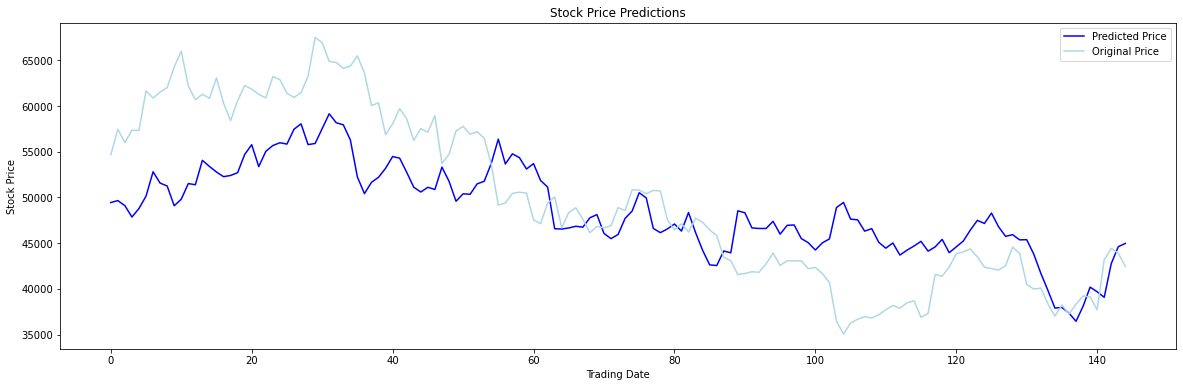

In [14]:
plt.plot(y_pred, color = 'blue', label = 'Predicted Price')
plt.plot(y_test, color = 'lightblue', label = 'Original Price')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(np.arange(0, 160, step=20))  
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

# Prediction

In [15]:
predict_feature

Compound   Volume  FundingRate  Bitcoin_SVI  Cryptocurrency_SVI  \
0  0.525319  0.47366     0.313175     0.137817            0.249198   

   No. of Active Addresses  No. of Unique Addresses  Transactions  \
0                 0.548707                 0.539364      0.502639   

   Compound_lag_1  Volume_lag_1  ...  No. of Unique Addresses_lag_4  \
0         0.52765      0.469431  ...                       0.438526   

   Transactions_lag_4  Compound_lag_5  Volume_lag_5  FundingRate_lag_5  \
0            0.414387        0.529636       0.46585           0.269978   

   Bitcoin_SVI_lag_5  Cryptocurrency_SVI_lag_5  No. of Active Addresses_lag_5  \
0           0.169315                  0.201845                       0.440803   

   No. of Unique Addresses_lag_5  Transactions_lag_5  
0                       0.460792            0.449825  

[1 rows x 48 columns]

In [16]:
# Process the data for LSTM
testX = np.array(predict_feature)
predict_feature = testX.reshape(predict_feature.shape[0], 1, predict_feature.shape[1])

In [17]:
predicted_price = lstm.predict(predict_feature)

In [18]:
predicted_price[0][0]

42351.85

Reality: Bitcoin currency had a close price of USD 39,137.61 on 4 Mar 2022.

Prediced: Our model predicted the currency to have a close price of USD 44,302.188 on 4 Mar 2022.